To start, we install the needed packages

In [1]:
library(forecast)
library("ggplot2")
library(zoo)

#install.packages("astsa")
#install.packages("portes")
#install.packages("nortest")

options(repr.plot.width = 20, repr.plot.height = 12)


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Adjuntando el paquete: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric




# Exploratory Analysis of the Time Series

We have distributed the data by trimesters, in order to study the tendencies of the series

In [2]:
data <- read.table("datos.txt")

# Creation of the time series, making distinctions depending in the trimester
arrivals_ts <- ts(data, start = c(1981, 1), frequency = 4)

arrivals_ts



,Qtr1,Qtr2,Qtr3,Qtr4
1981,45.266,19.886,24.839,52.264
1982,53.636,34.802,31.126,53.619
1983,43.423,23.421,29.142,51.771
1984,44.182,24.920,27.566,48.880
1985,49.563,23.867,25.895,54.092
1986,54.903,26.089,28.248,66.813
1987,61.167,32.400,33.287,72.115
1988,81.925,42.091,46.253,90.062
1989,84.191,48.709,46.905,93.075
1990,81.185,53.693,48.037,94.827


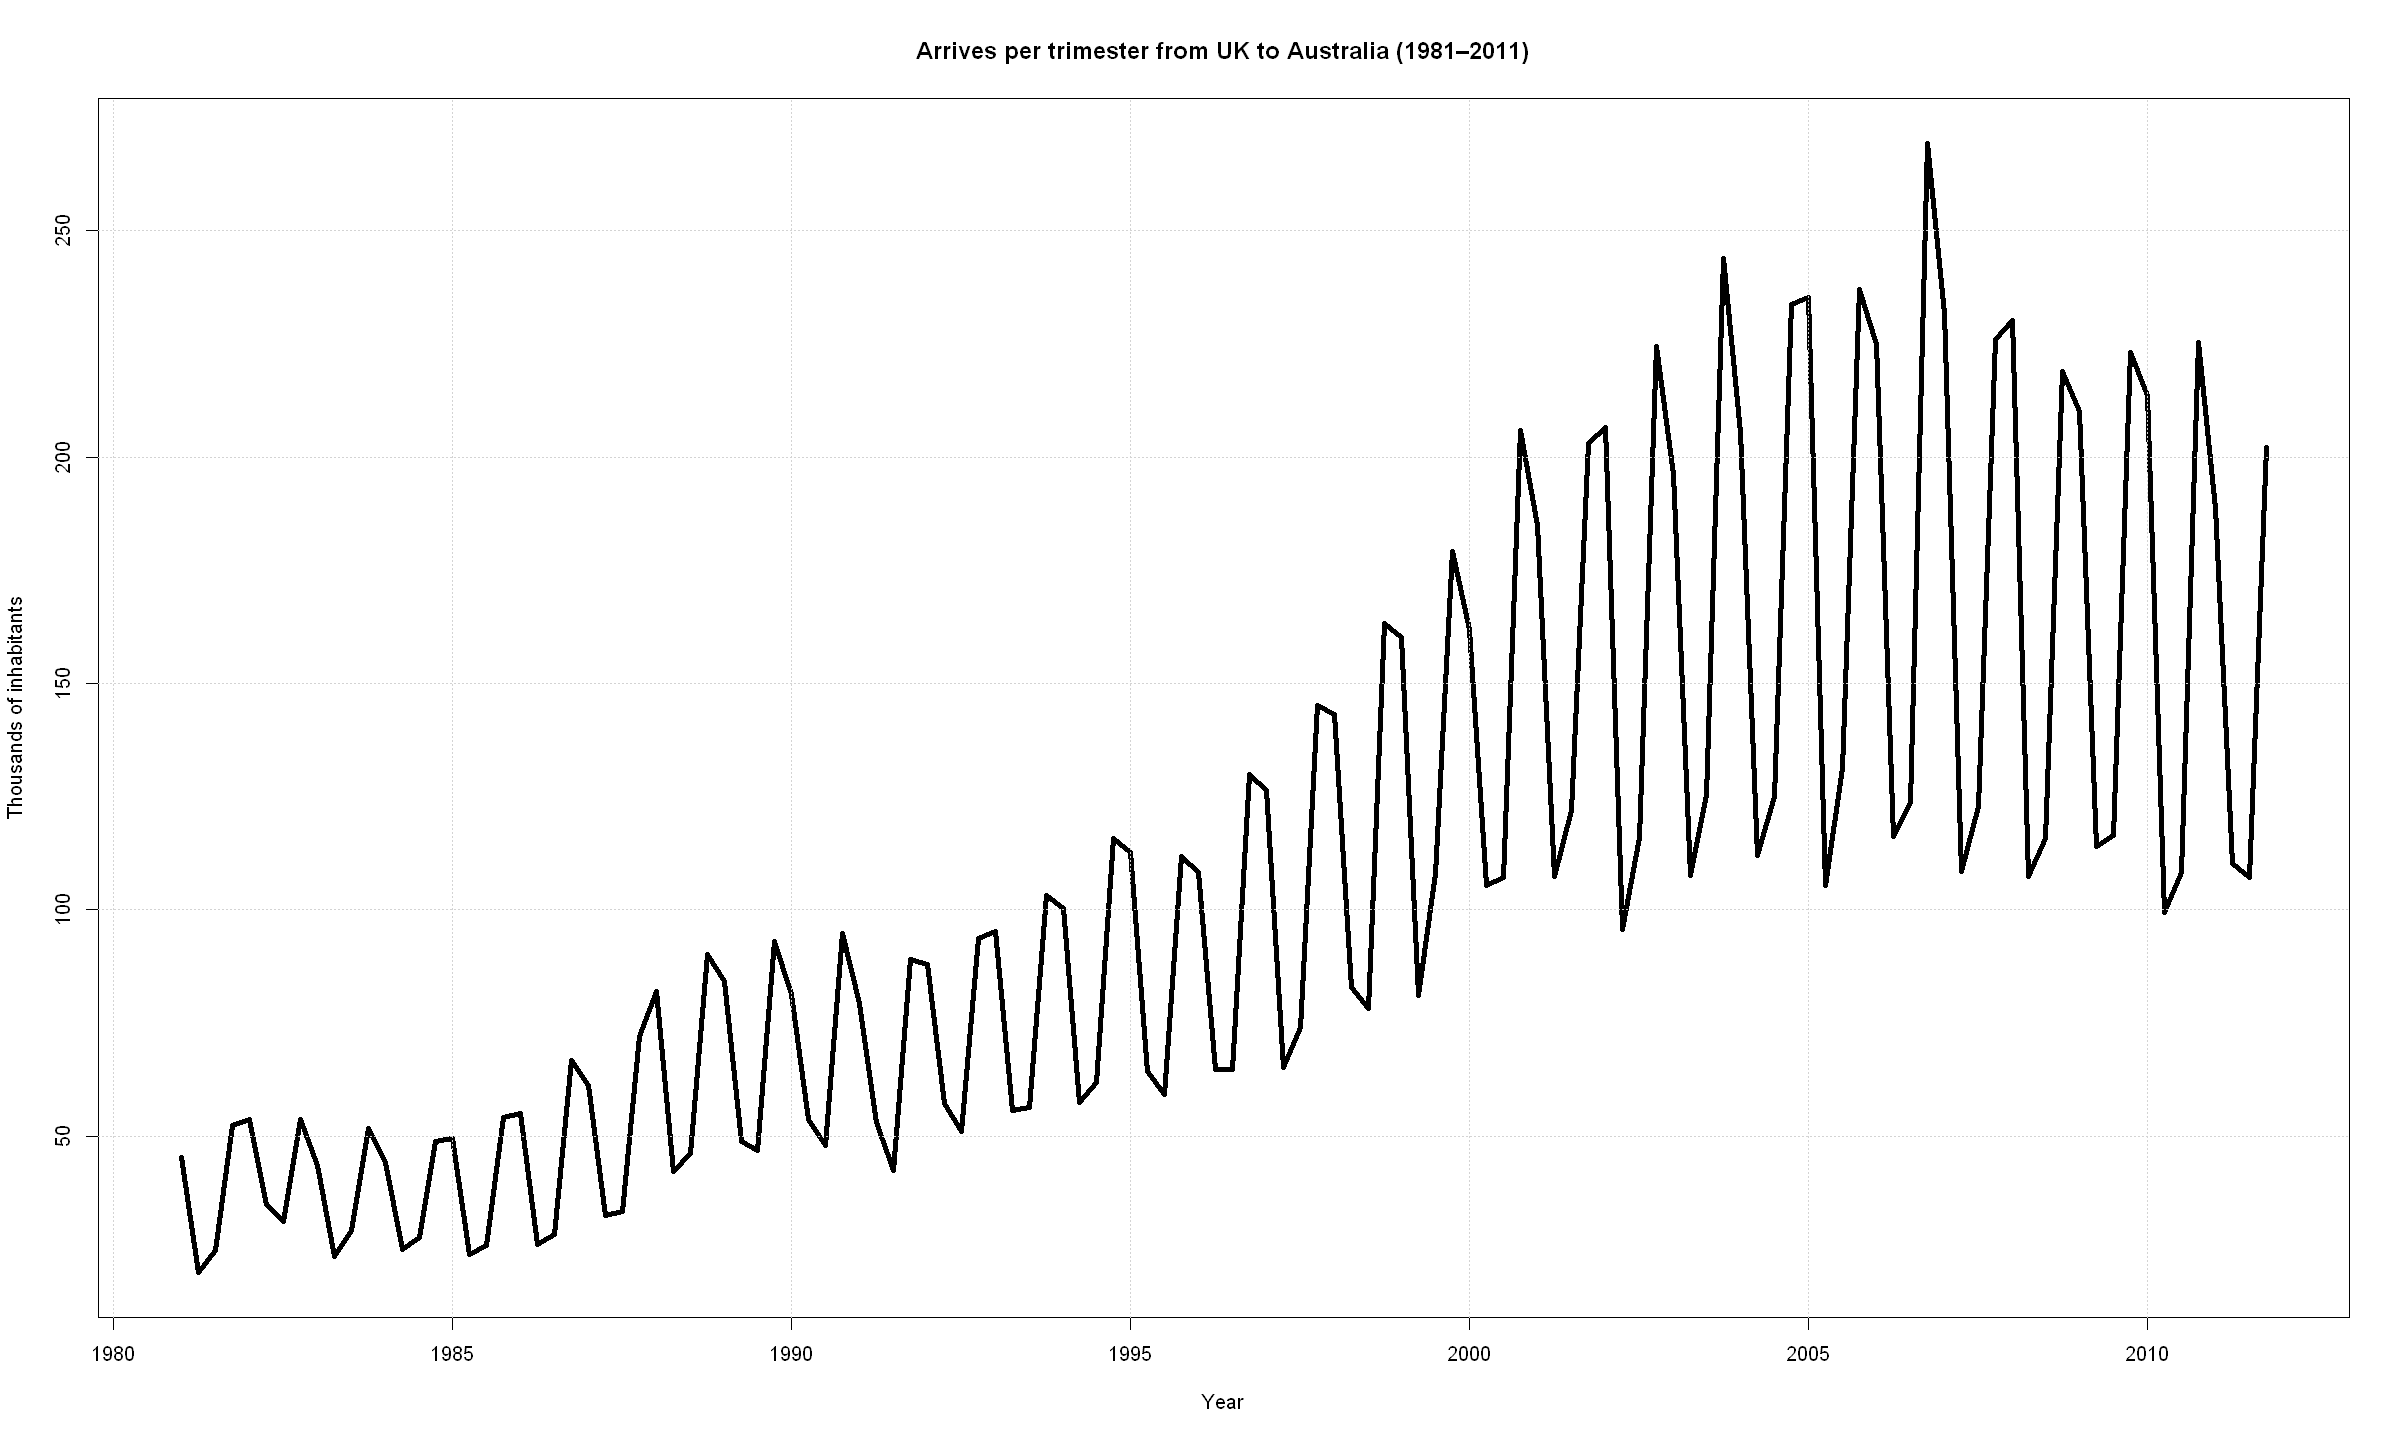

In [3]:
plot(
  arrivals_ts,
  main = "Arrives per trimester from UK to Australia (1981–2011)",
  xlab = "Year",
  ylab = "Thousands of inhabitants",
  lwd  = 4
)
grid()

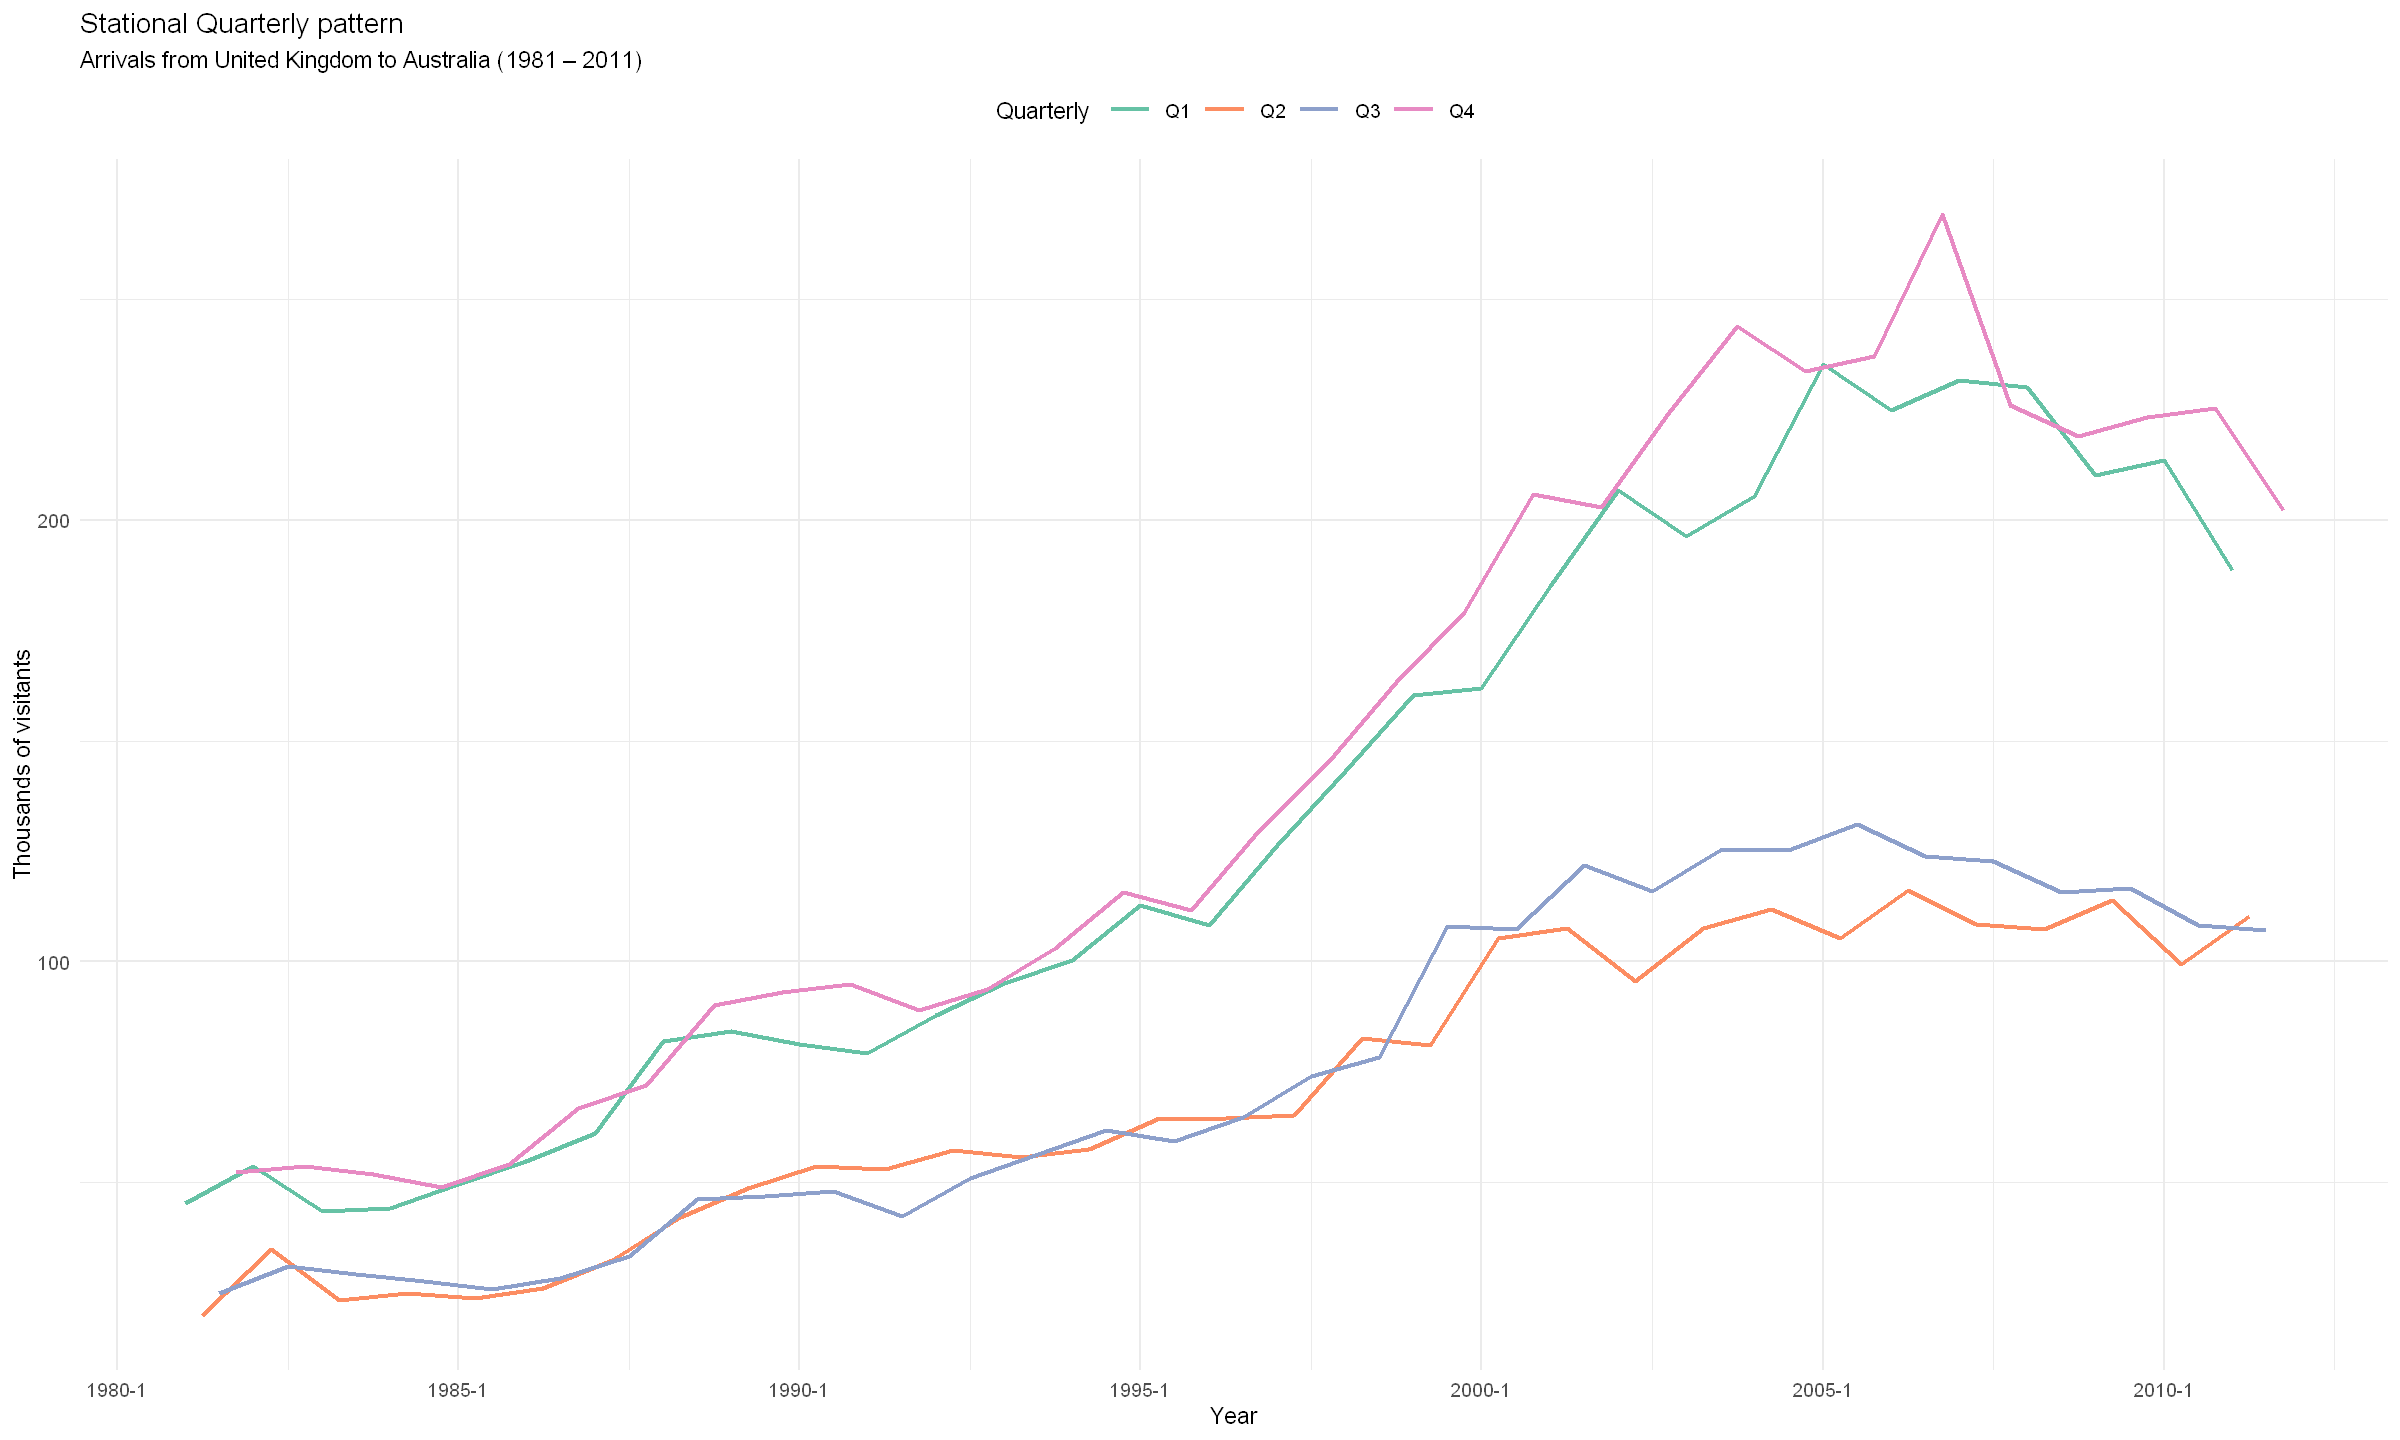

In [63]:
df <- data.frame(
  date      = as.yearqtr(time(arrivals_ts)),         
  value     = as.numeric(arrivals_ts),
  quarterly = factor(
    cycle(arrivals_ts),
    levels = 1:4,
    labels = c("Q1","Q2","Q3","Q4")
  )
)

# 2. Graphic with ggplot
ggplot(df, aes(x = date, y = value, color = quarterly, group = quarterly)) +
  geom_line(size = 1.4) +
  scale_color_brewer(
    palette = "Set2",       
    name    = "Quarterly"  
  ) +
  labs(
    title    = "Stational Quarterly pattern",
    subtitle = "Arrivals from United Kingdom to Australia (1981 – 2011)",
    x        = "Year",
    y        = "Thousands of visitants"
  ) +
  theme_minimal(base_size = 14) +
  theme(
    legend.position = "top",
    legend.key.width = unit(2, "lines")
  )

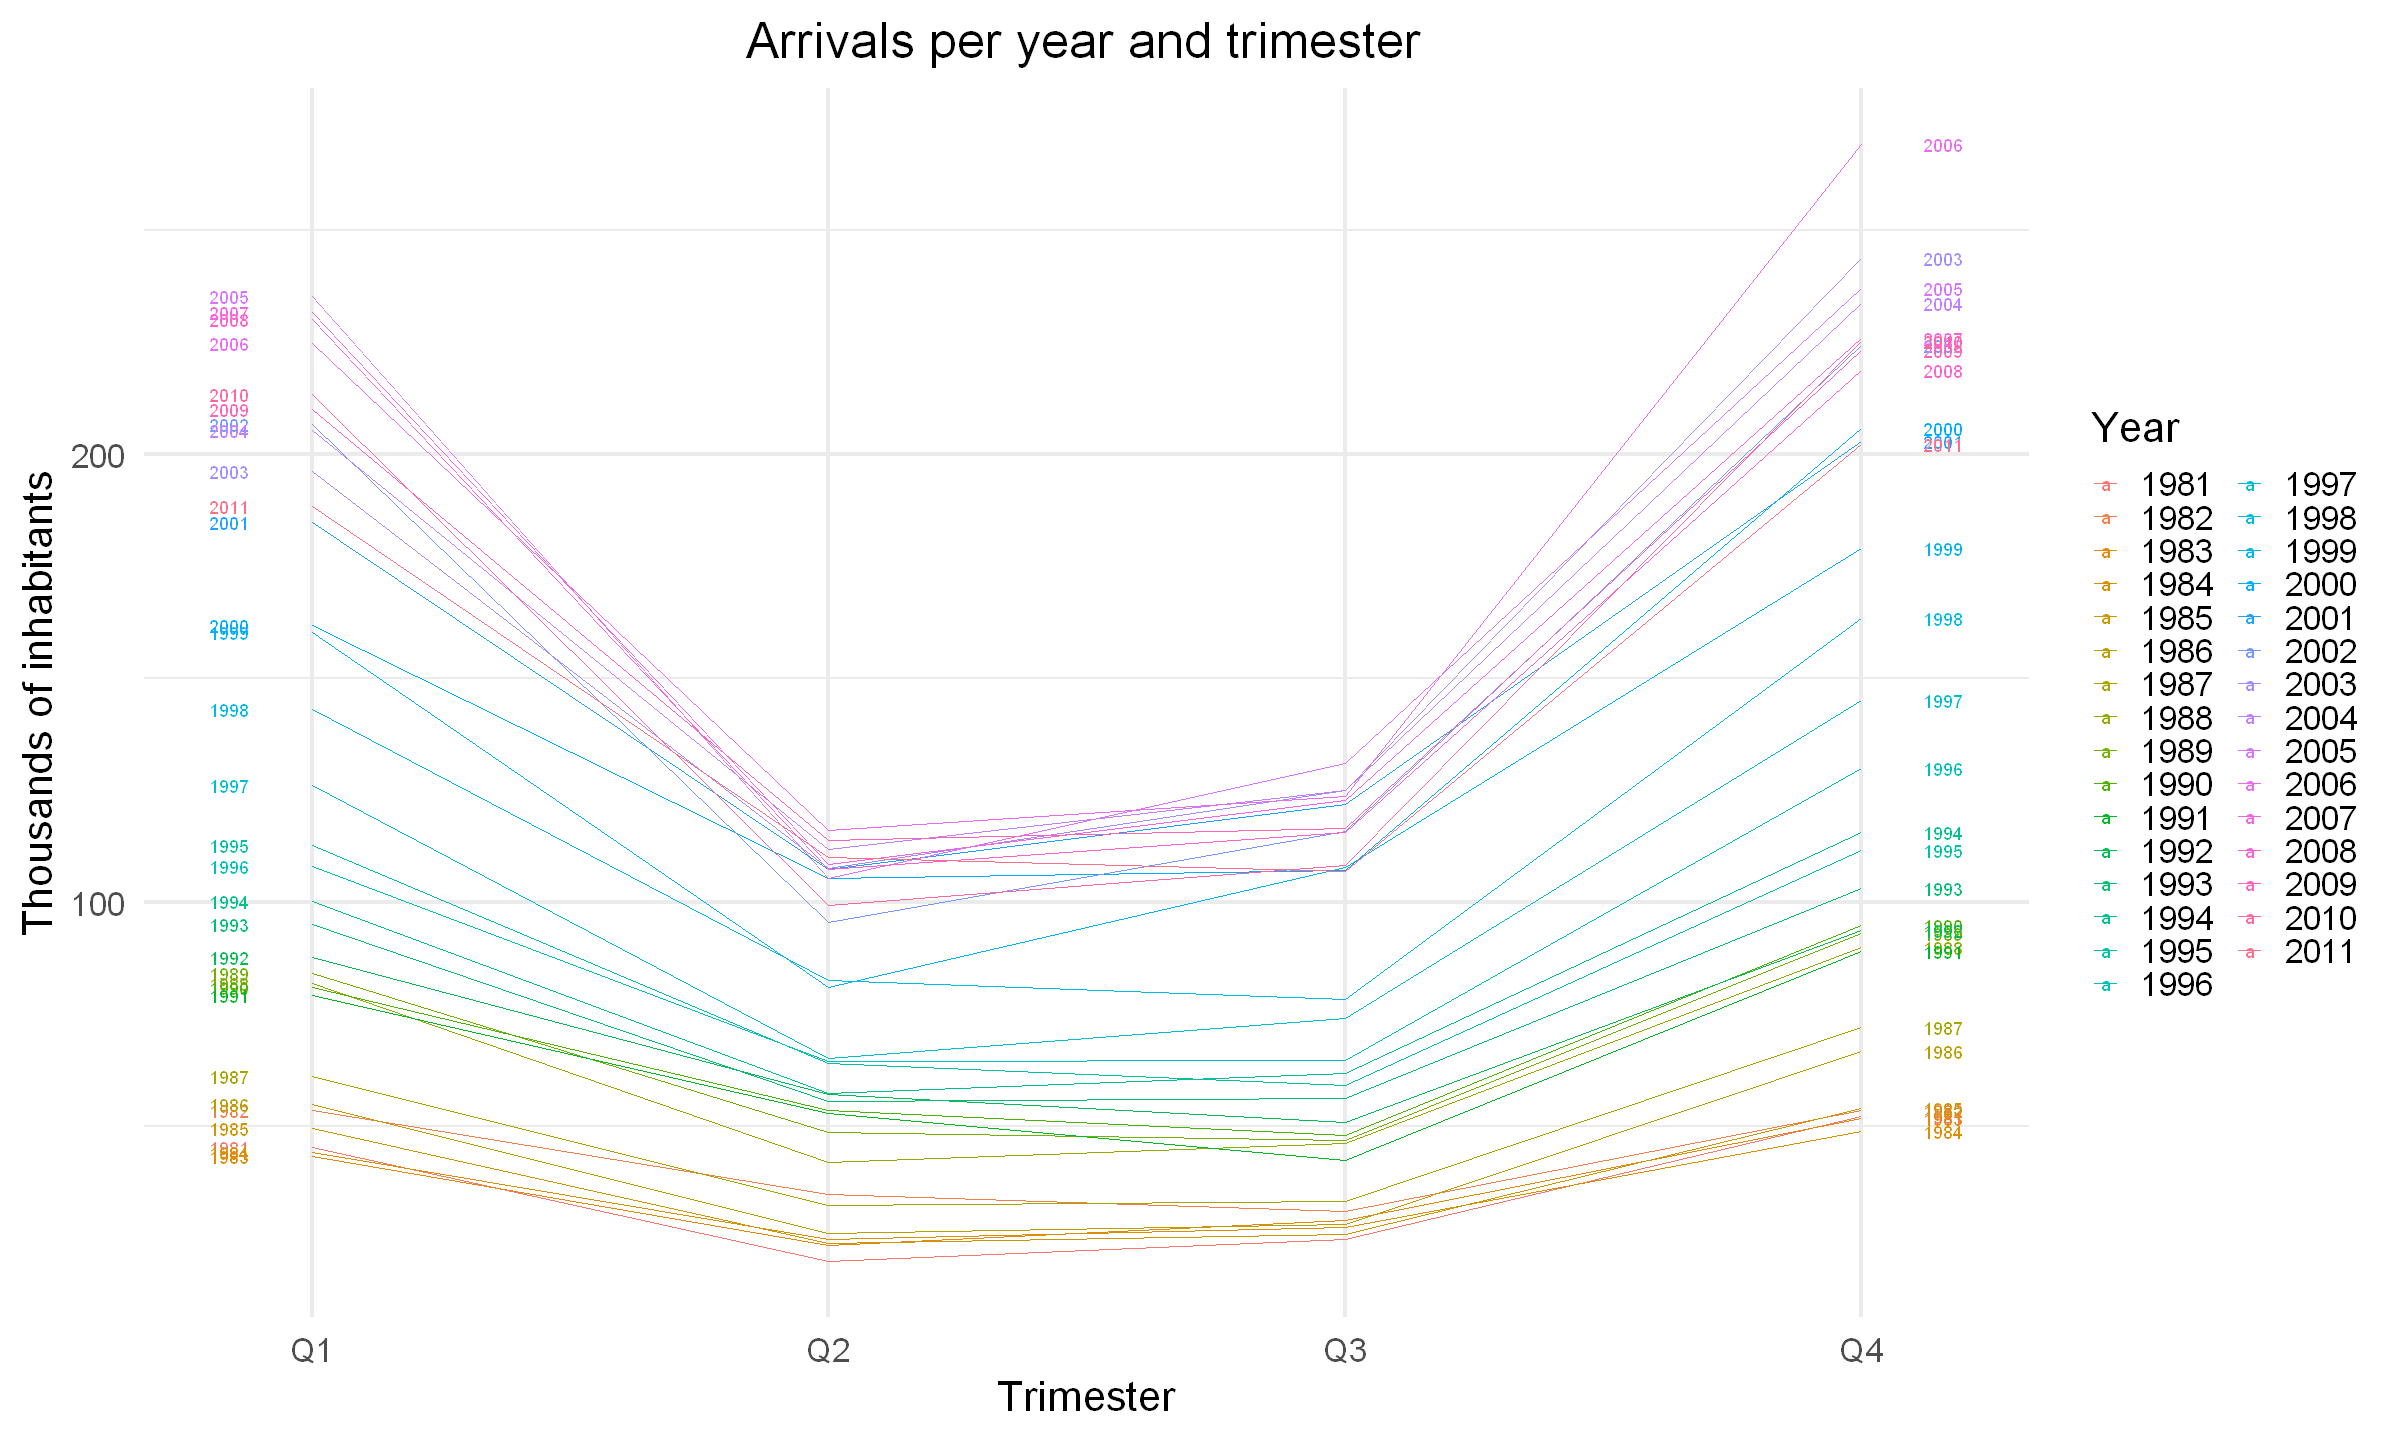

In [64]:
p <- ggseasonplot(
  arrivals_ts,
  year.labels       = TRUE,   
  year.labels.left  = TRUE,   
  xlab              = "Trimester",
  ylab              = "Thousands of inhabitants",
  main = "                                           Arrivals per year and trimester"
) +
  guides(colour = guide_legend(title = "Year")) +   
  theme_minimal(base_size = 25)                    

print(p)


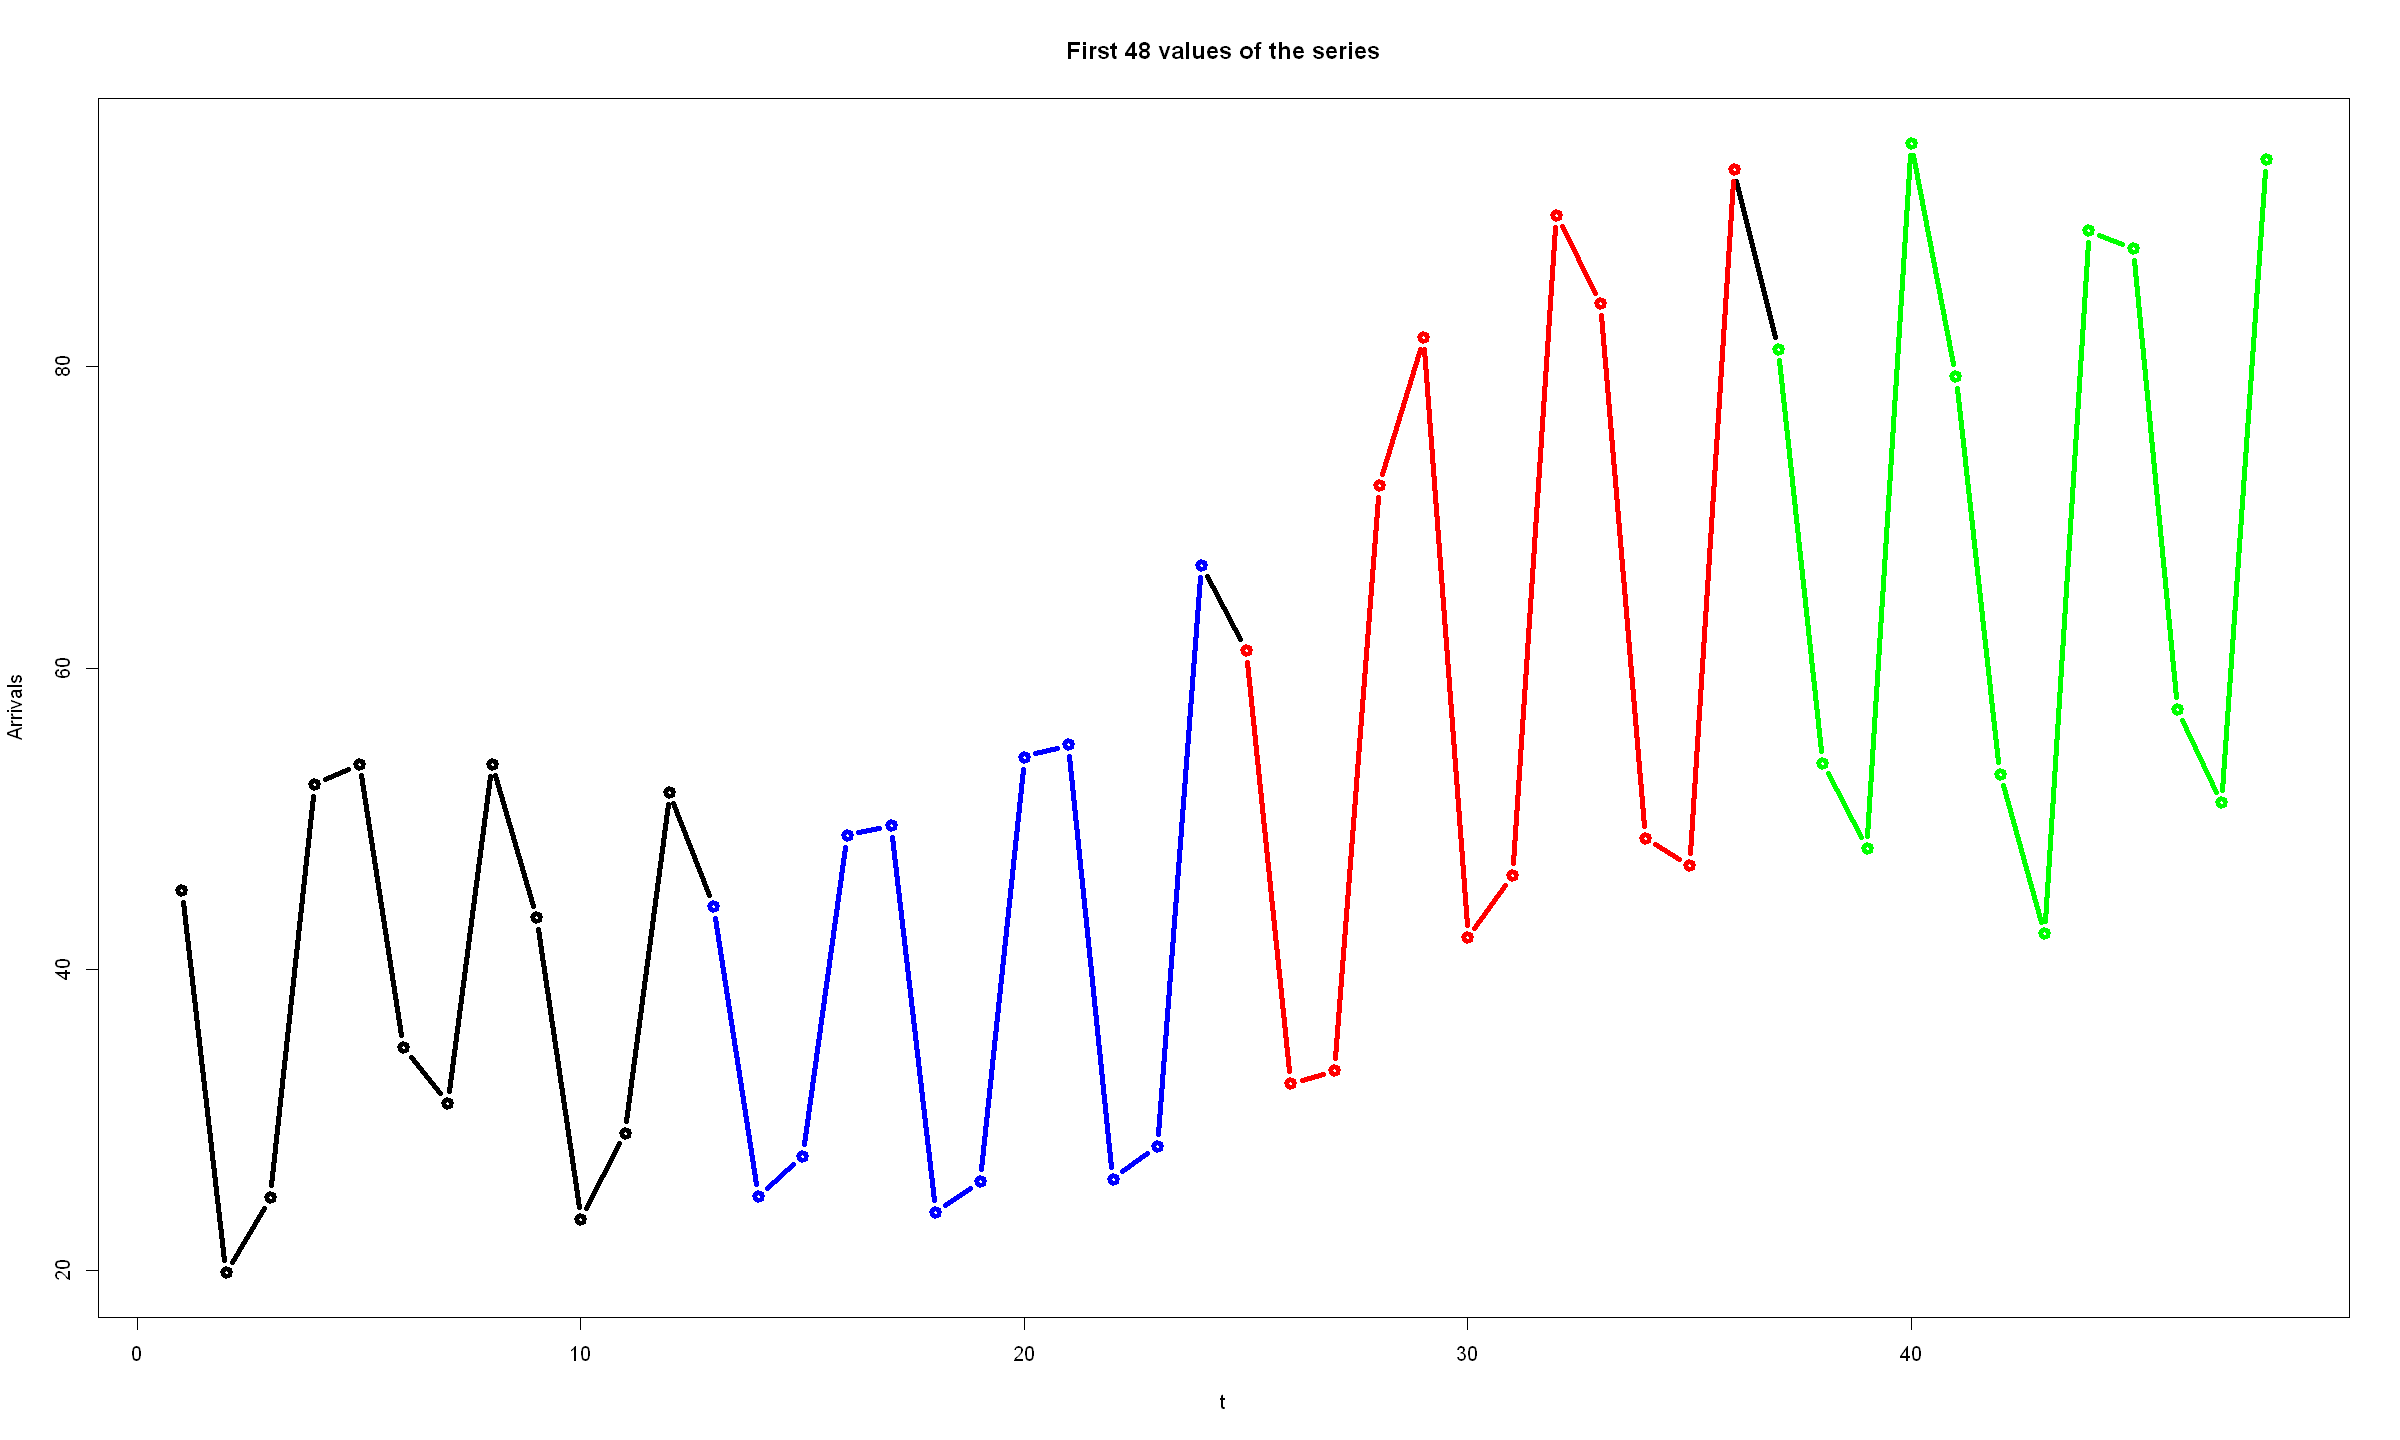

In [6]:
ts.plot(arrivals_ts[1:48],xlab="t", ylab="Arrivals",main="First 48 values of the series",type="b")  
points(seq(1,48),arrivals_ts[1:48],type="b",lwd=4)
points(seq(13,24),arrivals_ts[13:24],type="b",col="blue",lwd=4)
points(seq(25,36),arrivals_ts[25:36],type="b",col="red",lwd=4)
points(seq(37,48),arrivals_ts[37:48],type="b",col="green",lwd=4)

### ACF of the original time series

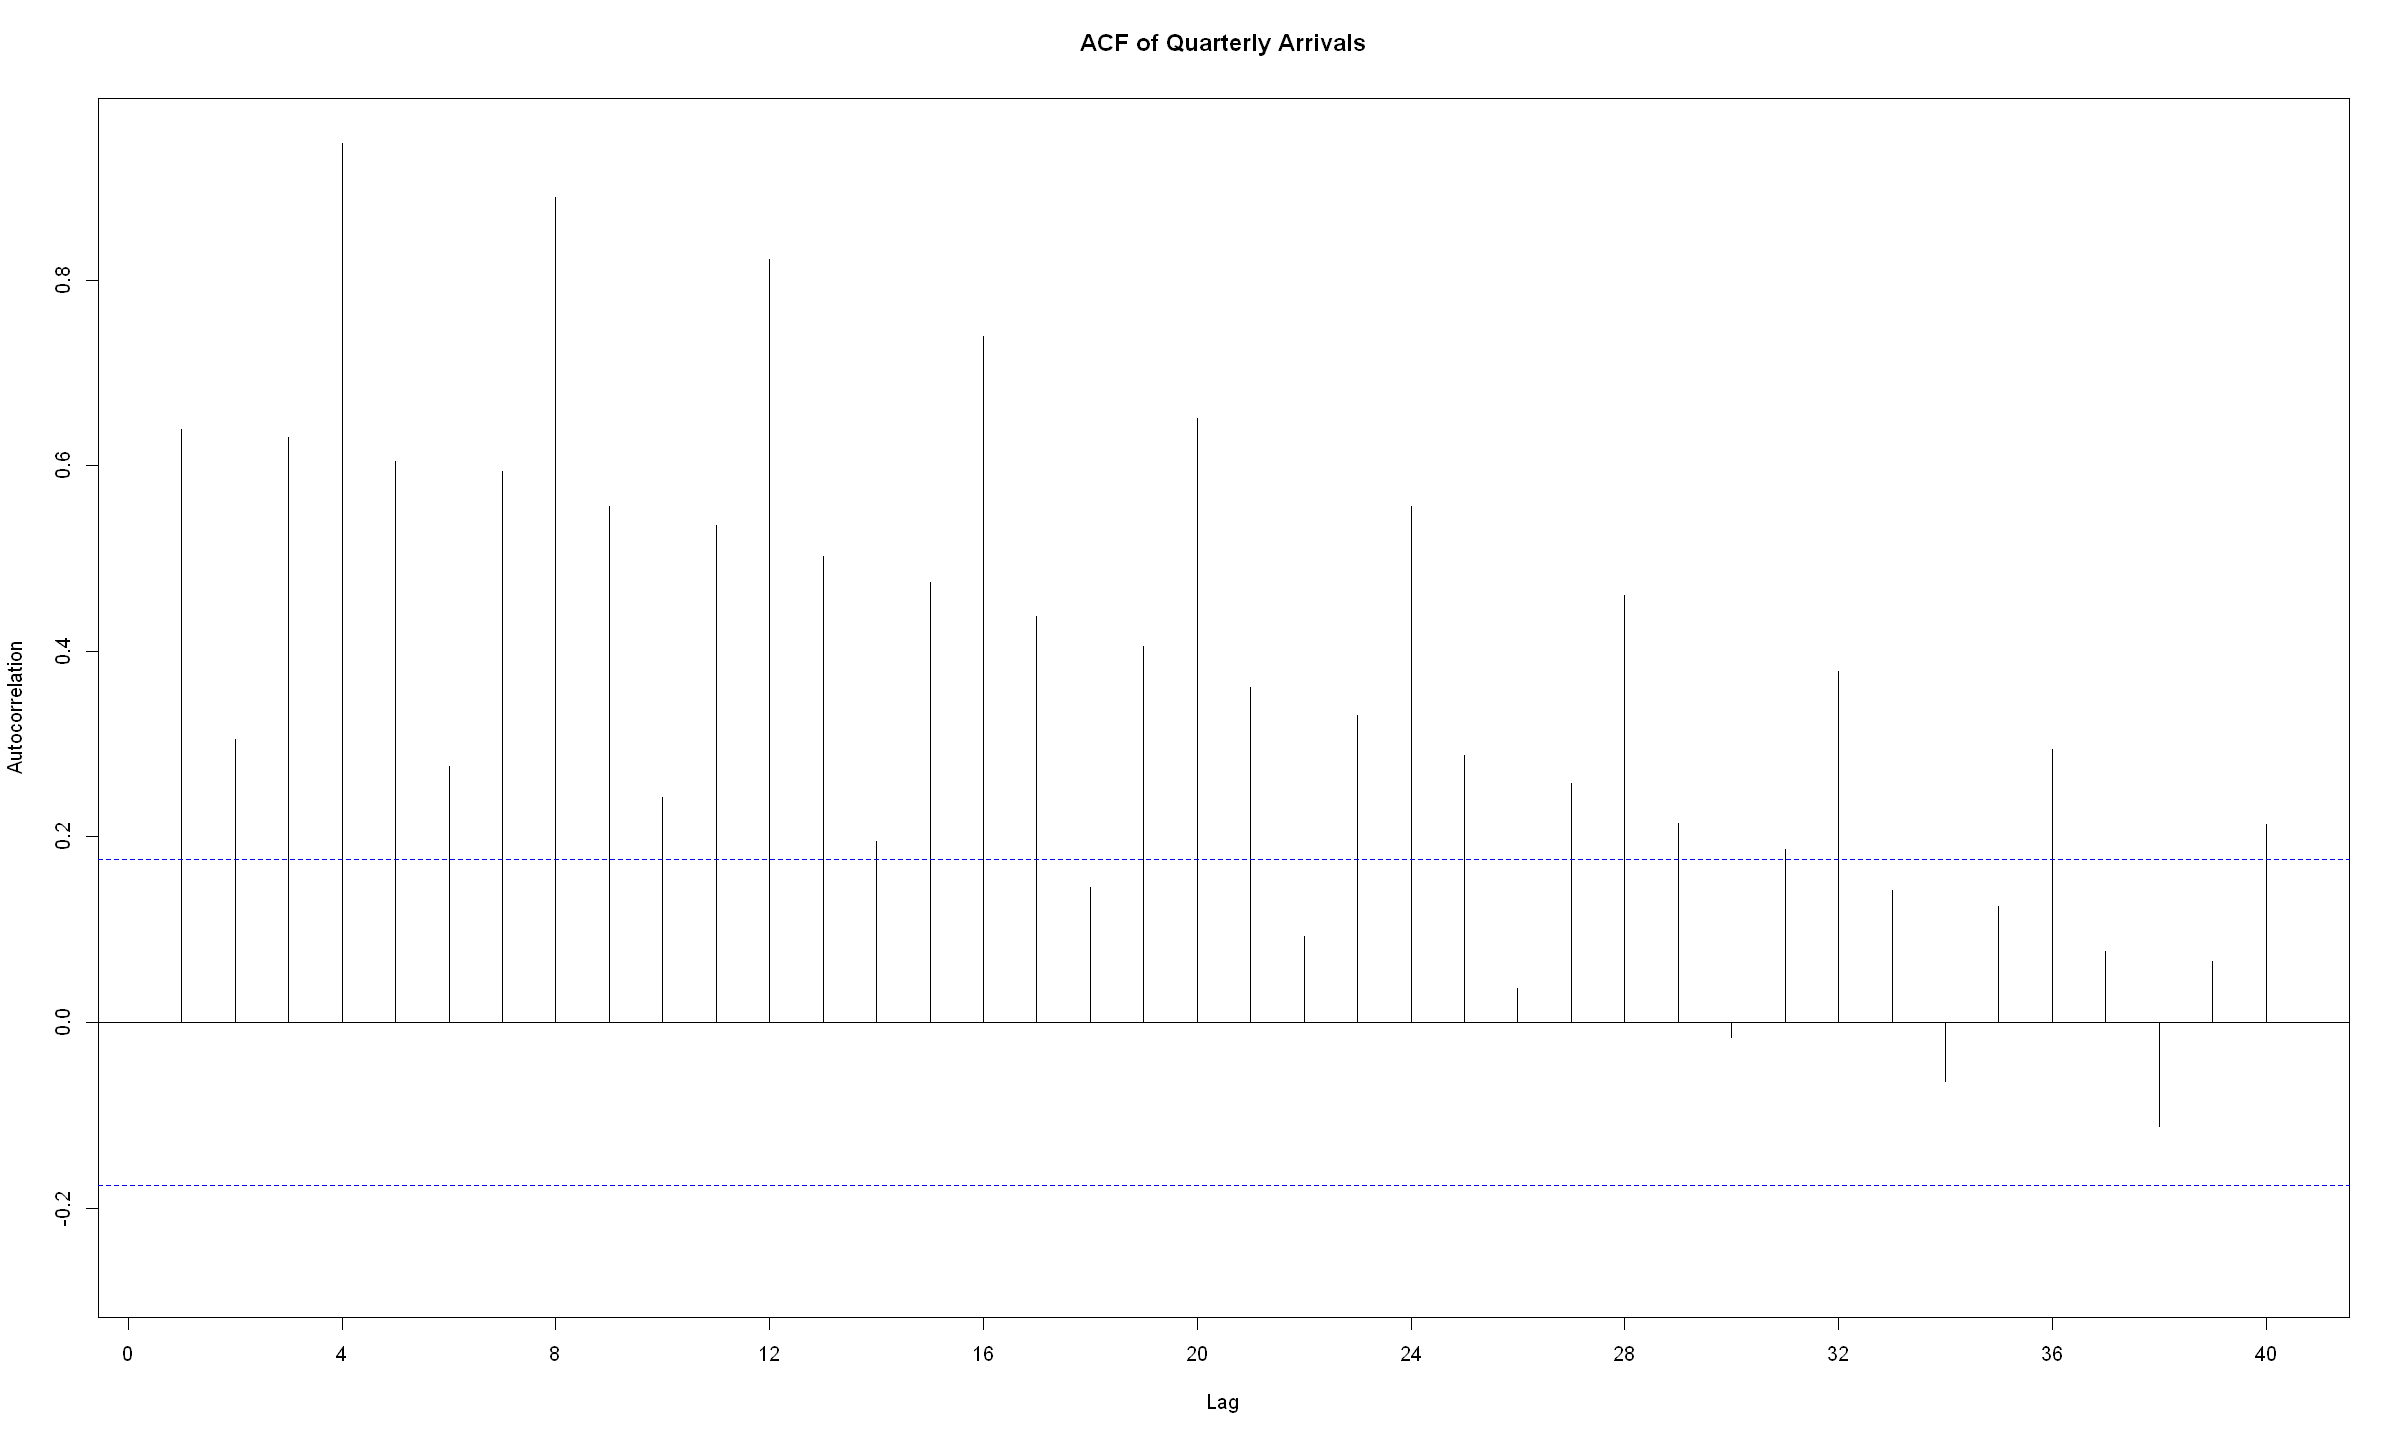

In [7]:
Acf(
    arrivals_ts,
    lag.max   = 40,   
    xlab    = "Lag",
    ylab    = "Autocorrelation",
    main      = "ACF of Quarterly Arrivals"
    )

### PACF of the original time series

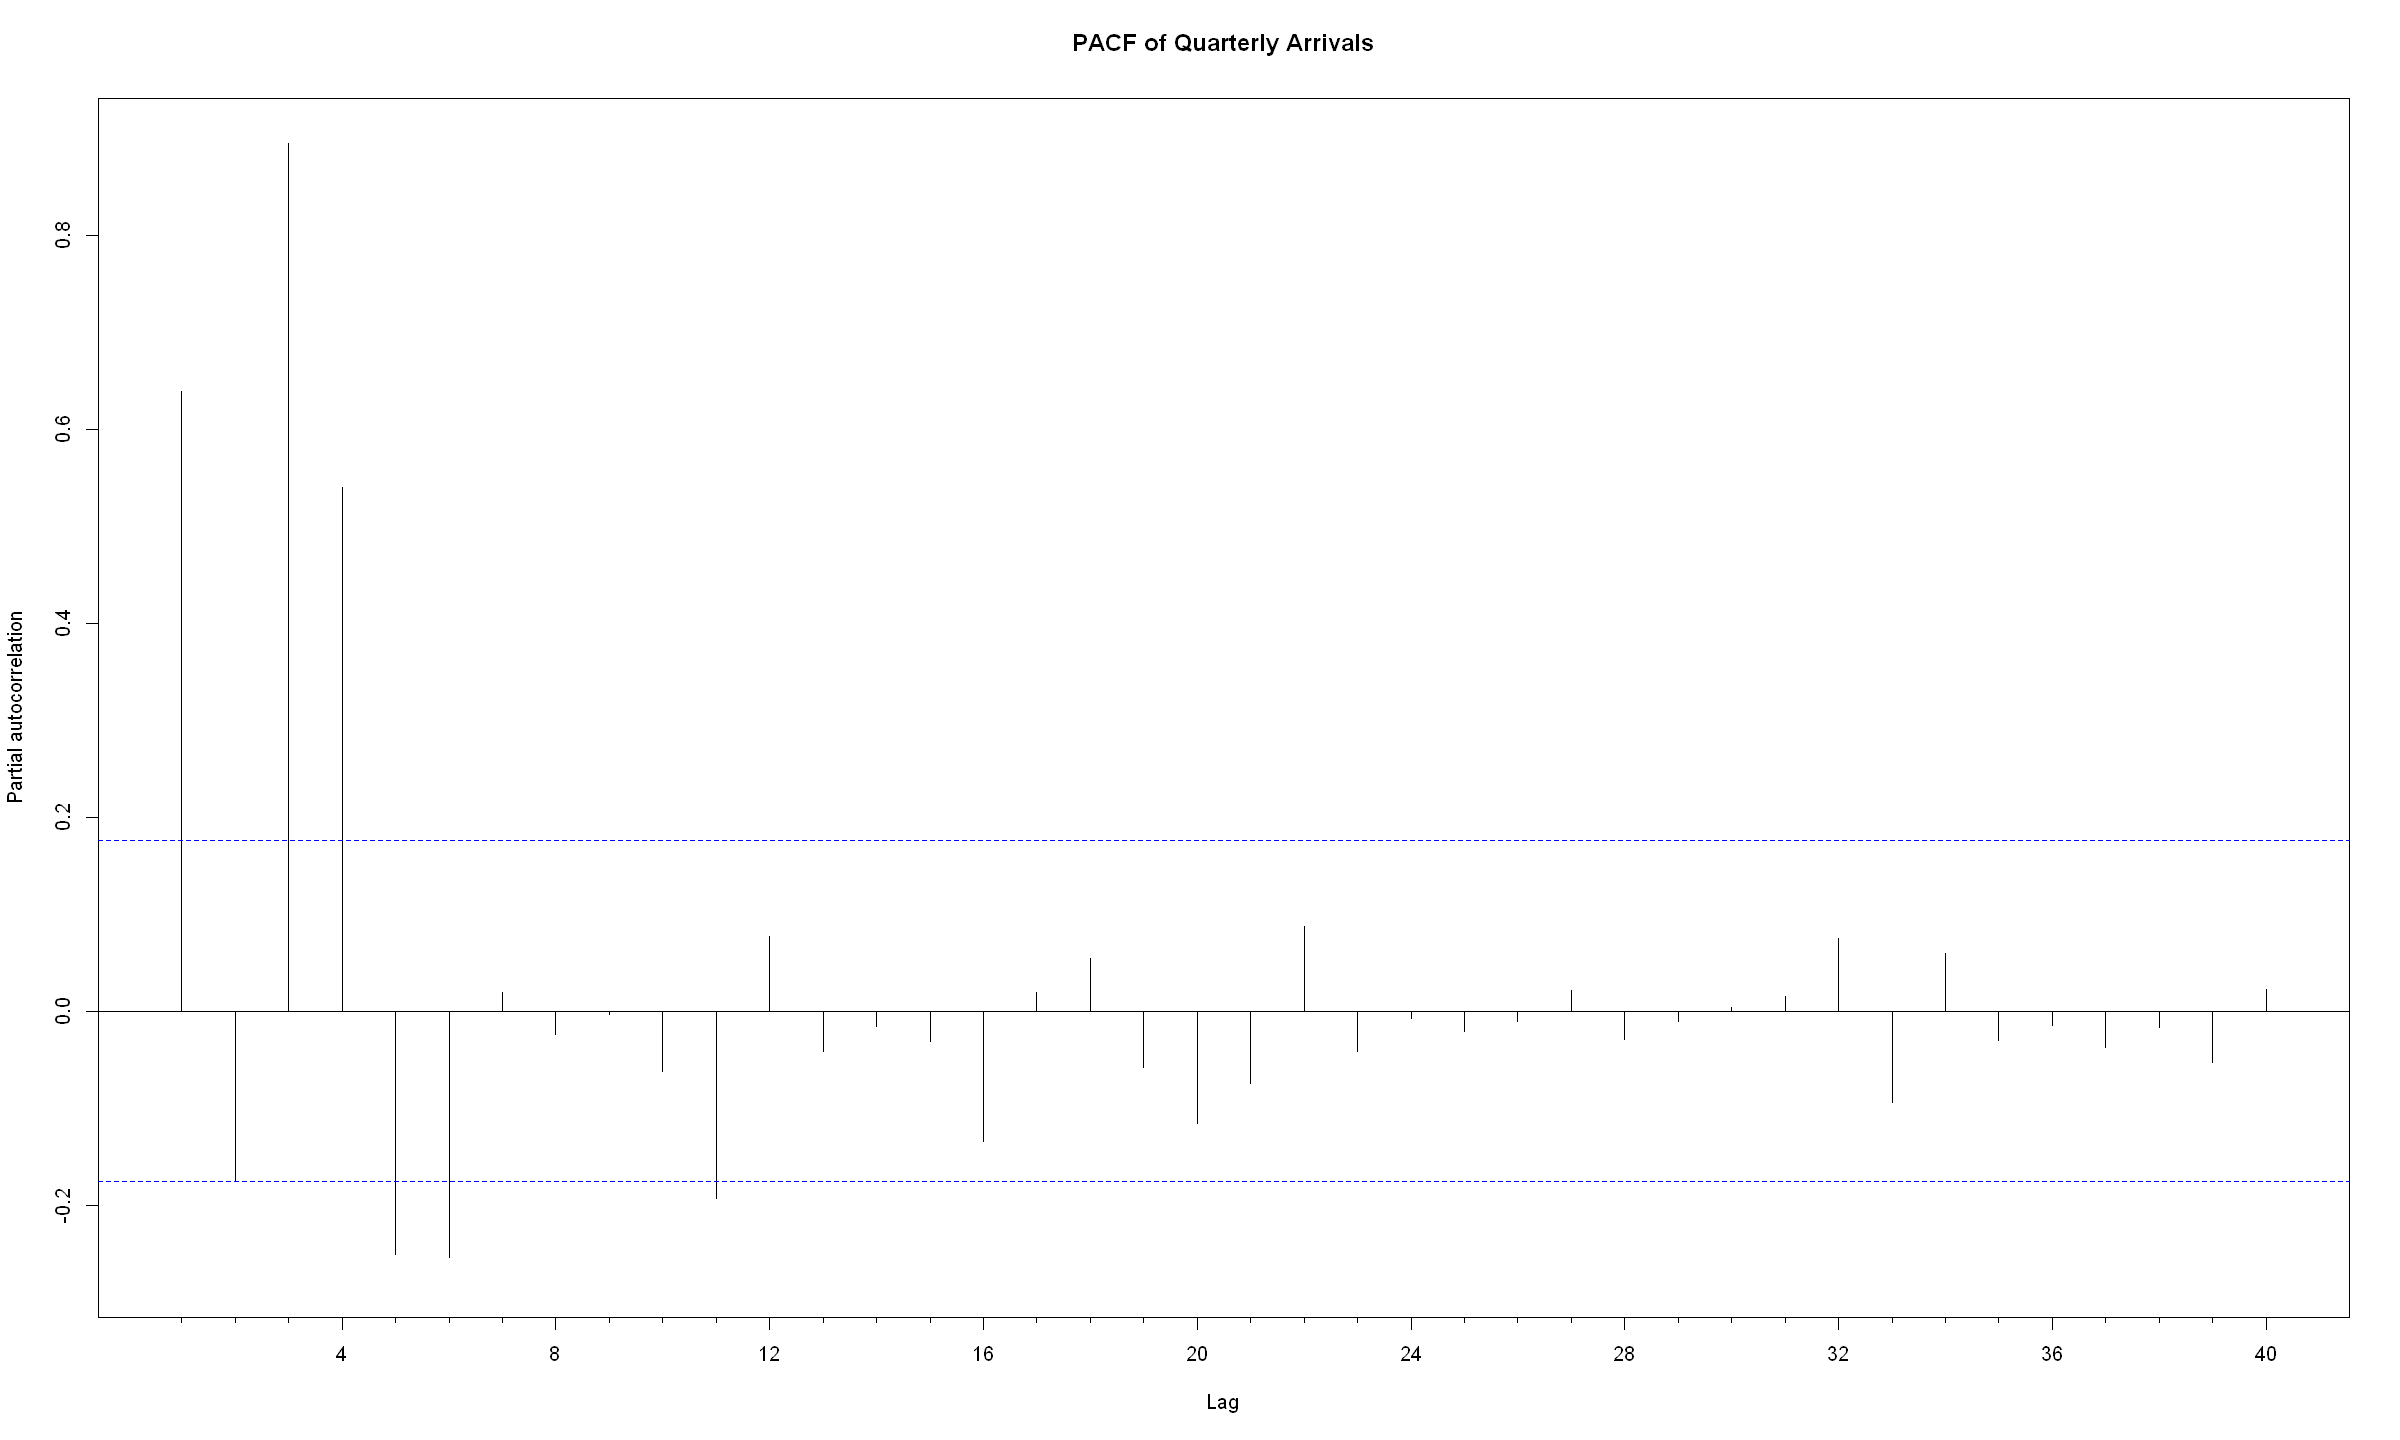

In [8]:
Pacf(
    arrivals_ts,
    lag.max   = 40,    
    xlab    = "Lag",
    ylab    = "Partial autocorrelation",
    main    = "PACF of Quarterly Arrivals"
)

## VARIANCE

In [9]:
source("BoxCoxTransformation.R")

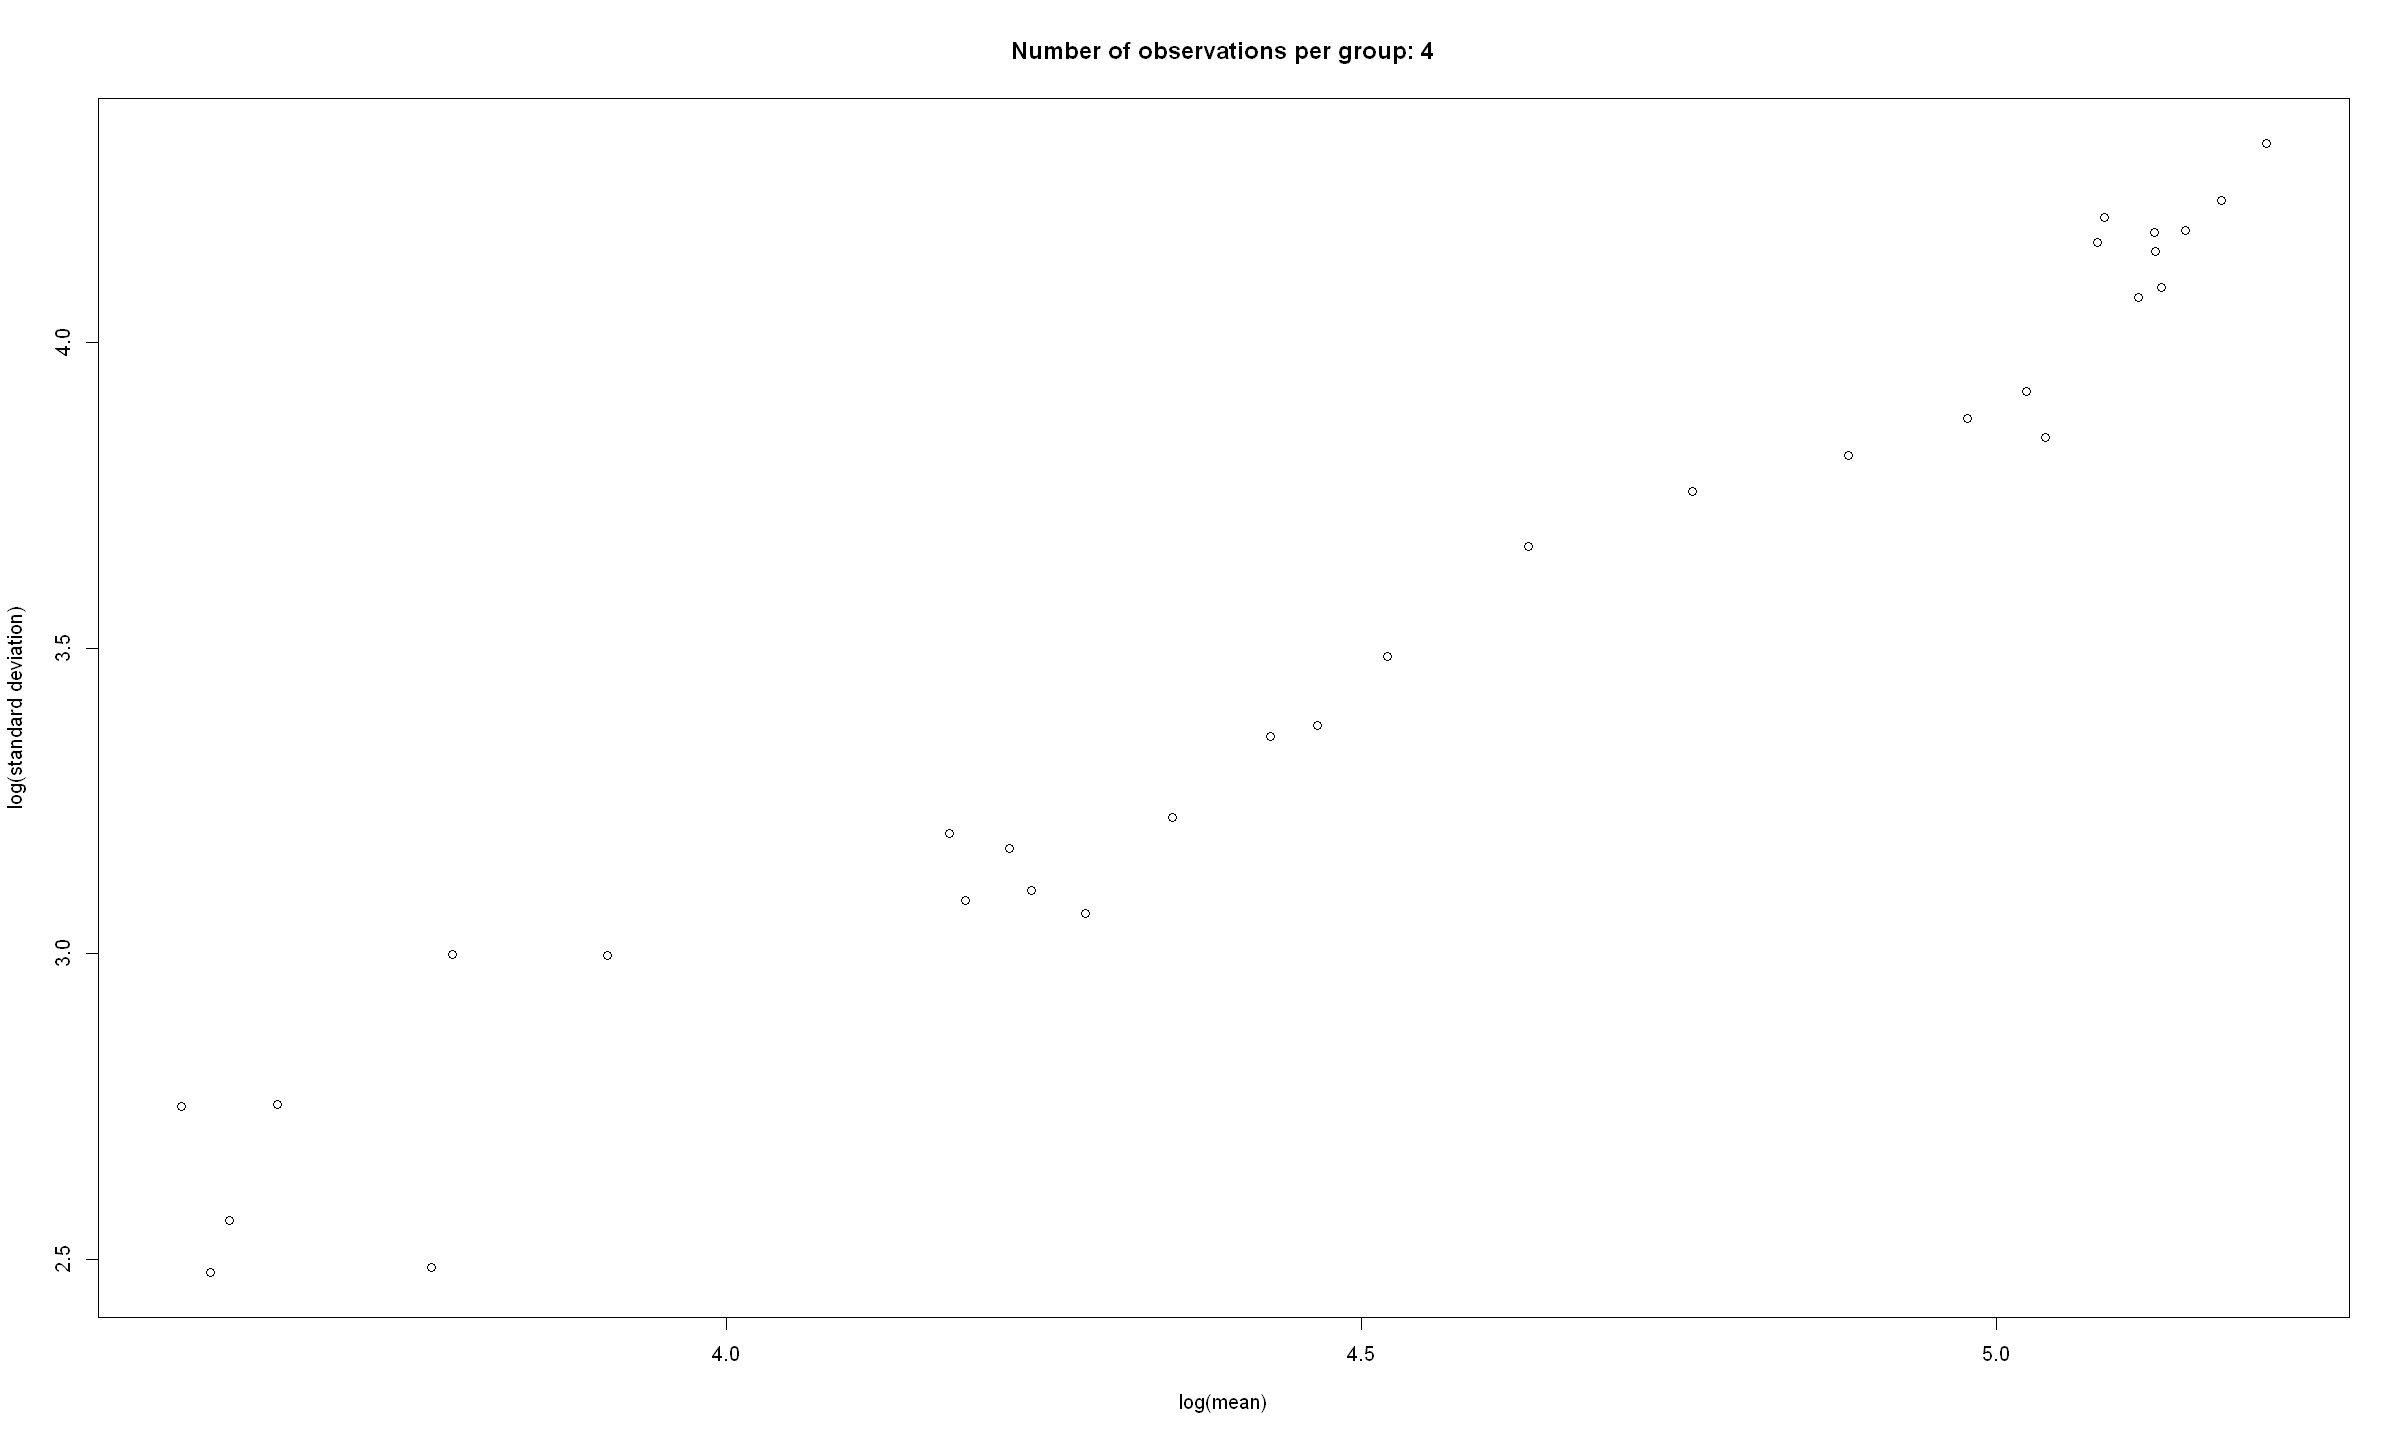

In [67]:
Plot.var(arrivals_ts,4)


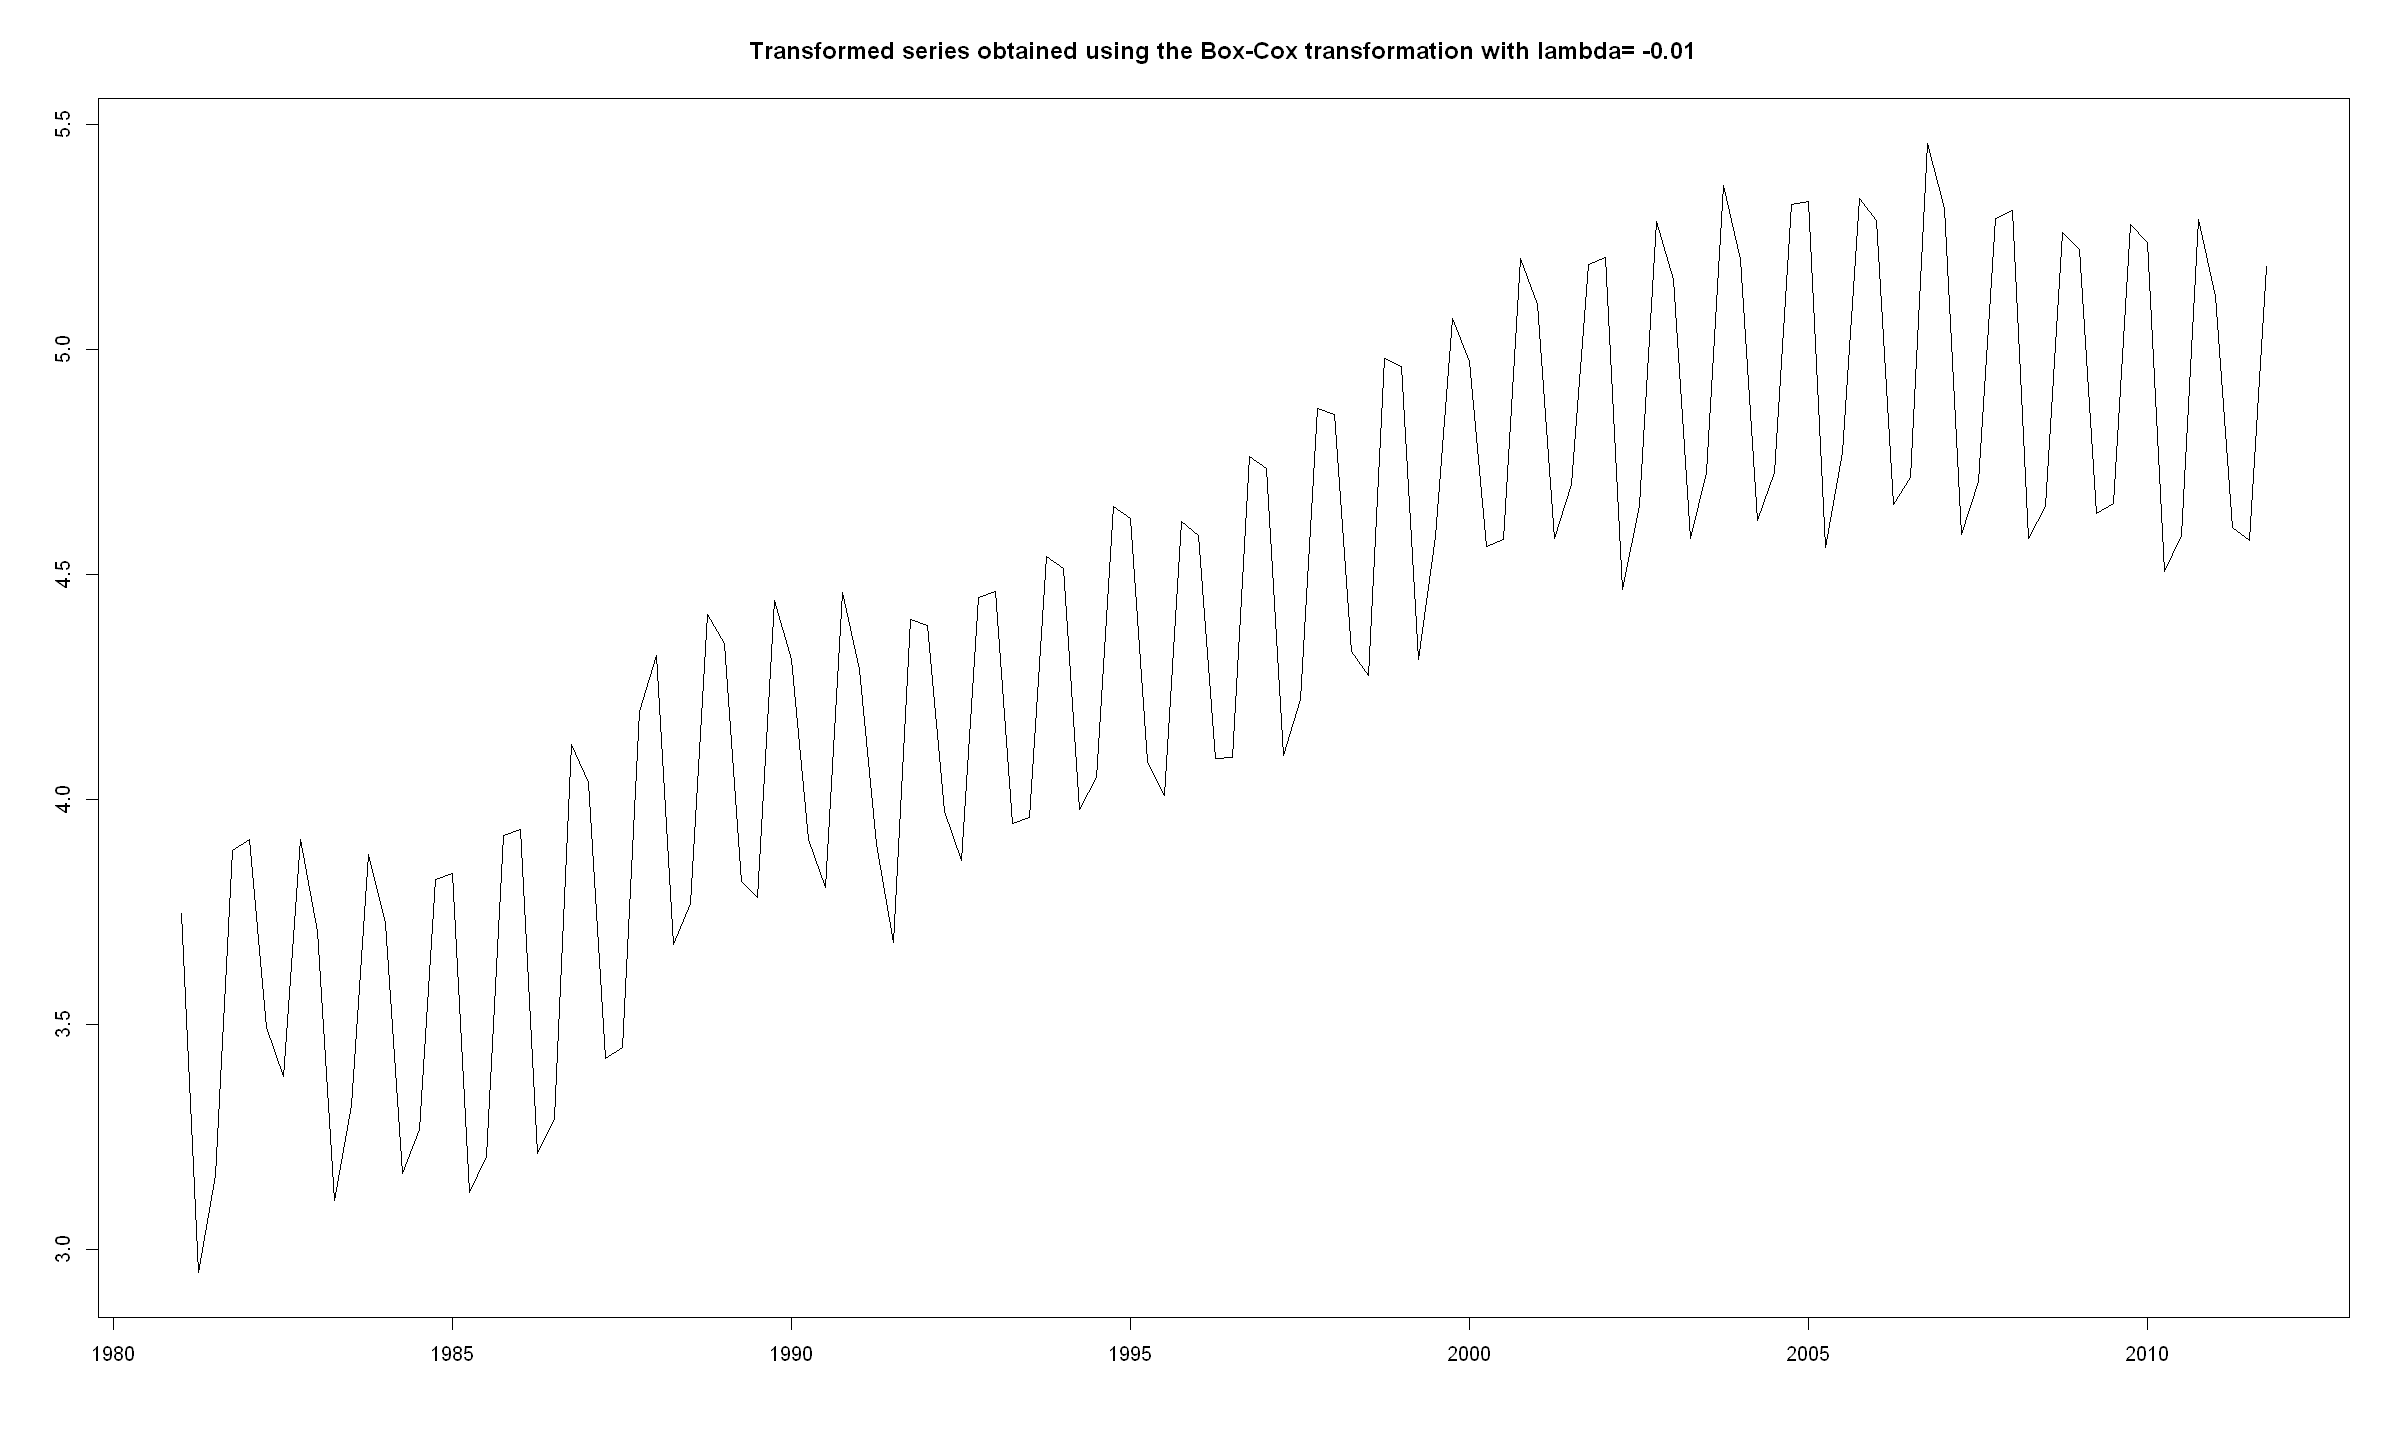

In [11]:
BoxCox(arrivals_ts,4)

The estimated value of $\lambda$, $\hat{\lambda}$=$−0.01$ (very close to zero), suggests to use the logarithmic transformation to remove the heteroscedasticity in the original time series.

In [12]:
X.tilde=log(arrivals_ts)

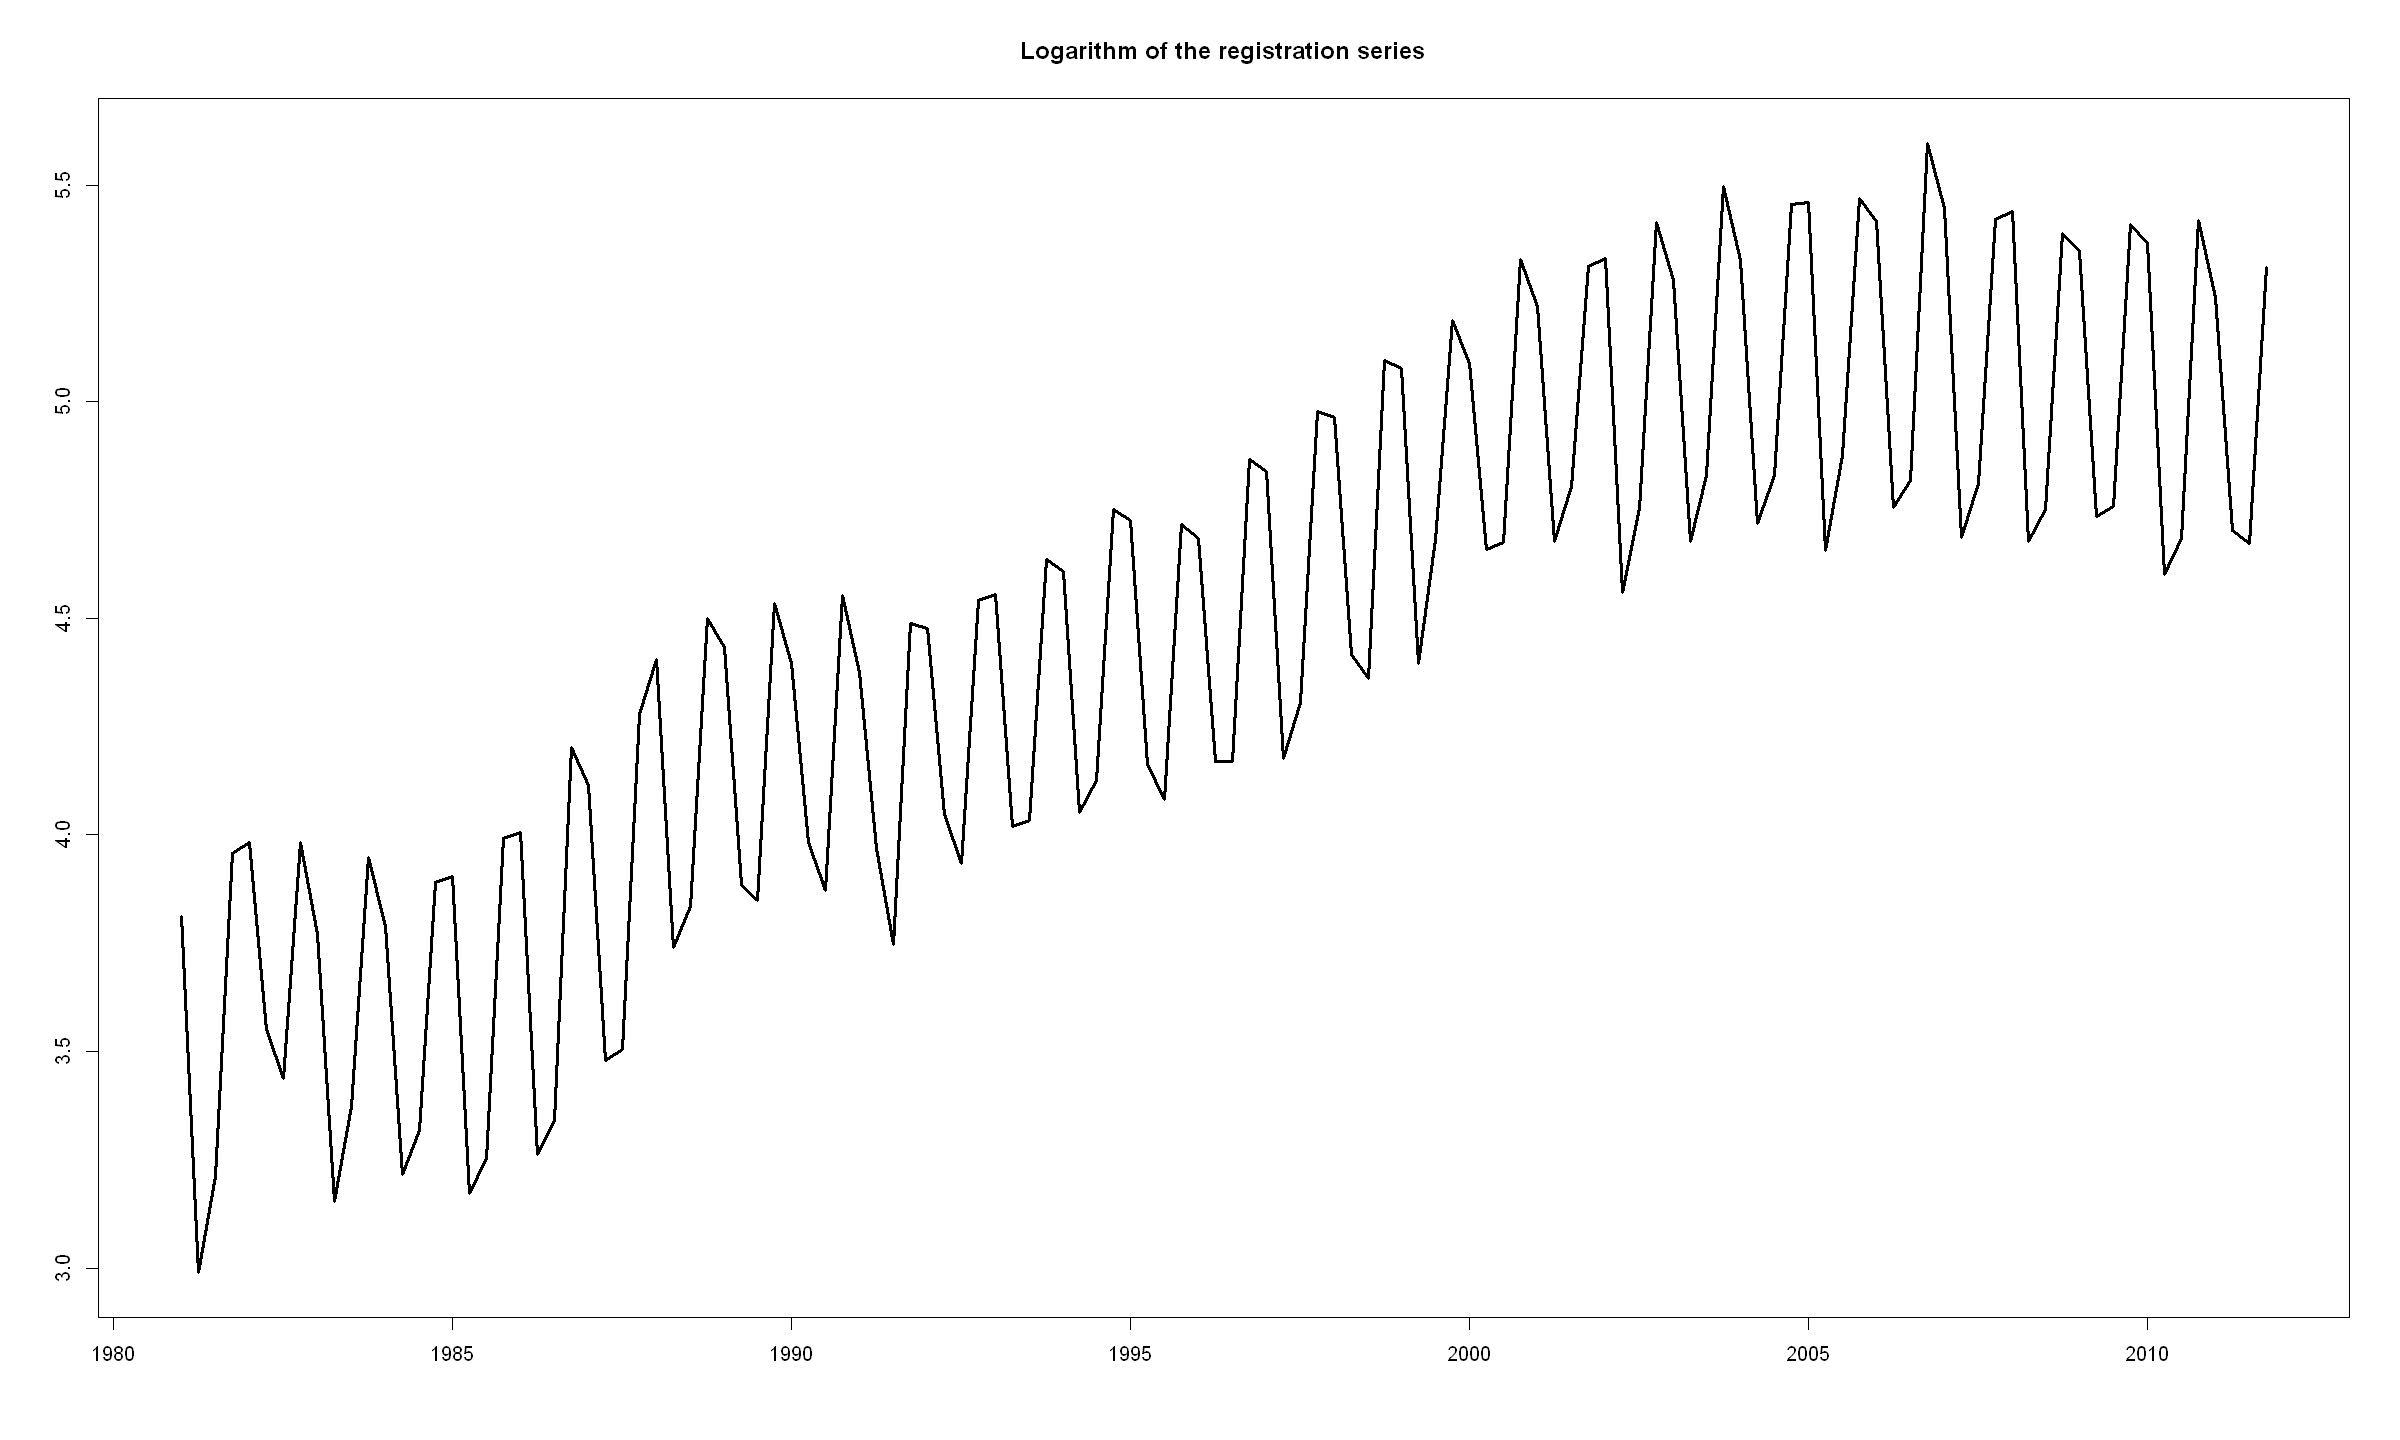

In [13]:
par(mfrow=c(1,1))
ts.plot(X.tilde, 
        ylab = "", 
        xlab = "", 
        type = "l", 
        main = "Logarithm of the registration series", 
        lwd = 3) 

Let $\tilde{X}_t = \log(X_t)$.


We would like to remove the trend component from the time series


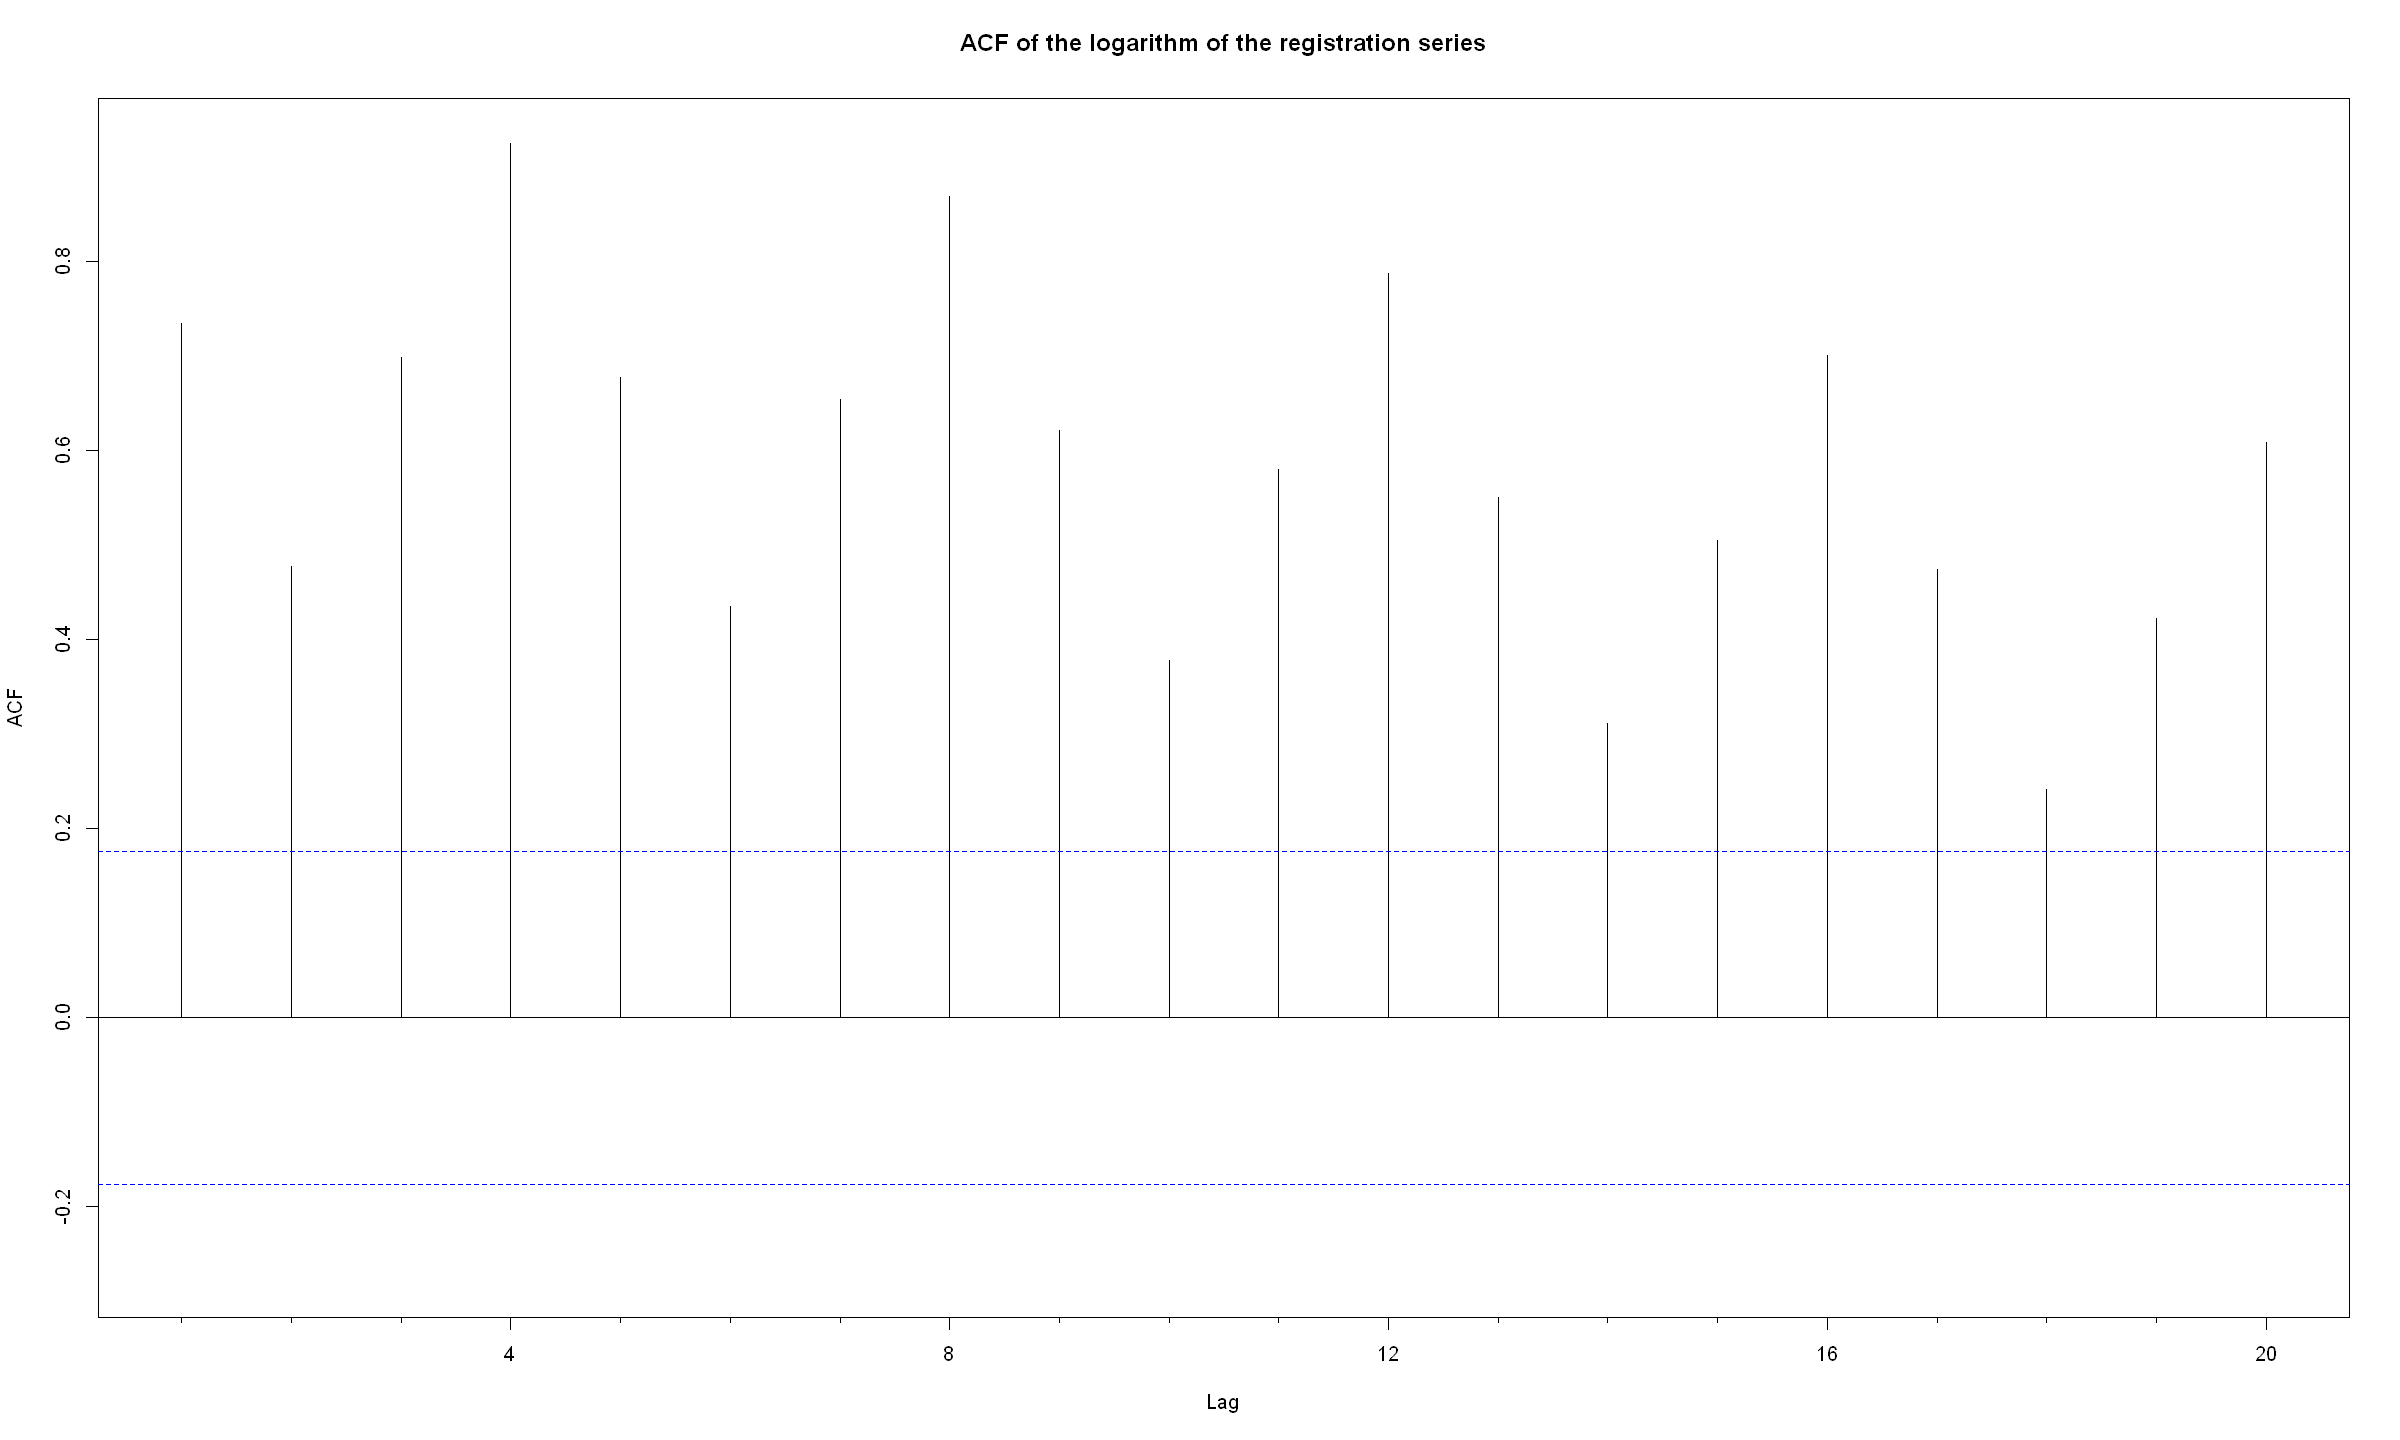

In [14]:
Acf(X.tilde,main="ACF of the logarithm of the registration series",xlab="Lag",ylab="ACF")

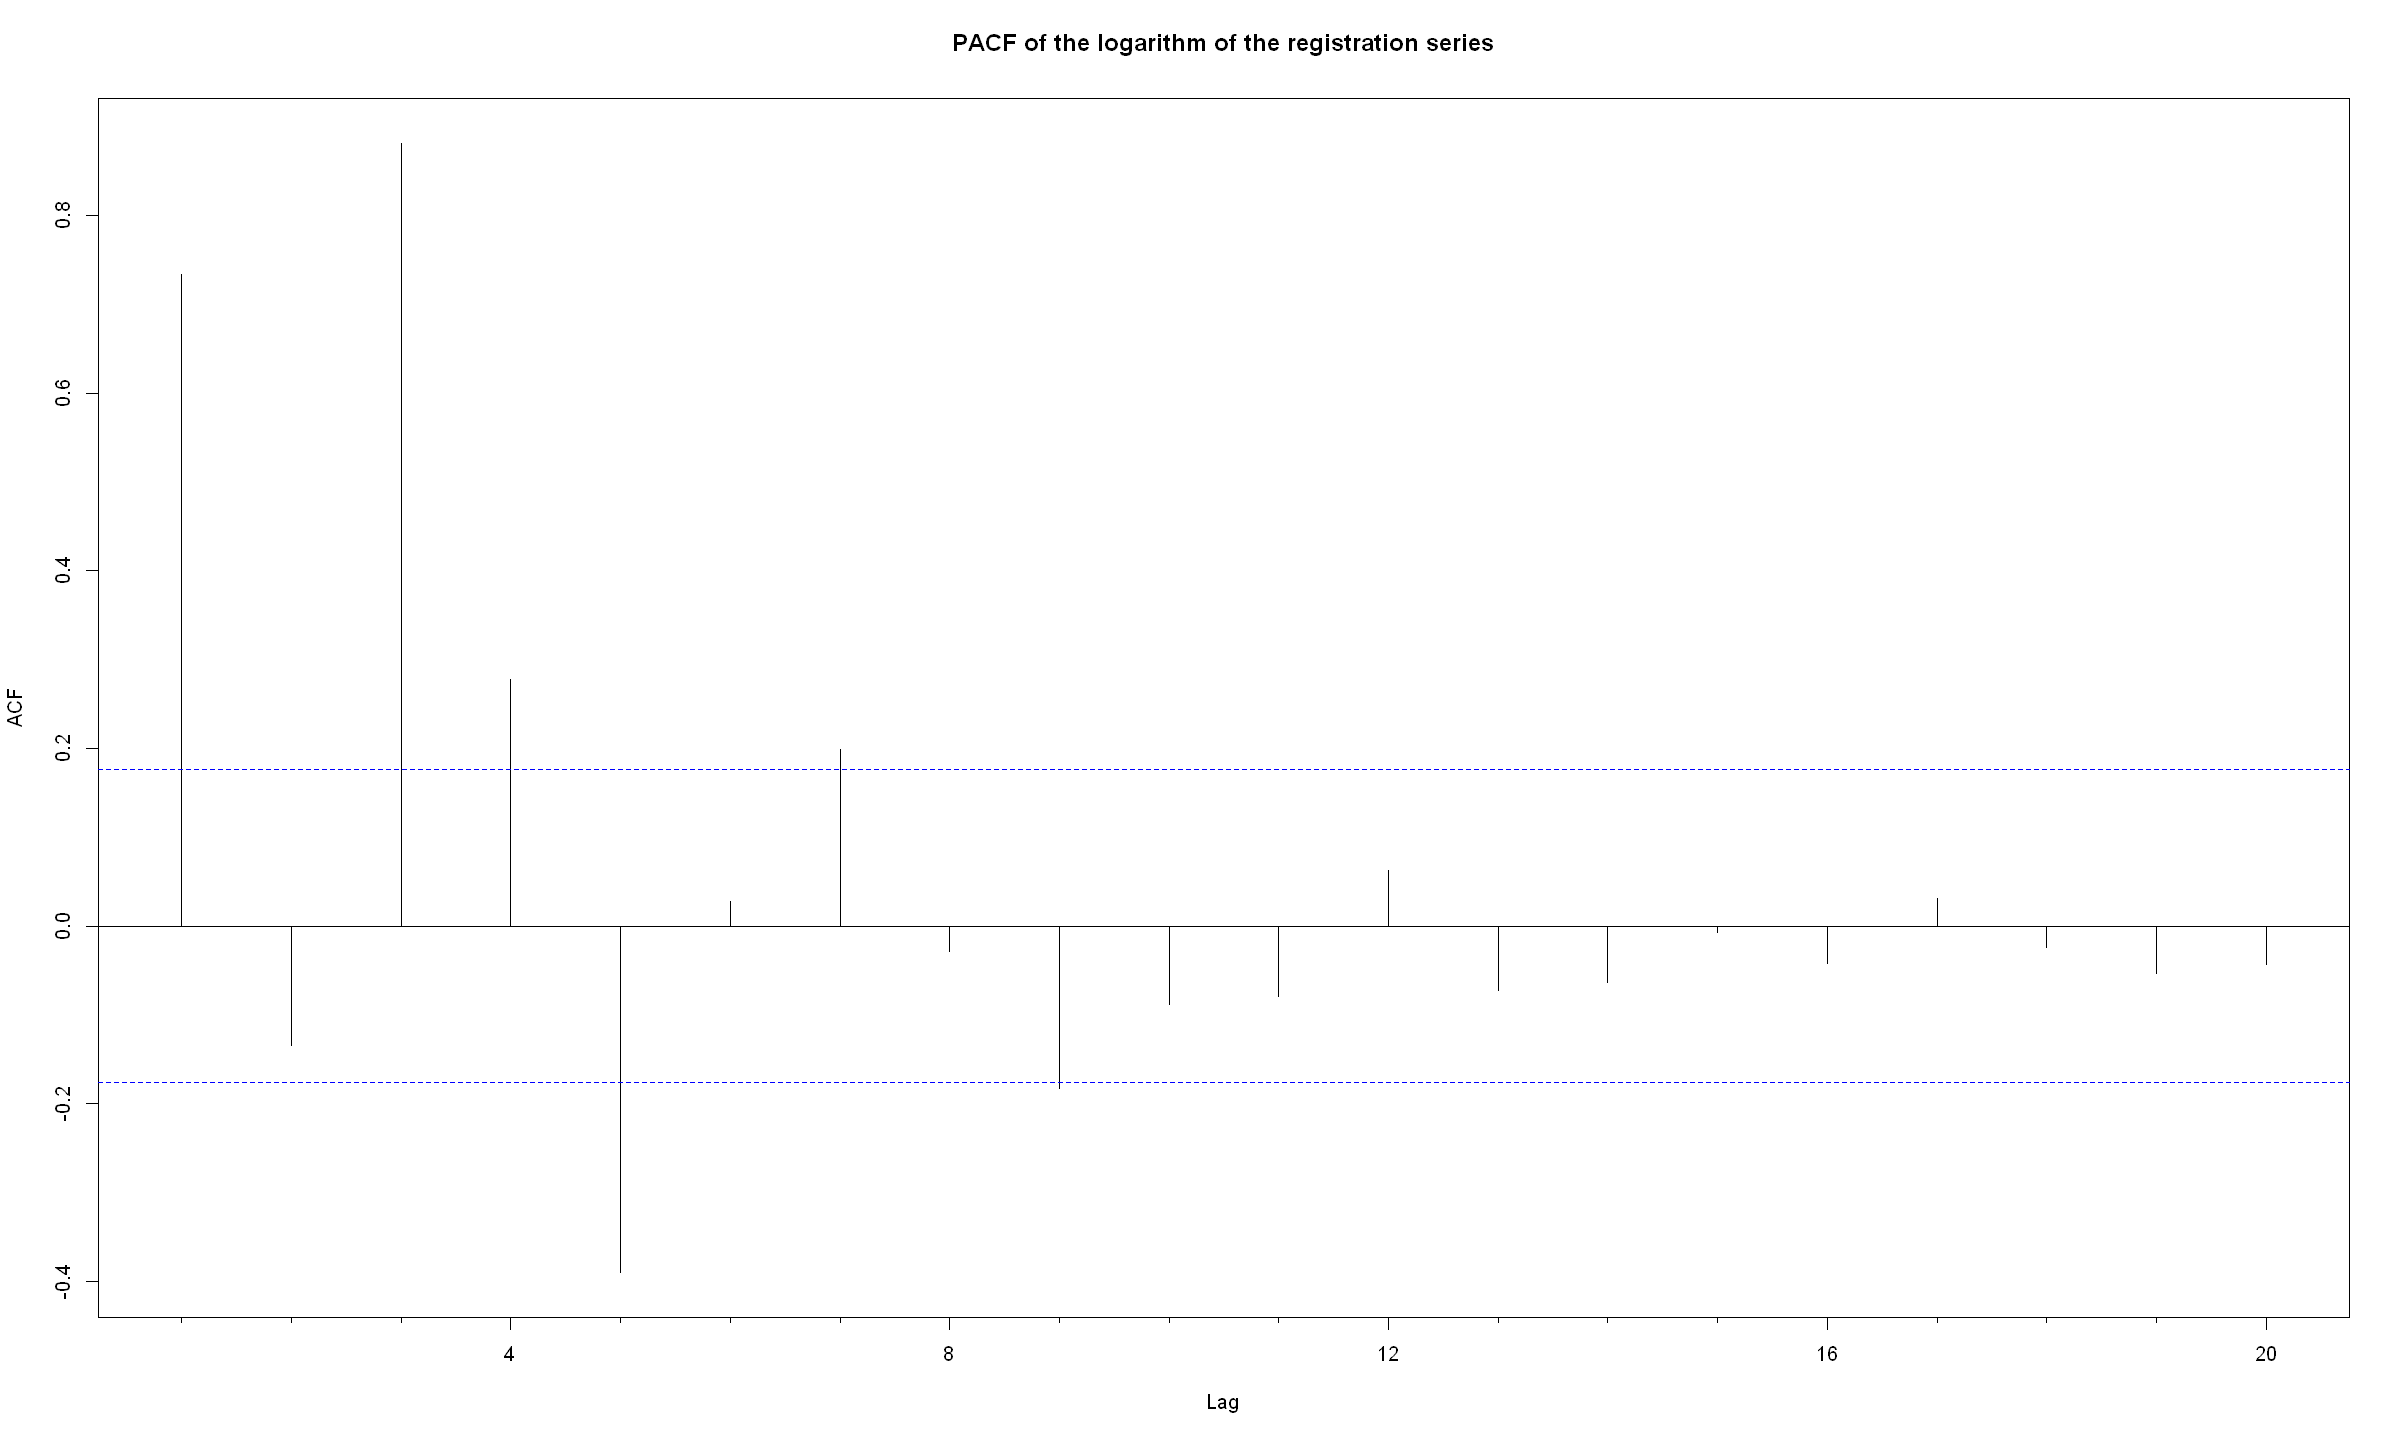

In [15]:
Pacf(X.tilde,main="PACF of the logarithm of the registration series",xlab="Lag",ylab="ACF")

We transform the $\tilde{X}_t$ series by applying the regular differencing operator $\nabla$

In [16]:
Wt=diff(X.tilde,lag=1,differences=1)

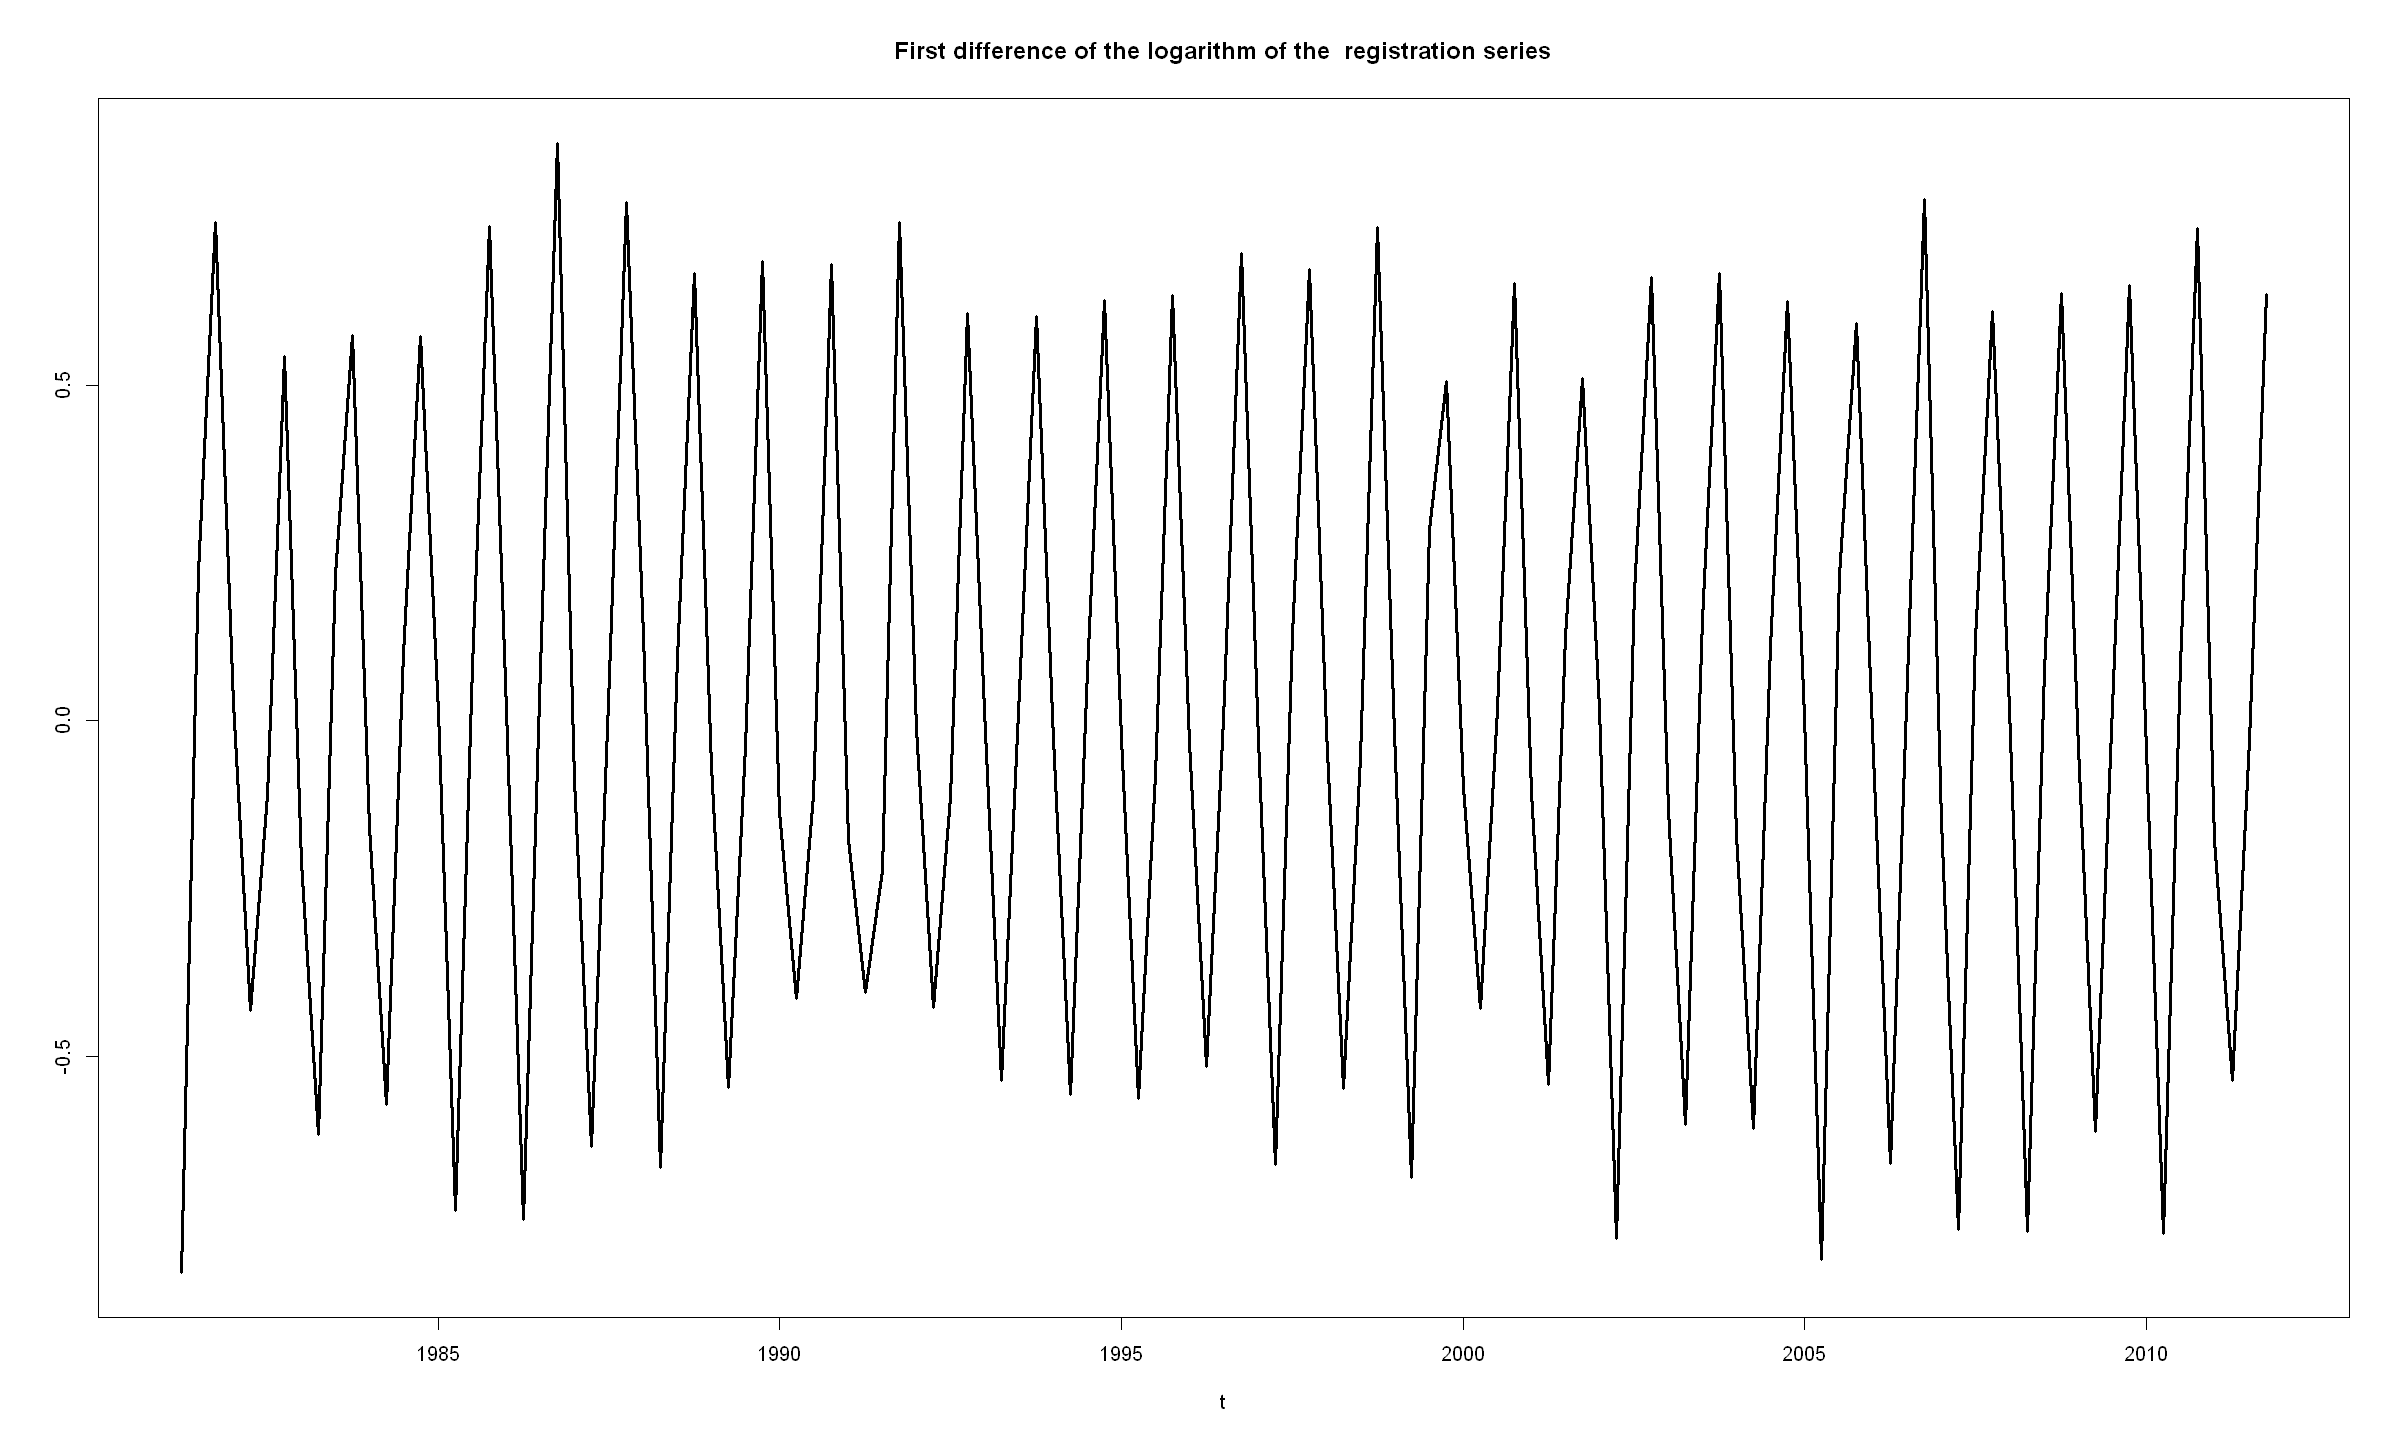

In [17]:
ts.plot(Wt,xlab="t", ylab="",main="First difference of the logarithm of the  registration series",type="l", lwd=3)

Let  $W_t = \nabla \tilde{X}_t = \tilde{X}_t - \tilde{X}_{t-1} = \log(X_t) - \log(X_{t-1})$ 

In order to remove the seasonal component,

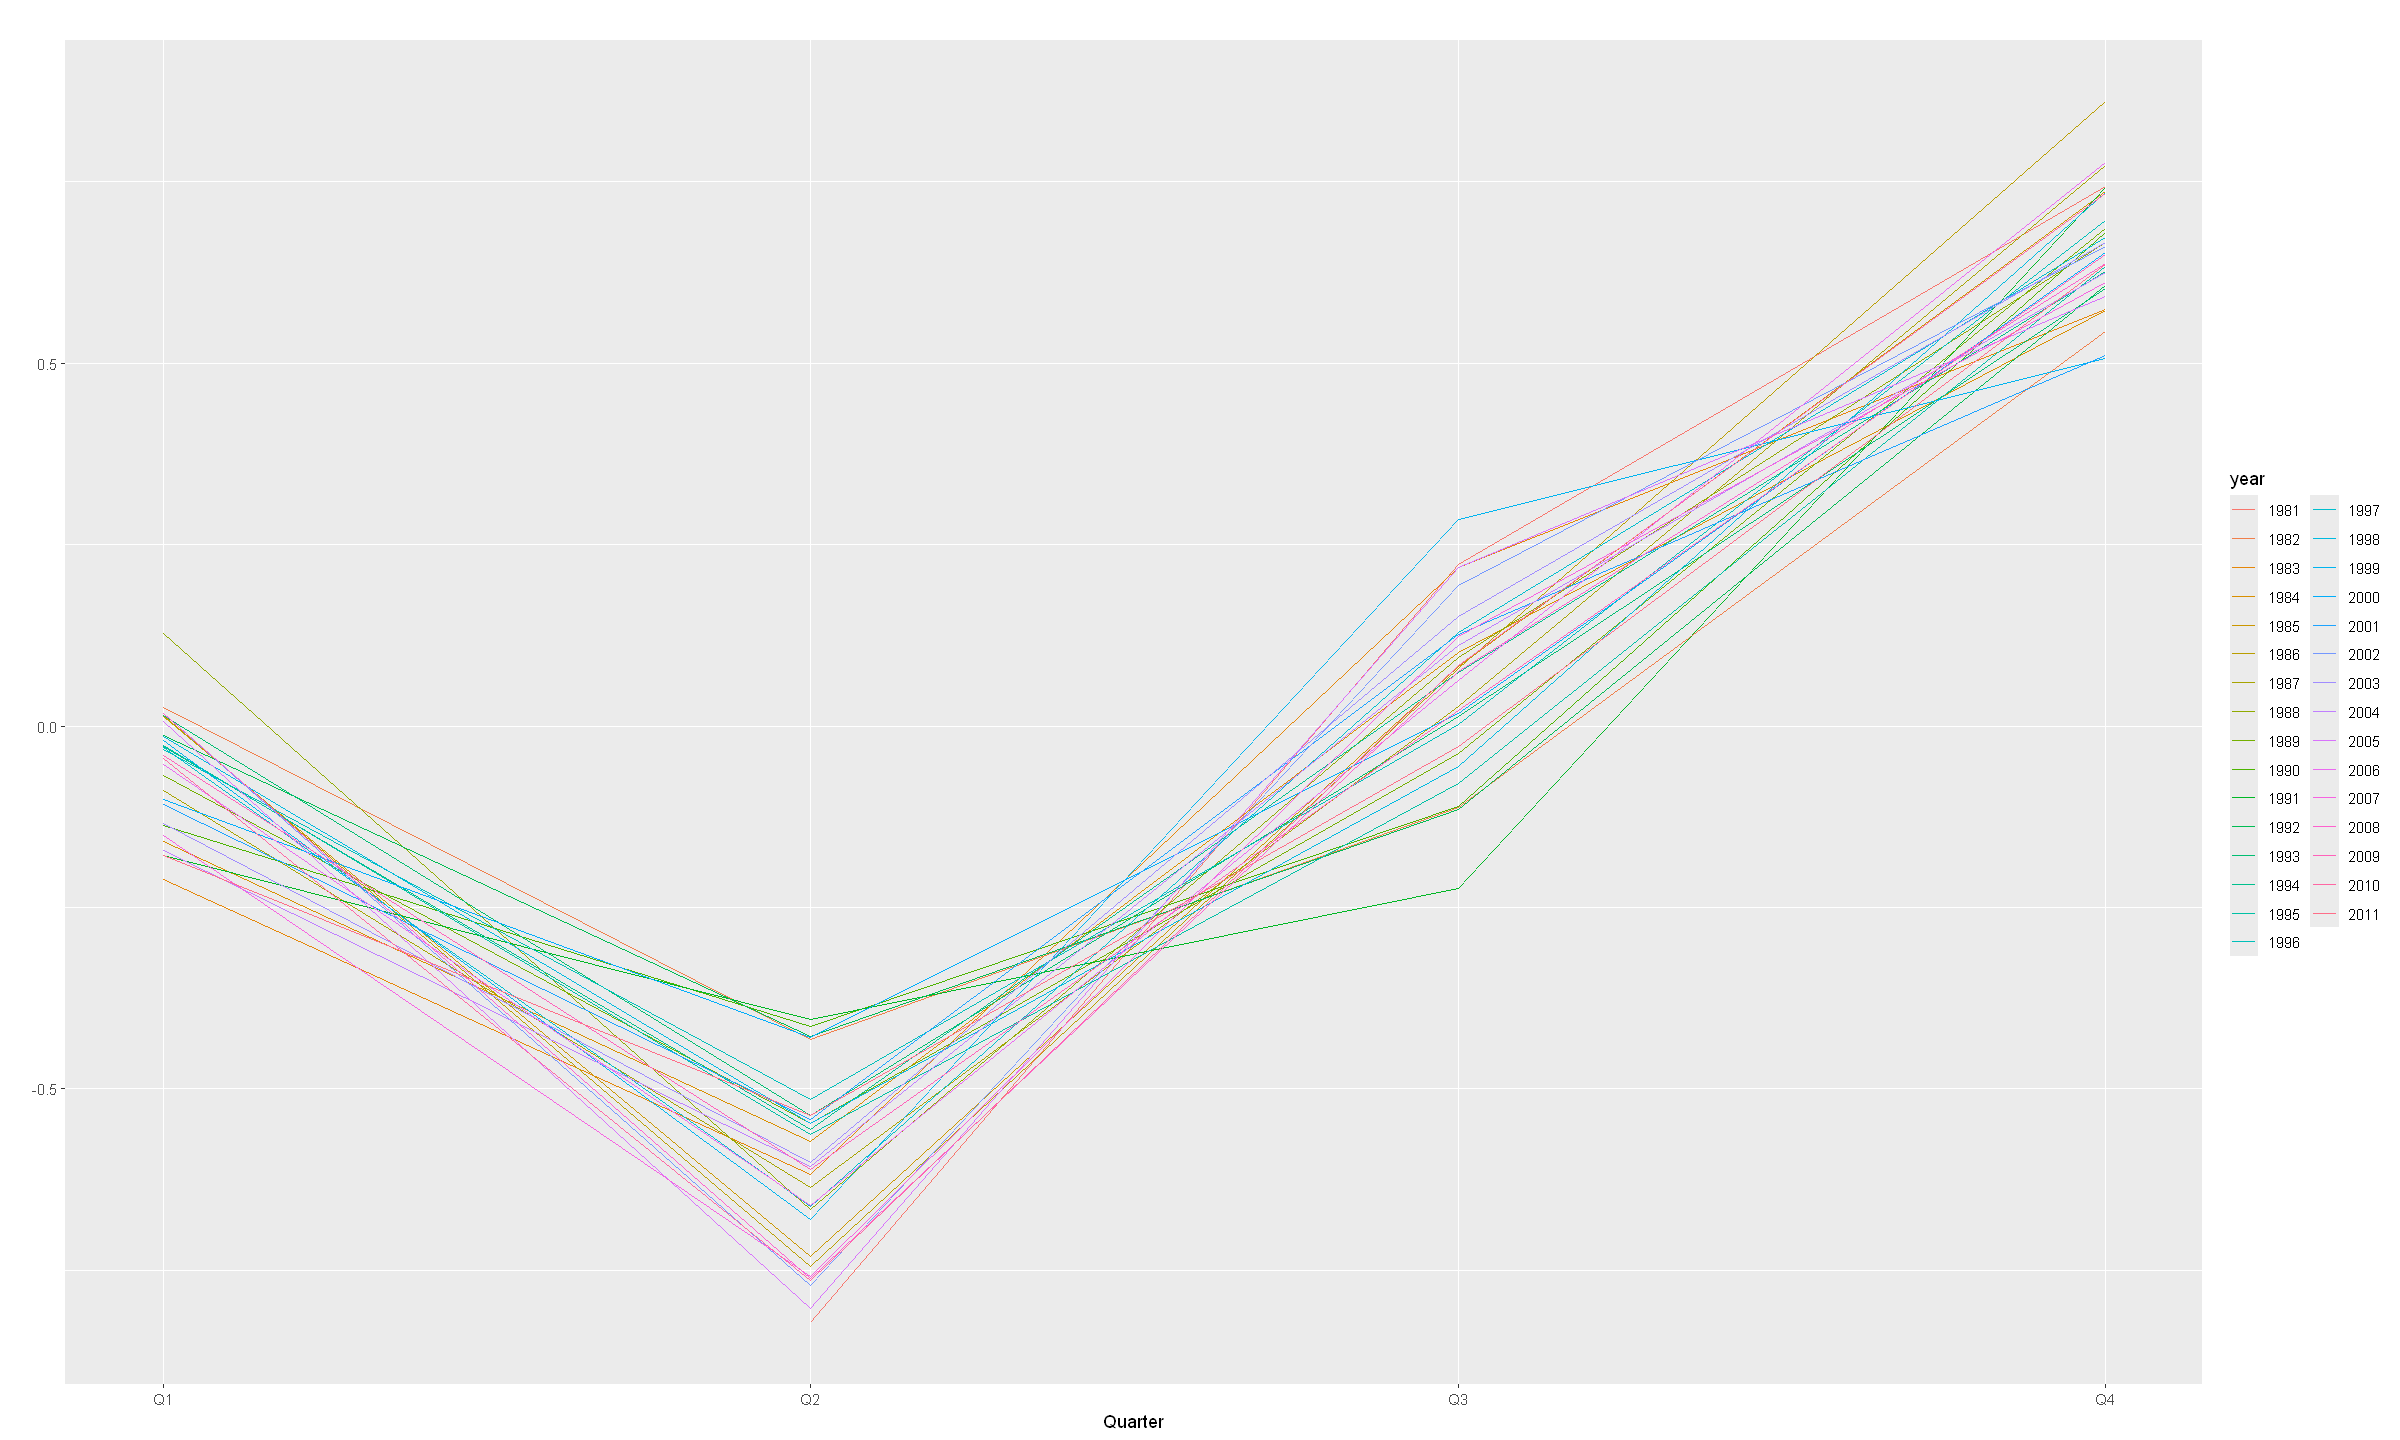

In [18]:
ggseasonplot(Wt, main=" ",lwd=6)

ACF transformed series

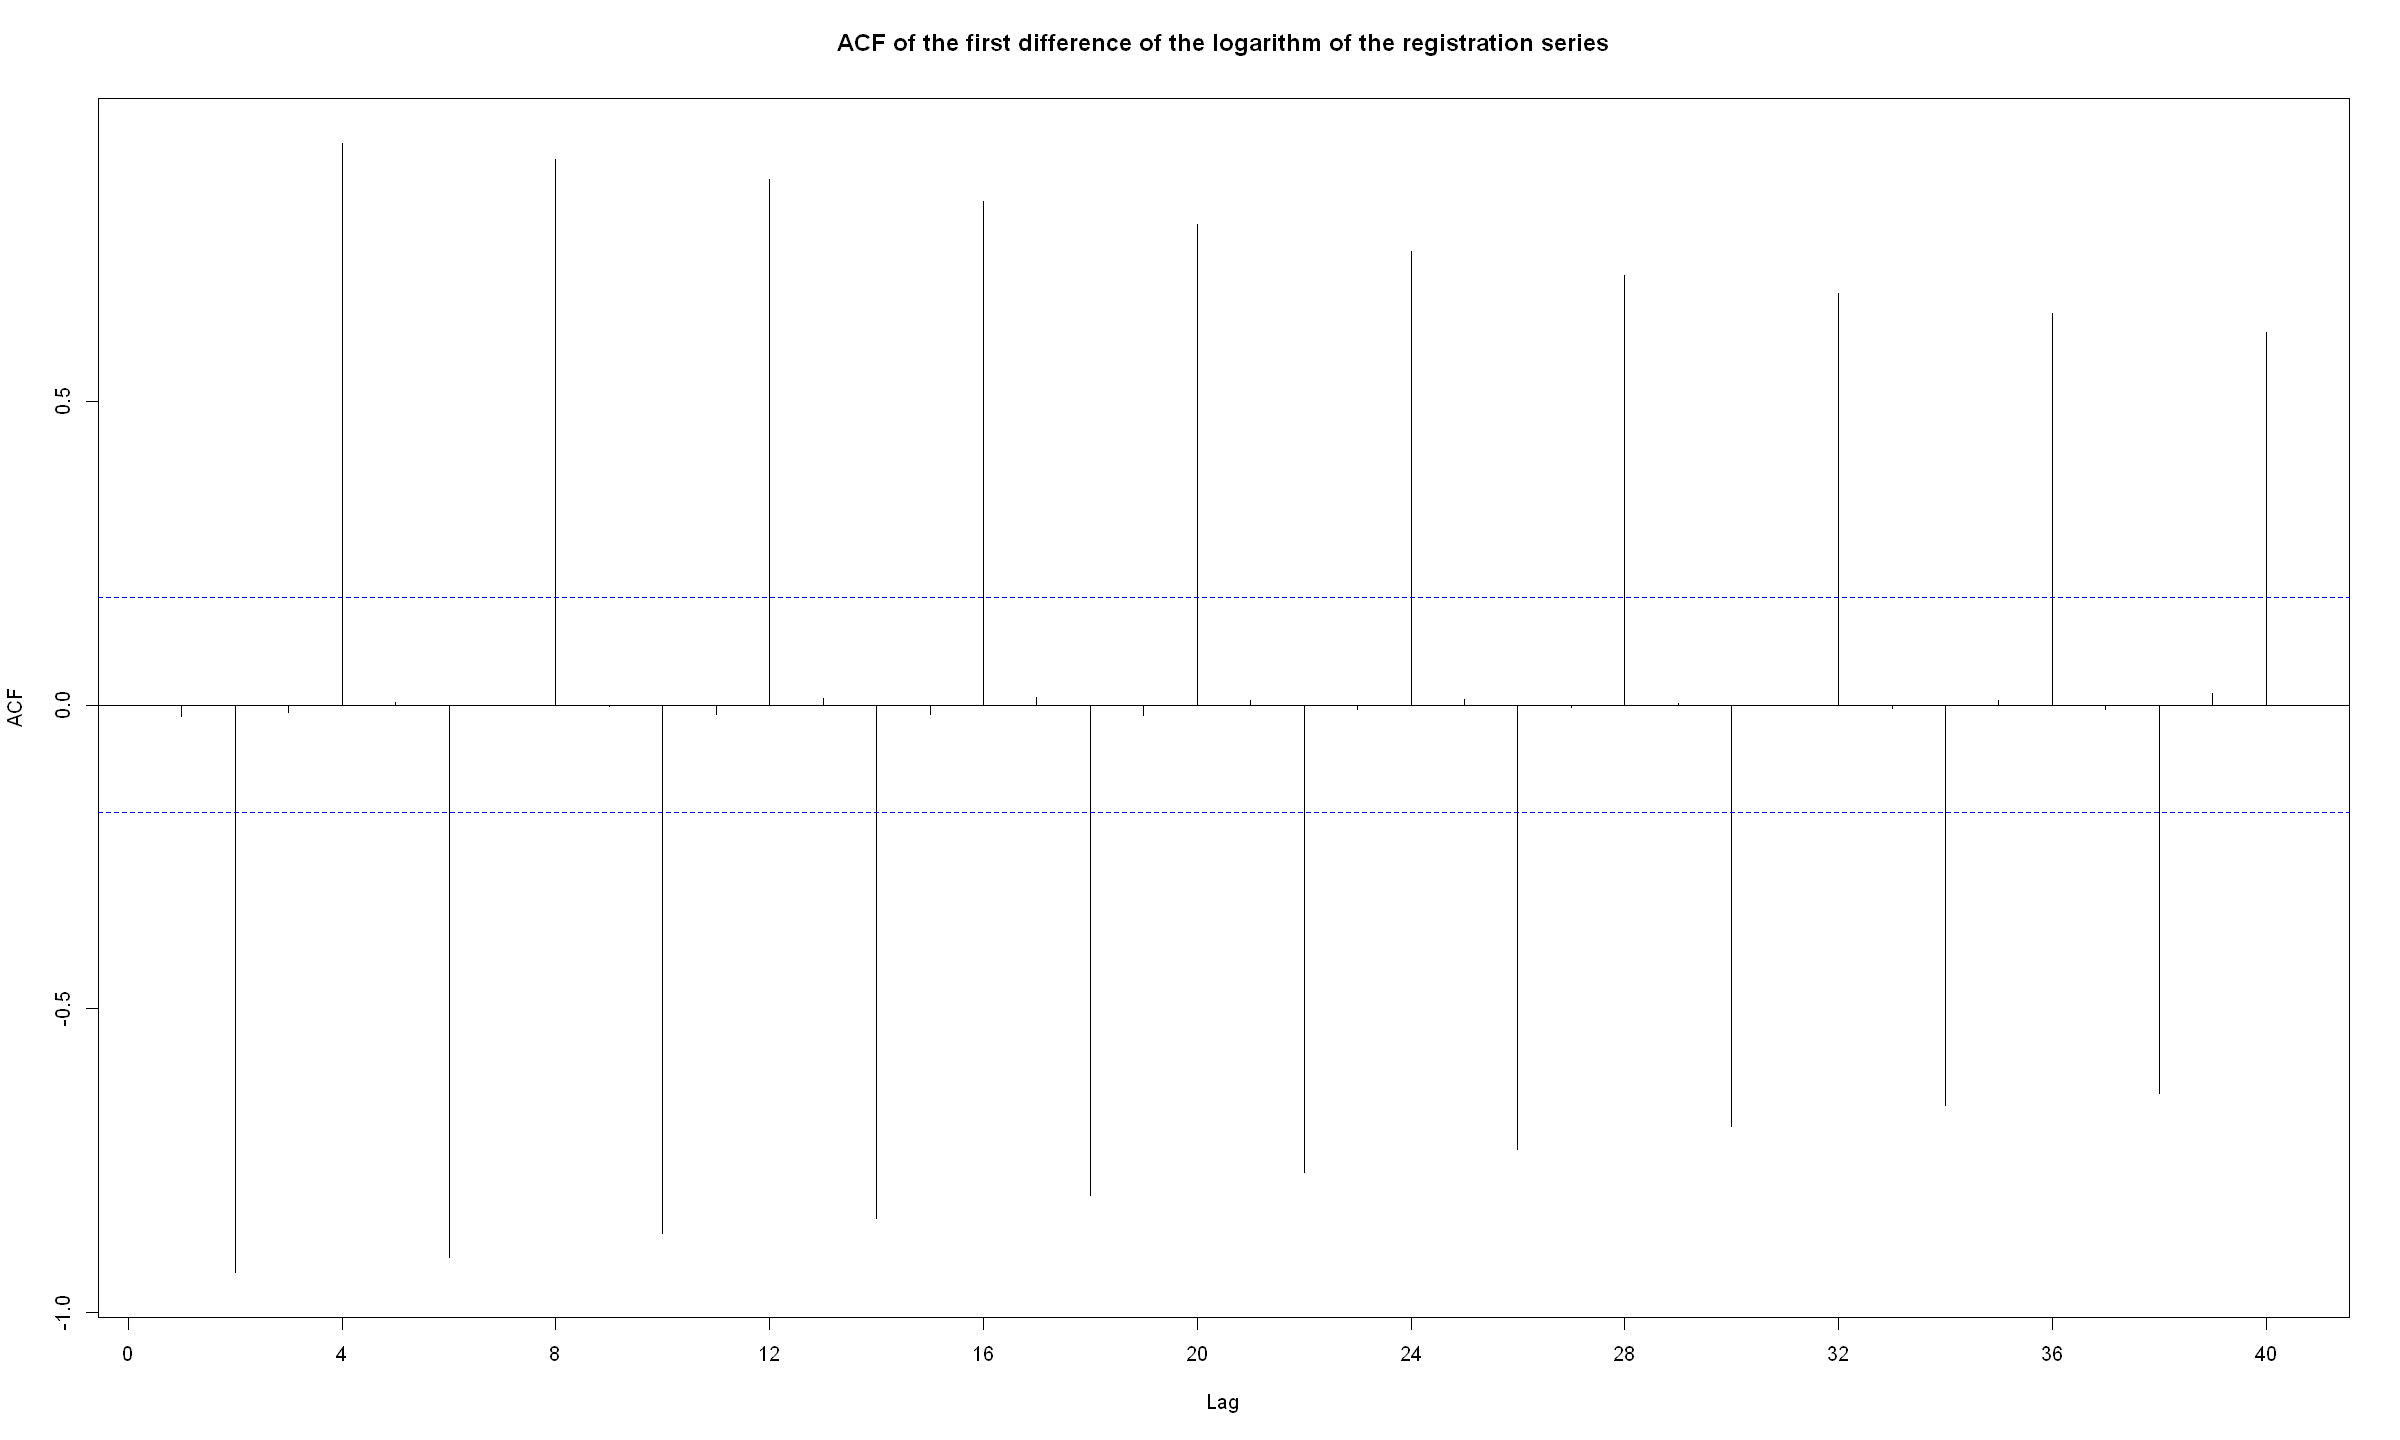

In [19]:
Acf(Wt,40, main="ACF of the first difference of the logarithm of the registration series",xlab="Lag",ylab="ACF")


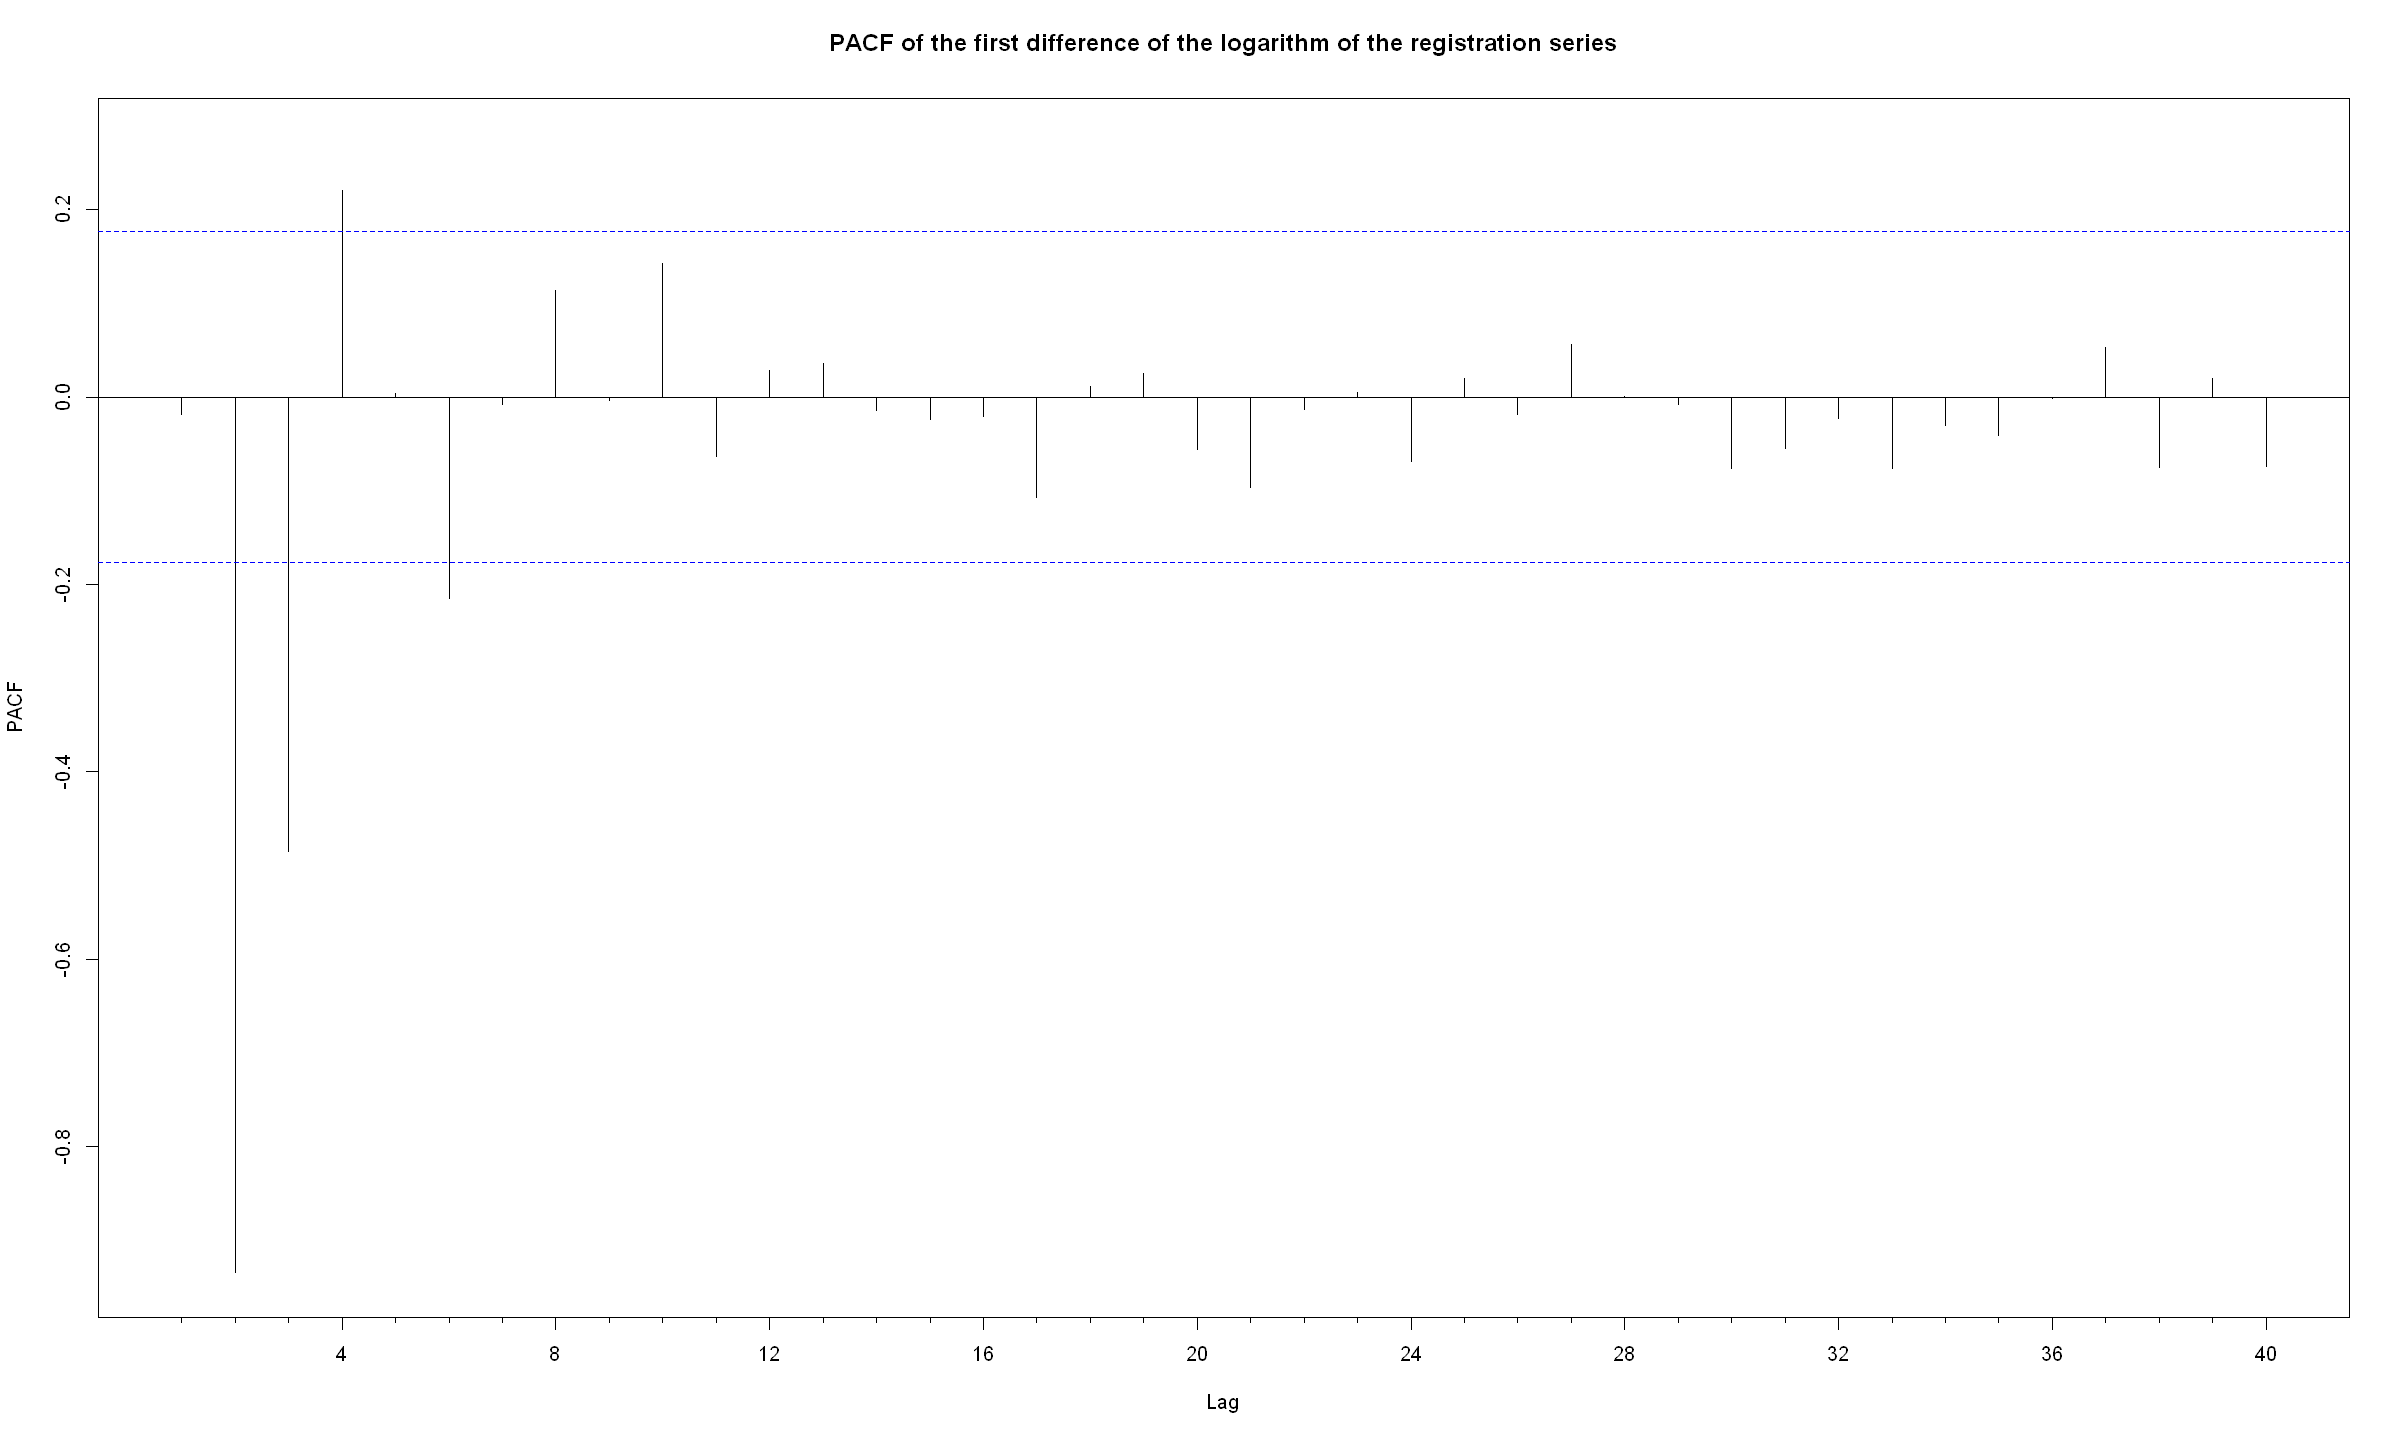

In [20]:
Pacf(Wt,40, main="PACF of the first difference of the logarithm of the registration series",xlab="Lag",ylab="PACF")


Both the seasonal plot and the ACF suggest the presence of a seasonal component of period $s = 4$,  and thus the need to apply the seasonal difference operator $ \nabla_{4} = (1 - B^{4}) $  to remove the seasonal component.

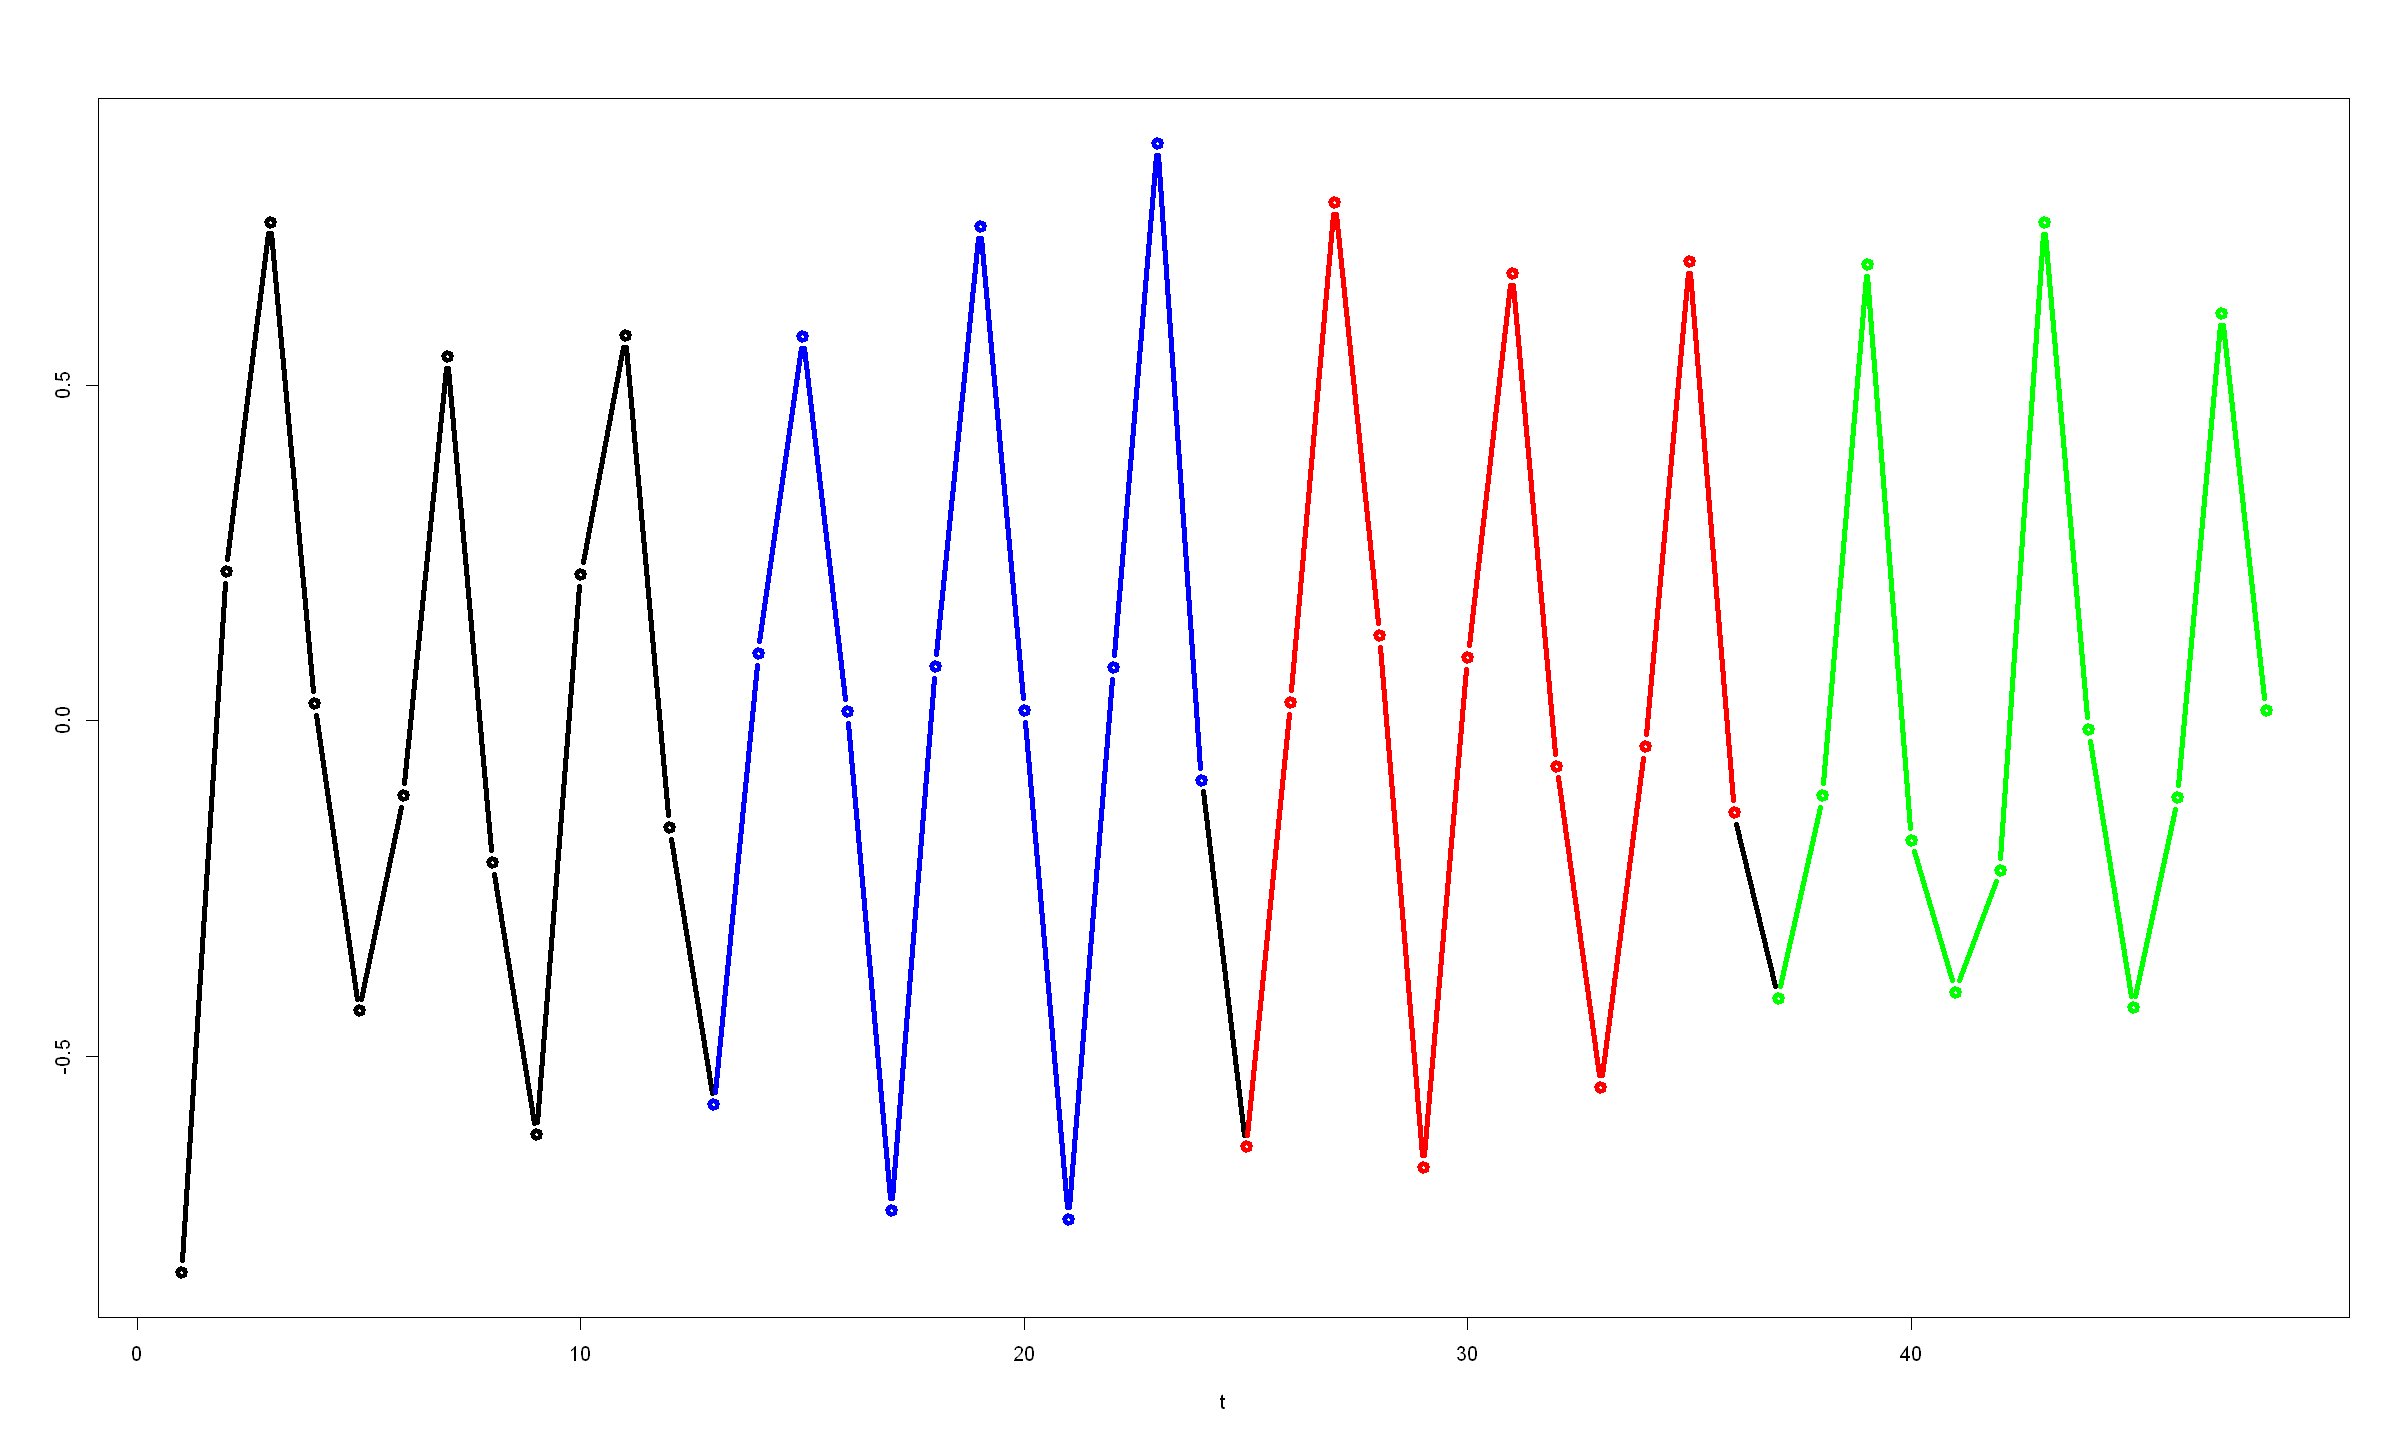

In [21]:
ts.plot(Wt[1:48],xlab="t", ylab="",main="",type="b")  
points(seq(1,48),Wt[1:48],type="b",lwd=4)
points(seq(13,24),Wt[13:24],type="b",col="blue",lwd=4)
points(seq(25,36),Wt[25:36],type="b",col="red",lwd=4)
points(seq(37,48),Wt[37:48],type="b",col="green",lwd=4)

Transform the $ \{ W_t \} $ series by applying the seasonal differencing operator $\nabla_{4}$.

In [68]:
Wt.1=diff(Wt, lag=4,differences=1)

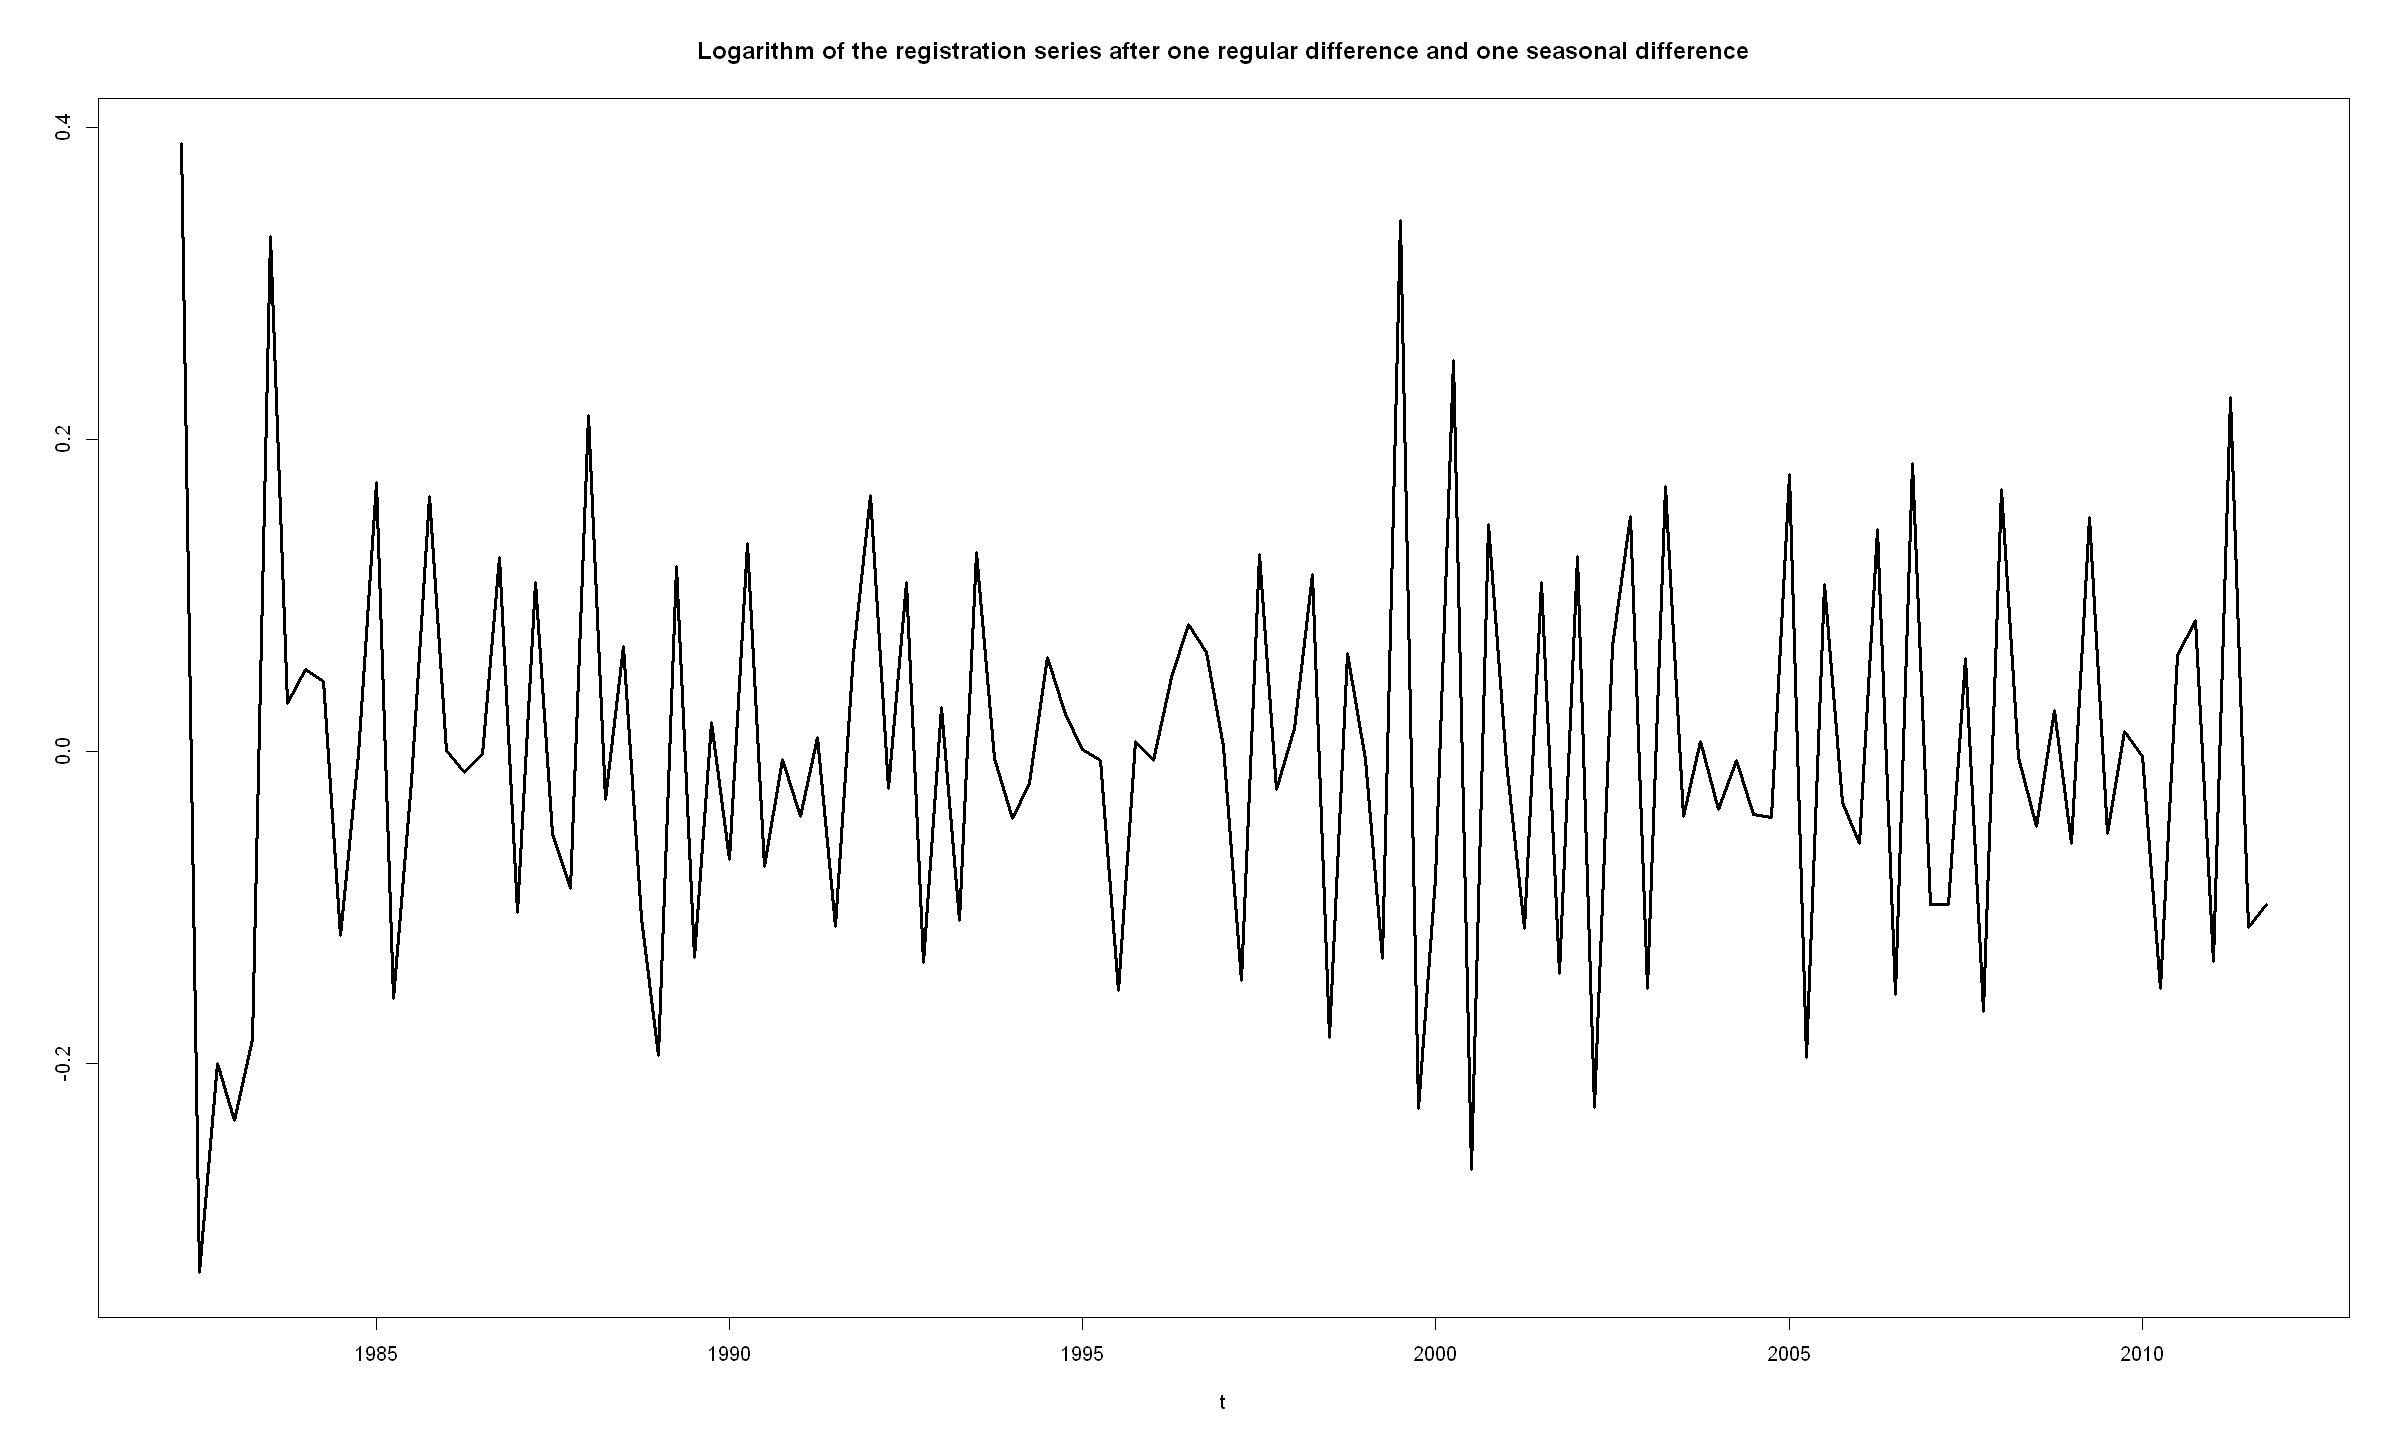

In [23]:
ts.plot(Wt.1,xlab="t", ylab="",main="Logarithm of the registration series after one regular difference and one seasonal difference",type="l",lwd=3)

Let $ \tilde{W}_t = \nabla_{4} W_t = W_t - W_{t-4} $ $= [\log(X_t) - \log(X_{t-1})] - [\log(X_{t-4}) - \log(X_{t-5})]  
= \log(X_t) - \log(X_{t-1}) - \log(X_{t-4}) + \log(X_{t-5})
$


The ACF of the transformed series $\tilde{W}_t $:

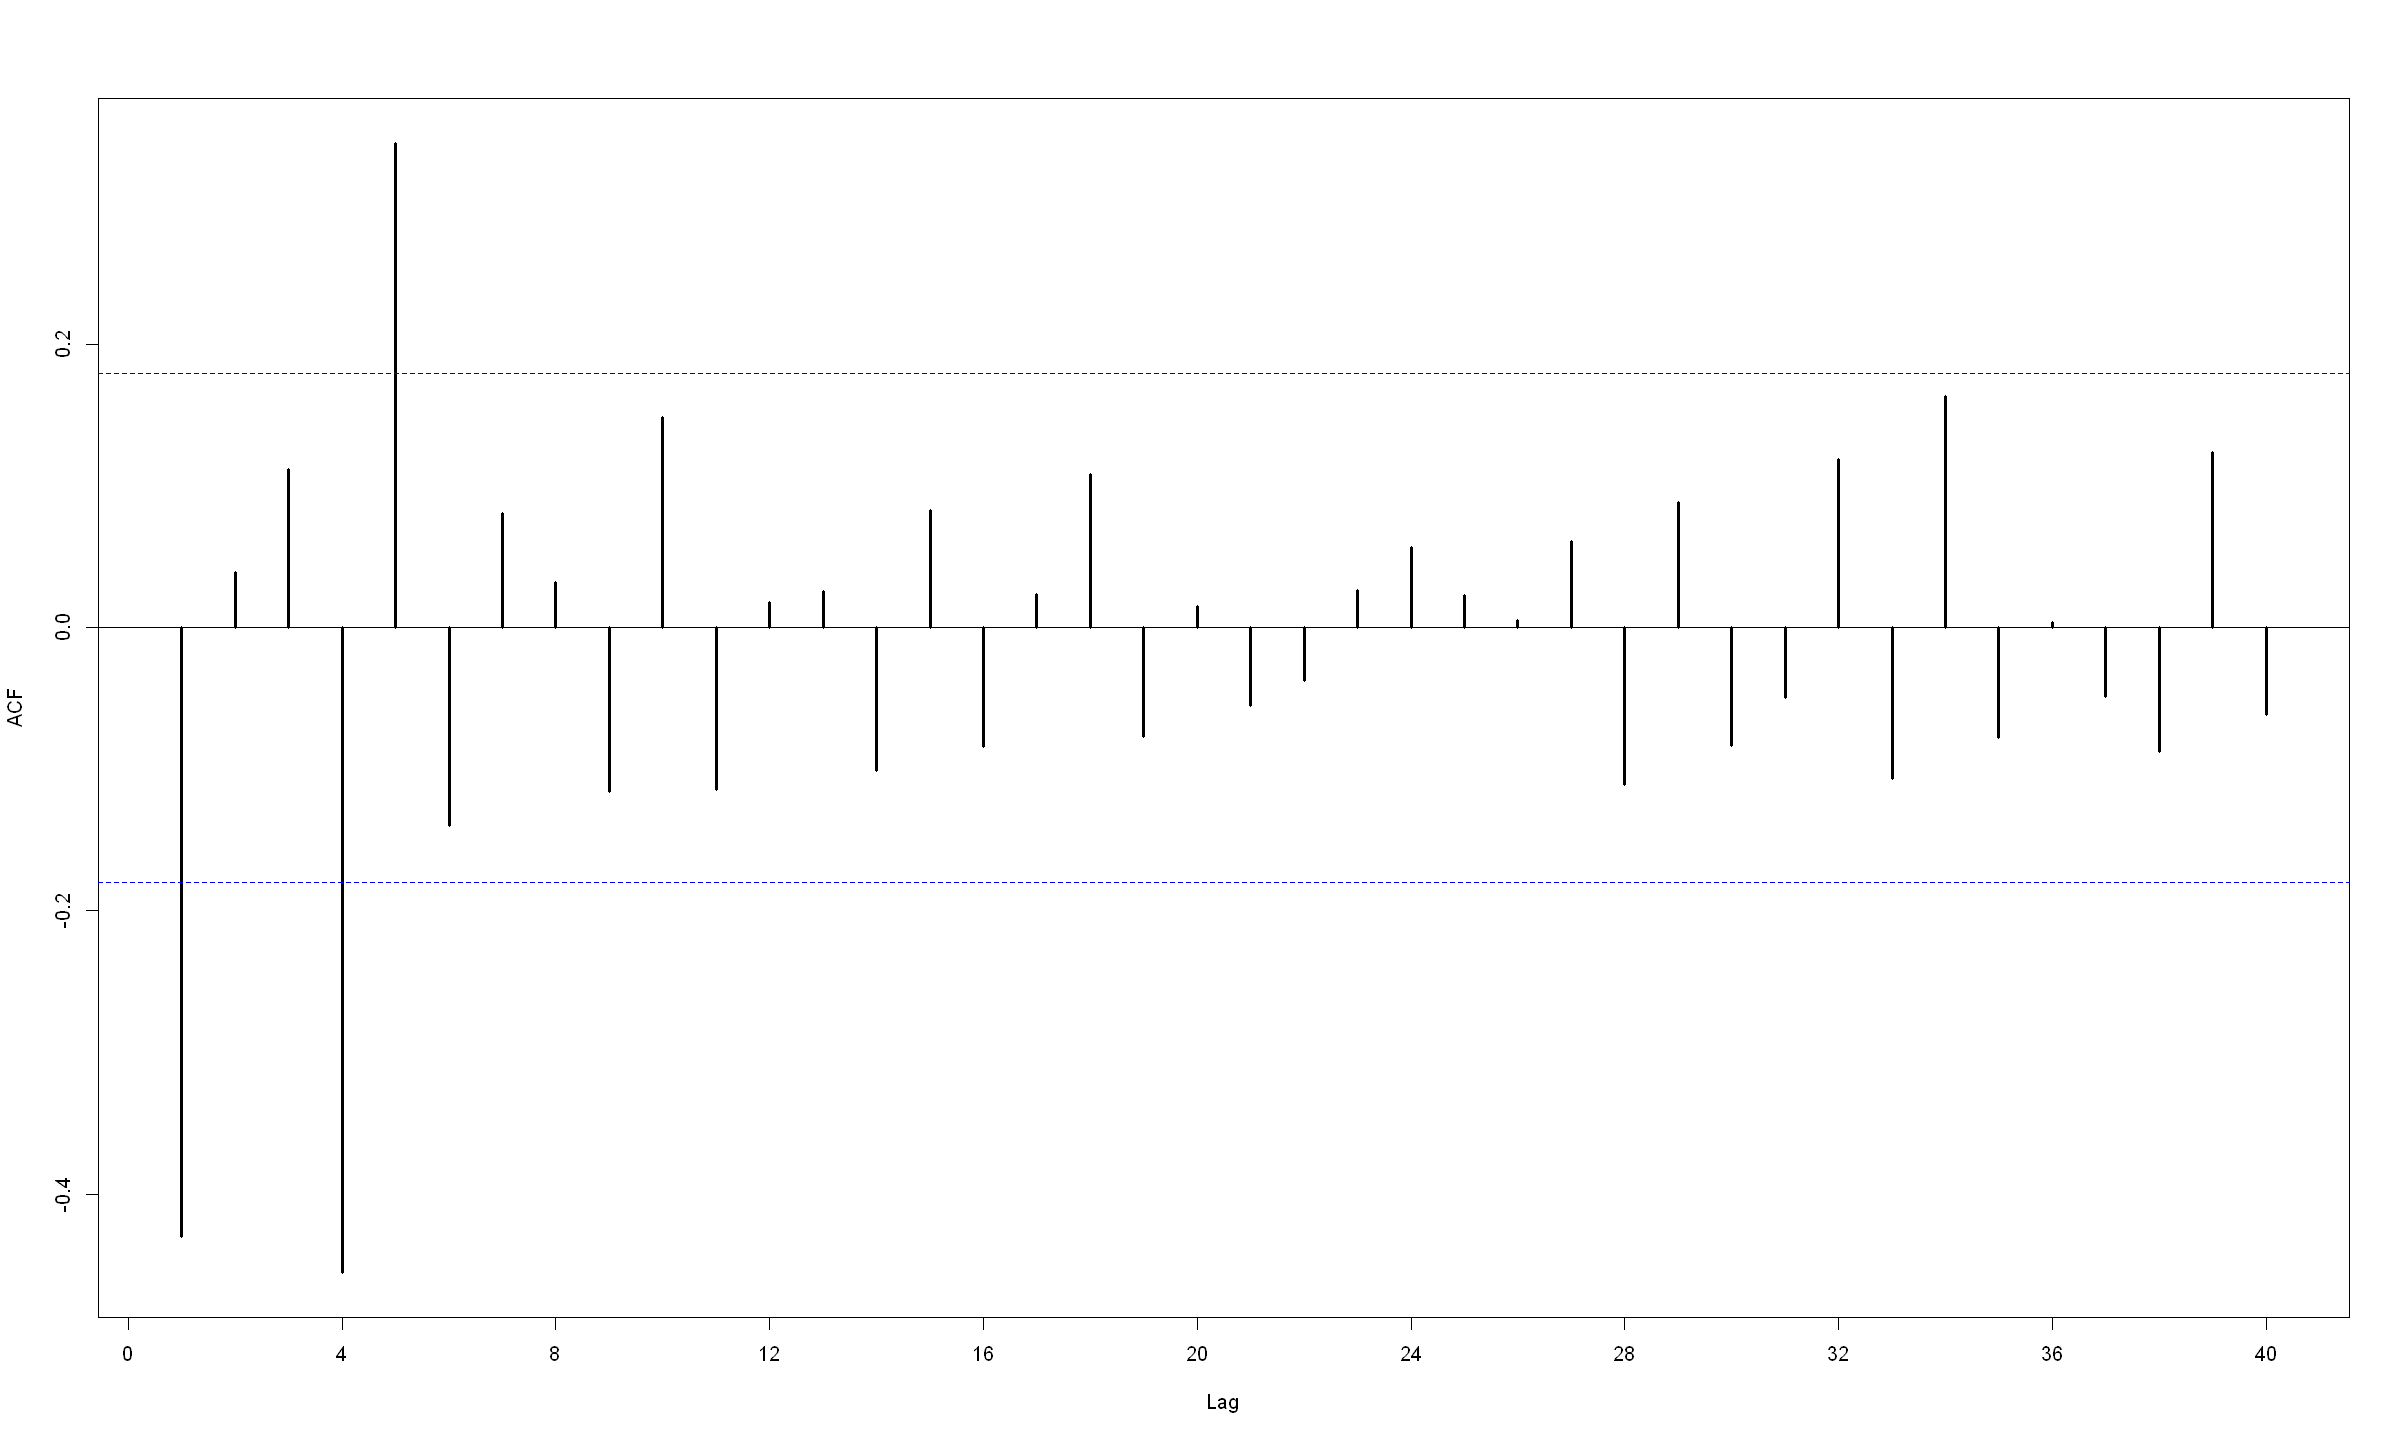

In [24]:
Acf(Wt.1,40, main="",xlab="Lag",ylab="ACF", lwd=3)

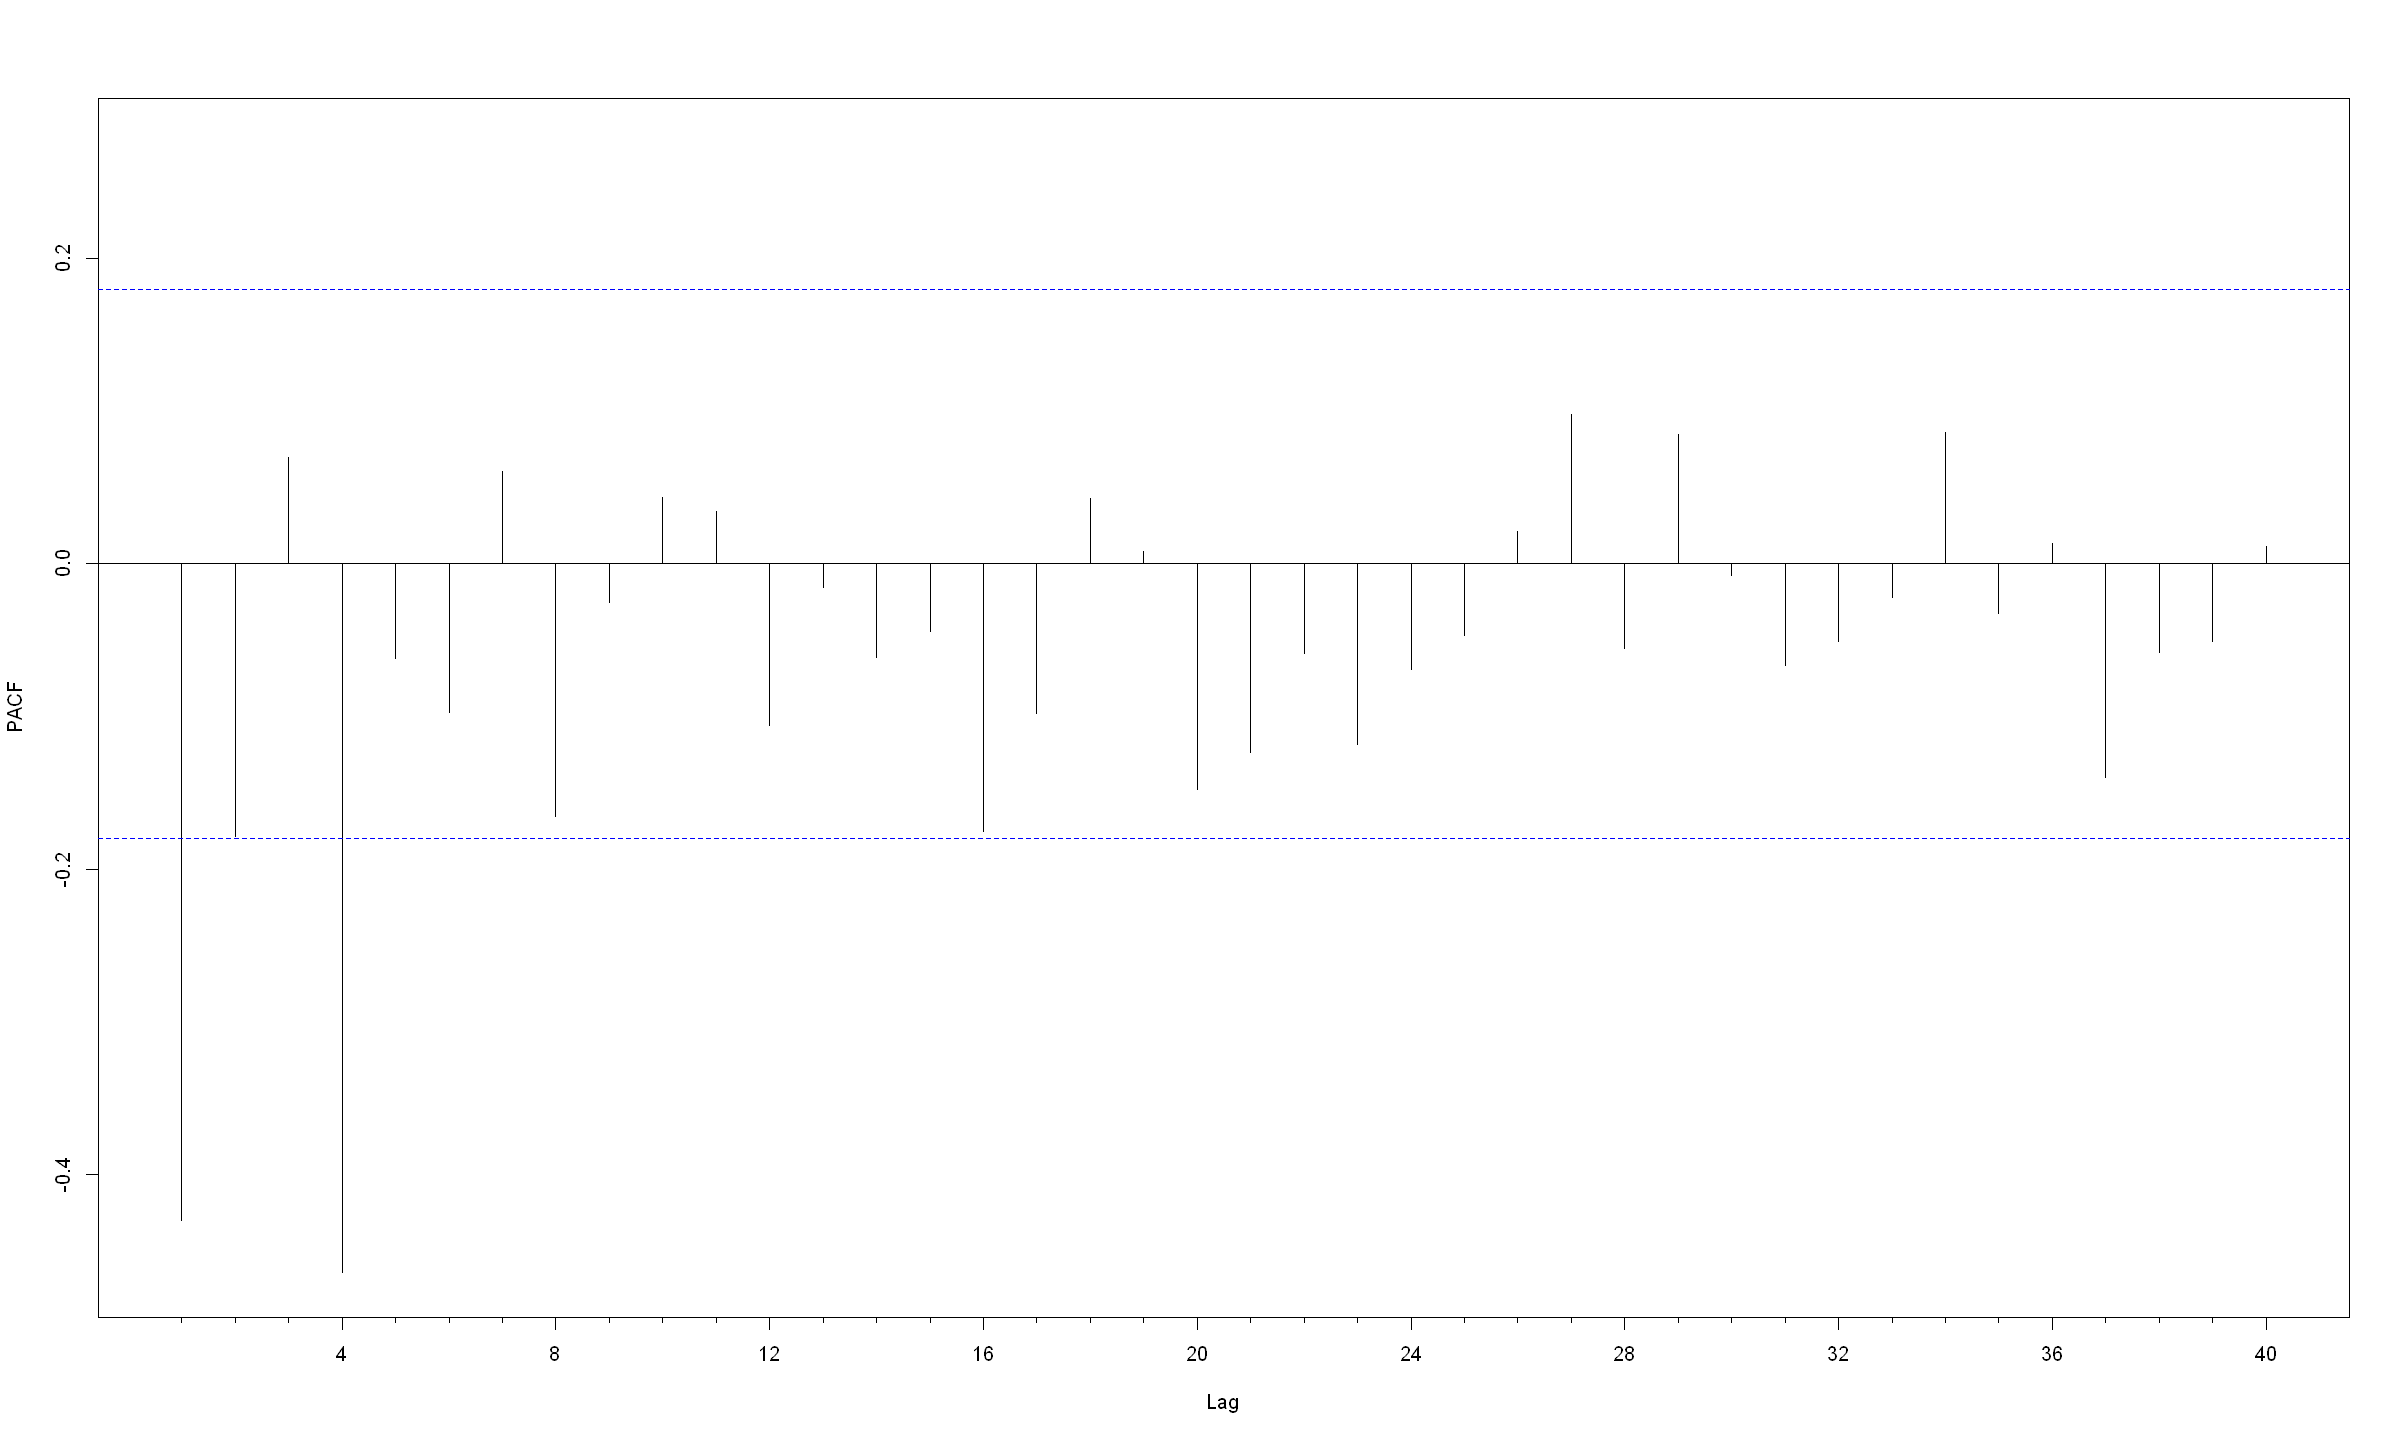

In [25]:
Pacf(Wt.1,40, main="",xlab="Lag",ylab="PACF")

## Identification


### Absolute value and painting:

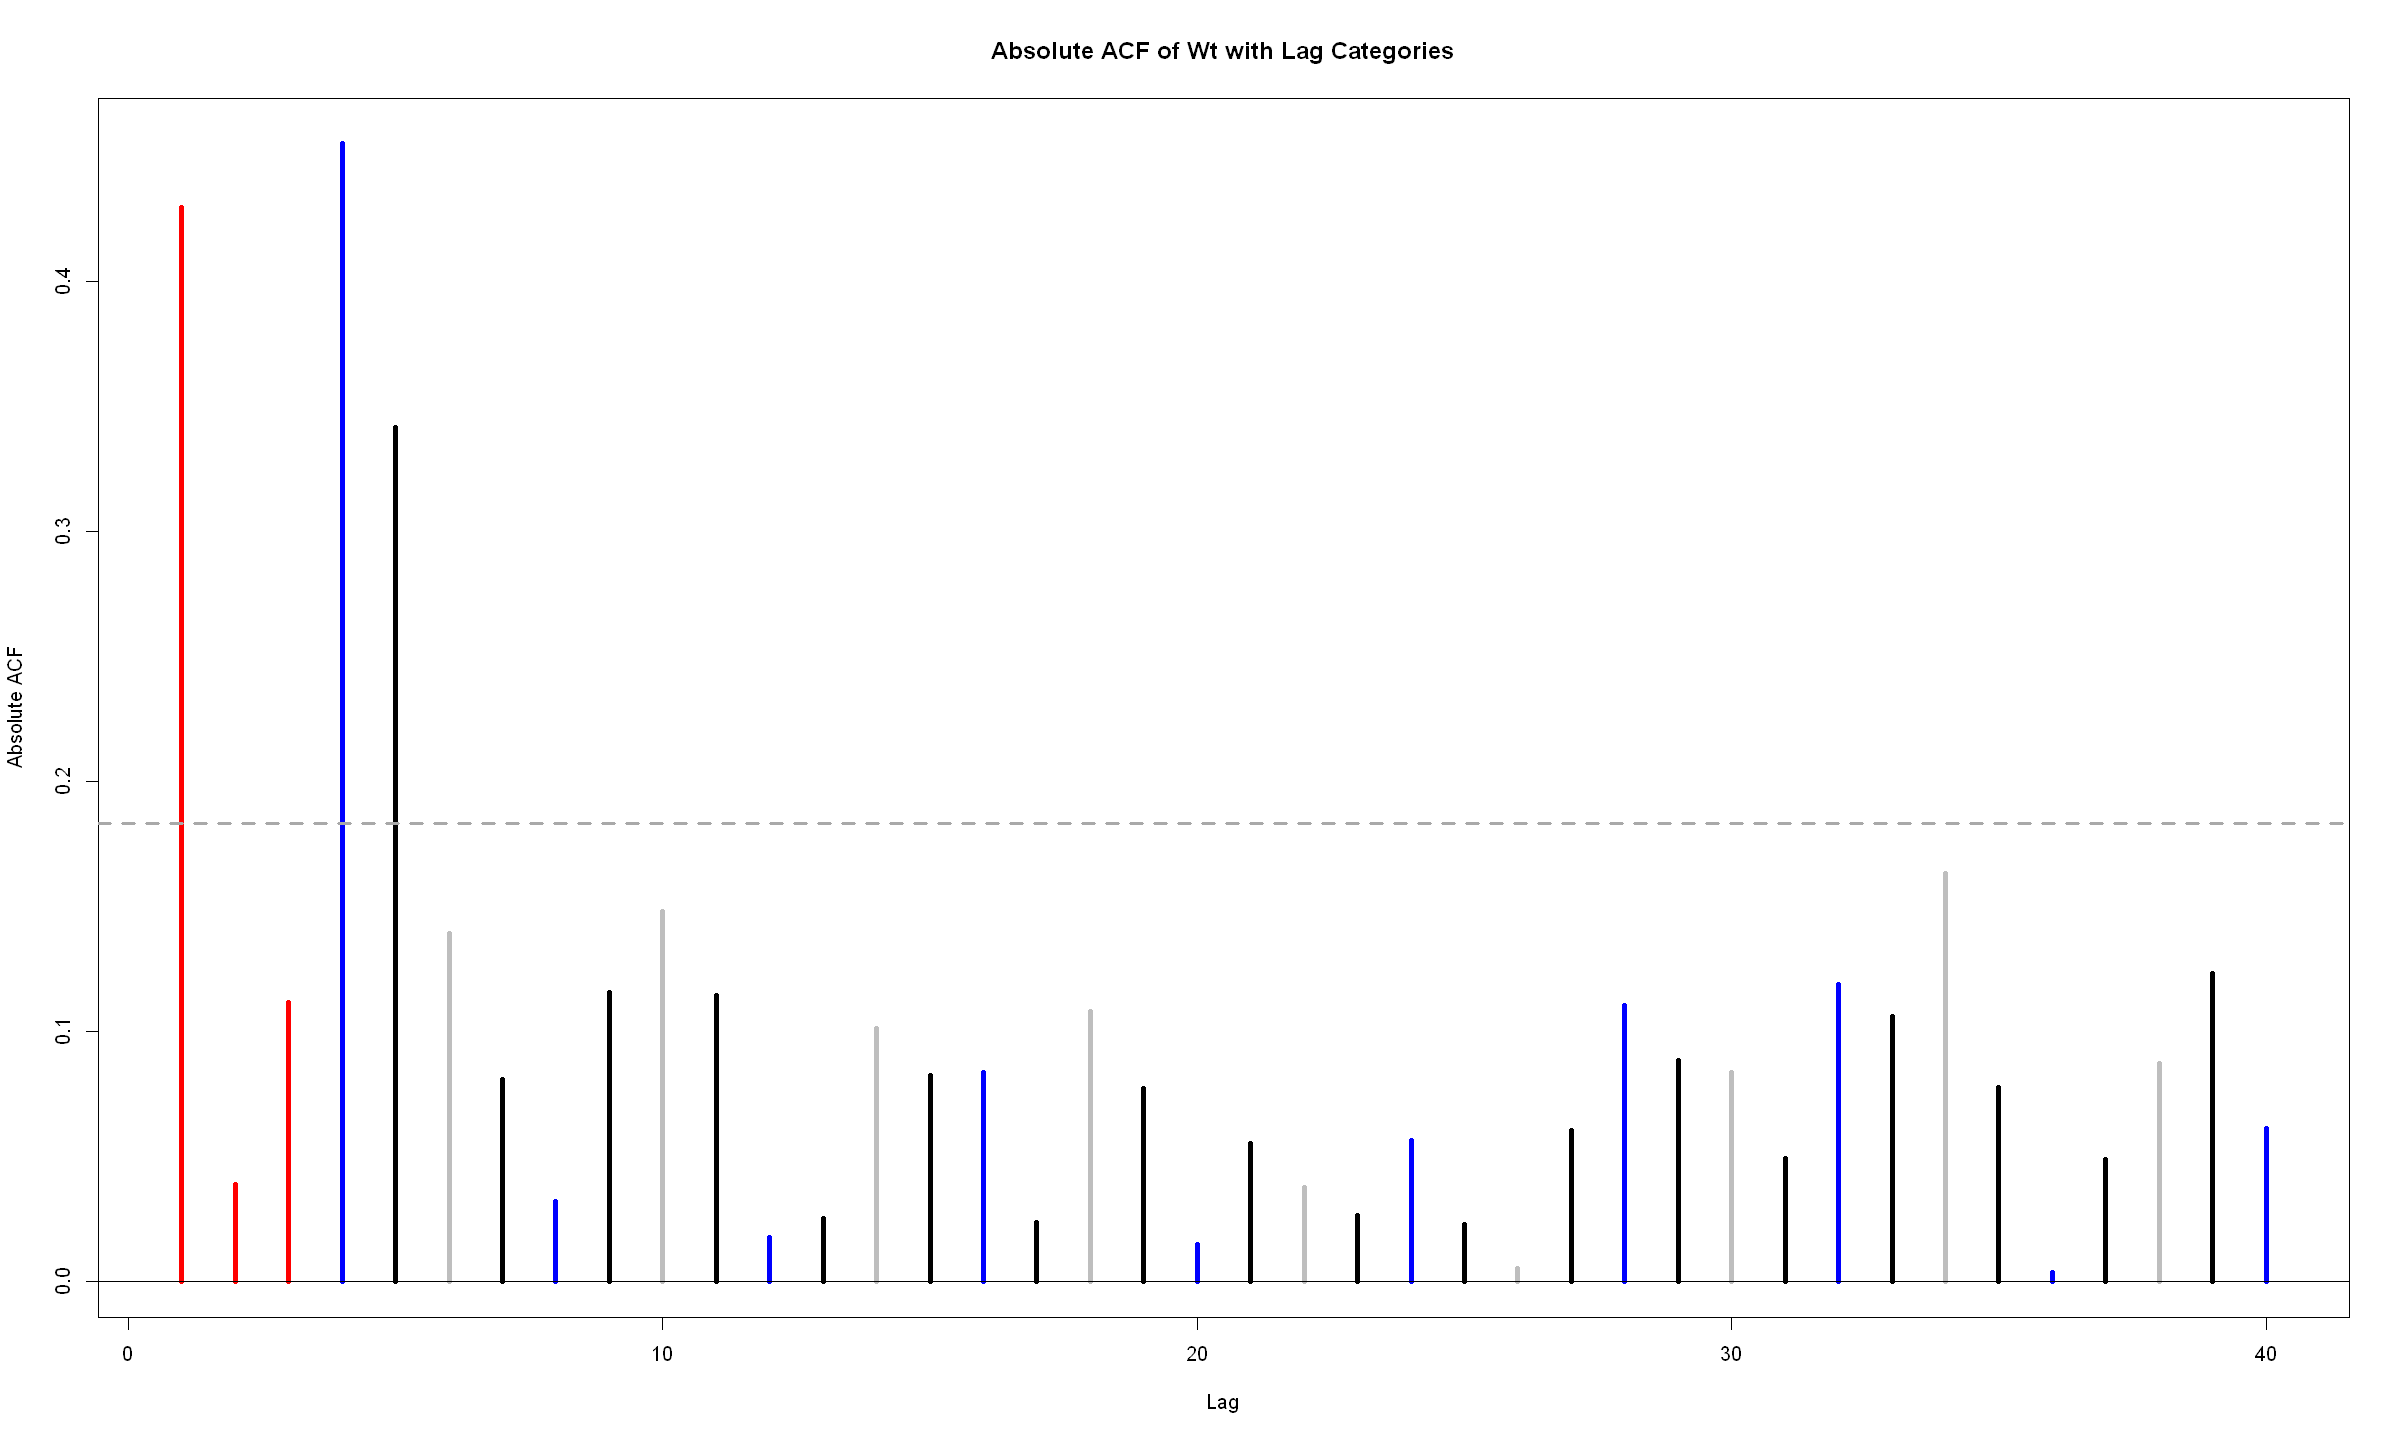

In [69]:
n <- length(Wt.1)

h_conf <- 2 / sqrt(n)

acf_res <- acf(Wt.1, lag.max = 40, plot = FALSE)

acf_vals <- abs(acf_res$acf[-1])   

lags <- seq_len(length(acf_vals))   # 1,2,…,40

seasonal_period   <- 4
small_lags        <- 1:3
seasonal_lags     <- seq(seasonal_period, max(lags), by = seasonal_period)
interaction_lags  <- sort(unique(unlist(
  lapply(seasonal_lags, function(s) c(s-1, s+1))
)))
interaction_lags <- interaction_lags[interaction_lags >= 1 & interaction_lags <= max(lags)]

cols <- sapply(lags, function(l) {
  if      (l %in% small_lags)       "red"
  else if (l %in% seasonal_lags)    "blue"
  else if (l %in% interaction_lags) "black"
  else                               "grey"
})

plot(
  lags,
  acf_vals,
  type = "h",
  lwd  = 4,
  col  = cols,
  xlab = "Lag",
  ylab = "Absolute ACF",
  main = "Absolute ACF of Wt with Lag Categories"
)
abline(h = 0, col = "black")
abline(h =  h_conf,   col = "darkgrey", lty = 2, lwd = 3)

 ##### The line has been calculated directly with con abline; at height $\dfrac{2}{ \sqrt{n}}$. It has been the same with the graphic of the absolute value of the PACF

---
---

#### ACF Characteristics:
- The regular part has 1 significant value, but there may be more than 1 value different from zero
- The seasonal part has the coefficient at Lag 1 different from zero. but other lags might be different from zero too. Seems like sinusoidal decay
- The first interaction is different from zero. No more information can be obtained from the interactions

---
#### Models based on the ACF graph:


- $\text{ARMA}(1,0) \times (0,1)_4 =  \text{AR}(1) \times \text{MA}(1)_4$  
  Regular AR(1) captures short-term persistence (if the ACF at lags 1–3 decays slowly), and seasonal MA(1) at lag 4 captures the strong spike at lag 4 in the ACF.

- $\text{ARMA}(1,0) \times (0,2)_4 =  \text{AR}(1) \times \text{MA}(2)_4$  
  Regular AR(1) as above, with seasonal MA(2) to capture not only the spike at lag 4 but also a possible significant spike at lag 8 (if present in the ACF).

- $\text{ARMA}(0,1) \times (0,1)_4 =  \text{MA}(1) \times \text{MA}(1)_4$  
The slow decay at lags 1–3 in the ACF suggests a regular MA(1) component, while the strong positive spike at lag 4 indicates a seasonal MA(1) component with period 4.


- $\text{ARMA}(0,1) \times (1,0)_4 =  \text{MA}(1) \times \text{AR}(1)_4$  
  Regular MA(1) models short-term negative autocorrelation (if the ACF cuts off after lag 1), and seasonal AR(1) at lag 4 captures persistent seasonal autocorrelation, which would appear as a slow decay at seasonal lags in the ACF.

- $\text{ARMA}(1,1) \times (1,0)_4 =  \text{ARMA}(1,1) \times \text{AR}(1)_4$  
  Regular ARMA(1,1) provides flexible short-term structure (if both the ACF and PACF at small lags are significant), and seasonal AR(1) at lag 4 models persistent seasonal autocorrelation.

- $\text{ARMA}(1,1) \times (0,1)_4 =  \text{ARMA}(1,1) \times \text{MA}(1)_4$  
  Regular ARMA(1,1) for flexible short-term structure, and seasonal MA(1) at lag 4 for the strong spike at lag 4 in the ACF.

- $\text{ARMA}(2,0) \times (0,1)_4 = \text{AR}(2) \times \text{MA}(1)_4$
The slow, possibly sinusoidal decay in the ACF at lags 1–3 suggests a regular AR(2) component, capturing more complex short-term persistence than AR(1). The strong spike at lag 4 in the ACF indicates a seasonal MA(1) component with period 4.

- $\text{ARMA}(0,2) \times (0,2)_4 = \text{MA}(2) \times \text{MA}(2)_4$
The presence of significant spikes at lags 2 and 8 in the ACF suggests a regular MA(2) component and a seasonal MA(2) component, respectively, capturing short-term and seasonal moving average effects.

- $\text{ARMA}(2,1) \times (0,1)_4 = \text{ARMA}(2,1) \times \text{MA}(1)_4$
The combination of a slow decay and a sharp drop in the ACF at lags 1–3 suggests a regular ARMA(2,1) component, while the spike at lag 4 supports a seasonal MA(1) component.

- $\text{ARMA}(1,0) \times (1,1)_4 = \text{AR}(1) \times \text{ARMA}(1,1)_4$
The exponential decay in the ACF at regular lags suggests a regular AR(1) component, while the pattern of a spike at lag 4 followed by a decay at lag 8 supports a seasonal ARMA(1,1) component.

- $\text{ARMA}(0,1) \times (2,0)_4 = \text{MA}(1) \times \text{AR}(2)_4$
The ACF cuts off after lag 1, indicating a regular MA(1) component, while the sinusoidal decay at seasonal lags (4, 8, etc.) suggests a seasonal AR(2) component to capture persistent seasonal autocorrelation.

---
---


## PACF of the the transformed time series $ \{ \tilde{W}_t \} $ 

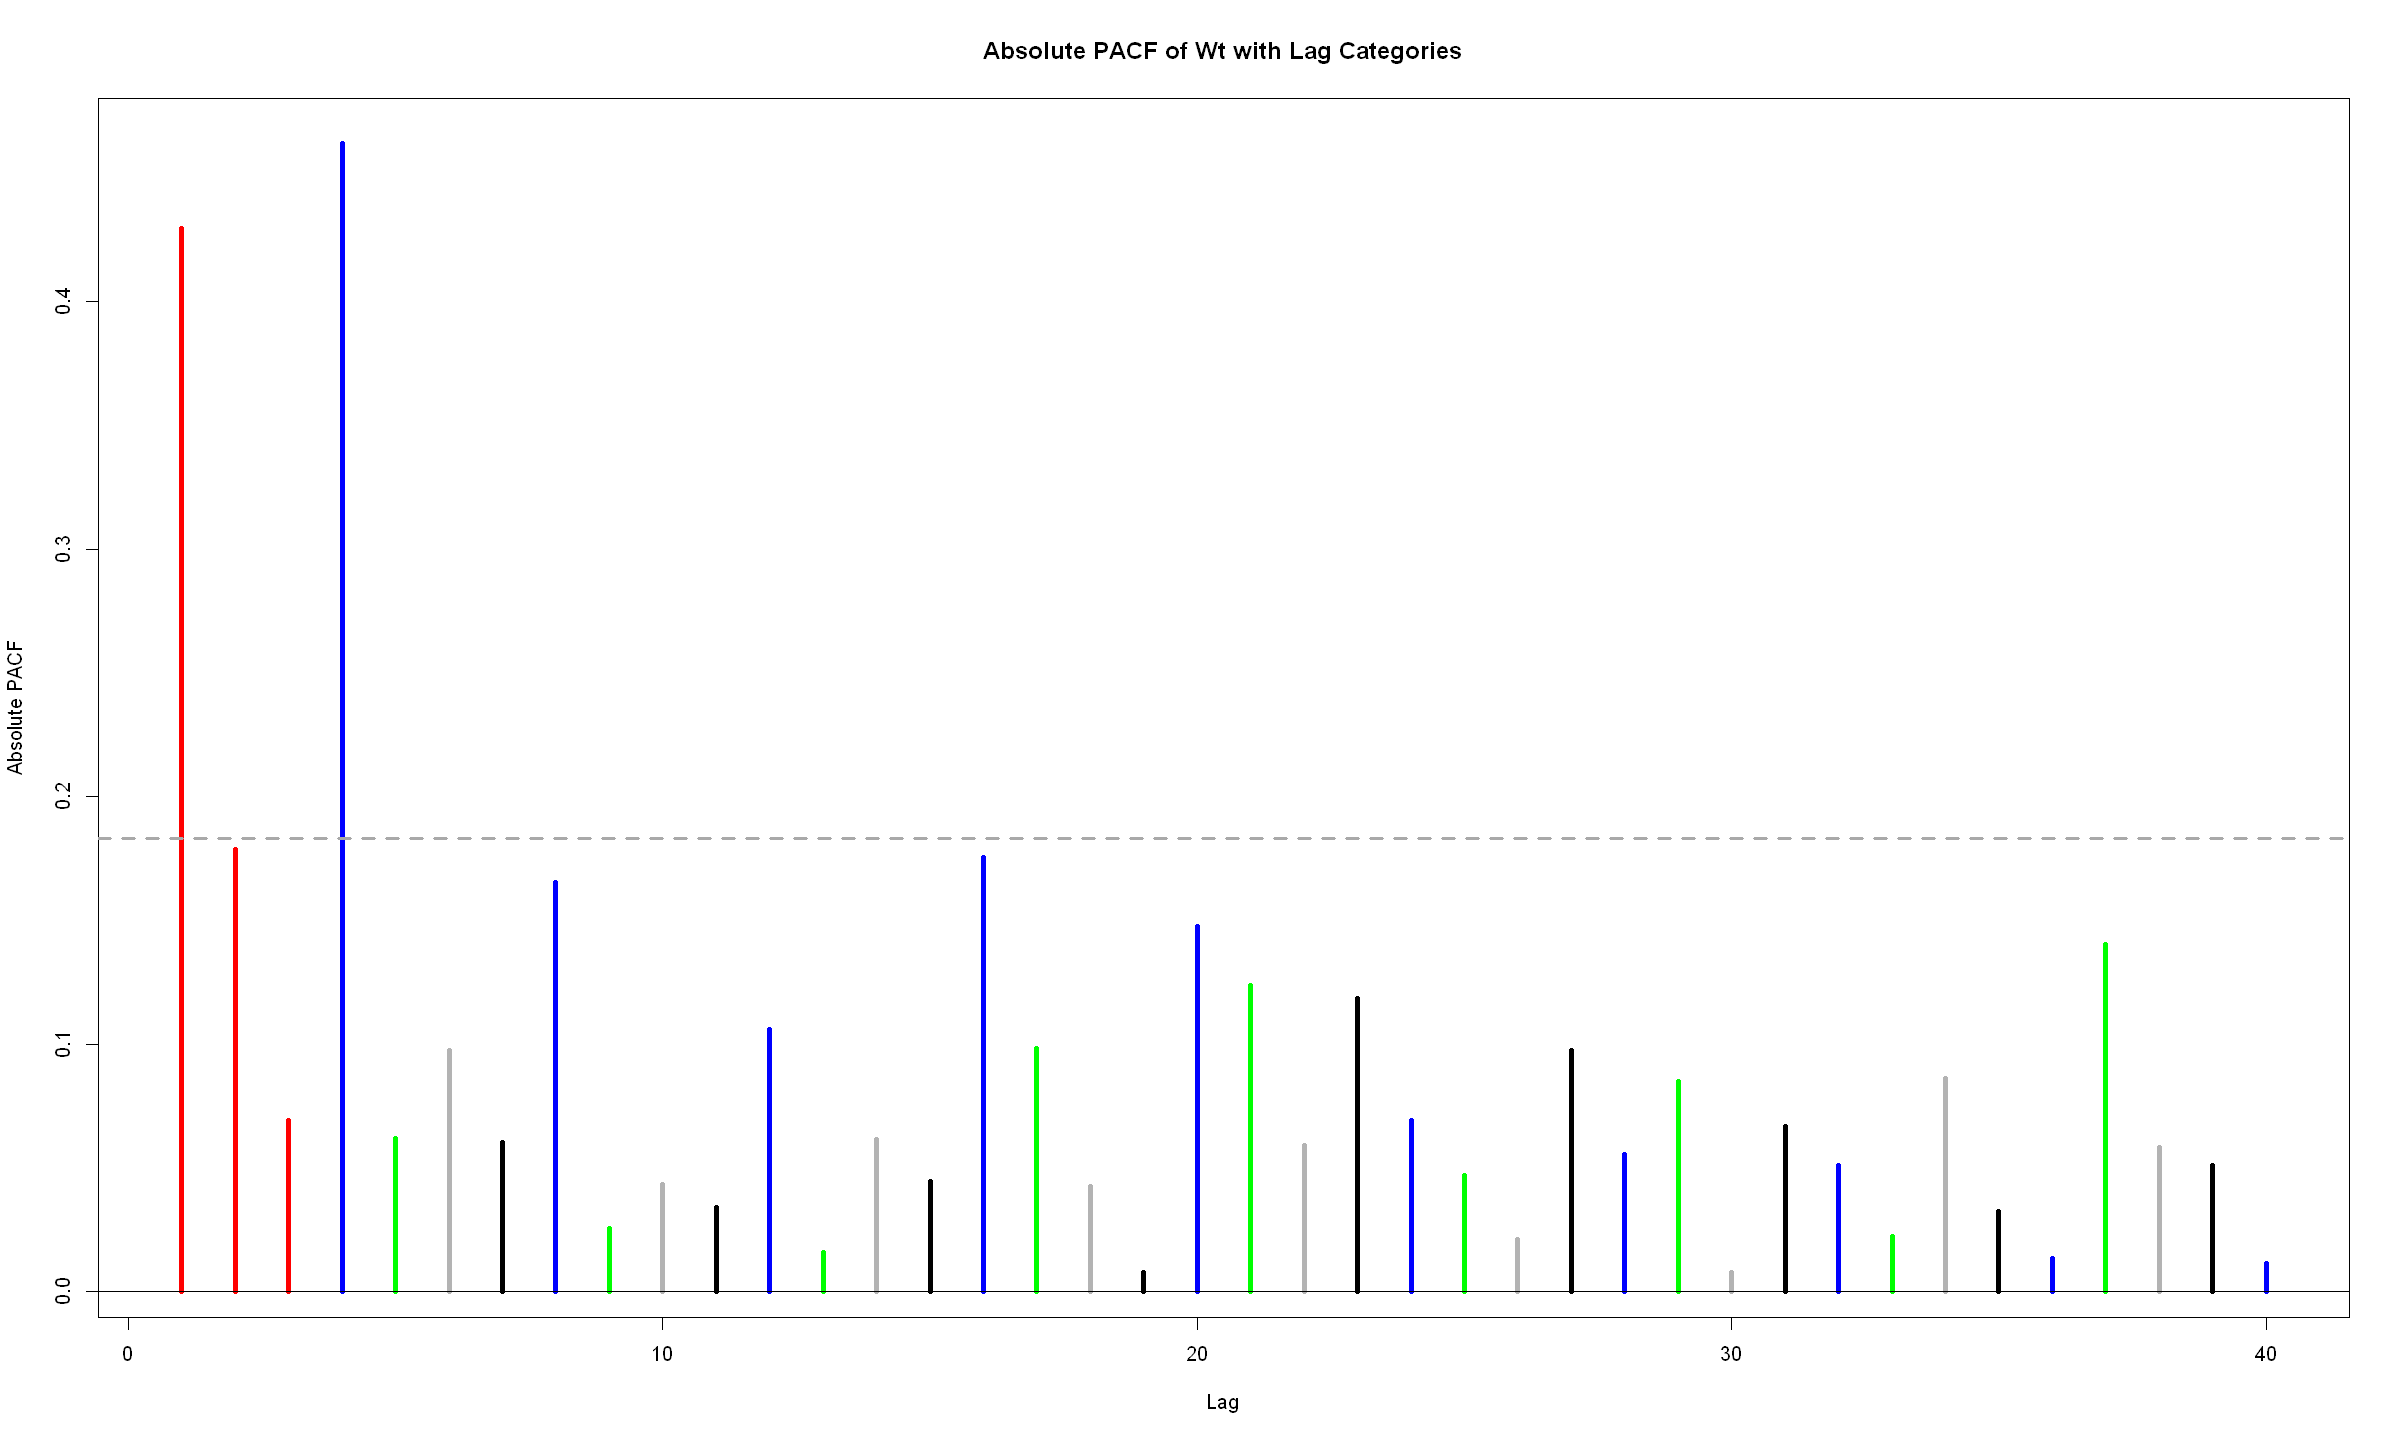

In [29]:
n <- length(Wt.1)

h_conf <- 2 / sqrt(n)

pacf_res <- pacf(Wt.1, lag.max = 40, plot = FALSE)
pacf_vals <- abs(pacf_res$acf)
lags      <- seq_along(pacf_vals)

s_period       <- 4
small_lags     <- 1:3
seasonal_lags  <- seq(s_period, max(lags), by = s_period)
right_of_season  <- seasonal_lags + 1
left_of_season   <- seasonal_lags - 1

cols_pacf <- sapply(lags, function(l) {
  if      (l %in% small_lags)      "red"
  else if (l %in% seasonal_lags)    "blue"
  else if (l %in% right_of_season)  "green"
  else if (l %in% left_of_season)   "black"
  else                               "grey70"
})

plot(
  lags, pacf_vals,
  type = "h", lwd = 4, col = cols_pacf,
  xlab = "Lag", ylab = "Absolute PACF",
  main = "Absolute PACF of Wt with Lag Categories"
)
abline(h = 0,         col = "black")
abline(h =  h_conf,   col = "darkgrey", lty = 2, lwd = 3)


---
---

#### PACF Characteristics:
- The regular part has 1 significant coefficient; but the second one is close to being significative. Seems like exponential decay
- The seasonal part has 1 significant coefficient; but the second one is close to being significative. Seems like exponential decay
- The interactions give no information, neither to the right nor to the left. So no information about the interactions with the ACF or the PACF of the regular part


---

#### Models based on the PACF graph

- $\text{ARMA}(1,0) \times (0,1)_4 =  \text{AR}(1) \times \text{MA}(1)_4$  
  The sharp cutoff at lag 1 in the PACF suggests a regular AR(1) component, and the significant spike at lag 4 supports a seasonal MA(1) component.

- $\text{ARMA}(0,1) \times (0,1)_4 =  \text{MA}(1) \times \text{MA}(1)_4$  
  The PACF does not show a sharp cutoff at lag 1, so a regular MA(1) is plausible, and the spike at lag 4 indicates a seasonal MA(1).

- $\text{ARMA}(1,0) \times (1,0)_4 =  \text{AR}(1) \times \text{AR}(1)_4$  
  The sharp cutoff at lag 1 suggests a regular AR(1), and the strong PACF value at lag 4 suggests a seasonal AR(1) component.

- $\text{ARMA}(0,1) \times (1,0)_4 =  \text{MA}(1) \times \text{AR}(1)_4$  
  The absence of a sharp cutoff at lag 1 allows for a regular MA(1), while the spike at lag 4 in the PACF suggests a seasonal AR(1).

- $\text{ARMA}(1,1) \times (0,1)_4 =  \text{ARMA}(1,1) \times \text{MA}(1)_4$  
  Both AR(1) and MA(1) regular terms are justified by significant PACF at lag 1, and the spike at lag 4 indicates a seasonal MA(1).

- $\text{ARMA}(2,0) \times (1,0)_4 = \text{AR}(2) \times \text{AR}(1)_4$
The PACF shows significant spikes at lags 1 and 2, suggesting a regular AR(2) component to capture more complex short-term dependencies. The sharp spike at lag 4 in the PACF indicates a seasonal AR(1) component with period 4.

- $\text{ARMA}(3,0) \times (2,0)_4 = \text{AR}(3) \times \text{AR}(2)_4$
The PACF has significant spikes at lags 1, 2, and 3, indicating a regular AR(3) component, while significant spikes at lags 4 and 8 suggest a seasonal AR(2) component to capture persistent seasonal structure.

- $\text{ARMA}(1,1) \times (1,0)_4 = \text{ARMA}(1,1) \times \text{AR}(1)_4$
The PACF shows a sharp cutoff at lag 1 and a significant value at lag 4, supporting a regular ARMA(1,1) component for short-term structure and a seasonal AR(1) at lag 4.

- $\text{ARMA}(2,0) \times (0,2)_4 = \text{AR}(2) \times \text{MA}(2)_4$
The PACF has significant spikes at lags 1 and 2, suggesting a regular AR(2) component, and the exponential decay at seasonal lags (4, 8, etc.) supports a seasonal MA(2) component.

- $\text{ARMA}(0,1) \times (2,0)_4 = \text{MA}(1) \times \text{AR}(2)_4$
The PACF does not show a sharp cutoff at lag 1, so a regular MA(1) is plausible, while significant spikes at lags 4 and 8 suggest a seasonal AR(2) component for capturing persistent seasonal effects.

---
---

### Possible models for the Transformed Series $\{W_t\} = \nabla\nabla_4 \log(X_t)$

- **Model 1:**  
$\text{ARMA}(1,0) \times (0,1)_4 = \text{AR}(1) \times \text{MA}(1)_4$  
Regular AR(1) captures short-term persistence (if the ACF at lags 1–3 decays slowly), and seasonal MA(1) at lag 4 captures the strong spike at lag 4 in the ACF. The sharp cutoff at lag 1 in the PACF also supports AR(1), and the significant spike at lag 4 supports a seasonal MA(1).

&#8202;

- **Model 2:**  
$\text{ARMA}(1,0) \times (0,2)_4 = \text{AR}(1) \times \text{MA}(2)_4$  
Regular AR(1) as above, with seasonal MA(2) to capture not only the spike at lag 4 but also a possible significant spike at lag 8 (if present in the ACF).

&#8202;

- **Model 3:**  
$\text{ARMA}(0,1) \times (0,1)_4 = \text{MA}(1) \times \text{MA}(1)_4$  
The slow decay at lags 1–3 in the ACF suggests a regular MA(1) component, while the strong positive spike at lag 4 indicates a seasonal MA(1) component with period 4. The PACF does not show a sharp cutoff at lag 1, so a regular MA(1) is plausible, and the spike at lag 4 indicates a seasonal MA(1).

&#8202;

- **Model 4:**  
$\text{ARMA}(0,1) \times (1,0)_4 = \text{MA}(1) \times \text{AR}(1)_4$  
Regular MA(1) models short-term negative autocorrelation (if the ACF cuts off after lag 1), and seasonal AR(1) at lag 4 captures persistent seasonal autocorrelation, which would appear as a slow decay at seasonal lags in the ACF. The absence of a sharp cutoff at lag 1 in the PACF allows for a regular MA(1), while the spike at lag 4 in the PACF suggests a seasonal AR(1).

&#8202;

- **Model 5:**  
$\text{ARMA}(1,0) \times (1,0)_4 = \text{AR}(1) \times \text{AR}(1)_4$  
The sharp cutoff at lag 1 in the PACF suggests a regular AR(1), and the strong PACF value at lag 4 suggests a seasonal AR(1) component.

&#8202;

- **Model 6:**  
$\text{ARMA}(1,1) \times (0,1)_4 = \text{ARMA}(1,1) \times \text{MA}(1)_4$  
Regular ARMA(1,1) for flexible short-term structure, and seasonal MA(1) at lag 4 for the strong spike at lag 4 in the ACF. Both AR(1) and MA(1) regular terms are justified by significant PACF at lag 1, and the spike at lag 4 indicates a seasonal MA(1).

&#8202;

- **Model 7:**  
$\text{ARMA}(1,1) \times (1,0)_4 = \text{ARMA}(1,1) \times \text{AR}(1)_4$  
Regular ARMA(1,1) provides flexible short-term structure (if both the ACF and PACF at small lags are significant), and seasonal AR(1) at lag 4 models persistent seasonal autocorrelation. The PACF shows a sharp cutoff at lag 1 and a significant value at lag 4, supporting a regular ARMA(1,1) component for short-term structure and a seasonal AR(1) at lag 4.

&#8202;

- **Model 8:**  
$\text{ARMA}(2,0) \times (0,1)_4 = \text{AR}(2) \times \text{MA}(1)_4$  
The slow, possibly sinusoidal decay in the ACF at lags 1–3 suggests a regular AR(2) component, capturing more complex short-term persistence than AR(1). The strong spike at lag 4 in the ACF indicates a seasonal MA(1) component with period 4.

&#8202;

- **Model 9:**  
$\text{ARMA}(2,0) \times (1,0)_4 = \text{AR}(2) \times \text{AR}(1)_4$  
The PACF shows significant spikes at lags 1 and 2, suggesting a regular AR(2) component to capture more complex short-term dependencies. The sharp spike at lag 4 in the PACF indicates a seasonal AR(1) component with period 4.

&#8202;

- **Model 10:**  
$\text{ARMA}(2,0) \times (0,2)_4 = \text{AR}(2) \times \text{MA}(2)_4$  
The PACF has significant spikes at lags 1 and 2, suggesting a regular AR(2) component, and the exponential decay at seasonal lags (4, 8, etc.) supports a seasonal MA(2) component.

&#8202;

- **Model 11:**  
$\text{ARMA}(0,2) \times (0,2)_4 = \text{MA}(2) \times \text{MA}(2)_4$  
The presence of significant spikes at lags 2 and 8 in the ACF suggests a regular MA(2) component and a seasonal MA(2) component, respectively, capturing short-term and seasonal moving average effects.

&#8202;

- **Model 12:**  
$\text{ARMA}(3,0) \times (2,0)_4 = \text{AR}(3) \times \text{AR}(2)_4$  
The PACF has significant spikes at lags 1, 2, and 3, indicating a regular AR(3) component, while significant spikes at lags 4 and 8 suggest a seasonal AR(2) component to capture persistent seasonal structure.

&#8202;

- **Model 13:**  
$\text{ARMA}(2,1) \times (0,1)_4 = \text{ARMA}(2,1) \times \text{MA}(1)_4$  
The combination of a slow decay and a sharp drop in the ACF at lags 1–3 suggests a regular ARMA(2,1) component, while the spike at lag 4 supports a seasonal MA(1) component.

&#8202;

- **Model 14:**  
$\text{ARMA}(1,0) \times (1,1)_4 = \text{AR}(1) \times \text{ARMA}(1,1)_4$  
The exponential decay in the ACF at regular lags suggests a regular AR(1) component, while the pattern of a spike at lag 4 followed by a decay at lag 8 supports a seasonal ARMA(1,1) component.

&#8202;

- **Model 15:**  
$\text{ARMA}(0,1) \times (2,0)_4 = \text{MA}(1) \times \text{AR}(2)_4$  
The ACF cuts off after lag 1, indicating a regular MA(1) component, while the sinusoidal decay at seasonal lags (4, 8, etc.) suggests a seasonal AR(2) component to capture persistent seasonal autocorrelation. The PACF does not show a sharp cutoff at lag 1, so a regular MA(1) is plausible, while significant spikes at lags 4 and 8 suggest a seasonal AR(2) component for capturing persistent seasonal effects.

&#8202;

- **Model 16:**  
$\text{ARMA}(1,1) \times (1,1)_4 = \text{ARMA}(1,1) \times \text{ARMA}(1,1)_4$  
This model is flexible for capturing both short-term and seasonal dependencies. The gradual decay and at least one significant coefficient in both ACF and PACF suggest mixed AR and MA effects in both regular and seasonal components, which this model can accommodate.

&#8202;

- **Model 17:**  
$\text{ARMA}(2,1) \times (0,1)_4 = \text{ARMA}(2,1) \times \text{MA}(1)_4$  
With the PACF showing a second regular lag close to significance, AR(2) is justified for capturing extended regular persistence. The strong seasonal lag in the ACF motivates a seasonal MA(1) term, matching your seasonal pattern.

&#8202;

- **Model 18:**  
$\text{ARMA}(0,2) \times (1,1)_4 = \text{MA}(2) \times \text{ARMA}(1,1)_4$  
If the ACF regular part has more than one value different from zero, MA(2) can model these short-term shocks. The ARMA(1,1) seasonal part is justified by the significant and near-significant seasonal PACF lags and the gradual decay pattern.

&#8202;

- **Model 19:**  
$\text{ARMA}(1,2) \times (0,1)_4 = \text{ARMA}(1,2) \times \text{MA}(1)_4$  
Combining AR(1) and MA(2) in the regular part fits a scenario where the PACF’s second lag is near significance and the ACF shows more than one nonzero value. The seasonal MA(1) captures the strong seasonal autocorrelation at lag 4.

&#8202;

- **Model 20:**  
$\text{ARMA}(1,0) \times (1,1)_4 = \text{AR}(1) \times \text{ARMA}(1,1)_4$  
The regular AR(1) aligns with the significant regular PACF lag and exponential decay. The seasonal ARMA(1,1) matches the seasonal PACF and ACF behavior, capturing both memory and shocks in the seasonal part.

&#8202;

- **Model 21:**  
$\text{ARMA}(2,0) \times (1,1)_4 = \text{AR}(2) \times \text{ARMA}(1,1)_4$  
With two PACF regular lags (one significant, one near), AR(2) is justified. The ARMA(1,1) seasonal part is again suitable for the seasonal decay and significant lag in both ACF and PACF.

&#8202;

- **Model 22:**  
$\text{ARMA}(0,1) \times (1,1)_4 = \text{MA}(1) \times \text{ARMA}(1,1)_4$  
If only the first regular ACF value is clearly significant, MA(1) suffices for the regular part. The ARMA(1,1) seasonal part is a parsimonious way to capture the moderate seasonal effects seen in your plots.

&#8202;

- **Model 23:**  
$\text{ARMA}(1,2) \times (1,0)_4 = \text{ARMA}(1,2) \times \text{AR}(1)_4$  
This model allows for more complex regular dynamics (AR(1), MA(2)), fitting the near-significant second PACF lag and multiple ACF values. The seasonal AR(1) matches the significant seasonal PACF lag.

&#8202;

- **Model 24:**  
$\text{ARMA}(2,2) \times (0,1)_4 = \text{ARMA}(2,2) \times \text{MA}(1)_4$  
If both ACF and PACF regular parts show several values different from zero, ARMA(2,2) can capture this complexity. The seasonal MA(1) is justified by the strong seasonal spike in the ACF.

&#8202;

- **Model 25:**  
$\text{ARMA}(0,3) \times (0,1)_4 = \text{MA}(3) \times \text{MA}(1)_4$  
A higher-order MA(3) is suitable if the regular ACF decays slowly or has several nonzero values. The seasonal MA(1) remains appropriate for the main seasonal spike.





---
### Possible models for the Original Series $\{X_t\}$

Model $M_1$: $\text{ARIMA}(1,1,0) \times (0,1,1)_{4}$

Model $M_2$: $\text{ARIMA}(1,1,0) \times (0,1,2)_{4}$

Model $M_3$: $\text{ARIMA}(0,1,1) \times (0,1,1)_{4}$

Model $M_4$: $\text{ARIMA}(0,1,1) \times (1,1,0)_{4}$

Model $M_5$: $\text{ARIMA}(1,1,0) \times (1,1,0)_{4}$

Model $M_6$: $\text{ARIMA}(1,1,1) \times (0,1,1)_{4}$

Model $M_7$: $\text{ARIMA}(1,1,1) \times (1,1,0)_{4}$

Model $M_8$: $\text{ARIMA}(2,1,0) \times (0,1,1)_{4}$

Model $M_9$: $\text{ARIMA}(2,1,0) \times (1,1,0)_{4}$

Model $M_{10}$: $\text{ARIMA}(2,1,0) \times (0,1,2)_{4}$

Model $M_{11}$: $\text{ARIMA}(0,1,2) \times (0,1,2)_{4}$

Model $M_{12}$: $\text{ARIMA}(3,1,0) \times (2,1,0)_{4}$

Model $M_{13}$: $\text{ARIMA}(2,1,1) \times (0,1,1)_{4}$

Model $M_{14}$: $\text{ARIMA}(1,1,0) \times (1,1,1)_{4}$

Model $M_{15}$: $\text{ARIMA}(0,1,1) \times (2,1,0)_{4}$

Model $M_{16}$: $\text{ARIMA}(1,1,1) \times (1,1,1)_{4}$

Model $M_{17}$: $\text{ARIMA}(2,1,1) \times (0,1,1)_{4}$

Model $M_{18}$: $\text{ARIMA}(0,1,2) \times (1,1,1)_{4}$

Model $M_{19}$: $\text{ARIMA}(1,1,2) \times (0,1,1)_{4}$

Model $M_{20}$: $\text{ARIMA}(1,1,0) \times (1,1,1)_{4}$

Model $M_{21}$: $\text{ARIMA}(2,1,0) \times (1,1,1)_{4}$

Model $M_{22}$: $\text{ARIMA}(0,1,1) \times (1,1,1)_{4}$

Model $M_{23}$: $\text{ARIMA}(1,1,2) \times (1,1,0)_{4}$

Model $M_{24}$: $\text{ARIMA}(2,1,2) \times (0,1,1)_{4}$

Model $M_{25}$: $\text{ARIMA}(0,1,3) \times (0,1,1)_{4}$

Thus, as a result of the identification step we identified the following class models for the "original" series  {${{X}_t}$}

In [30]:
# Model 1
mod1 <- Arima(arrivals_ts, order = c(1,1,0), seasonal = list(order = c(0,1,1), period = 4))

# Model 2
mod2 <- Arima(arrivals_ts, order = c(1,1,0), seasonal = list(order = c(0,1,2), period = 4))

# Model 3
mod3 <- Arima(arrivals_ts, order = c(0,1,1), seasonal = list(order = c(0,1,1), period = 4))

# Model 4
mod4 <- Arima(arrivals_ts, order = c(0,1,1), seasonal = list(order = c(1,1,0), period = 4))

# Model 5
mod5 <- Arima(arrivals_ts, order = c(1,1,0), seasonal = list(order = c(1,1,0), period = 4))

# Model 6
mod6 <- Arima(arrivals_ts, order = c(1,1,1), seasonal = list(order = c(0,1,1), period = 4))

# Model 7
mod7 <- Arima(arrivals_ts, order = c(1,1,1), seasonal = list(order = c(1,1,0), period = 4))

# Model 8
mod8 <- Arima(arrivals_ts, order = c(2,1,0), seasonal = list(order = c(0,1,1), period = 4))

# Model 9
mod9 <- Arima(arrivals_ts, order = c(2,1,0), seasonal = list(order = c(1,1,0), period = 4))

# Model 10
mod10 <- Arima(arrivals_ts, order = c(2,1,0), seasonal = list(order = c(0,1,2), period = 4))

# Model 11
mod11 <- Arima(arrivals_ts, order = c(0,1,2), seasonal = list(order = c(0,1,2), period = 4))

# Model 12
mod12 <- Arima(arrivals_ts, order = c(3,1,0), seasonal = list(order = c(2,1,0), period = 4))

# Model 13
mod13 <- Arima(arrivals_ts, order = c(2,1,1), seasonal = list(order = c(0,1,1), period = 4))

# Model 14
mod14 <- Arima(arrivals_ts, order = c(1,1,0), seasonal = list(order = c(1,1,1), period = 4))

# Model 15
mod15 <- Arima(arrivals_ts, order = c(0,1,1), seasonal = list(order = c(2,1,0), period = 4))

# Model 16
mod16 <- Arima(arrivals_ts, order = c(1,1,1), seasonal = list(order = c(1,1,1), period = 4))

# Model 17
mod17 <- Arima(arrivals_ts, order = c(2,1,1), seasonal = list(order = c(0,1,1), period = 4))

# Model 18
mod18 <- Arima(arrivals_ts, order = c(0,1,2), seasonal = list(order = c(1,1,1), period = 4))

# Model 19
mod19 <- Arima(arrivals_ts, order = c(1,1,2), seasonal = list(order = c(0,1,1), period = 4))

# Model 20
mod20 <- Arima(arrivals_ts, order = c(1,1,0), seasonal = list(order = c(1,1,1), period = 4))

# Model 21
mod21 <- Arima(arrivals_ts, order = c(2,1,0), seasonal = list(order = c(1,1,1), period = 4))

# Model 22
mod22 <- Arima(arrivals_ts, order = c(0,1,1), seasonal = list(order = c(1,1,1), period = 4))

# Model 23
mod23 <- Arima(arrivals_ts, order = c(1,1,2), seasonal = list(order = c(1,1,0), period = 4))

# Model 24
mod24 <- Arima(arrivals_ts, order = c(2,1,2), seasonal = list(order = c(0,1,1), period = 4))

# Model 25
mod25 <- Arima(arrivals_ts, order = c(0,1,3), seasonal = list(order = c(0,1,1), period = 4))


## Model Selection

The ARIMA function also provides the value of the AIC and BIC criterion

In [70]:
modelos <- list(mod1, mod2, mod3, mod4, mod5, mod6, mod7, mod8, mod9, mod10,
                mod11, mod12, mod13, mod14, mod15, mod16, mod17,mod18,mod19, 
                mod20, mod21, mod22, mod23, mod24, mod25)

AIC.BIC <- t(sapply(modelos, function(x) c(x$aic, x$aicc, x$bic)))

dimnames(AIC.BIC) <- list(paste("Model", 1:25), c("AIC", "AICc", "BIC"))

AIC.BIC

,AIC,AICc,BIC
Model 1,921.9227,922.1314,930.2600
Model 2,915.3495,915.7003,926.4660
Model 3,894.1897,894.3983,902.5270
Model 4,895.5960,895.8047,903.9334
Model 5,921.7092,921.9179,930.0466
Model 6,895.0324,895.3833,906.1489
Model 7,896.3736,896.7245,907.4901
Model 8,903.5709,903.9218,914.6874
Model 9,905.0786,905.4295,916.1951
Model 10,899.0805,899.6115,912.9761


In [71]:
suitable_AIC.BIC <- AIC.BIC[c(3, 12, 15, 24), ]
suitable_AIC.BIC

,AIC,AICc,BIC
Model 3,894.1897,894.3983,902.5270
Model 12,888.9350,889.6850,905.6097
Model 15,891.8724,892.2232,902.9889
Model 24,896.3743,897.1243,913.0490


As an additional criterion for the model, we consider cross-validation, varying the sample size between 90 and 100

In [72]:
# Sample size = 90
n.min=90
n.data=length(arrivals_ts)

# Inicializar vectores de error para 25 modelos
MSE.vec1=numeric(n.data-n.min); MAE.vec1=numeric(n.data-n.min)
MSE.vec2=numeric(n.data-n.min); MAE.vec2=numeric(n.data-n.min)
MSE.vec3=numeric(n.data-n.min); MAE.vec3=numeric(n.data-n.min)
MSE.vec4=numeric(n.data-n.min); MAE.vec4=numeric(n.data-n.min)
MSE.vec5=numeric(n.data-n.min); MAE.vec5=numeric(n.data-n.min)
MSE.vec6=numeric(n.data-n.min); MAE.vec6=numeric(n.data-n.min)
MSE.vec7=numeric(n.data-n.min); MAE.vec7=numeric(n.data-n.min)
MSE.vec8=numeric(n.data-n.min); MAE.vec8=numeric(n.data-n.min)
MSE.vec9=numeric(n.data-n.min); MAE.vec9=numeric(n.data-n.min)
MSE.vec10=numeric(n.data-n.min); MAE.vec10=numeric(n.data-n.min)
MSE.vec11=numeric(n.data-n.min); MAE.vec11=numeric(n.data-n.min)
MSE.vec12=numeric(n.data-n.min); MAE.vec12=numeric(n.data-n.min)
MSE.vec13=numeric(n.data-n.min); MAE.vec13=numeric(n.data-n.min)
MSE.vec14=numeric(n.data-n.min); MAE.vec14=numeric(n.data-n.min)
MSE.vec15=numeric(n.data-n.min); MAE.vec15=numeric(n.data-n.min)
MSE.vec16=numeric(n.data-n.min); MAE.vec16=numeric(n.data-n.min)
MSE.vec17=numeric(n.data-n.min); MAE.vec17=numeric(n.data-n.min)
MSE.vec18=numeric(n.data-n.min); MAE.vec18=numeric(n.data-n.min)
MSE.vec19=numeric(n.data-n.min); MAE.vec19=numeric(n.data-n.min)
MSE.vec20=numeric(n.data-n.min); MAE.vec20=numeric(n.data-n.min)
MSE.vec21=numeric(n.data-n.min); MAE.vec21=numeric(n.data-n.min)
MSE.vec22=numeric(n.data-n.min); MAE.vec22=numeric(n.data-n.min)
MSE.vec23=numeric(n.data-n.min); MAE.vec23=numeric(n.data-n.min)
MSE.vec24=numeric(n.data-n.min); MAE.vec24=numeric(n.data-n.min)
MSE.vec25=numeric(n.data-n.min); MAE.vec25=numeric(n.data-n.min)

for (k in 1:(n.data-n.min))
{
#Model 1
fit.mod1=Arima(arrivals_ts[1:(n.min+k-1)],order=c(1,1,0),seasonal=list(order=c(0,1,1),period=4 ),lambda=0)   
forcast.mod1 <- forecast(fit.mod1, h=1)[['mean']]
MSE.vec1[k]=(arrivals_ts[(n.min+k)]-forcast.mod1)^2
MAE.vec1[k]=abs(arrivals_ts[(n.min+k)]-forcast.mod1)
#Model 2
fit.mod2=Arima(arrivals_ts[1:(n.min+k-1)],order=c(1,1,0),seasonal=list(order=c(0,1,2),period=4 ),lambda=0)
forcast.mod2 <- forecast(fit.mod2, h=1)[['mean']]
MSE.vec2[k]=(arrivals_ts[(n.min+k)]-forcast.mod2)^2
MAE.vec2[k]=abs(arrivals_ts[(n.min+k)]-forcast.mod2)
#Model 3
fit.mod3=Arima(arrivals_ts[1:(n.min+k-1)],order=c(0,1,1),seasonal=list(order=c(0,1,1),period=4 ),lambda=0)
forcast.mod3 <- forecast(fit.mod3, h=1)[['mean']]
MSE.vec3[k]=(arrivals_ts[(n.min+k)]-forcast.mod3)^2
MAE.vec3[k]=abs(arrivals_ts[(n.min+k)]-forcast.mod3)
#Model 4
fit.mod4=Arima(arrivals_ts[1:(n.min+k-1)],order=c(0,1,1),seasonal=list(order=c(1,1,0),period=4 ),lambda=0)
forcast.mod4 <- forecast(fit.mod4, h=1)[['mean']]
MSE.vec4[k]=(arrivals_ts[(n.min+k)]-forcast.mod4)^2
MAE.vec4[k]=abs(arrivals_ts[(n.min+k)]-forcast.mod4)
#Model 5
fit.mod5=Arima(arrivals_ts[1:(n.min+k-1)],order=c(1,1,0),seasonal=list(order=c(1,1,0),period=4 ),lambda=0)
forcast.mod5 <- forecast(fit.mod5, h=1)[['mean']]
MSE.vec5[k]=(arrivals_ts[(n.min+k)]-forcast.mod5)^2
MAE.vec5[k]=abs(arrivals_ts[(n.min+k)]-forcast.mod5)
#Model 6
fit.mod6=Arima(arrivals_ts[1:(n.min+k-1)],order=c(1,1,1),seasonal=list(order=c(0,1,1),period=4 ),lambda=0)
forcast.mod6 <- forecast(fit.mod6, h=1)[['mean']]
MSE.vec6[k]=(arrivals_ts[(n.min+k)]-forcast.mod6)^2
MAE.vec6[k]=abs(arrivals_ts[(n.min+k)]-forcast.mod6)
#Model 7
fit.mod7=Arima(arrivals_ts[1:(n.min+k-1)],order=c(1,1,1),seasonal=list(order=c(1,1,0),period=4 ),lambda=0)
forcast.mod7 <- forecast(fit.mod7, h=1)[['mean']]
MSE.vec7[k]=(arrivals_ts[(n.min+k)]-forcast.mod7)^2
MAE.vec7[k]=abs(arrivals_ts[(n.min+k)]-forcast.mod7)
#Model 8
fit.mod8=Arima(arrivals_ts[1:(n.min+k-1)],order=c(2,1,0),seasonal=list(order=c(0,1,1),period=4 ),lambda=0)
forcast.mod8 <- forecast(fit.mod8, h=1)[['mean']]
MSE.vec8[k]=(arrivals_ts[(n.min+k)]-forcast.mod8)^2
MAE.vec8[k]=abs(arrivals_ts[(n.min+k)]-forcast.mod8)
#Model 9
fit.mod9=Arima(arrivals_ts[1:(n.min+k-1)],order=c(2,1,0),seasonal=list(order=c(1,1,0),period=4 ),lambda=0)
forcast.mod9 <- forecast(fit.mod9, h=1)[['mean']]
MSE.vec9[k]=(arrivals_ts[(n.min+k)]-forcast.mod9)^2
MAE.vec9[k]=abs(arrivals_ts[(n.min+k)]-forcast.mod9)
#Model 10
fit.mod10=Arima(arrivals_ts[1:(n.min+k-1)],order=c(2,1,0),seasonal=list(order=c(0,1,2),period=4 ),lambda=0)
forcast.mod10 <- forecast(fit.mod10, h=1)[['mean']]
MSE.vec10[k]=(arrivals_ts[(n.min+k)]-forcast.mod10)^2
MAE.vec10[k]=abs(arrivals_ts[(n.min+k)]-forcast.mod10)
#Model 11
fit.mod11=Arima(arrivals_ts[1:(n.min+k-1)],order=c(0,1,2),seasonal=list(order=c(0,1,2),period=4 ),lambda=0)
forcast.mod11 <- forecast(fit.mod11, h=1)[['mean']]
MSE.vec11[k]=(arrivals_ts[(n.min+k)]-forcast.mod11)^2
MAE.vec11[k]=abs(arrivals_ts[(n.min+k)]-forcast.mod11)
#Model 12
fit.mod12=Arima(arrivals_ts[1:(n.min+k-1)],order=c(3,1,0),seasonal=list(order=c(2,1,0),period=4 ),lambda=0)
forcast.mod12 <- forecast(fit.mod12, h=1)[['mean']]
MSE.vec12[k]=(arrivals_ts[(n.min+k)]-forcast.mod12)^2
MAE.vec12[k]=abs(arrivals_ts[(n.min+k)]-forcast.mod12)
#Model 13
fit.mod13=Arima(arrivals_ts[1:(n.min+k-1)],order=c(2,1,1),seasonal=list(order=c(0,1,1),period=4 ),lambda=0)
forcast.mod13 <- forecast(fit.mod13, h=1)[['mean']]
MSE.vec13[k]=(arrivals_ts[(n.min+k)]-forcast.mod13)^2
MAE.vec13[k]=abs(arrivals_ts[(n.min+k)]-forcast.mod13)
#Model 14
fit.mod14=Arima(arrivals_ts[1:(n.min+k-1)],order=c(1,1,0),seasonal=list(order=c(1,1,1),period=4 ),lambda=0)
forcast.mod14 <- forecast(fit.mod14, h=1)[['mean']]
MSE.vec14[k]=(arrivals_ts[(n.min+k)]-forcast.mod14)^2
MAE.vec14[k]=abs(arrivals_ts[(n.min+k)]-forcast.mod14)
#Model 15
fit.mod15=Arima(arrivals_ts[1:(n.min+k-1)],order=c(0,1,1),seasonal=list(order=c(2,1,0),period=4 ),lambda=0)
forcast.mod15 <- forecast(fit.mod15, h=1)[['mean']]
MSE.vec15[k]=(arrivals_ts[(n.min+k)]-forcast.mod15)^2
MAE.vec15[k]=abs(arrivals_ts[(n.min+k)]-forcast.mod15)
#Model 16
fit.mod16=Arima(arrivals_ts[1:(n.min+k-1)],order=c(1,1,1),seasonal=list(order=c(1,1,1),period=4 ),lambda=0)
forcast.mod16 <- forecast(fit.mod16, h=1)[['mean']]
MSE.vec16[k]=(arrivals_ts[(n.min+k)]-forcast.mod16)^2
MAE.vec16[k]=abs(arrivals_ts[(n.min+k)]-forcast.mod16)
#Model 17
fit.mod17=Arima(arrivals_ts[1:(n.min+k-1)],order=c(2,1,1),seasonal=list(order=c(0,1,1),period=4 ),lambda=0)
forcast.mod17 <- forecast(fit.mod17, h=1)[['mean']]
MSE.vec17[k]=(arrivals_ts[(n.min+k)]-forcast.mod17)^2
MAE.vec17[k]=abs(arrivals_ts[(n.min+k)]-forcast.mod17)
#Model 18
fit.mod18=Arima(arrivals_ts[1:(n.min+k-1)],order=c(0,1,2),seasonal=list(order=c(1,1,1),period=4 ),lambda=0)
forcast.mod18 <- forecast(fit.mod18, h=1)[['mean']]
MSE.vec18[k]=(arrivals_ts[(n.min+k)]-forcast.mod18)^2
MAE.vec18[k]=abs(arrivals_ts[(n.min+k)]-forcast.mod18)
#Model 19
fit.mod19=Arima(arrivals_ts[1:(n.min+k-1)],order=c(1,1,2),seasonal=list(order=c(0,1,1),period=4 ),lambda=0)
forcast.mod19 <- forecast(fit.mod19, h=1)[['mean']]
MSE.vec19[k]=(arrivals_ts[(n.min+k)]-forcast.mod19)^2
MAE.vec19[k]=abs(arrivals_ts[(n.min+k)]-forcast.mod19)
#Model 20
fit.mod20=Arima(arrivals_ts[1:(n.min+k-1)],order=c(1,1,0),seasonal=list(order=c(1,1,1),period=4 ),lambda=0)
forcast.mod20 <- forecast(fit.mod20, h=1)[['mean']]
MSE.vec20[k]=(arrivals_ts[(n.min+k)]-forcast.mod20)^2
MAE.vec20[k]=abs(arrivals_ts[(n.min+k)]-forcast.mod20)
#Model 21
fit.mod21=Arima(arrivals_ts[1:(n.min+k-1)],order=c(2,1,0),seasonal=list(order=c(1,1,1),period=4 ),lambda=0)
forcast.mod21 <- forecast(fit.mod21, h=1)[['mean']]
MSE.vec21[k]=(arrivals_ts[(n.min+k)]-forcast.mod21)^2
MAE.vec21[k]=abs(arrivals_ts[(n.min+k)]-forcast.mod21)
#Model 22
fit.mod22=Arima(arrivals_ts[1:(n.min+k-1)],order=c(0,1,1),seasonal=list(order=c(1,1,1),period=4 ),lambda=0)
forcast.mod22 <- forecast(fit.mod22, h=1)[['mean']]
MSE.vec22[k]=(arrivals_ts[(n.min+k)]-forcast.mod22)^2
MAE.vec22[k]=abs(arrivals_ts[(n.min+k)]-forcast.mod22)
#Model 23
fit.mod23=Arima(arrivals_ts[1:(n.min+k-1)],order=c(1,1,2),seasonal=list(order=c(1,1,0),period=4 ),lambda=0)
forcast.mod23 <- forecast(fit.mod23, h=1)[['mean']]
MSE.vec23[k]=(arrivals_ts[(n.min+k)]-forcast.mod23)^2
MAE.vec23[k]=abs(arrivals_ts[(n.min+k)]-forcast.mod23)
#Model 24
fit.mod24=Arima(arrivals_ts[1:(n.min+k-1)],order=c(2,1,2),seasonal=list(order=c(0,1,1),period=4 ),lambda=0)
forcast.mod24 <- forecast(fit.mod24, h=1)[['mean']]
MSE.vec24[k]=(arrivals_ts[(n.min+k)]-forcast.mod24)^2
MAE.vec24[k]=abs(arrivals_ts[(n.min+k)]-forcast.mod24)
#Model 25
fit.mod25=Arima(arrivals_ts[1:(n.min+k-1)],order=c(0,1,3),seasonal=list(order=c(0,1,1),period=4 ),lambda=0)
forcast.mod25 <- forecast(fit.mod25, h=1)[['mean']]
MSE.vec25[k]=(arrivals_ts[(n.min+k)]-forcast.mod25)^2
MAE.vec25[k]=abs(arrivals_ts[(n.min+k)]-forcast.mod25)
}

# Summary Results 
Results.mat1=rbind(
  apply(cbind(MSE.vec1,MSE.vec2,MSE.vec3,MSE.vec4,MSE.vec5,
              MSE.vec6,MSE.vec7,MSE.vec8,MSE.vec9,MSE.vec10,
              MSE.vec11,MSE.vec12,MSE.vec13,MSE.vec14,MSE.vec15,
              MSE.vec16,MSE.vec17,MSE.vec18,MSE.vec19,MSE.vec20,
              MSE.vec21,MSE.vec22,MSE.vec23,MSE.vec24,MSE.vec25),2,mean),
  apply(cbind(MAE.vec1,MAE.vec2,MAE.vec3,MAE.vec4,MAE.vec5,
              MAE.vec6,MAE.vec7,MAE.vec8,MAE.vec9,MAE.vec10,
              MAE.vec11,MAE.vec12,MAE.vec13,MAE.vec14,MAE.vec15,
              MAE.vec16,MAE.vec17,MAE.vec18,MAE.vec19,MAE.vec20,
              MAE.vec21,MAE.vec22,MAE.vec23,MAE.vec24,MAE.vec25),2,mean)
)

Results.mat1 <- t(Results.mat1)
colnames(Results.mat1) <- c("MSE", "MAE")
rownames(Results.mat1) <- as.character(1:25)
Results.df1 <- as.data.frame(Results.mat1)
Results.df1 <- cbind(Model = rownames(Results.df1), Results.df1)
rownames(Results.df1) <- NULL

# Sample size = 100
n.min=100

MSE.vec1=numeric(n.data-n.min); MAE.vec1=numeric(n.data-n.min)
MSE.vec2=numeric(n.data-n.min); MAE.vec2=numeric(n.data-n.min)
MSE.vec3=numeric(n.data-n.min); MAE.vec3=numeric(n.data-n.min)
MSE.vec4=numeric(n.data-n.min); MAE.vec4=numeric(n.data-n.min)
MSE.vec5=numeric(n.data-n.min); MAE.vec5=numeric(n.data-n.min)
MSE.vec6=numeric(n.data-n.min); MAE.vec6=numeric(n.data-n.min)
MSE.vec7=numeric(n.data-n.min); MAE.vec7=numeric(n.data-n.min)
MSE.vec8=numeric(n.data-n.min); MAE.vec8=numeric(n.data-n.min)
MSE.vec9=numeric(n.data-n.min); MAE.vec9=numeric(n.data-n.min)
MSE.vec10=numeric(n.data-n.min); MAE.vec10=numeric(n.data-n.min)
MSE.vec11=numeric(n.data-n.min); MAE.vec11=numeric(n.data-n.min)
MSE.vec12=numeric(n.data-n.min); MAE.vec12=numeric(n.data-n.min)
MSE.vec13=numeric(n.data-n.min); MAE.vec13=numeric(n.data-n.min)
MSE.vec14=numeric(n.data-n.min); MAE.vec14=numeric(n.data-n.min)
MSE.vec15=numeric(n.data-n.min); MAE.vec15=numeric(n.data-n.min)
MSE.vec16=numeric(n.data-n.min); MAE.vec16=numeric(n.data-n.min)
MSE.vec17=numeric(n.data-n.min); MAE.vec17=numeric(n.data-n.min)
MSE.vec18=numeric(n.data-n.min); MAE.vec18=numeric(n.data-n.min)
MSE.vec19=numeric(n.data-n.min); MAE.vec19=numeric(n.data-n.min)
MSE.vec20=numeric(n.data-n.min); MAE.vec20=numeric(n.data-n.min)
MSE.vec21=numeric(n.data-n.min); MAE.vec21=numeric(n.data-n.min)
MSE.vec22=numeric(n.data-n.min); MAE.vec22=numeric(n.data-n.min)
MSE.vec23=numeric(n.data-n.min); MAE.vec23=numeric(n.data-n.min)
MSE.vec24=numeric(n.data-n.min); MAE.vec24=numeric(n.data-n.min)
MSE.vec25=numeric(n.data-n.min); MAE.vec25=numeric(n.data-n.min)

for (k in 1:(n.data-n.min))
{
#Model 1
fit.mod1=Arima(arrivals_ts[1:(n.min+k-1)],order=c(1,1,0),seasonal=list(order=c(0,1,1),period=4 ),lambda=0)   
forcast.mod1 <- forecast(fit.mod1, h=1)[['mean']]
MSE.vec1[k]=(arrivals_ts[(n.min+k)]-forcast.mod1)^2
MAE.vec1[k]=abs(arrivals_ts[(n.min+k)]-forcast.mod1)
#Model 2
fit.mod2=Arima(arrivals_ts[1:(n.min+k-1)],order=c(1,1,0),seasonal=list(order=c(0,1,2),period=4 ),lambda=0)
forcast.mod2 <- forecast(fit.mod2, h=1)[['mean']]
MSE.vec2[k]=(arrivals_ts[(n.min+k)]-forcast.mod2)^2
MAE.vec2[k]=abs(arrivals_ts[(n.min+k)]-forcast.mod2)
#Model 3
fit.mod3=Arima(arrivals_ts[1:(n.min+k-1)],order=c(0,1,1),seasonal=list(order=c(0,1,1),period=4 ),lambda=0)
forcast.mod3 <- forecast(fit.mod3, h=1)[['mean']]
MSE.vec3[k]=(arrivals_ts[(n.min+k)]-forcast.mod3)^2
MAE.vec3[k]=abs(arrivals_ts[(n.min+k)]-forcast.mod3)
#Model 4
fit.mod4=Arima(arrivals_ts[1:(n.min+k-1)],order=c(0,1,1),seasonal=list(order=c(1,1,0),period=4 ),lambda=0)
forcast.mod4 <- forecast(fit.mod4, h=1)[['mean']]
MSE.vec4[k]=(arrivals_ts[(n.min+k)]-forcast.mod4)^2
MAE.vec4[k]=abs(arrivals_ts[(n.min+k)]-forcast.mod4)
#Model 5
fit.mod5=Arima(arrivals_ts[1:(n.min+k-1)],order=c(1,1,0),seasonal=list(order=c(1,1,0),period=4 ),lambda=0)
forcast.mod5 <- forecast(fit.mod5, h=1)[['mean']]
MSE.vec5[k]=(arrivals_ts[(n.min+k)]-forcast.mod5)^2
MAE.vec5[k]=abs(arrivals_ts[(n.min+k)]-forcast.mod5)
#Model 6
fit.mod6=Arima(arrivals_ts[1:(n.min+k-1)],order=c(1,1,1),seasonal=list(order=c(0,1,1),period=4 ),lambda=0)
forcast.mod6 <- forecast(fit.mod6, h=1)[['mean']]
MSE.vec6[k]=(arrivals_ts[(n.min+k)]-forcast.mod6)^2
MAE.vec6[k]=abs(arrivals_ts[(n.min+k)]-forcast.mod6)
#Model 7
fit.mod7=Arima(arrivals_ts[1:(n.min+k-1)],order=c(1,1,1),seasonal=list(order=c(1,1,0),period=4 ),lambda=0)
forcast.mod7 <- forecast(fit.mod7, h=1)[['mean']]
MSE.vec7[k]=(arrivals_ts[(n.min+k)]-forcast.mod7)^2
MAE.vec7[k]=abs(arrivals_ts[(n.min+k)]-forcast.mod7)
#Model 8
fit.mod8=Arima(arrivals_ts[1:(n.min+k-1)],order=c(2,1,0),seasonal=list(order=c(0,1,1),period=4 ),lambda=0)
forcast.mod8 <- forecast(fit.mod8, h=1)[['mean']]
MSE.vec8[k]=(arrivals_ts[(n.min+k)]-forcast.mod8)^2
MAE.vec8[k]=abs(arrivals_ts[(n.min+k)]-forcast.mod8)
#Model 9
fit.mod9=Arima(arrivals_ts[1:(n.min+k-1)],order=c(2,1,0),seasonal=list(order=c(1,1,0),period=4 ),lambda=0)
forcast.mod9 <- forecast(fit.mod9, h=1)[['mean']]
MSE.vec9[k]=(arrivals_ts[(n.min+k)]-forcast.mod9)^2
MAE.vec9[k]=abs(arrivals_ts[(n.min+k)]-forcast.mod9)
#Model 10
fit.mod10=Arima(arrivals_ts[1:(n.min+k-1)],order=c(2,1,0),seasonal=list(order=c(0,1,2),period=4 ),lambda=0)
forcast.mod10 <- forecast(fit.mod10, h=1)[['mean']]
MSE.vec10[k]=(arrivals_ts[(n.min+k)]-forcast.mod10)^2
MAE.vec10[k]=abs(arrivals_ts[(n.min+k)]-forcast.mod10)
#Model 11
fit.mod11=Arima(arrivals_ts[1:(n.min+k-1)],order=c(0,1,2),seasonal=list(order=c(0,1,2),period=4 ),lambda=0)
forcast.mod11 <- forecast(fit.mod11, h=1)[['mean']]
MSE.vec11[k]=(arrivals_ts[(n.min+k)]-forcast.mod11)^2
MAE.vec11[k]=abs(arrivals_ts[(n.min+k)]-forcast.mod11)
#Model 12
fit.mod12=Arima(arrivals_ts[1:(n.min+k-1)],order=c(3,1,0),seasonal=list(order=c(2,1,0),period=4 ),lambda=0)
forcast.mod12 <- forecast(fit.mod12, h=1)[['mean']]
MSE.vec12[k]=(arrivals_ts[(n.min+k)]-forcast.mod12)^2
MAE.vec12[k]=abs(arrivals_ts[(n.min+k)]-forcast.mod12)
#Model 13
fit.mod13=Arima(arrivals_ts[1:(n.min+k-1)],order=c(2,1,1),seasonal=list(order=c(0,1,1),period=4 ),lambda=0)
forcast.mod13 <- forecast(fit.mod13, h=1)[['mean']]
MSE.vec13[k]=(arrivals_ts[(n.min+k)]-forcast.mod13)^2
MAE.vec13[k]=abs(arrivals_ts[(n.min+k)]-forcast.mod13)
#Model 14
fit.mod14=Arima(arrivals_ts[1:(n.min+k-1)],order=c(1,1,0),seasonal=list(order=c(1,1,1),period=4 ),lambda=0)
forcast.mod14 <- forecast(fit.mod14, h=1)[['mean']]
MSE.vec14[k]=(arrivals_ts[(n.min+k)]-forcast.mod14)^2
MAE.vec14[k]=abs(arrivals_ts[(n.min+k)]-forcast.mod14)
#Model 15
fit.mod15=Arima(arrivals_ts[1:(n.min+k-1)],order=c(0,1,1),seasonal=list(order=c(2,1,0),period=4 ),lambda=0)
forcast.mod15 <- forecast(fit.mod15, h=1)[['mean']]
MSE.vec15[k]=(arrivals_ts[(n.min+k)]-forcast.mod15)^2
MAE.vec15[k]=abs(arrivals_ts[(n.min+k)]-forcast.mod15)
#Model 16
fit.mod16=Arima(arrivals_ts[1:(n.min+k-1)],order=c(1,1,1),seasonal=list(order=c(1,1,1),period=4 ),lambda=0)
forcast.mod16 <- forecast(fit.mod16, h=1)[['mean']]
MSE.vec16[k]=(arrivals_ts[(n.min+k)]-forcast.mod16)^2
MAE.vec16[k]=abs(arrivals_ts[(n.min+k)]-forcast.mod16)
#Model 17
fit.mod17=Arima(arrivals_ts[1:(n.min+k-1)],order=c(2,1,1),seasonal=list(order=c(0,1,1),period=4 ),lambda=0)
forcast.mod17 <- forecast(fit.mod17, h=1)[['mean']]
MSE.vec17[k]=(arrivals_ts[(n.min+k)]-forcast.mod17)^2
MAE.vec17[k]=abs(arrivals_ts[(n.min+k)]-forcast.mod17)
#Model 18
fit.mod18=Arima(arrivals_ts[1:(n.min+k-1)],order=c(0,1,2),seasonal=list(order=c(1,1,1),period=4 ),lambda=0)
forcast.mod18 <- forecast(fit.mod18, h=1)[['mean']]
MSE.vec18[k]=(arrivals_ts[(n.min+k)]-forcast.mod18)^2
MAE.vec18[k]=abs(arrivals_ts[(n.min+k)]-forcast.mod18)
#Model 19
fit.mod19=Arima(arrivals_ts[1:(n.min+k-1)],order=c(1,1,2),seasonal=list(order=c(0,1,1),period=4 ),lambda=0)
forcast.mod19 <- forecast(fit.mod19, h=1)[['mean']]
MSE.vec19[k]=(arrivals_ts[(n.min+k)]-forcast.mod19)^2
MAE.vec19[k]=abs(arrivals_ts[(n.min+k)]-forcast.mod19)
#Model 20
fit.mod20=Arima(arrivals_ts[1:(n.min+k-1)],order=c(1,1,0),seasonal=list(order=c(1,1,1),period=4 ),lambda=0)
forcast.mod20 <- forecast(fit.mod20, h=1)[['mean']]
MSE.vec20[k]=(arrivals_ts[(n.min+k)]-forcast.mod20)^2
MAE.vec20[k]=abs(arrivals_ts[(n.min+k)]-forcast.mod20)
#Model 21
fit.mod21=Arima(arrivals_ts[1:(n.min+k-1)],order=c(2,1,0),seasonal=list(order=c(1,1,1),period=4 ),lambda=0)
forcast.mod21 <- forecast(fit.mod21, h=1)[['mean']]
MSE.vec21[k]=(arrivals_ts[(n.min+k)]-forcast.mod21)^2
MAE.vec21[k]=abs(arrivals_ts[(n.min+k)]-forcast.mod21)
#Model 22
fit.mod22=Arima(arrivals_ts[1:(n.min+k-1)],order=c(0,1,1),seasonal=list(order=c(1,1,1),period=4 ),lambda=0)
forcast.mod22 <- forecast(fit.mod22, h=1)[['mean']]
MSE.vec22[k]=(arrivals_ts[(n.min+k)]-forcast.mod22)^2
MAE.vec22[k]=abs(arrivals_ts[(n.min+k)]-forcast.mod22)
#Model 23
fit.mod23=Arima(arrivals_ts[1:(n.min+k-1)],order=c(1,1,2),seasonal=list(order=c(1,1,0),period=4 ),lambda=0)
forcast.mod23 <- forecast(fit.mod23, h=1)[['mean']]
MSE.vec23[k]=(arrivals_ts[(n.min+k)]-forcast.mod23)^2
MAE.vec23[k]=abs(arrivals_ts[(n.min+k)]-forcast.mod23)
#Model 24
fit.mod24=Arima(arrivals_ts[1:(n.min+k-1)],order=c(2,1,2),seasonal=list(order=c(0,1,1),period=4 ),lambda=0)
forcast.mod24 <- forecast(fit.mod24, h=1)[['mean']]
MSE.vec24[k]=(arrivals_ts[(n.min+k)]-forcast.mod24)^2
MAE.vec24[k]=abs(arrivals_ts[(n.min+k)]-forcast.mod24)
#Model 25
fit.mod25=Arima(arrivals_ts[1:(n.min+k-1)],order=c(0,1,3),seasonal=list(order=c(0,1,1),period=4 ),lambda=0)
forcast.mod25 <- forecast(fit.mod25, h=1)[['mean']]
MSE.vec25[k]=(arrivals_ts[(n.min+k)]-forcast.mod25)^2
MAE.vec25[k]=abs(arrivals_ts[(n.min+k)]-forcast.mod25)
}

Results.mat2=rbind(
  apply(cbind(MSE.vec1,MSE.vec2,MSE.vec3,MSE.vec4,MSE.vec5,
              MSE.vec6,MSE.vec7,MSE.vec8,MSE.vec9,MSE.vec10,
              MSE.vec11,MSE.vec12,MSE.vec13,MSE.vec14,MSE.vec15,
              MSE.vec16,MSE.vec17,MSE.vec18,MSE.vec19,MSE.vec20,
              MSE.vec21,MSE.vec22,MSE.vec23,MSE.vec24,MSE.vec25),2,mean),
  apply(cbind(MAE.vec1,MAE.vec2,MAE.vec3,MAE.vec4,MAE.vec5,
              MAE.vec6,MAE.vec7,MAE.vec8,MAE.vec9,MAE.vec10,
              MAE.vec11,MAE.vec12,MAE.vec13,MAE.vec14,MAE.vec15,
              MAE.vec16,MAE.vec17,MAE.vec18,MAE.vec19,MAE.vec20,
              MAE.vec21,MAE.vec22,MAE.vec23,MAE.vec24,MAE.vec25),2,mean)
)

Results.mat2 <- t(Results.mat2)
colnames(Results.mat2) <- c("MSE", "MAE")
rownames(Results.mat2) <- as.character(1:25)
Results.df2 <- as.data.frame(Results.mat2)
Results.df2 <- cbind(Model = rownames(Results.df2), Results.df2)
rownames(Results.df2) <- NULL

# --- Unir y mostrar resultados finales ---
cat("Considering 90 samples and 100 samples:\n\n")

# Renombrar columnas para claridad
colnames(Results.df1)[colnames(Results.df1) == "Model"] <- "model"
colnames(Results.df2)[colnames(Results.df2) == "Model"] <- "Model100"


# Unir ambos data frames por fila (modelo)
final_df <- cbind(Results.df1, Results.df2)

# Opcional: Renombrar columnas para mayor claridad
colnames(final_df) <- c("model", "MSE_90", "MAE_90", "MSE_100", "MAE_100")

# Mostrar el data frame final
# Elimina la última columna (la que sobra, llamada NA)
final_df <- final_df[, -4]

# Cambia el nombre de las dos últimas columnas
colnames(final_df) <- c("Model", "MSE 90", "MAE 90", "MSE 100", "MAE 100")

final_df

Considering 90 samples and 100 samples:



Model,MSE 90,MAE 90,MSE 100,MAE 100
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,150.3925,9.666680,148.0725,9.740128
2,157.1045,10.159666,154.9933,10.052628
3,136.4606,9.692177,131.9187,9.450951
4,178.3474,10.593036,162.1963,9.988775
5,192.7065,10.726099,176.7532,10.283048
6,138.6562,9.821455,135.1944,9.581591
7,185.1201,10.849902,168.6517,10.180381
8,140.4111,9.765691,136.2608,9.605663
9,187.9884,10.926369,169.6653,10.243940


In [73]:
suitable_final_df <- final_df[c(3, 12, 15, 24), ]
suitable_final_df

,Model,MSE 90,MAE 90,MSE 100,MAE 100
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
3,3,136.4606,9.692177,131.9187,9.450951
12,12,157.6559,9.849473,147.9376,9.254066
15,15,147.2395,9.565618,138.7035,9.160134
24,24,140.9425,9.819869,132.7749,9.233513


### **Comprehensive Analysis of Model Performance**

Given the extensive set of 25 candidate models evaluated, only a select group of them consistently emerge as top performers across all key evaluation criteria, including AIC, BIC, AICc, MSE, and MAE for both validation samples. While most models serve as useful benchmarks, they typically display moderate or suboptimal results in at least one metric, underscoring the necessity of a systematic and exhaustive comparison process.

Considering all selection criteria, **Model 3** emerges as the most balanced and robust option for this dataset:

1. It achieves the lowest BIC and is among the best in AIC and AICc, indicating a strong balance between fit and simplicity.
2. It exhibits the best performance in terms of MSE for both training sample sizes (90 and 100), consistently outperforming other candidates.
3. Its MAE is highly competitive, and this model ranks among the top values across all models.

Based on a thorough analysis of all selection criteria, Model 3 is recommended as the optimal choice for this dataset. This model consistently demonstrates a well-balanced tradeoff between goodness of fit and complexity, as evidenced by its strong performance in both information criteria and predictive accuracy (MSE and MAE).

**Models 12, 15 and 24** also demonstrate strong performance. Model 12 excels in AIC and AICc, making it the leading choice if information criteria are prioritized. Model 15 achieves the lowest MAE, making it optimal if minimizing average prediction error is the most important metric. Model 24 stands out for its consistently low MSE and MAE in both sample sizes, confirming its robustness in predictive tasks. These models are not as consistent as Model 3, and underperform in some of the metrics, so they will not be considered as good as Model 3.


#### Now, let's continue with the diagnosis:

# Diagnosis

Even though Model 3 has recently been considered the best among the 25 options, we will also take Models 12, 15, and 24 into consideration. The diagnostics of these four models will be compared to select the one whose residuals most convincingly demonstrate independence, identical distribution, and normality. Afterwards, we will use the selected model to make predictions.

In [74]:
#require(astsa)         # load astsa
source("Diagnostic.R")  #(load the functions in "diagnostic")
require(portes)  
# load portes  (Ljung-Box test, McLeod-Li_83 test)
# require(Nortest)

#### Residuals ACF

The S.ACF function computes and summarizes the autocorrelation structure of the residuals from the models selected. The S.ACF function returns the number of residuals (n), the number of lags checked (h), the confidence bound, the count of autocorrelation coefficients outside this bound, and the percentage of such coefficients. This percentage (% out of bounds) indicates how many autocorrelations are unexpectedly large; in practice, if this value is below 5%, the residuals are considered sufficiently uncorrelated and the model is generally acceptable. If the percentage exceeds 5-10%, it suggests the model may not have adequately captured all temporal dependencies, and further refinement or a different model structure should be considered. 

Considering Model 3:



n,124.00
h,31.00
bound,0.18
# out of bounds,4.00
% out of bounds,12.90


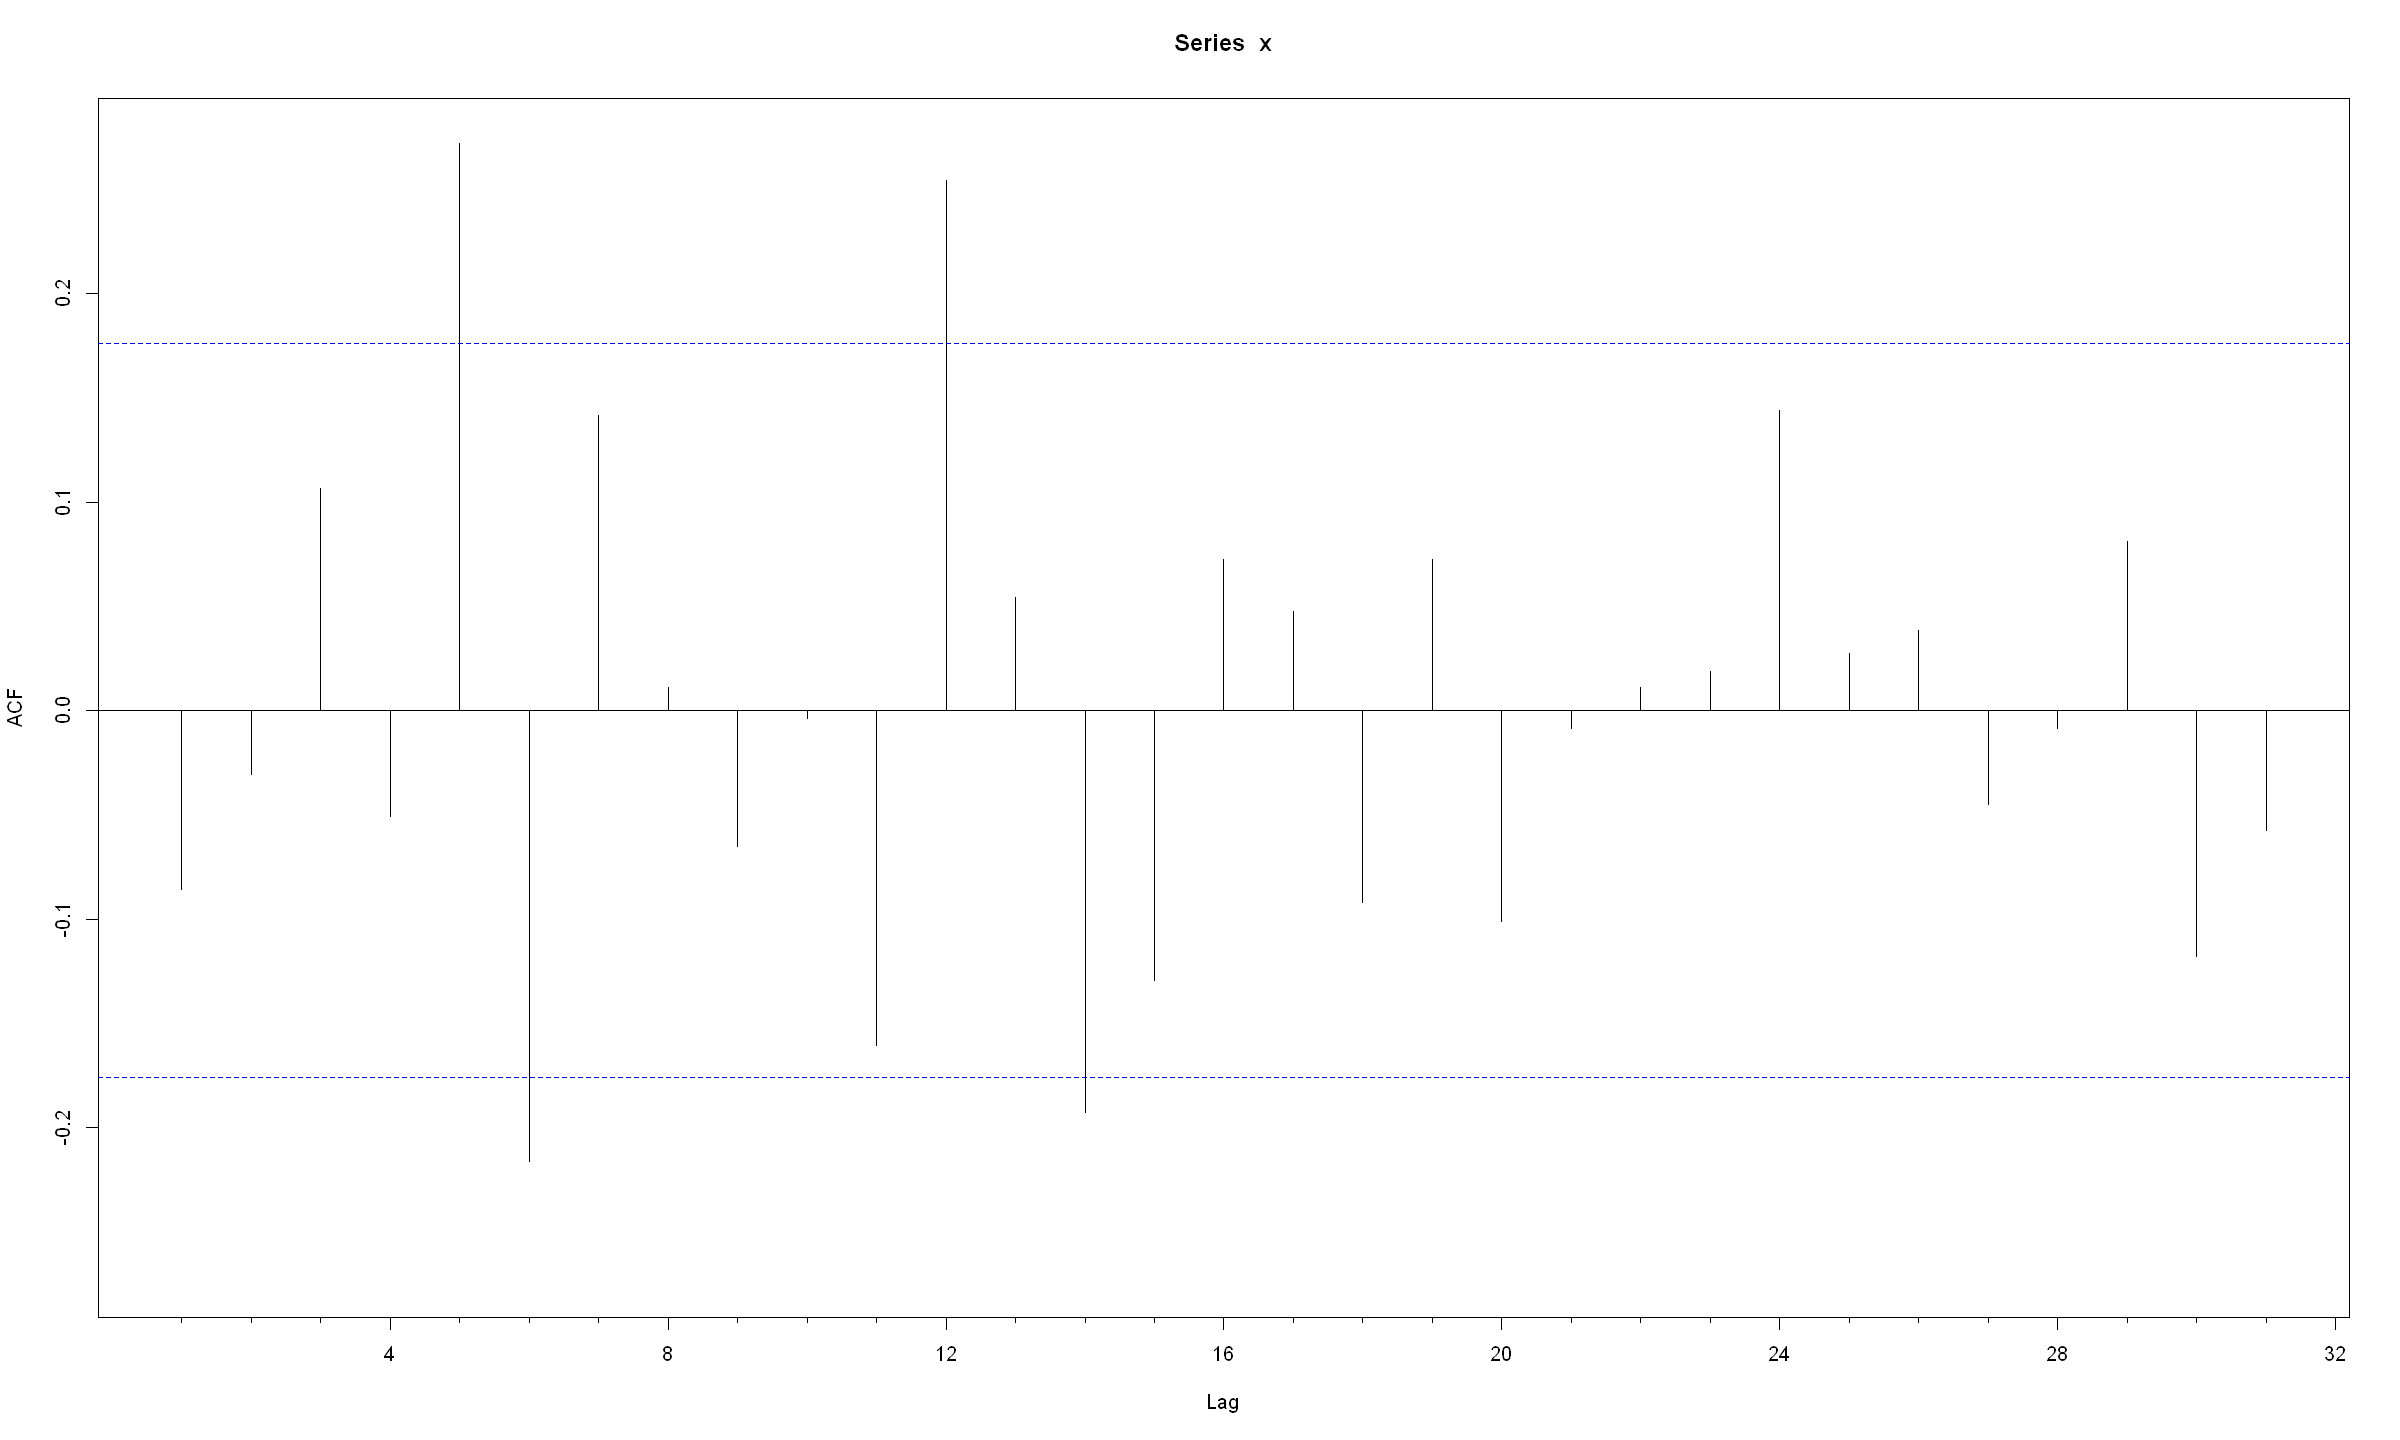

In [38]:
cat("Considering Model 3:\n\n")
residuals3 = mod3$residuals
S.ACF(residuals3)

Considering Model 12:



n,124.00
h,31.00
bound,0.18
# out of bounds,3.00
% out of bounds,9.68


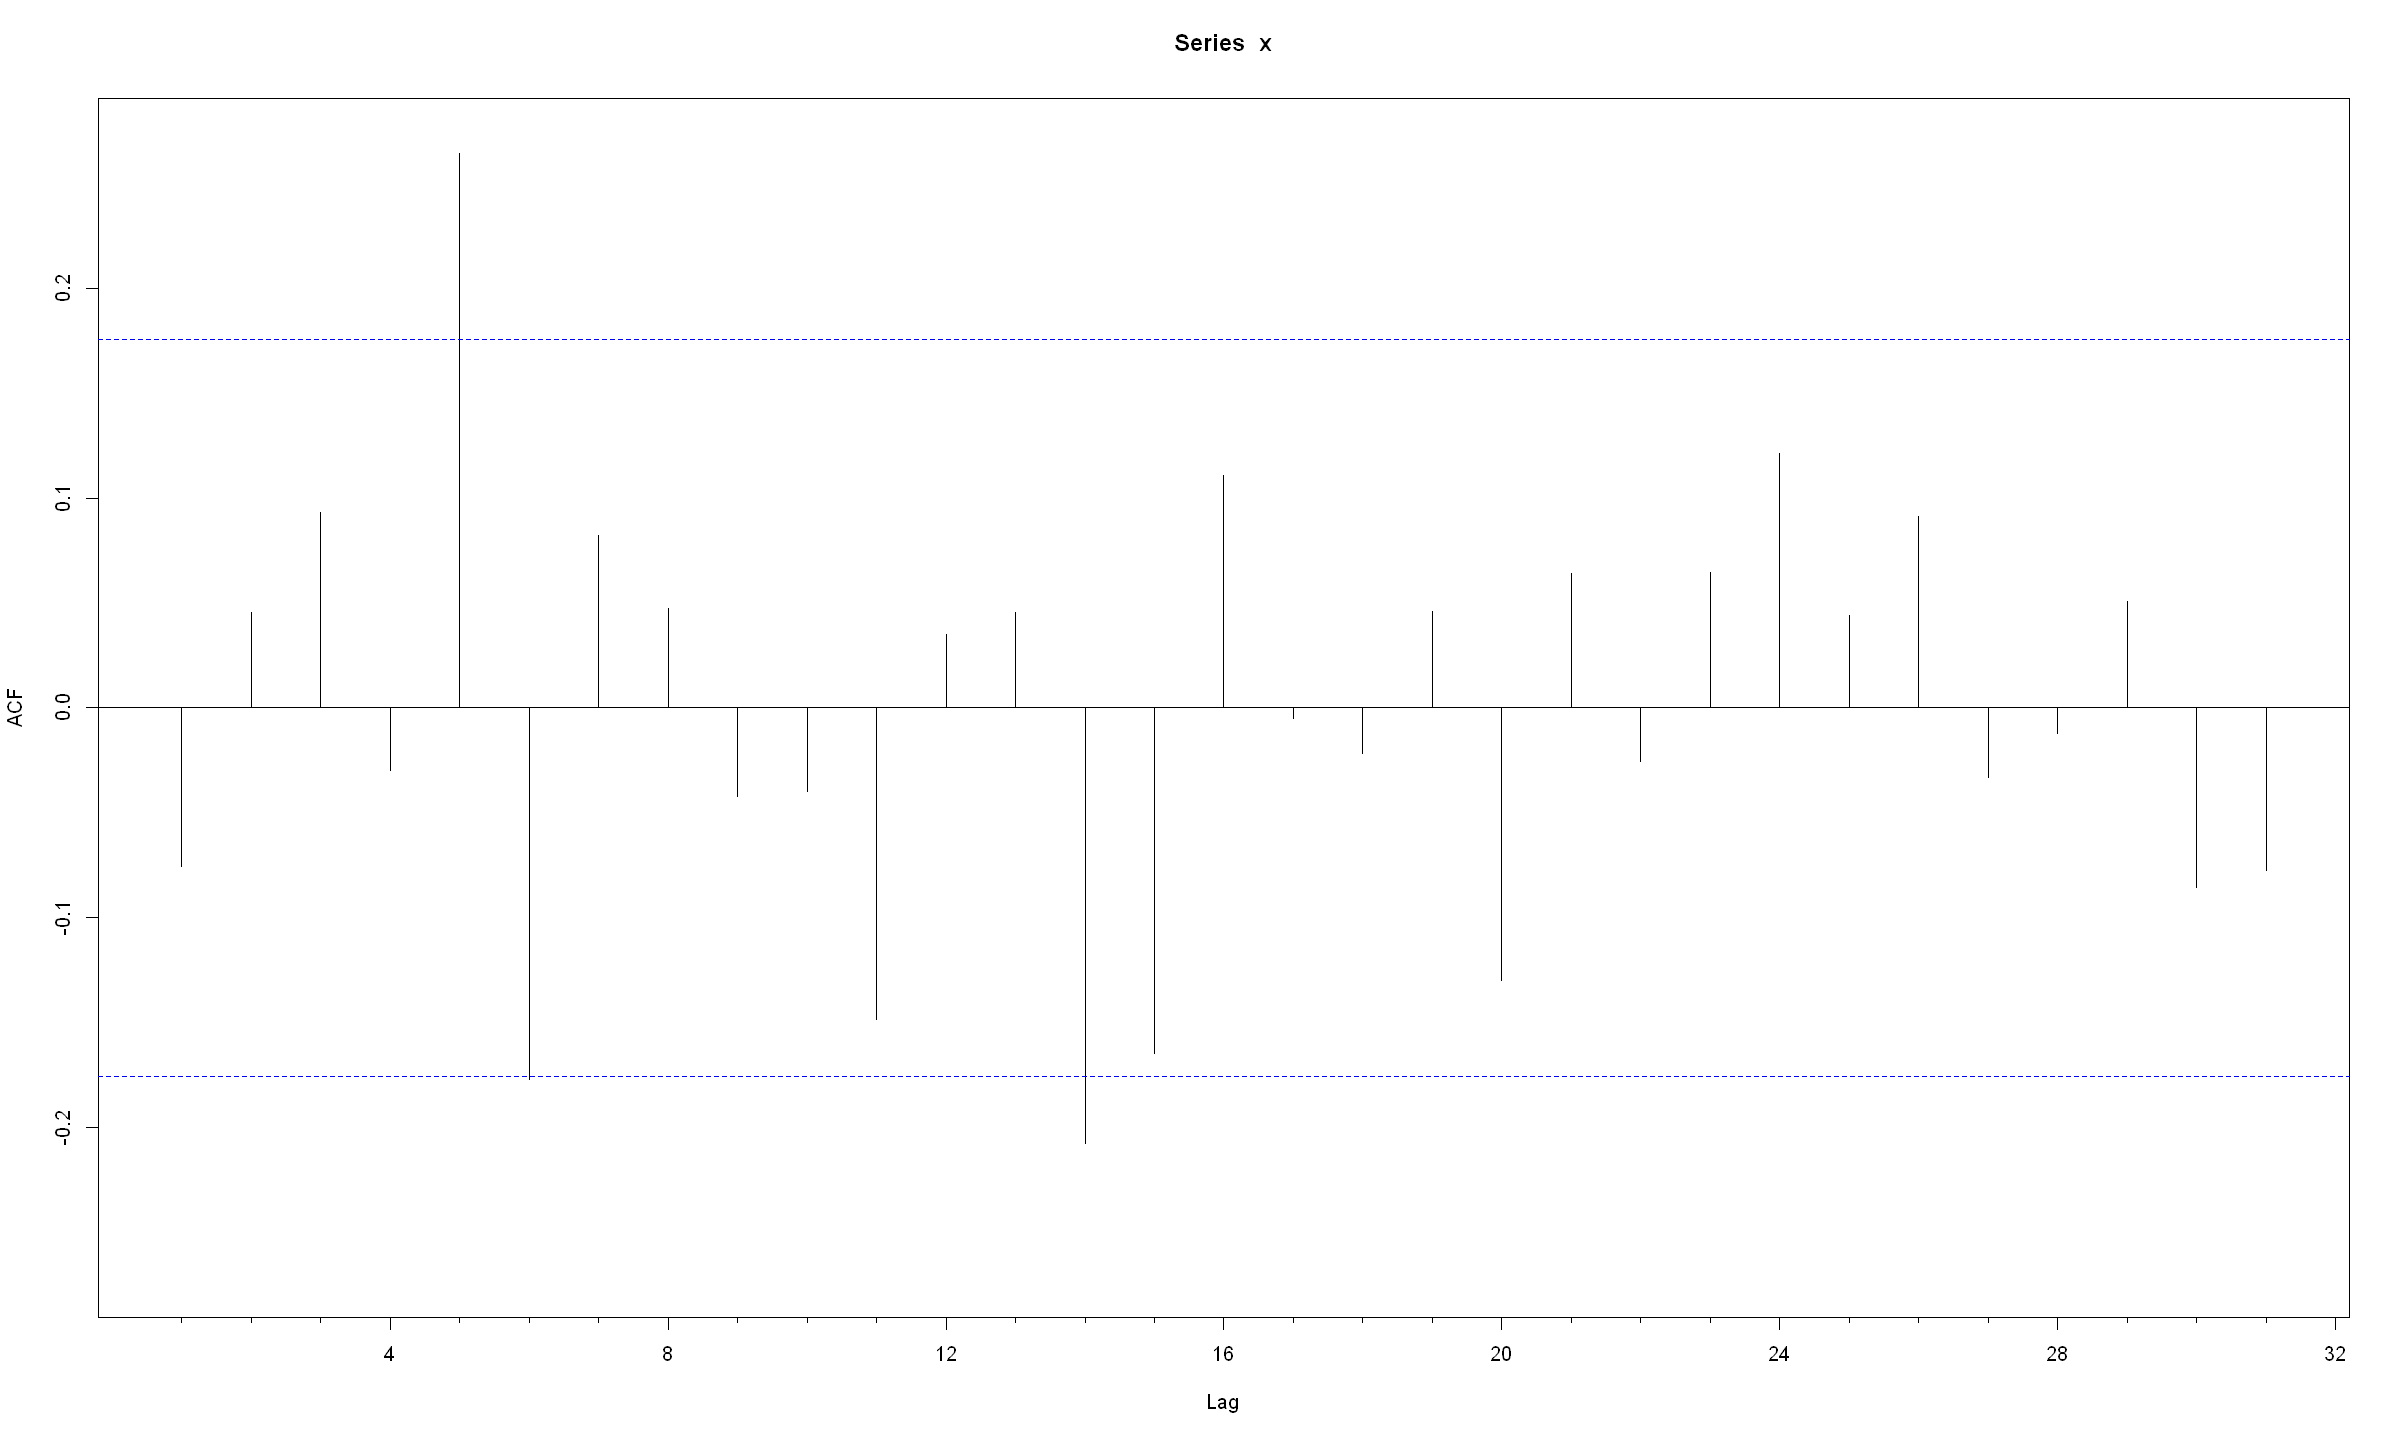

In [39]:
cat("Considering Model 12:\n\n")
residuals12 = mod12$residuals
S.ACF(residuals12)

Considering Model 15:



n,124.00
h,31.00
bound,0.18
# out of bounds,4.00
% out of bounds,12.90


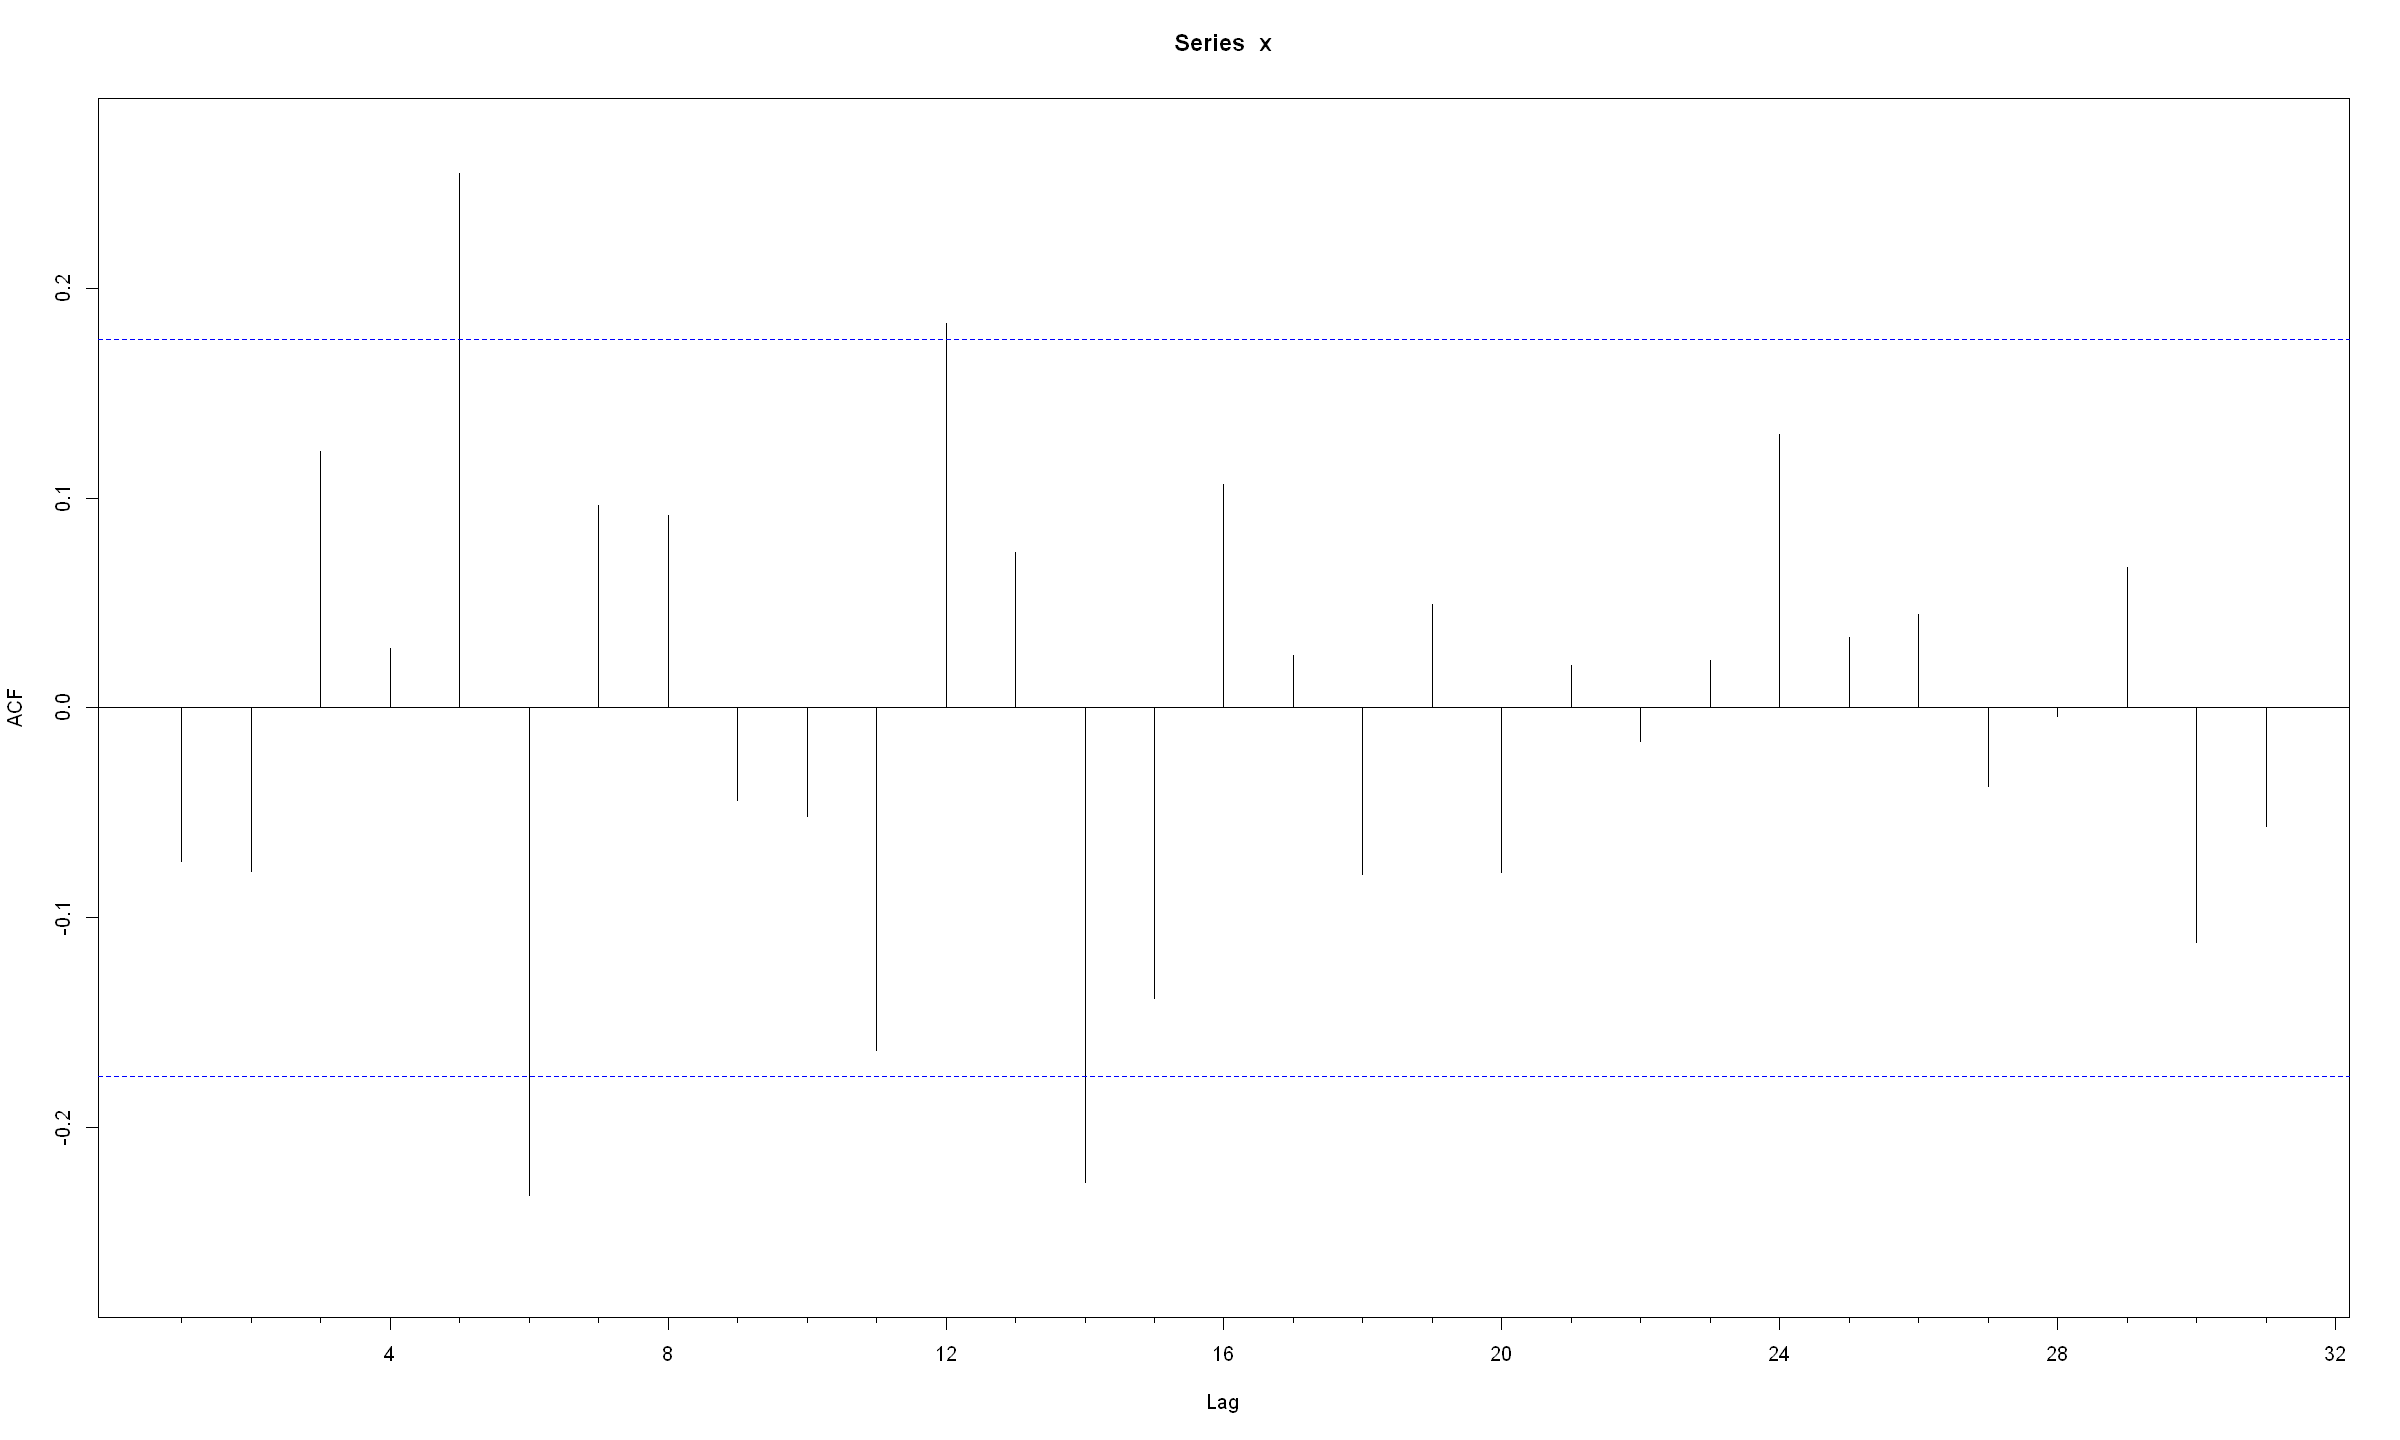

In [40]:
cat("Considering Model 15:\n\n")
residuals15 = mod15$residuals
S.ACF(residuals15)

Considering Model 24:



n,124.00
h,31.00
bound,0.18
# out of bounds,5.00
% out of bounds,16.13


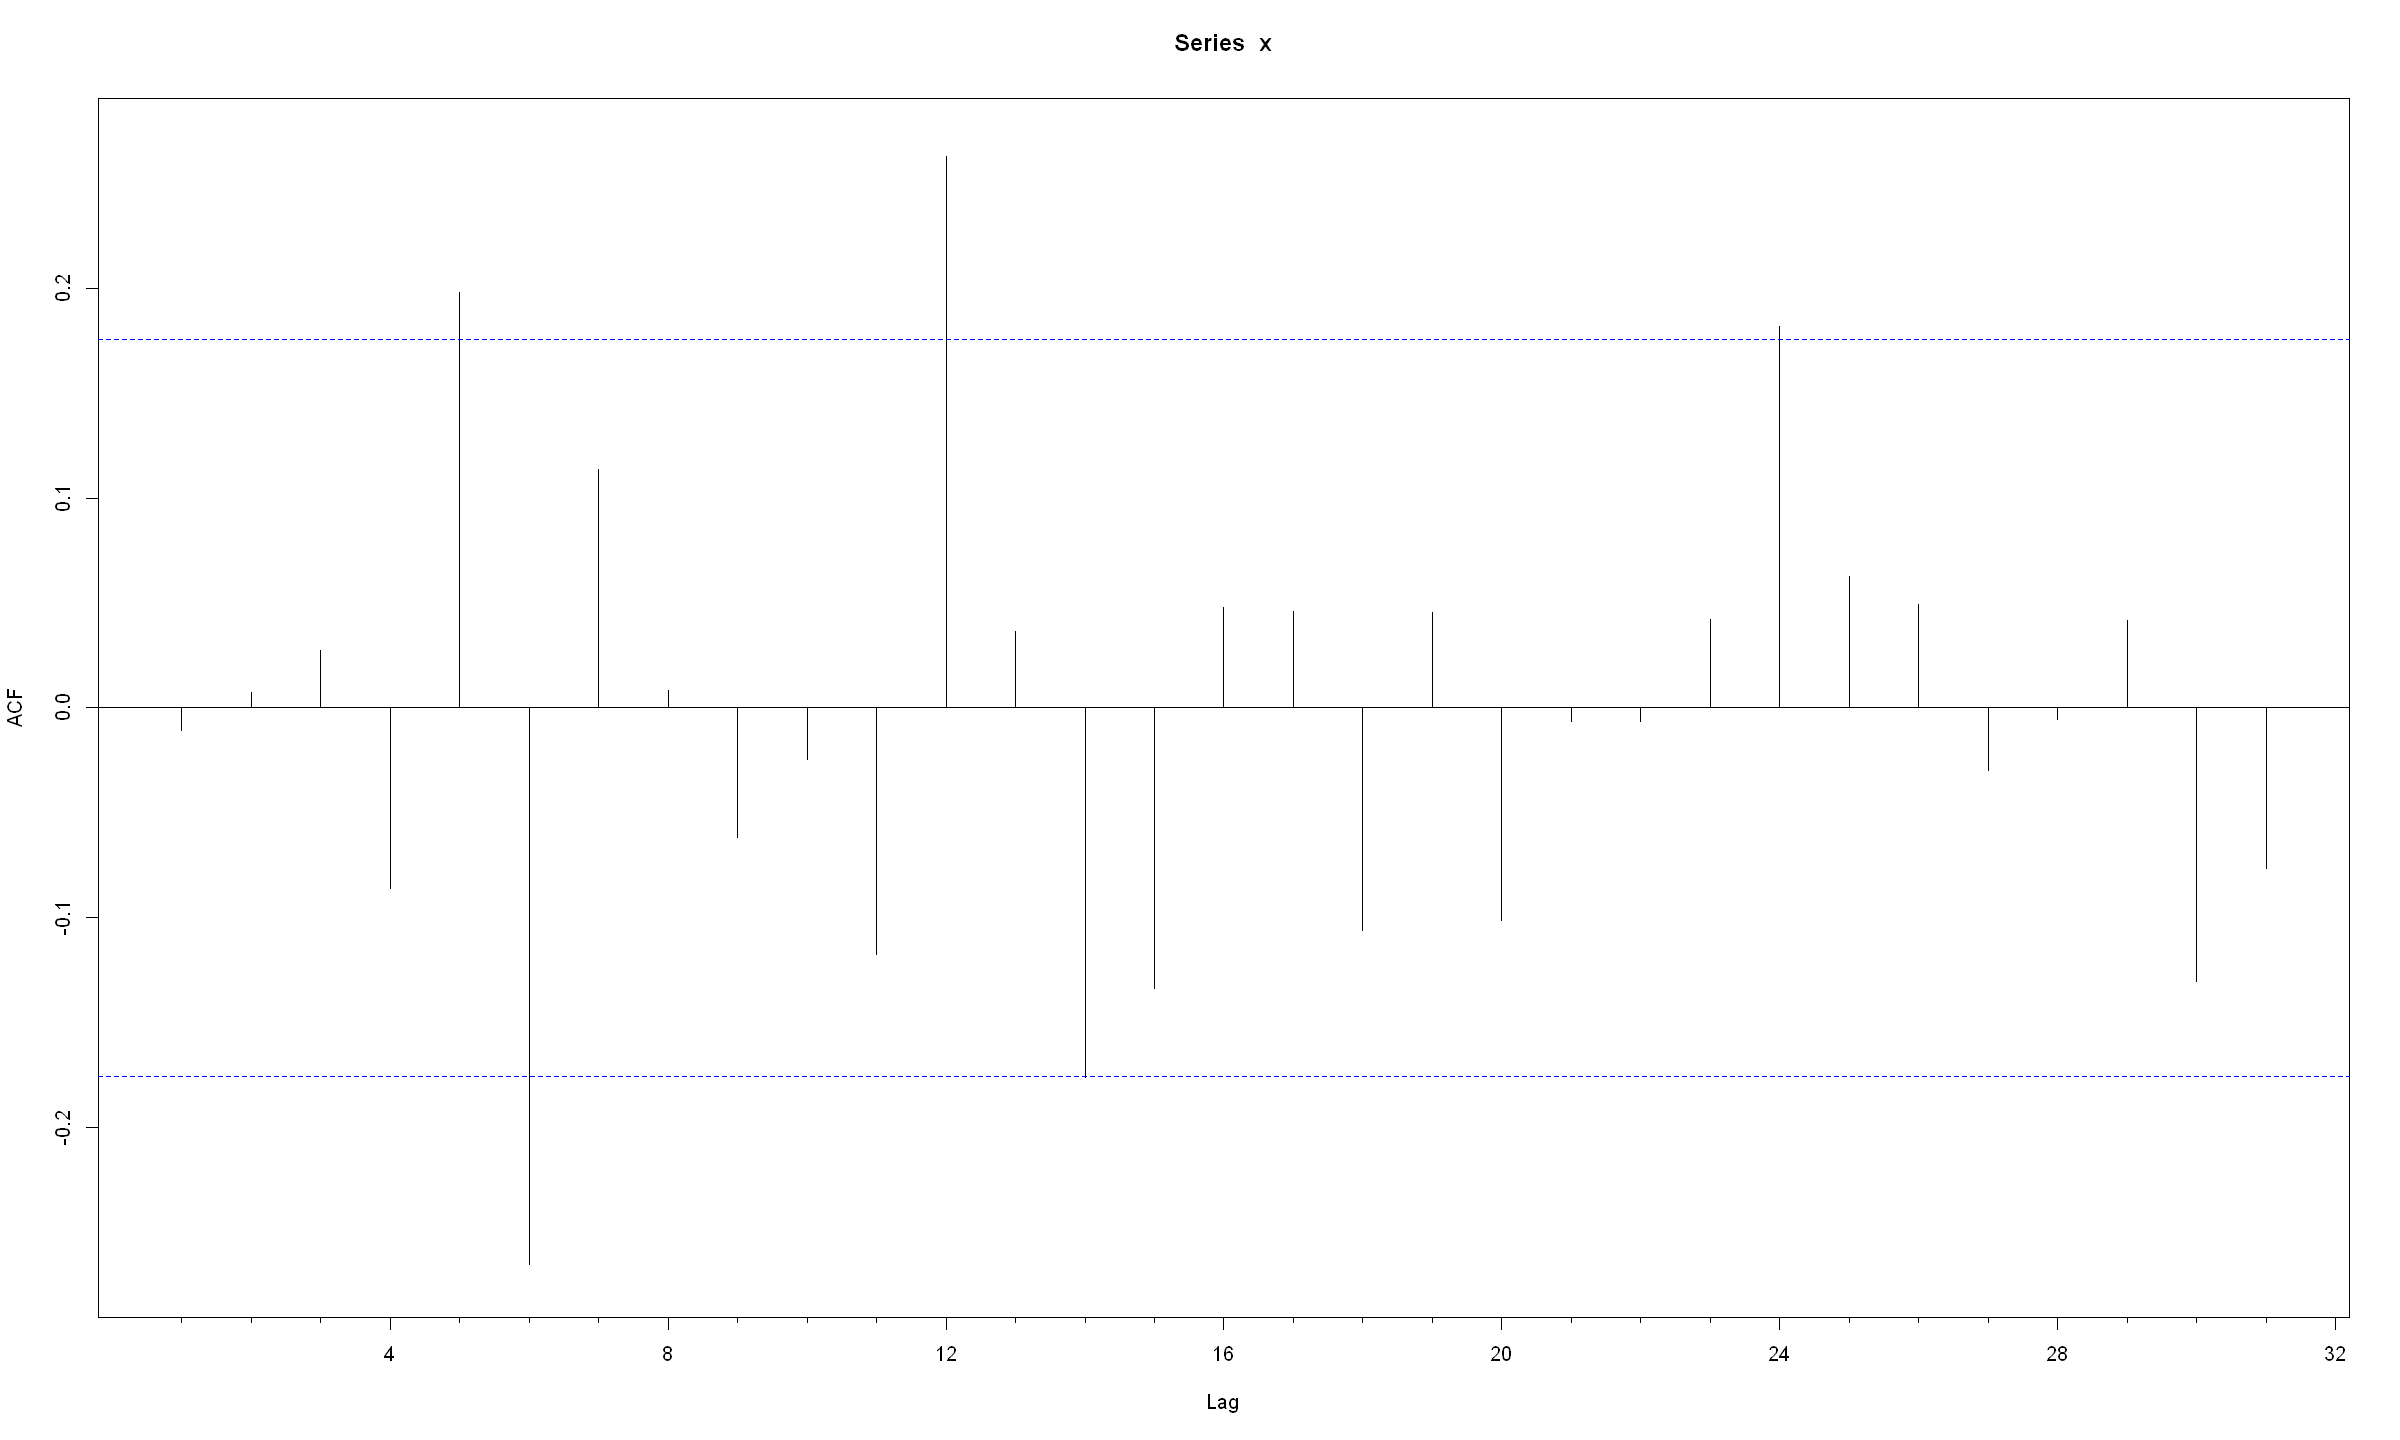

In [41]:
cat("Considering Model 24:\n\n")
residuals24 = mod24$residuals
S.ACF(residuals24)

We will only take into consideration those values which are clearly outside of the bound $ \pm 2 / \sqrt{n} $. So the percentage of lags which are out of bounds at every models residuals' ACF is:

 - **Model 3**: 3 values ($9.68$ %)
 - **Model 12**: 2 values ($6.45$ %)
 - **Model 15**: 3 values ($9.68$ %)
 - **Model 24**: 3 values ($9.68$ %)


Although none of the 25 models evaluated pass the standard residual diagnostics (none of the models achieve less than 5% of ACF coefficients outside the $ \pm 2/\sqrt{n} $ bounds) there is no need to explore additional models. It is important to acknowledge this limitation in the presentation and discuss its implications for the interpretation and reliability of the results. The fact that the best models do not fully meet the IID noise assumption means that some residual autocorrelation persists, which may affect the trust we place in the model’s forecasts and inference.

However, the seriousness of this violation should be carefully assessed. First, the number of lags available for ACF diagnostics is relatively small, so even a few out-of-bounds values can push the percentage above the 5% threshold, potentially exaggerating the apparent lack of fit. Second, it is essential to consider the results of other IID noise tests (such as the Ljung-Box test and nonparametric randomness tests). If these additional tests do not reject the null hypothesis of IID noise, and if the ACF coefficients outside the bounds are only borderline significant or the excess is marginal, then the violation of the IID assumption is less serious. In such cases, the main conclusions and forecasts from the selected model(s) remain broadly valid, but should be interpreted with appropriate caution and transparency regarding these diagnostic limitations.

#### Nonparametric Tests for Residual Randomness

To assess whether the residuals from Models 3, 12, 15,  24 behave like independent random noise, we apply the NonParametric.Tests function, which implements three classical nonparametric tests of randomness, which do not rely on the assumption of normality:

The **Turning Point test** counts the number of local maxima and minima in the residual sequence. According to theory, for a random sequence, the number of turning points should be close to its expected value; significant deviations may indicate the presence of cycles or non-random structure.

The **Difference-sign test** examines the sequence of signs of differences between consecutive residuals. A random series should display a typical number of sign changes; too few or too many suggest persistence or alternation, revealing possible serial dependence.

The **Rank test** analyzes the ordering of residuals. If the sequence is random, the ranks should not show systematic patterns; deviations may indicate underlying trends or non-randomness.

As highlighted in Unit 7, these tests together provide a robust, distribution-free assessment of whether the residuals are consistent with the IID noise assumption. If all p-values are high, this supports the conclusion that the residuals are adequately random, reinforcing the reliability of the fitted model.

In [42]:
cat("Some tests over Model 3:\n\n") 
NonParametric.Tests(residuals3)  

cat("\n\n")

cat("Some tests over Model 12:\n\n") 
NonParametric.Tests(residuals12)  

cat("\n\n")
cat("Some tests over Model 15:\n\n") 
NonParametric.Tests(residuals15)  

cat("\n\n")
cat("Some tests over Model 24:\n\n") 
NonParametric.Tests(residuals24)

Some tests over Model 3:



,Test Statistic,P-value
Turning Point test,1.144318,0.25249192
Difference-sign Test,1.704113,0.08836004
Rank Test,1.347712,0.17775094




Some tests over Model 12:



,Test Statistic,P-value
Turning Point test,0.1430397,0.8862588
Difference-sign Test,0.4647580,0.6421048
Rank Test,1.0496605,0.2938742




Some tests over Model 15:



,Test Statistic,P-value
Turning Point test,0.7151985,0.4744864
Difference-sign Test,1.0844353,0.2781718
Rank Test,1.2051658,0.2281393




Some tests over Model 24:



,Test Statistic,P-value
Turning Point test,1.1443177,0.2524919
Difference-sign Test,0.1549193,0.8768849
Rank Test,0.9071140,0.3643465


The results of the nonparametric randomness tests for Models 3, 12, 15, and 24 show that all p-values are well above the conventional significance threshold of 0.05. According to the methodology outlined in Unit 7, this indicates that none of the tests reject the null hypothesis of randomness for the residuals. Therefore, we can conclude that the residuals from all four models behave as independent random sequences, providing further support for the adequacy of these models with respect to the IID noise assumption. This outcome reinforces the reliability of subsequent inference and forecasting based on these models.

#### The Ljung-Box Test

The Ljung-Box test is a statistical test used to determine whether the residuals from a time series model exhibit significant autocorrelation at multiple lags. Its primary purpose is to check if the residuals behave like white noise, meaning they are independently distributed and do not display patterns that the model failed to capture. The test does this by aggregating the squared autocorrelations of the residuals up to a specified lag (h), and comparing the result to a chi-squared distribution. A low p-value (typically below 0.05) suggests that the residuals are not independent, indicating that the model may be missing important temporal structure.

In [43]:
s <- 4  # Stationary period
n <- length(Wt)  # Length of the transformed series
h <- min(2*s, n%/%5)  # h = min(8, 12) = 8

My.Ljung.Box2=function(x,np)
{
  # x denotes the vector of the residuals of the model
  # np = p + q + P + Q + 1, where the model behaves as an ARMA(p,q) x ARMA(P,Q)s
  n=length(x)
  l.max=round(n/4,0)
  SampleACF=as.numeric(unlist(Acf(x,l.max))[2:l.max])
  lag.vec=rep(h,6)
  Q.ML=numeric(6)
  for (k in 1:6)
  {
    Q.ML[k]=n*(n+2)*sum(  ( (SampleACF[1:lag.vec[k]])^2)/(n-seq(1:lag.vec[k])) )  
  }
  Q.ML.Pvalues=numeric(6)
  for (k in 1:6)
  {
    Q.ML.Pvalues[k]=1-pchisq(Q.ML[k], lag.vec[k]-np, ncp = 0, lower.tail = TRUE, log.p = FALSE)
  }
  Q.ML.out=cbind(lag.vec, Q.ML,Q.ML.Pvalues)
  dimnames(Q.ML.out)=list(NULL,c("k","Test Statistic","P-value"))
  return(Q.ML.out)
}

Ljung test over Model 3:



k,Test Statistic,P-value
8,21.45849,0.0006633902
8,21.45849,0.0006633902
8,21.45849,0.0006633902
8,21.45849,0.0006633902
8,21.45849,0.0006633902
8,21.45849,0.0006633902


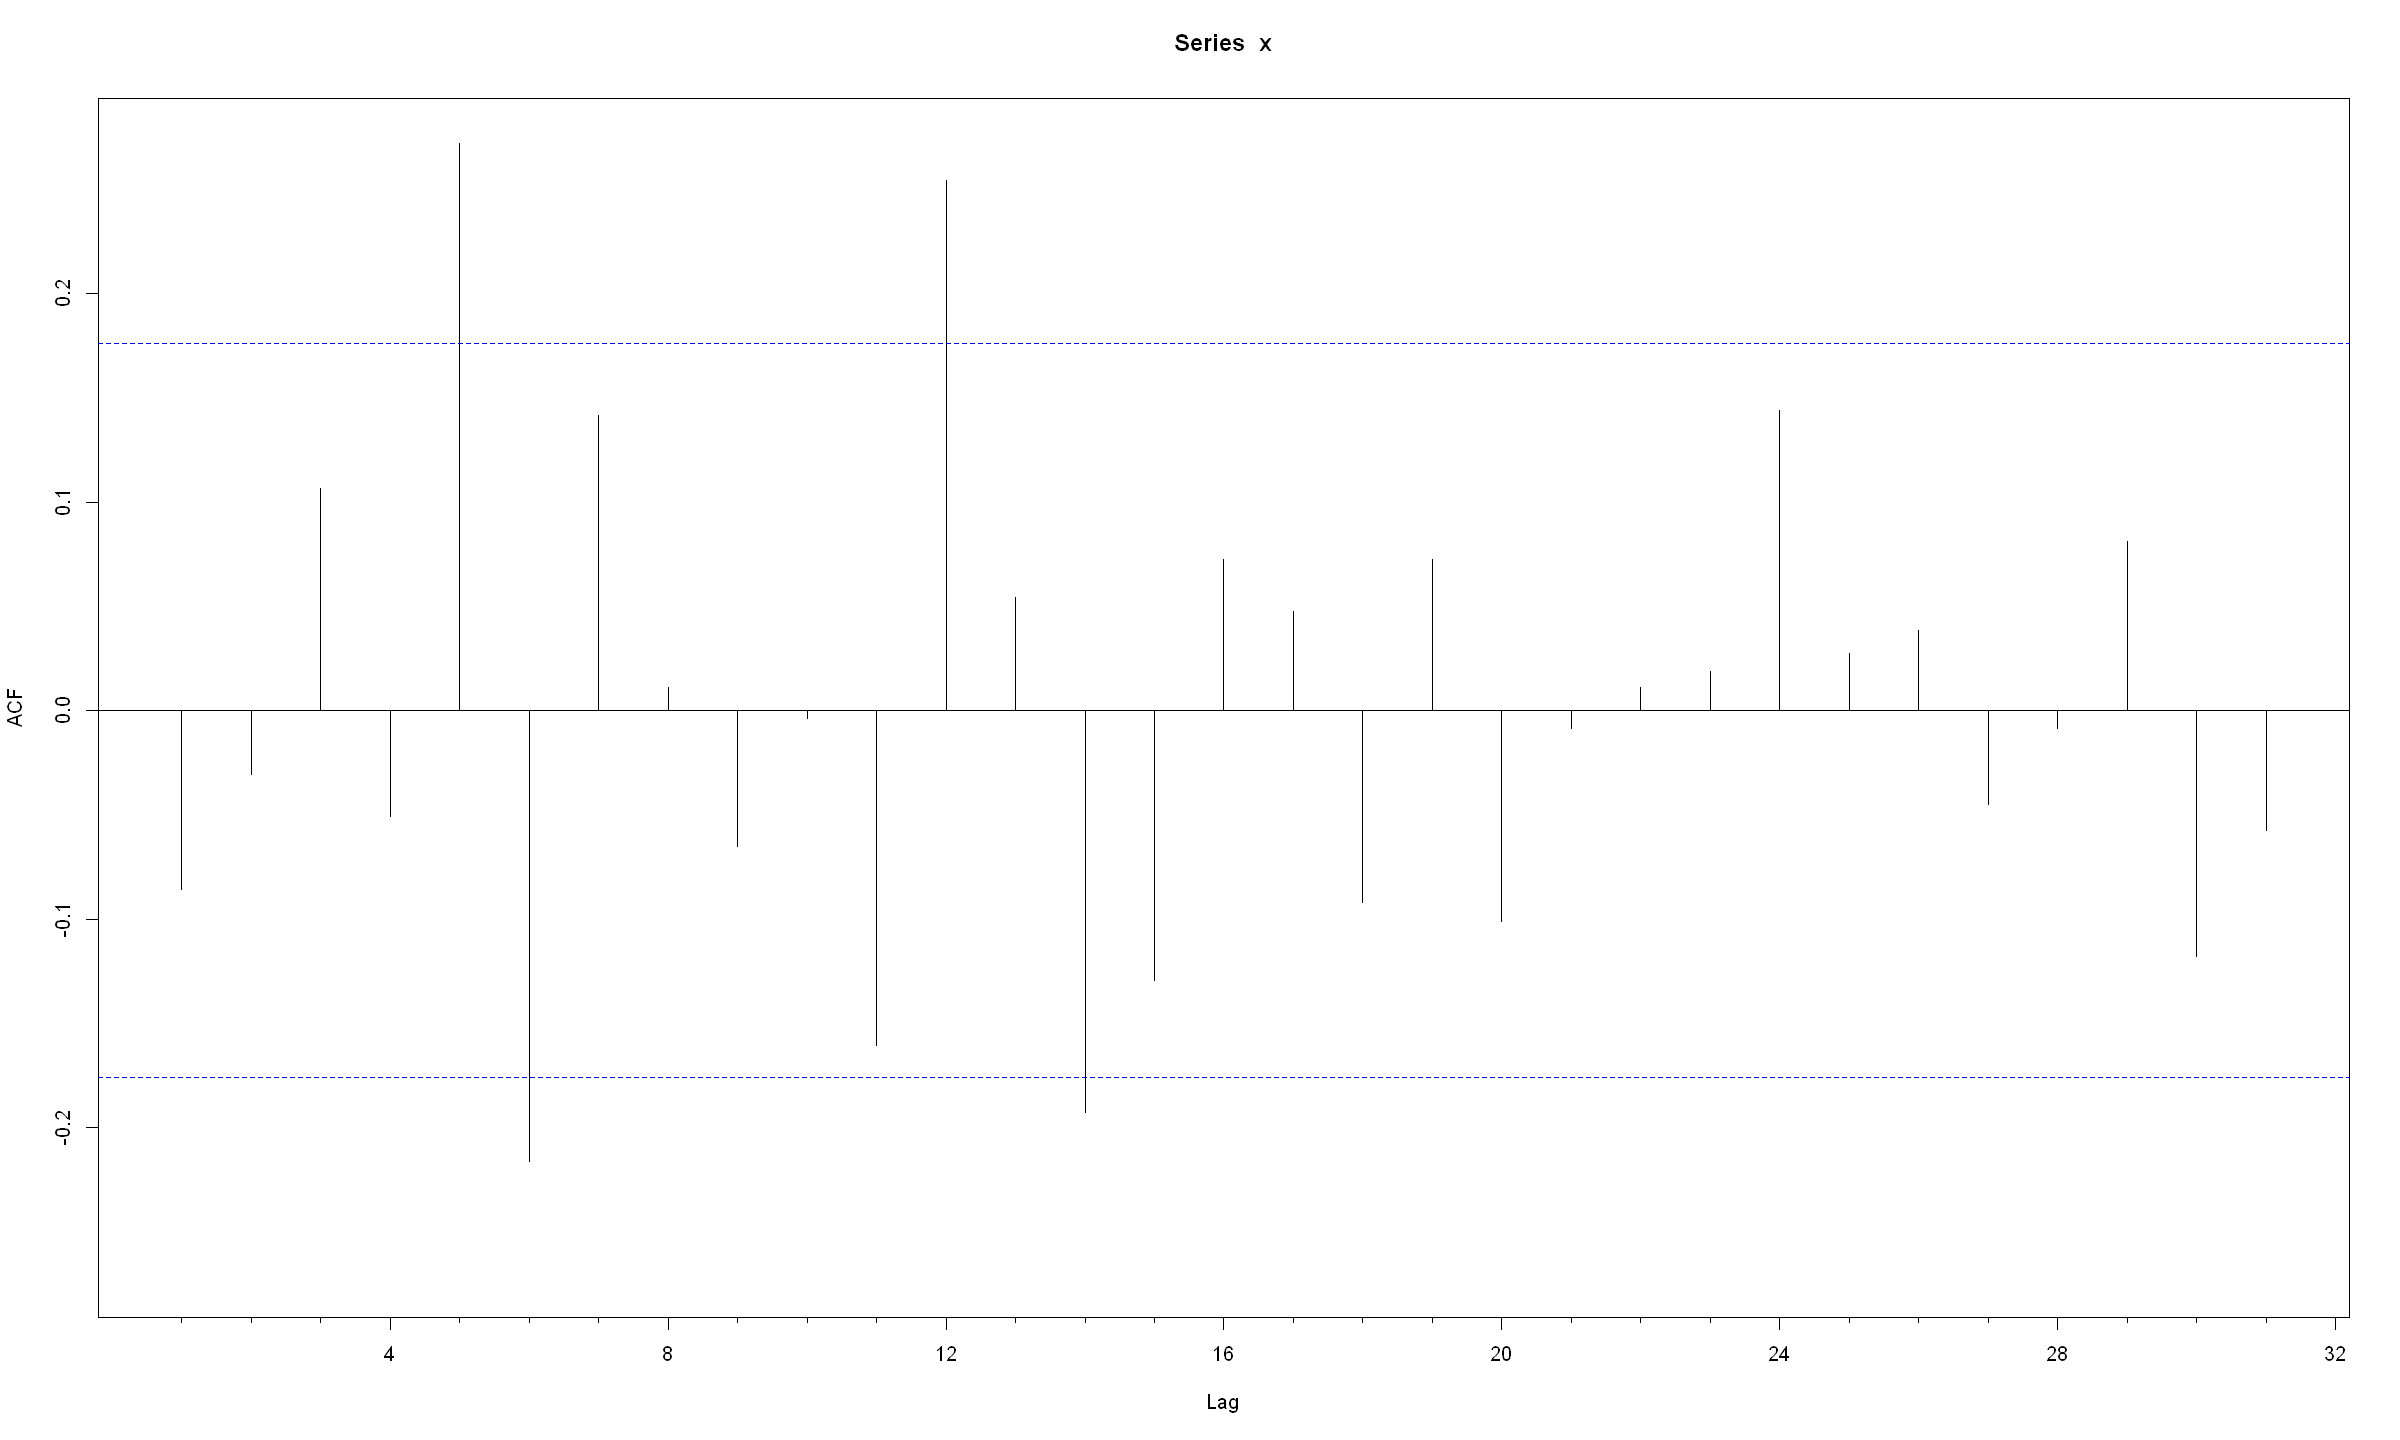

In [44]:
cat("Ljung test over Model 3:\n\n") 
#Model 3 has p=0, q=1, P=0, Q=1
np3 = 3

My.Ljung.Box2(residuals3,np3)

Ljung test over Model 12:



k,Test Statistic,P-value
8,16.78573,0.000226477
8,16.78573,0.000226477
8,16.78573,0.000226477
8,16.78573,0.000226477
8,16.78573,0.000226477
8,16.78573,0.000226477


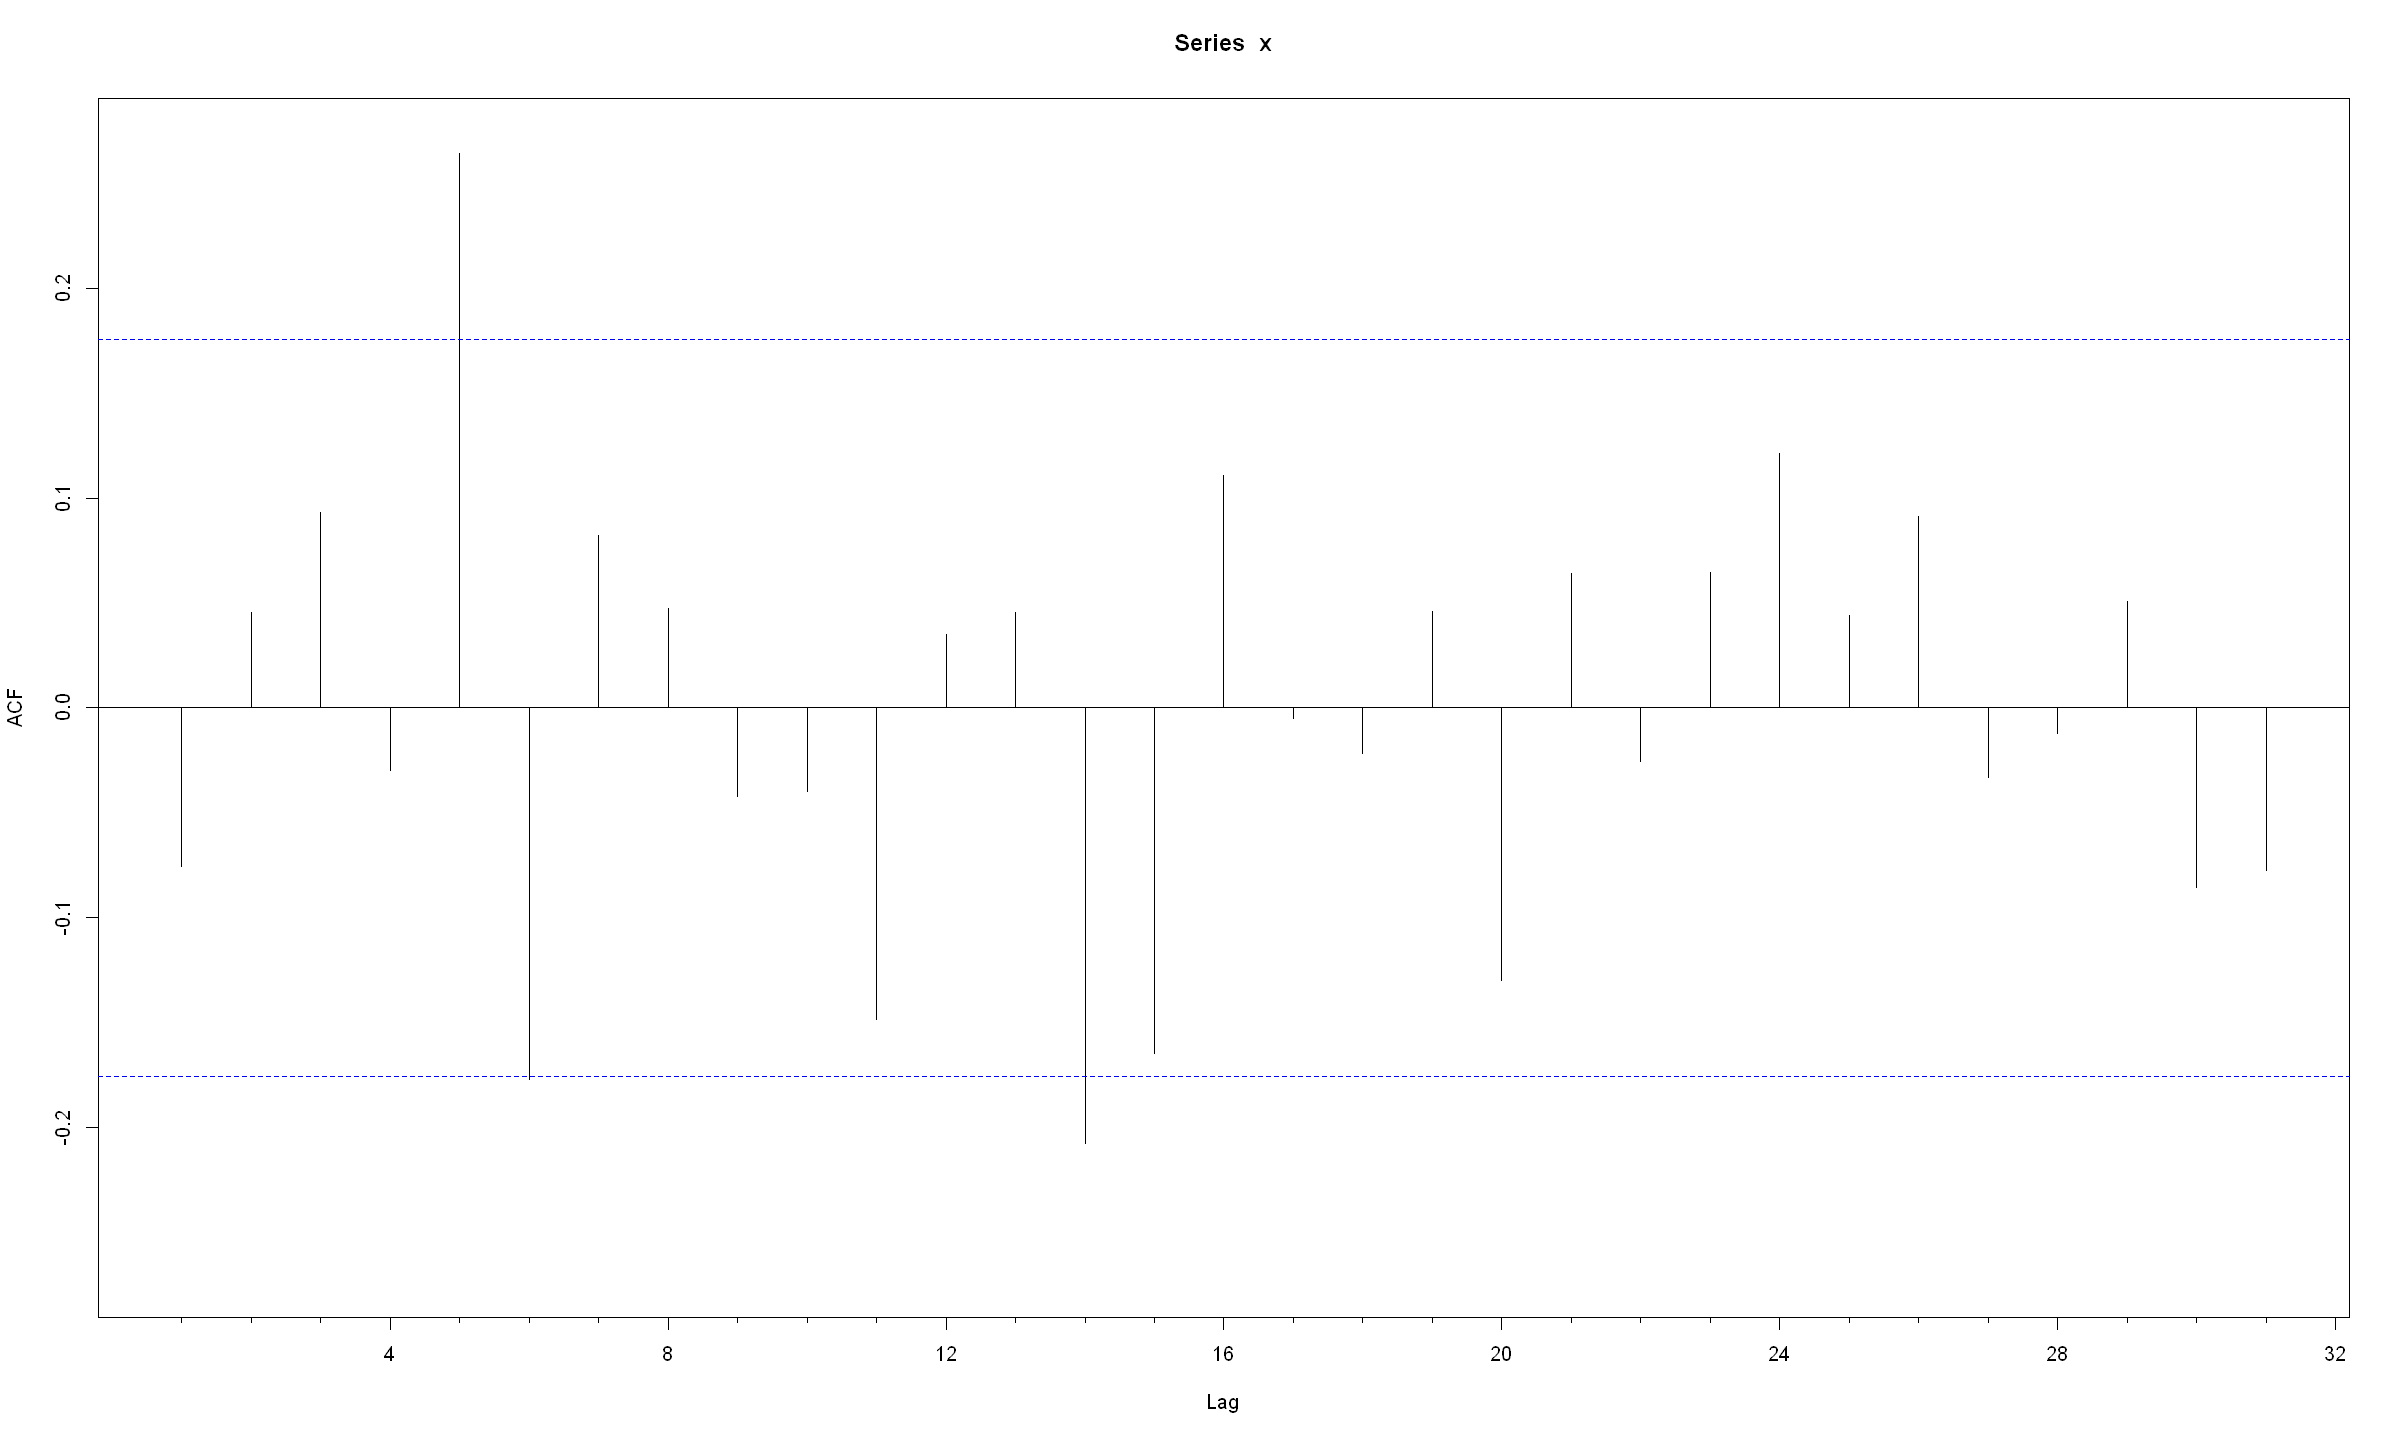

In [45]:
cat("Ljung test over Model 12:\n\n") 
#Model 12 has p=3, q=0, P=2, Q=0
np12 = 6

My.Ljung.Box2(residuals12,np12)

Ljung test over Model 15:



k,Test Statistic,P-value
8,21.59911,0.0002408117
8,21.59911,0.0002408117
8,21.59911,0.0002408117
8,21.59911,0.0002408117
8,21.59911,0.0002408117
8,21.59911,0.0002408117


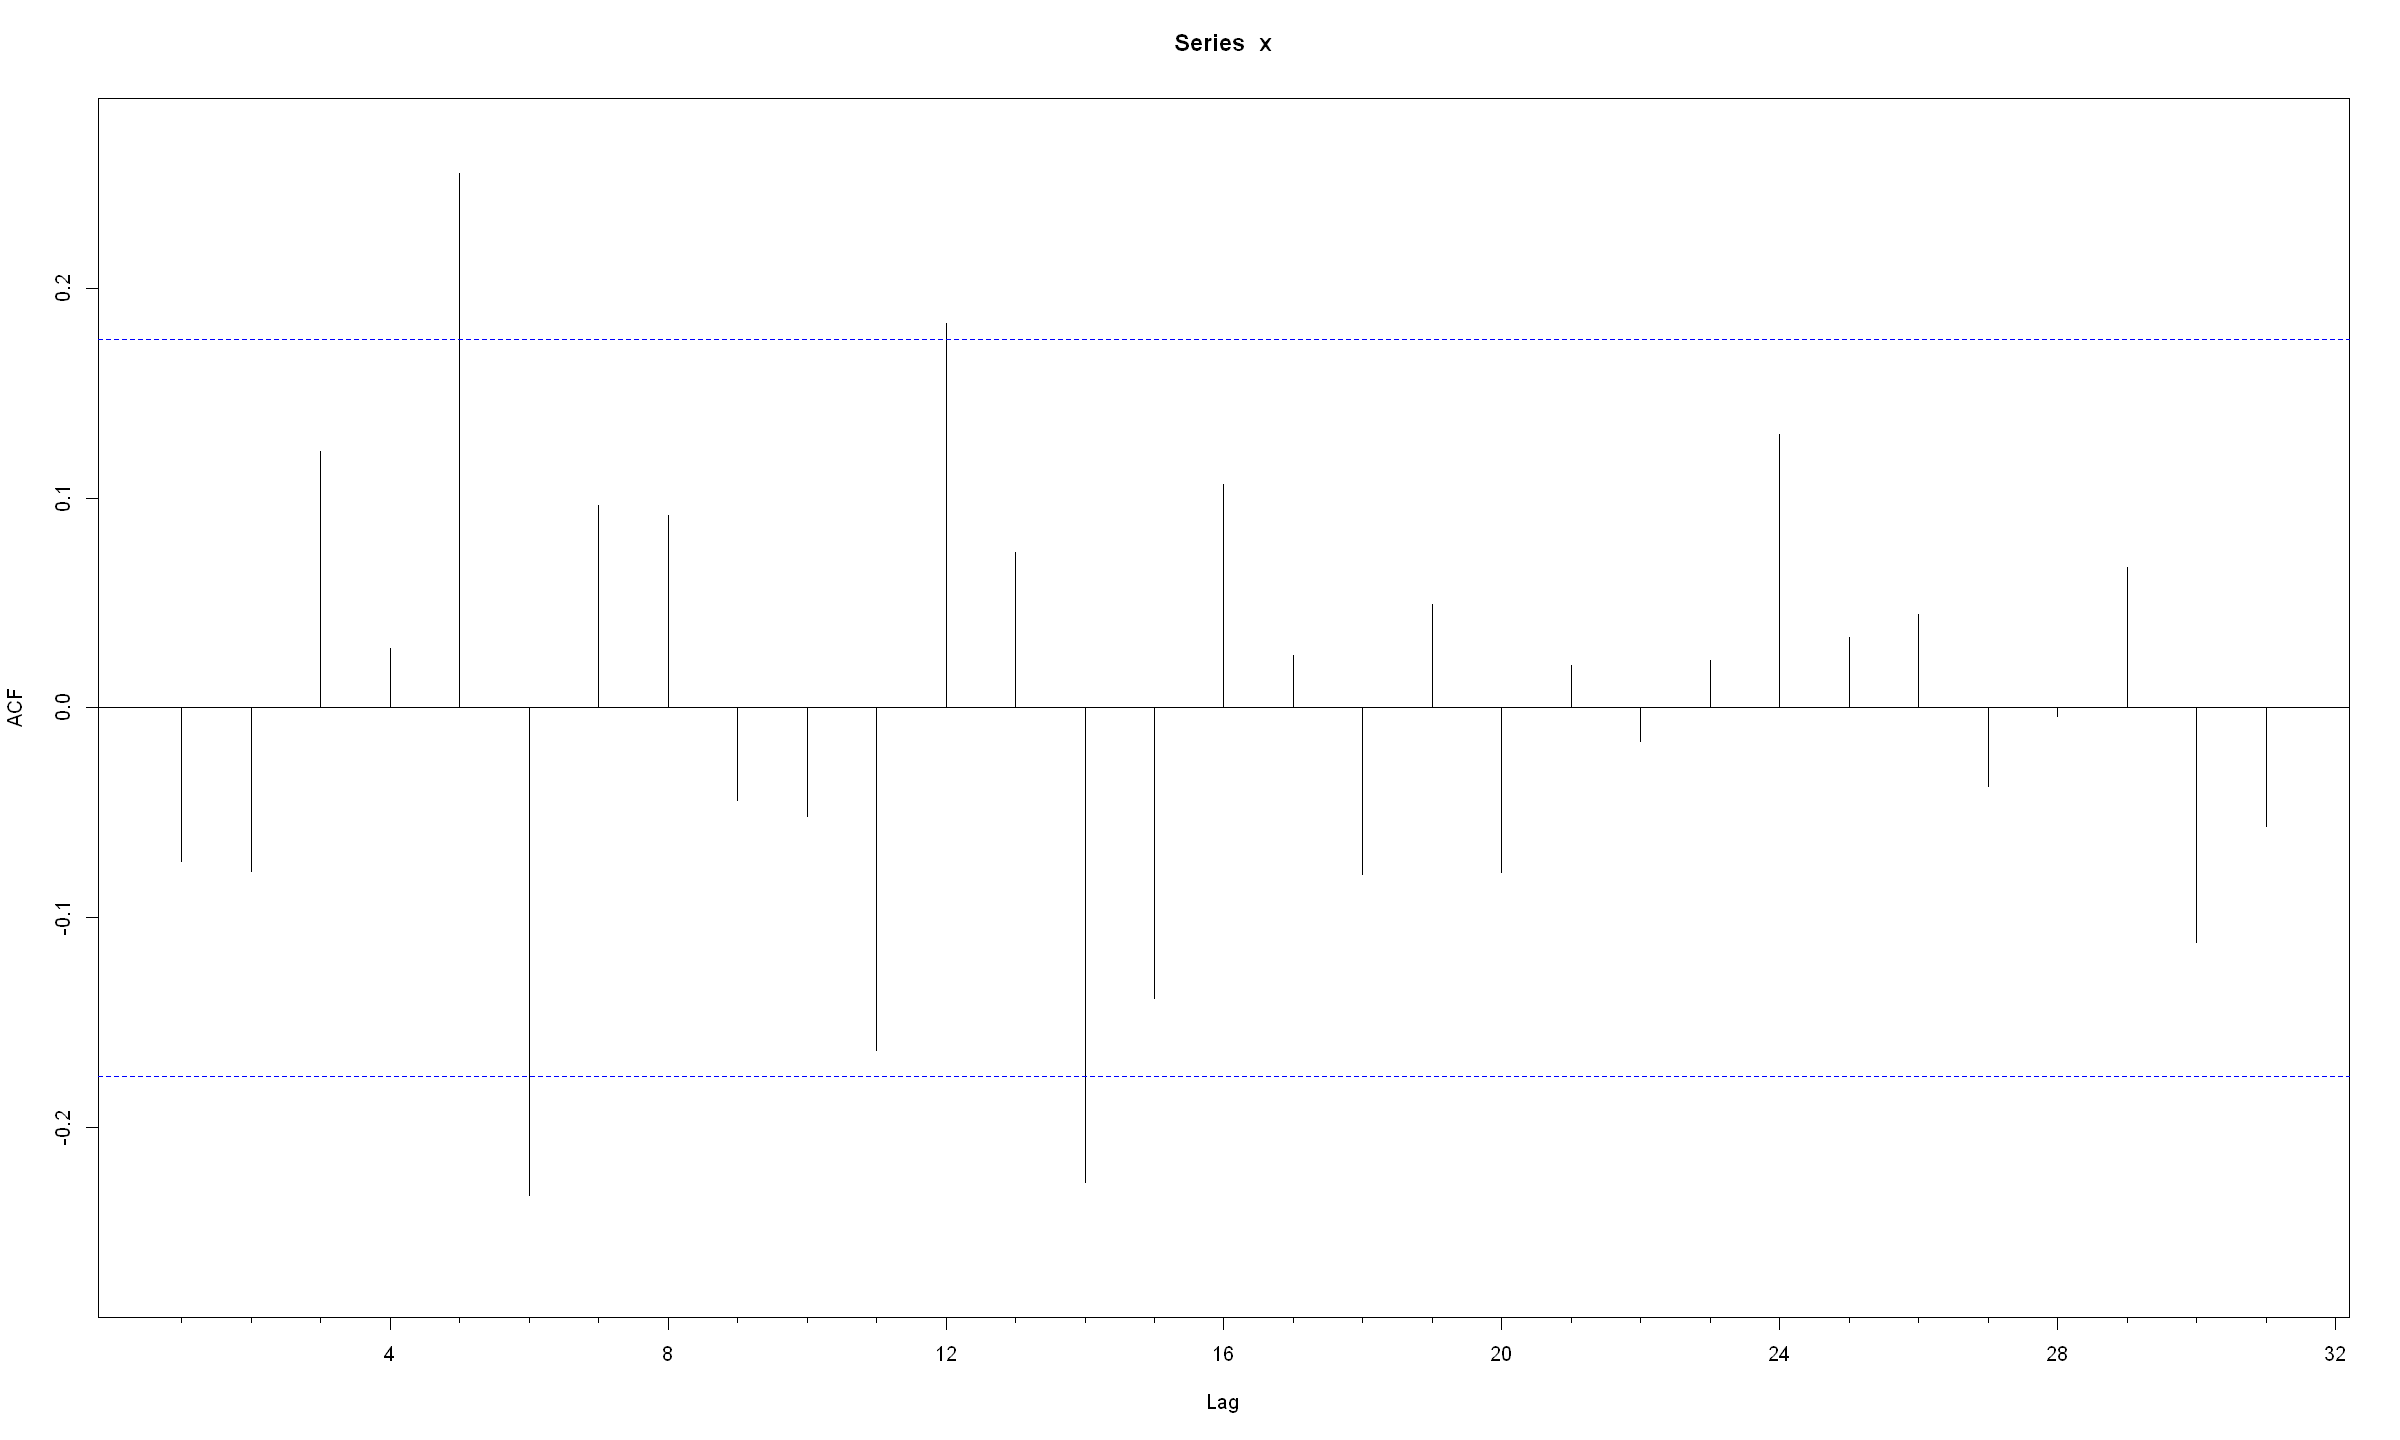

In [46]:
cat("Ljung test over Model 15:\n\n") 
#Model 15 has  p=0, q=1, P=2, Q=0
np15 = 4

My.Ljung.Box2(residuals15,np15)

Ljung test over Model 24:



k,Test Statistic,P-value
8,17.31398,0.0001739074
8,17.31398,0.0001739074
8,17.31398,0.0001739074
8,17.31398,0.0001739074
8,17.31398,0.0001739074
8,17.31398,0.0001739074


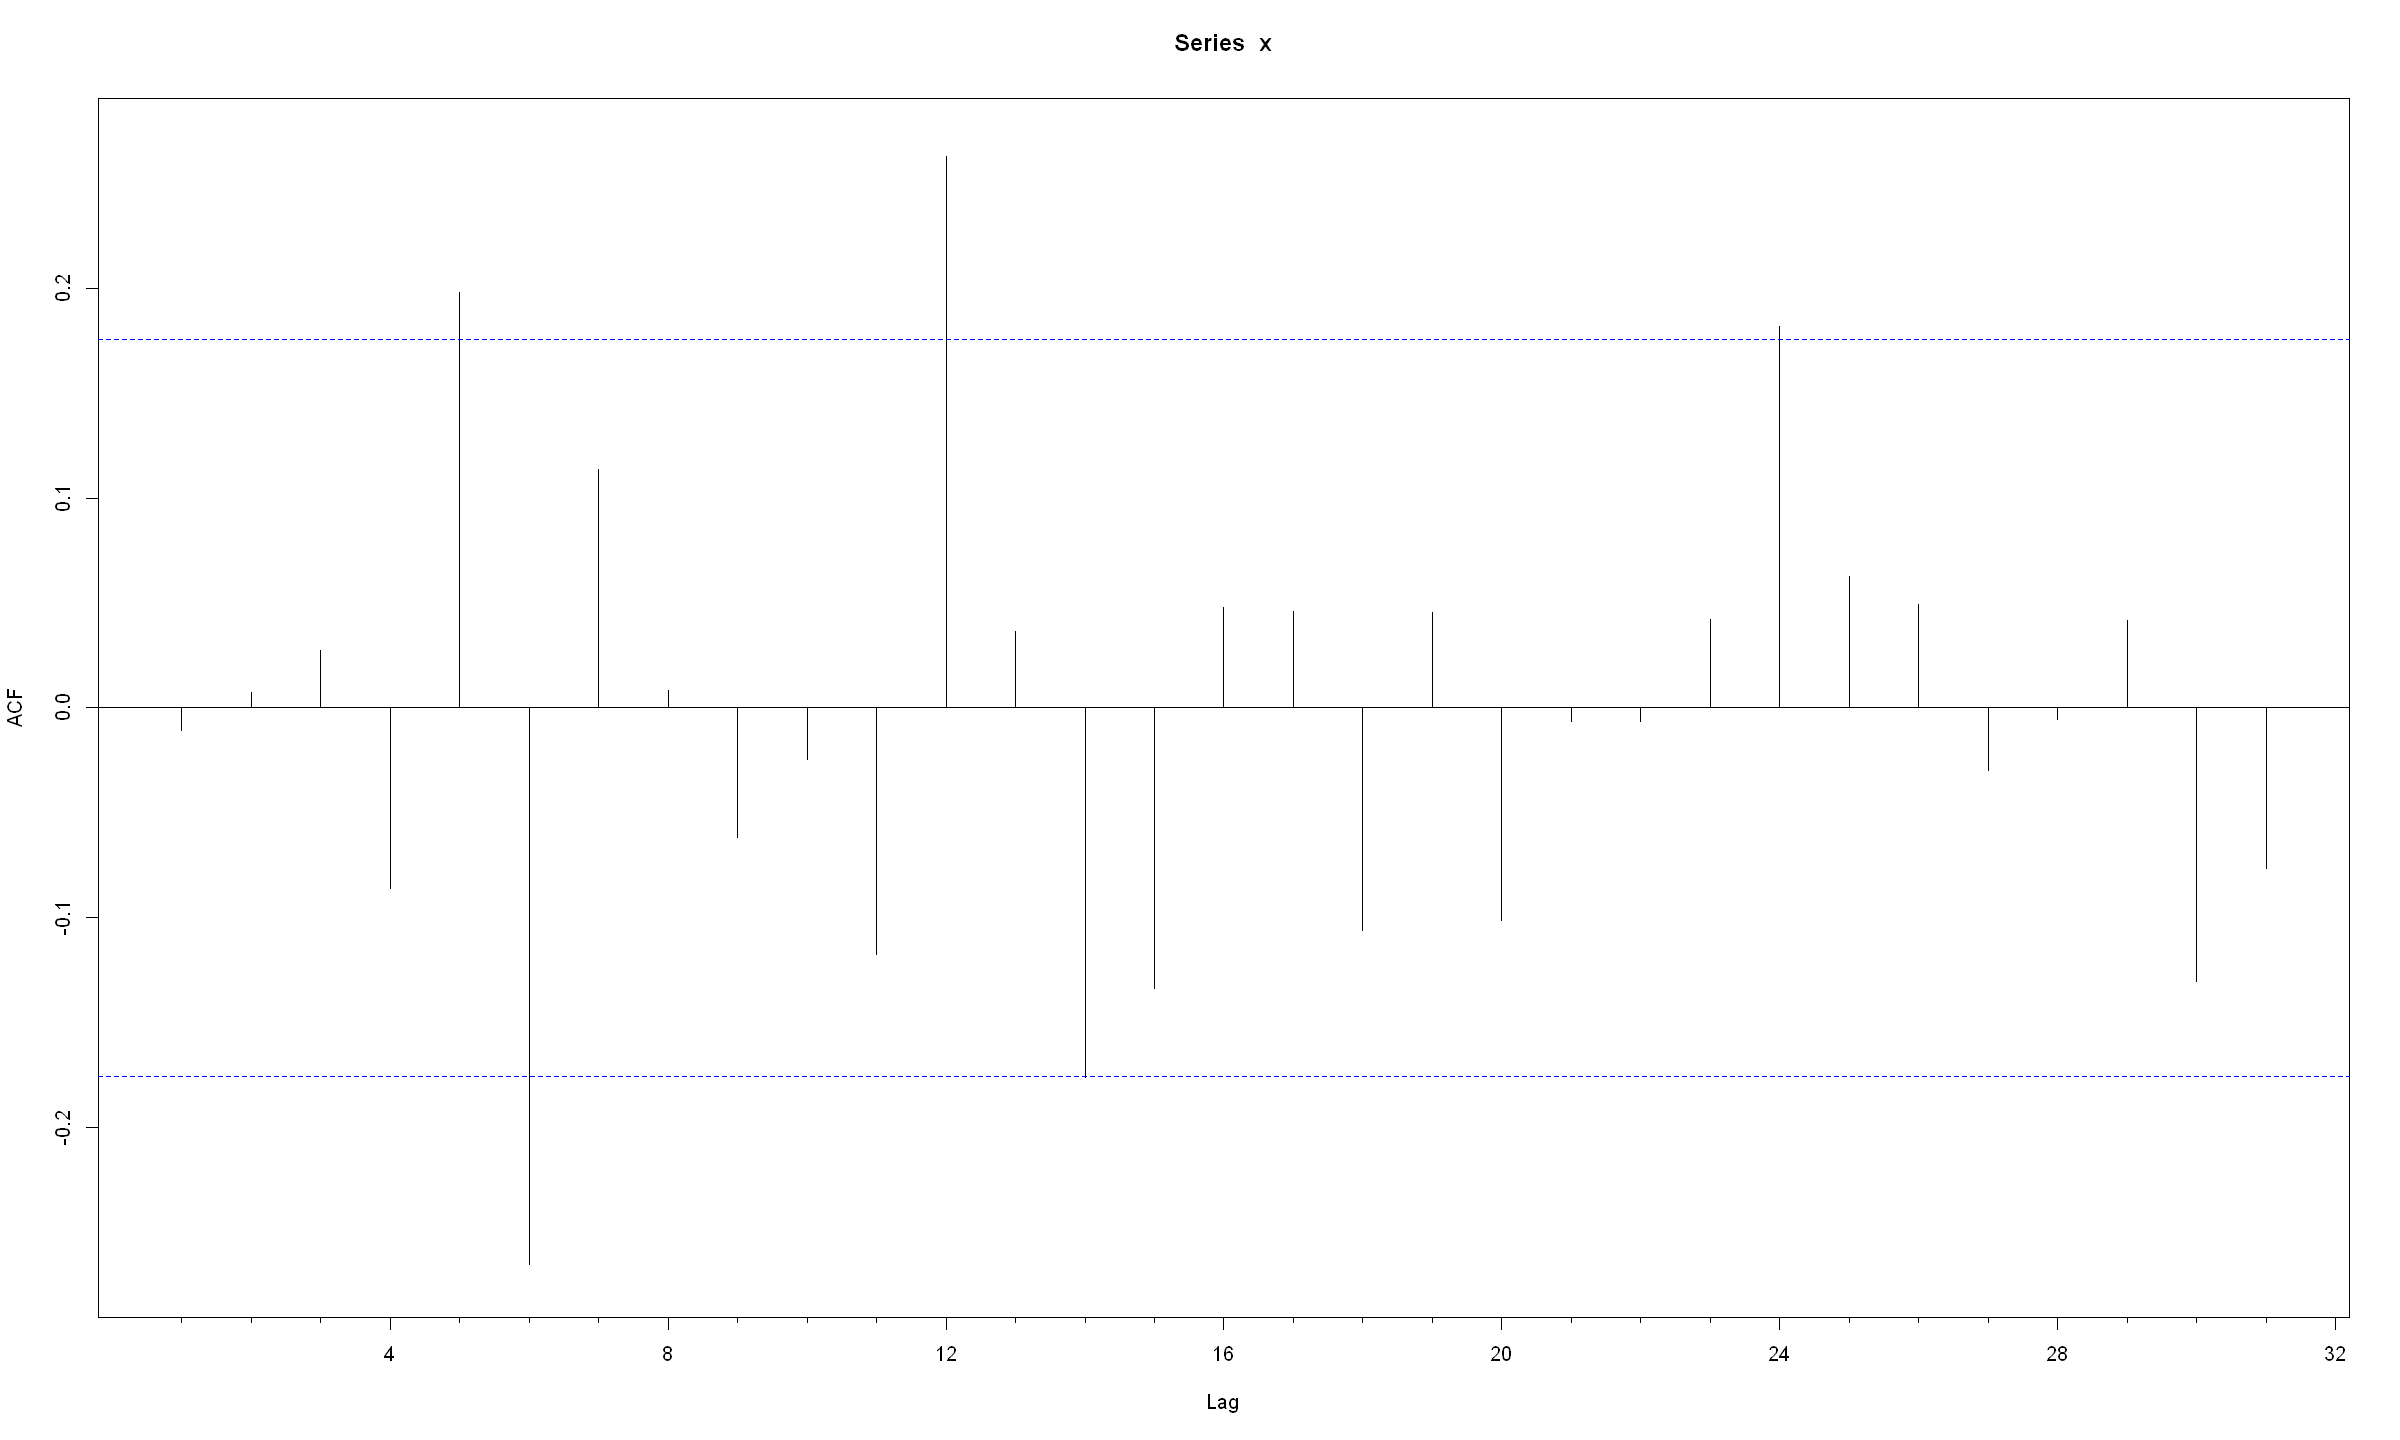

In [47]:
cat("Ljung test over Model 24:\n\n") 
#Model 24 has p=2, q=2, P=0, Q=1
np24 = 6

My.Ljung.Box2(residuals24,np24)

Despite extensive model selection and refinement, all candidate models exhibit significant residual autocorrelation according to the Ljung-Box test. This indicates that none of the models fully capture the temporal dependence present in the data, and the residuals cannot be considered independent white noise. As a result, any inference or forecasting based on these models should be interpreted with caution, as the standard errors may be underestimated and the predictive reliability may be affected. It is important to acknowledge this limitation in the analysis. The presence of significant autocorrelation in the residuals means that the results and forecasts obtained from these models should be interpreted with extra caution. While the models capture much of the underlying structure in the data, the remaining autocorrelation suggests that some temporal dependencies are not fully addressed, which may impact the accuracy and reliability of statistical inference and prediction.



#### Normality tests

Before drawing statistical inferences or making forecasts from a fitted time series model, it is important to assess whether the residuals follow a normal distribution. The assumption of normality is not strictly required for parameter estimation, but it is crucial for the validity of many inferential procedures, such as hypothesis testing and the construction of confidence intervals.

To evaluate this assumption, we apply normality tests to the residuals of each model. 
- Shapiro-Wilk Test:
This test evaluates the null hypothesis that the sample comes from a normally distributed population. The test statistic measures how well the ordered sample values conform to those expected under a normal distribution. Values of Wclose to 1 and p-values greater than 0.05 indicate no evidence against normality.

- Lilliefors Test:
The Lilliefors test is designed for situations where the mean and variance of the normal distribution are estimated from the data. It compares the empirical distribution of the residuals with a normal distribution fitted to the sample. A p-value above 0.05 suggests that the residuals are consistent with normality.

- Pearson Chi-square Test:
This test compares the observed frequencies of the residuals in predefined intervals with the frequencies expected under a normal distribution. If the p-value is greater than 0.05, there is no significant evidence to reject the hypothesis of normality.

Normality test over Model 3:



,Statistics,P-value
Shapiro-Wilxs,0.9812,0.0822
Lilliefors,0.0702,0.1401
Pearson Chi.square,13.7419,0.2476


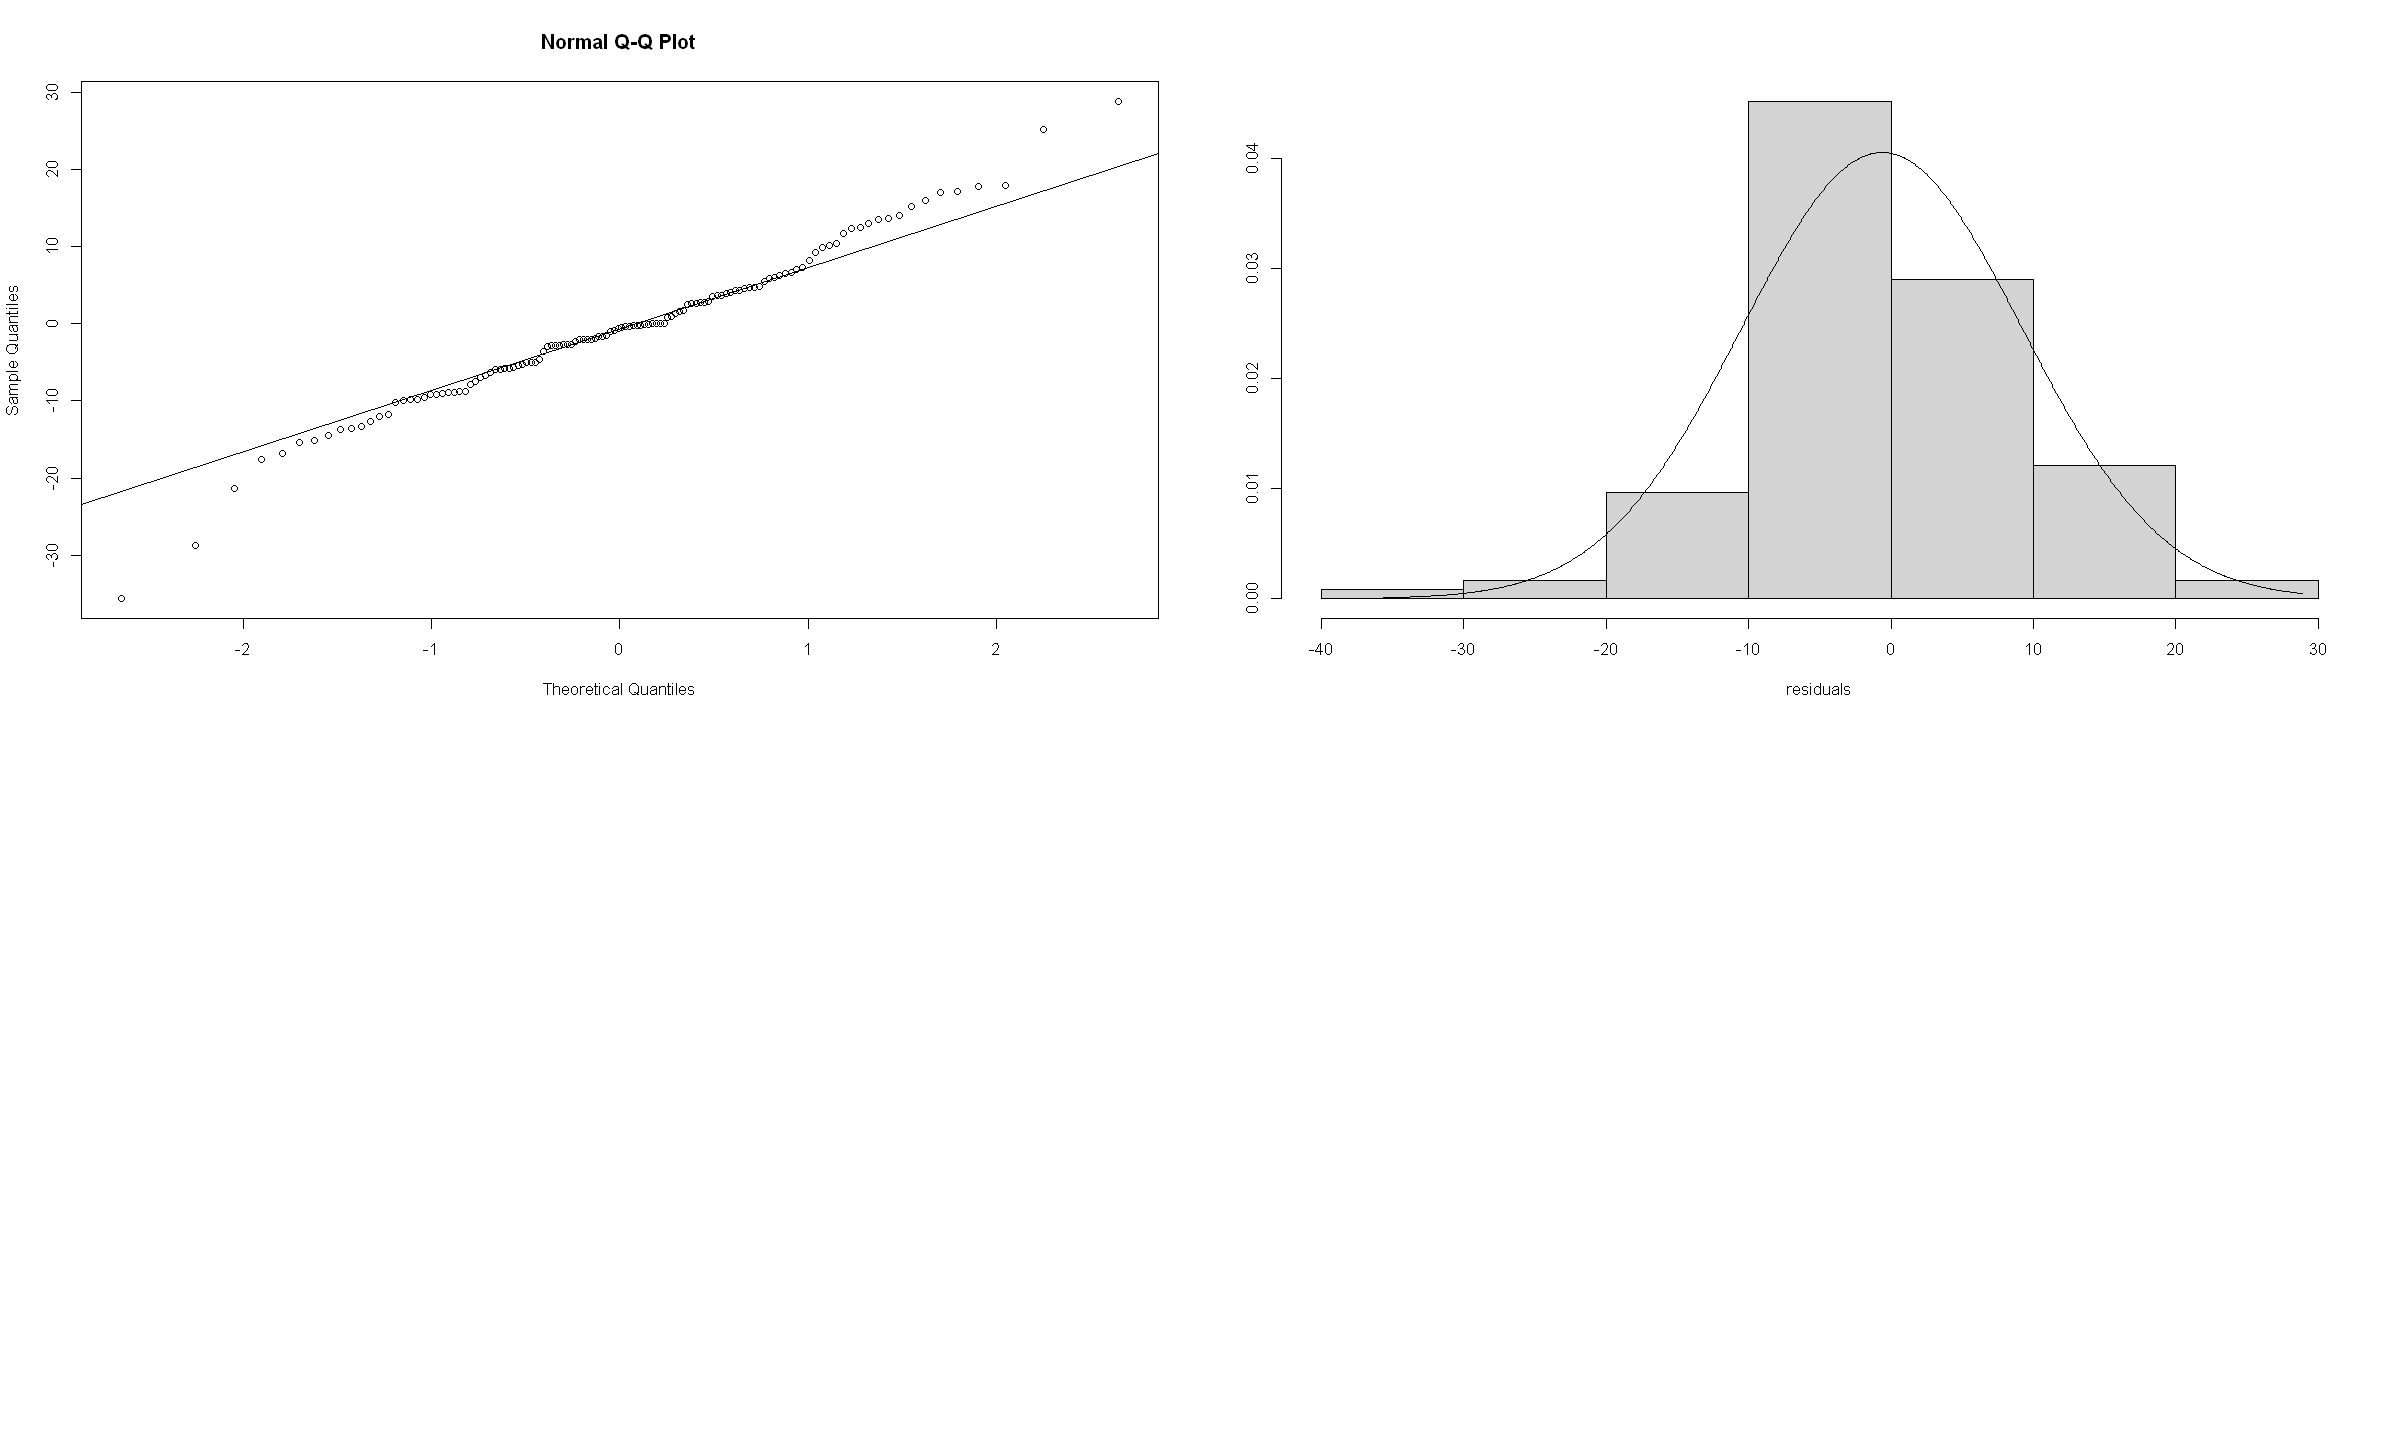

In [48]:
cat("Normality test over Model 3:\n\n") 
Check.normality(residuals3)

Normality test over Model 12:



,Statistics,P-value
Shapiro-Wilxs,0.9850,0.1858
Lilliefors,0.0770,0.0684
Pearson Chi.square,16.9032,0.1108


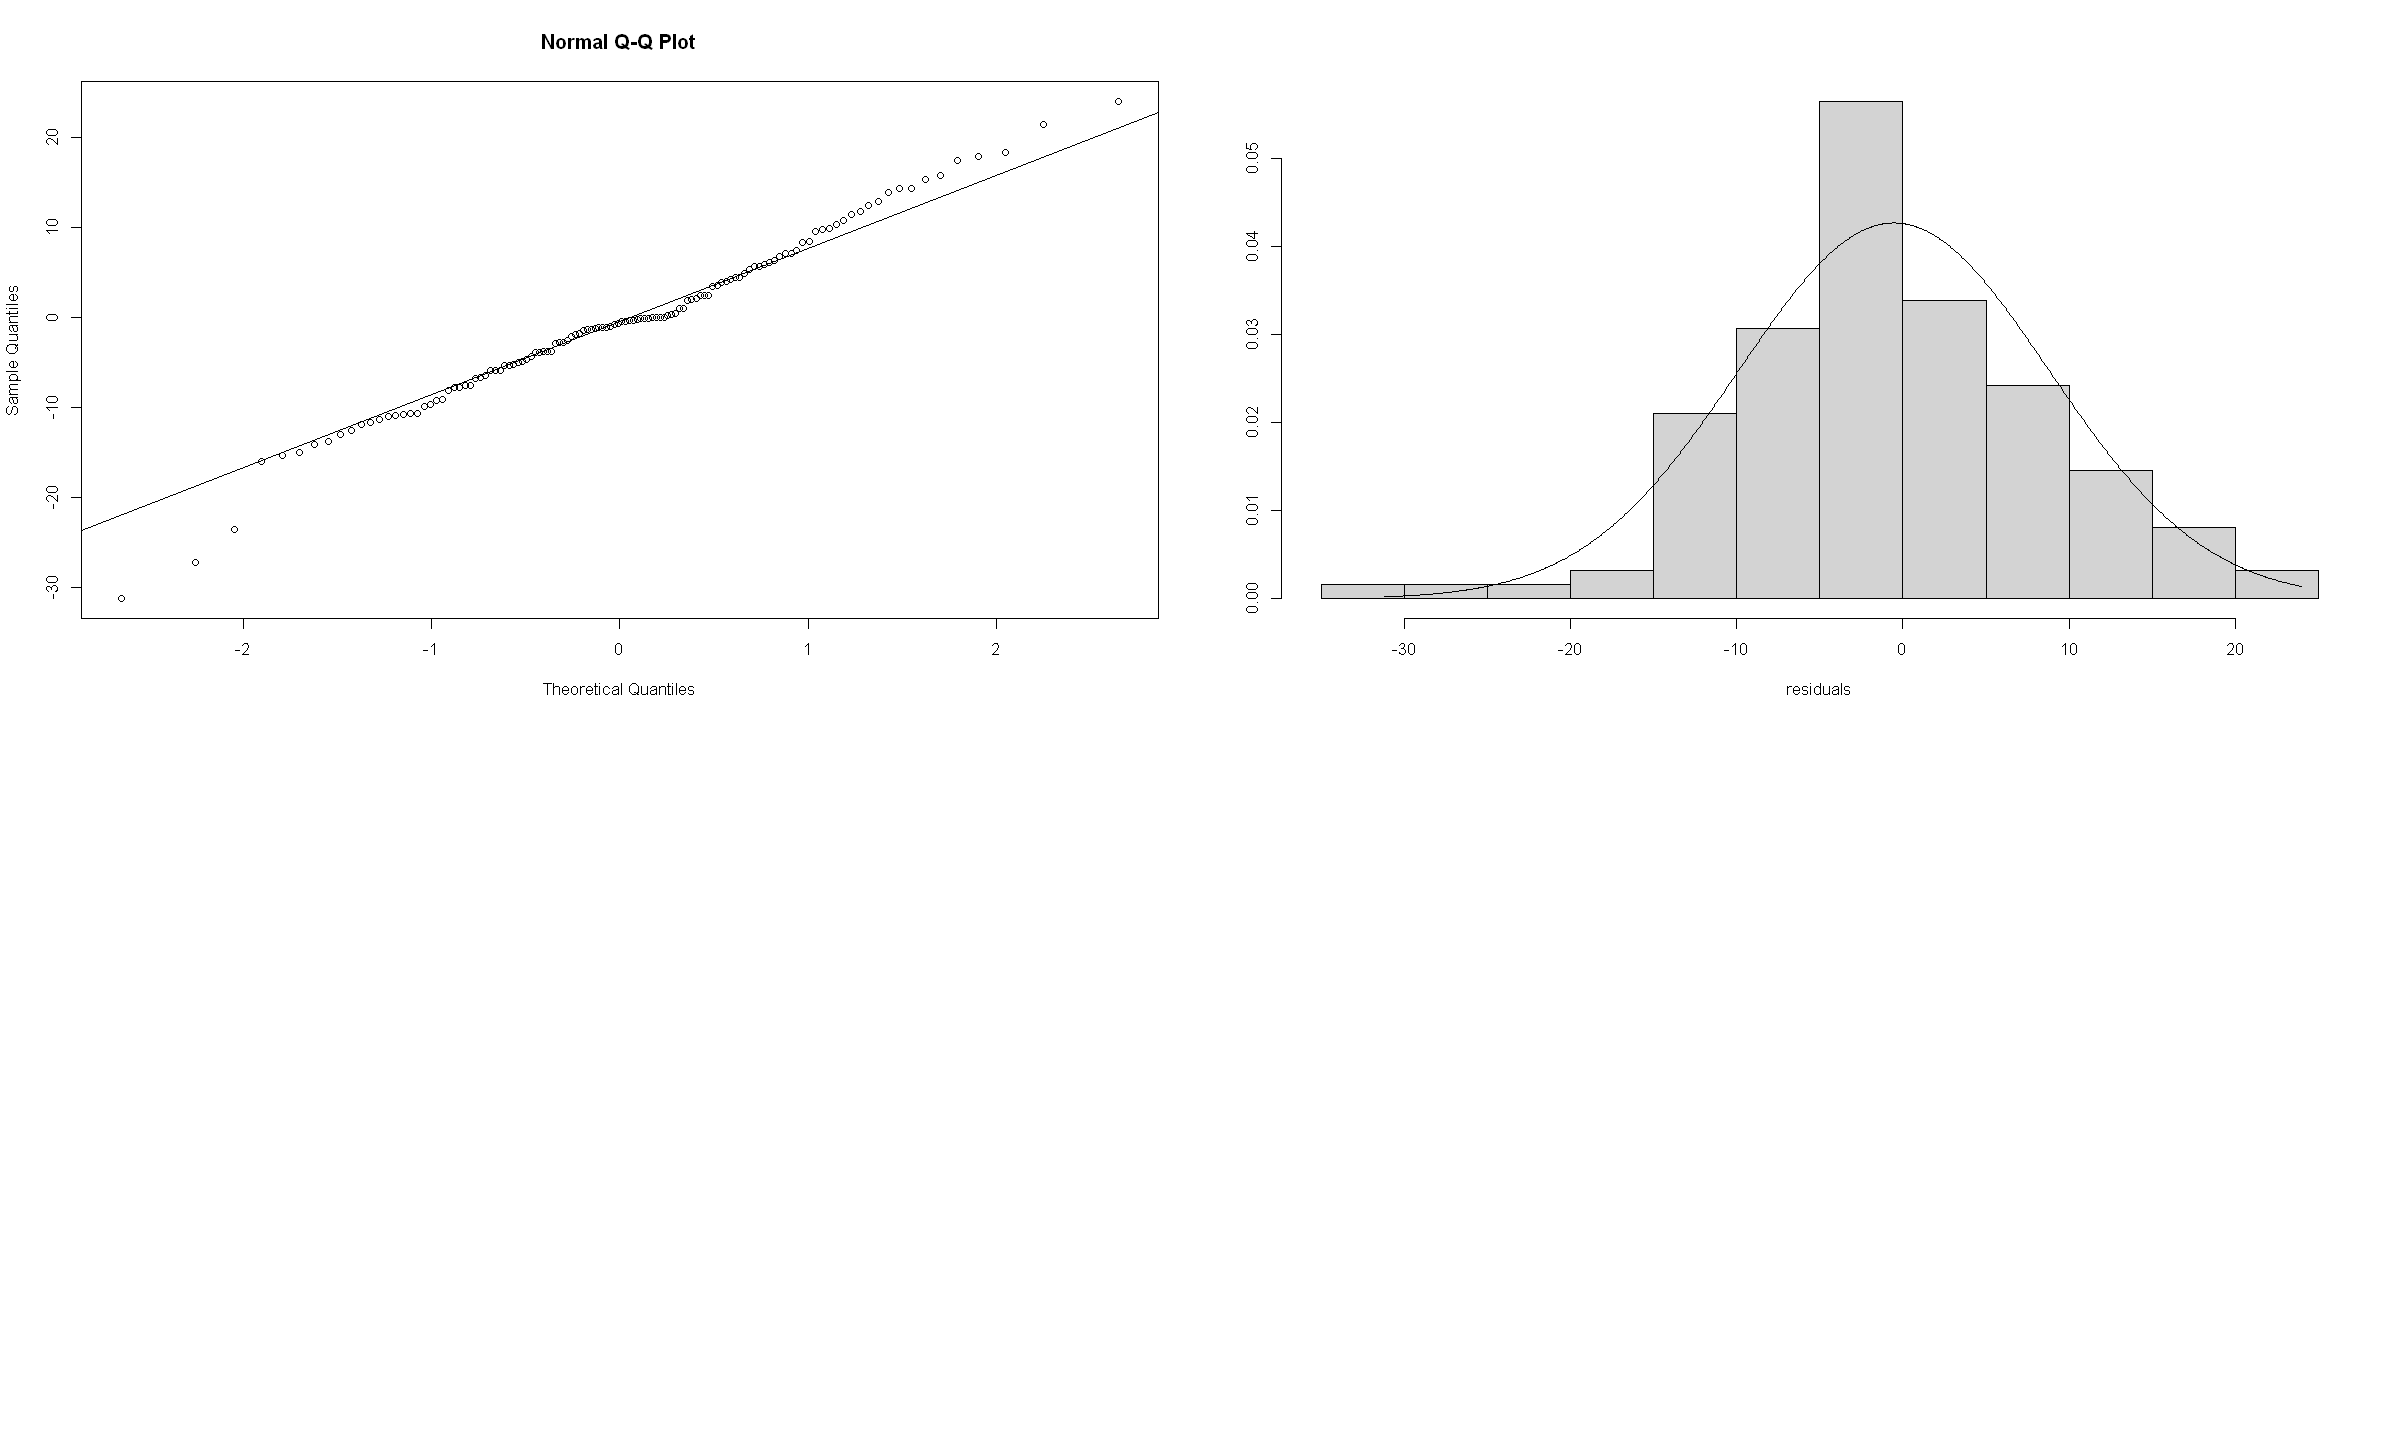

In [49]:
cat("Normality test over Model 12:\n\n") 
Check.normality(residuals12)

Normality test over Model 15:



,Statistics,P-value
Shapiro-Wilxs,0.9831,0.1241
Lilliefors,0.0710,0.1305
Pearson Chi.square,14.1935,0.2225


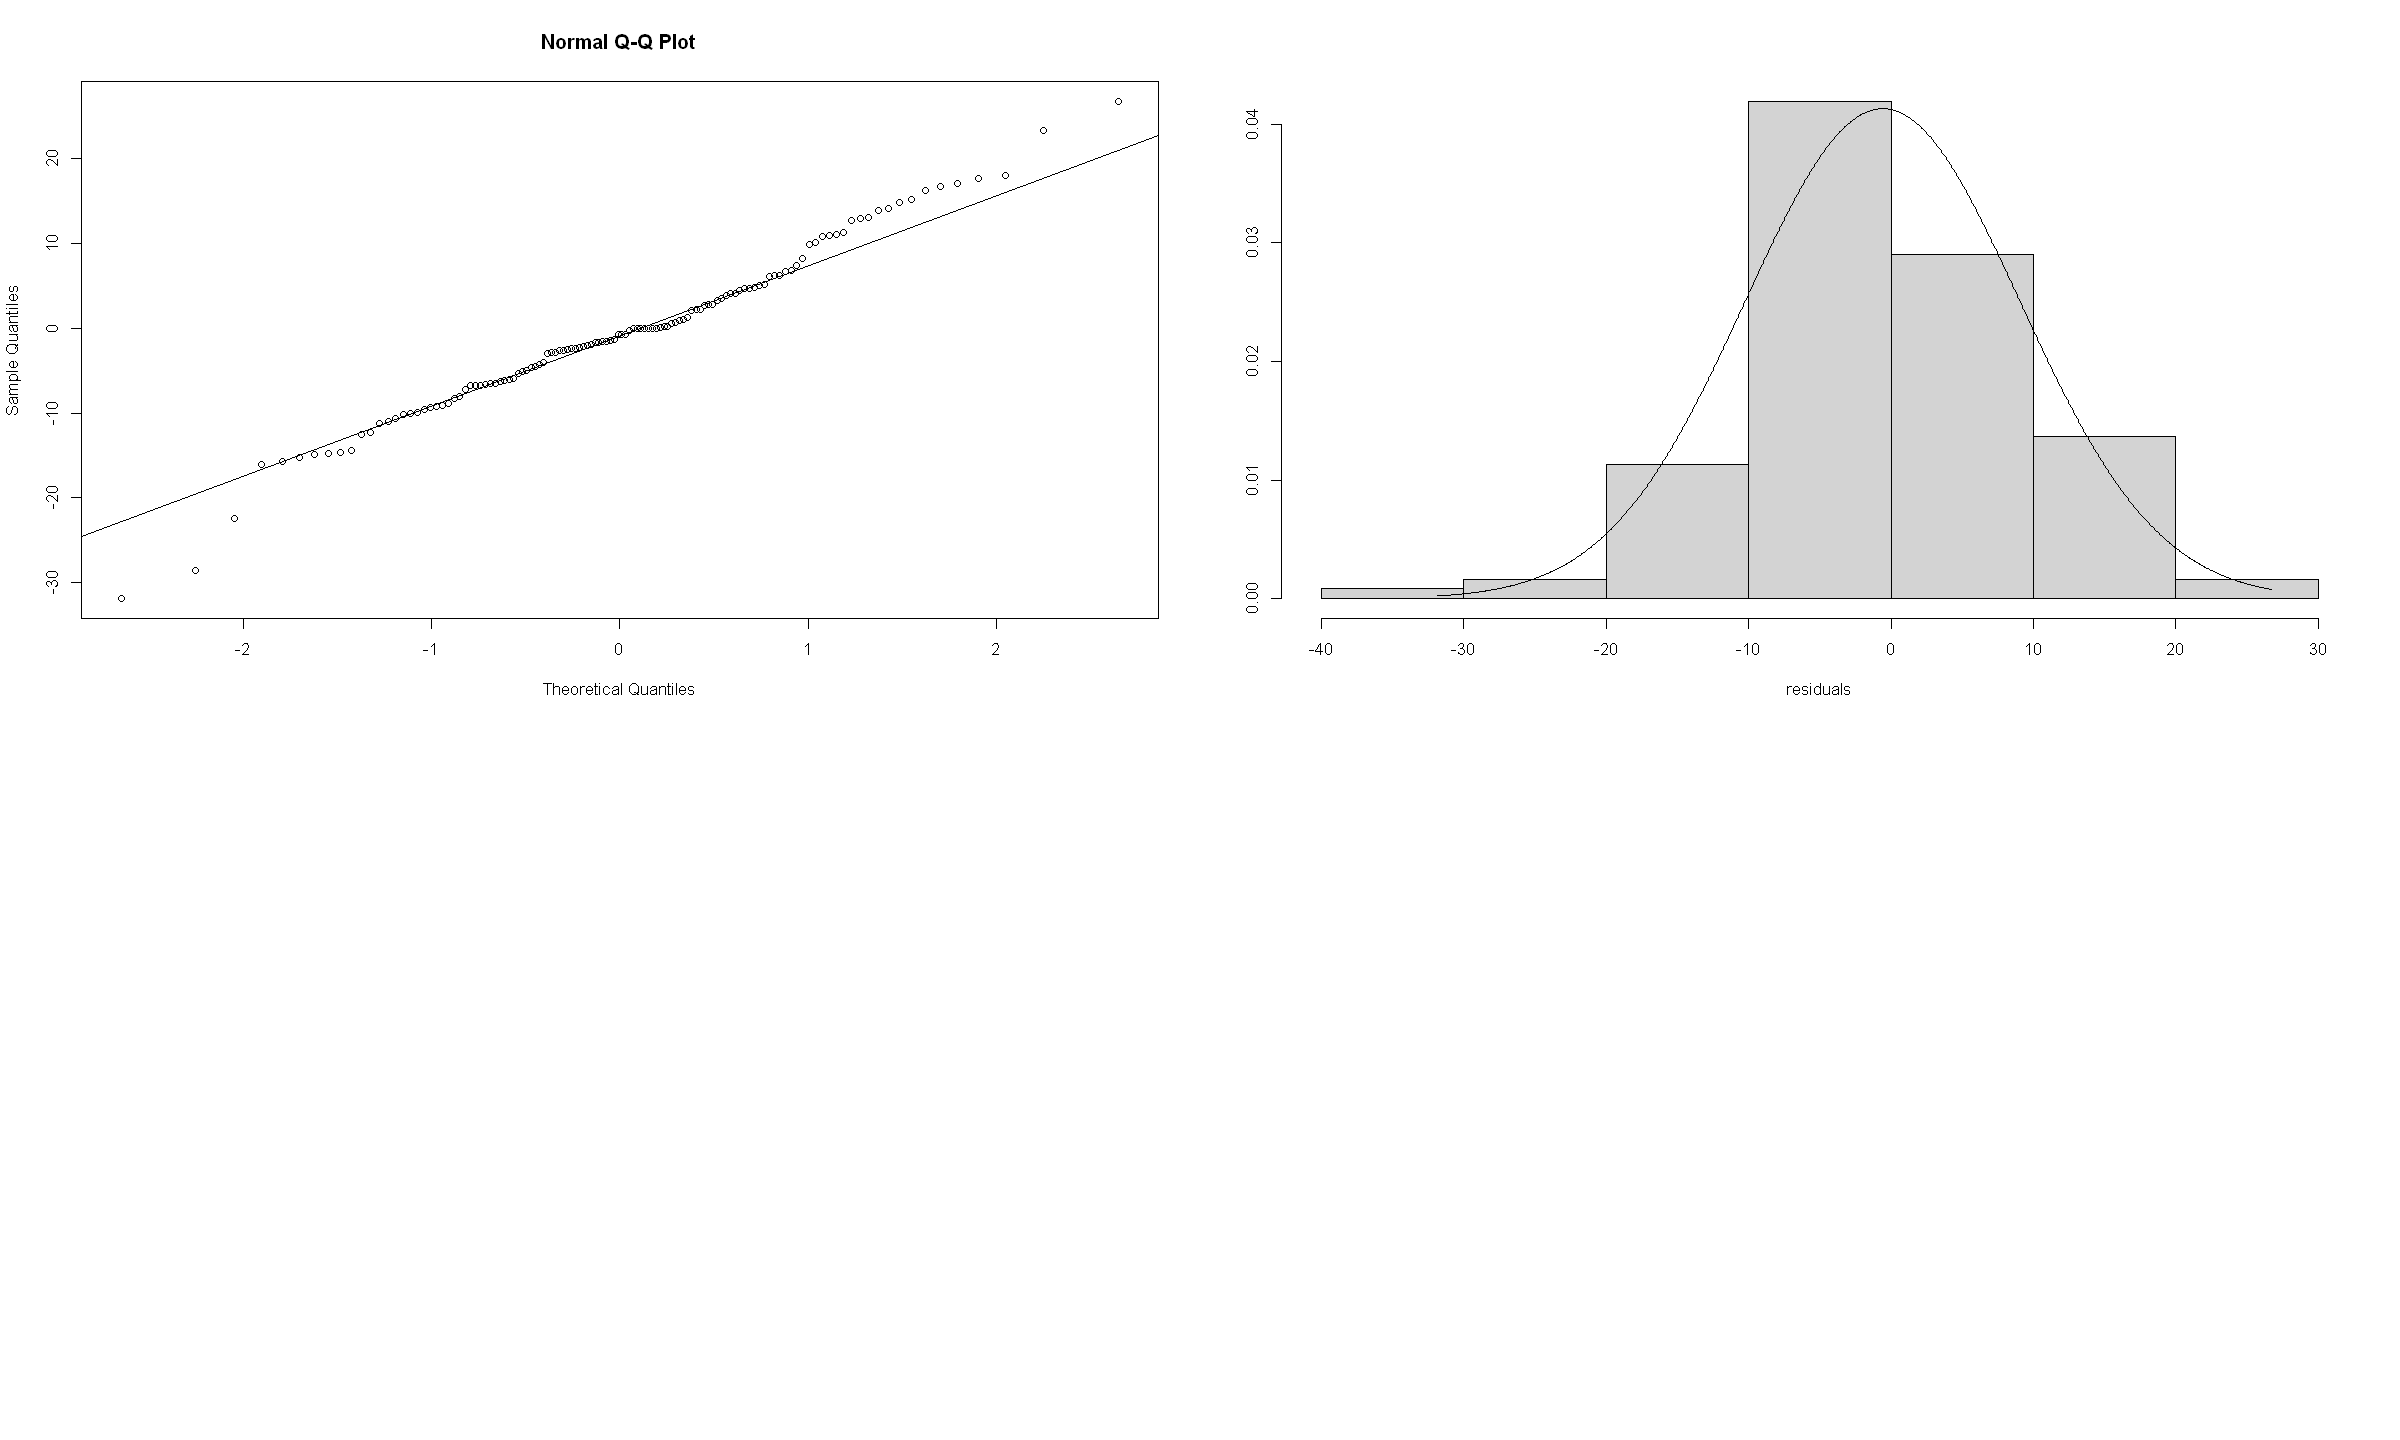

In [50]:
cat("Normality test over Model 15:\n\n") 
Check.normality(residuals15)

Normality test over Model 24:



,Statistics,P-value
Shapiro-Wilxs,0.9730,0.0138
Lilliefors,0.0642,0.2398
Pearson Chi.square,15.0968,0.1781


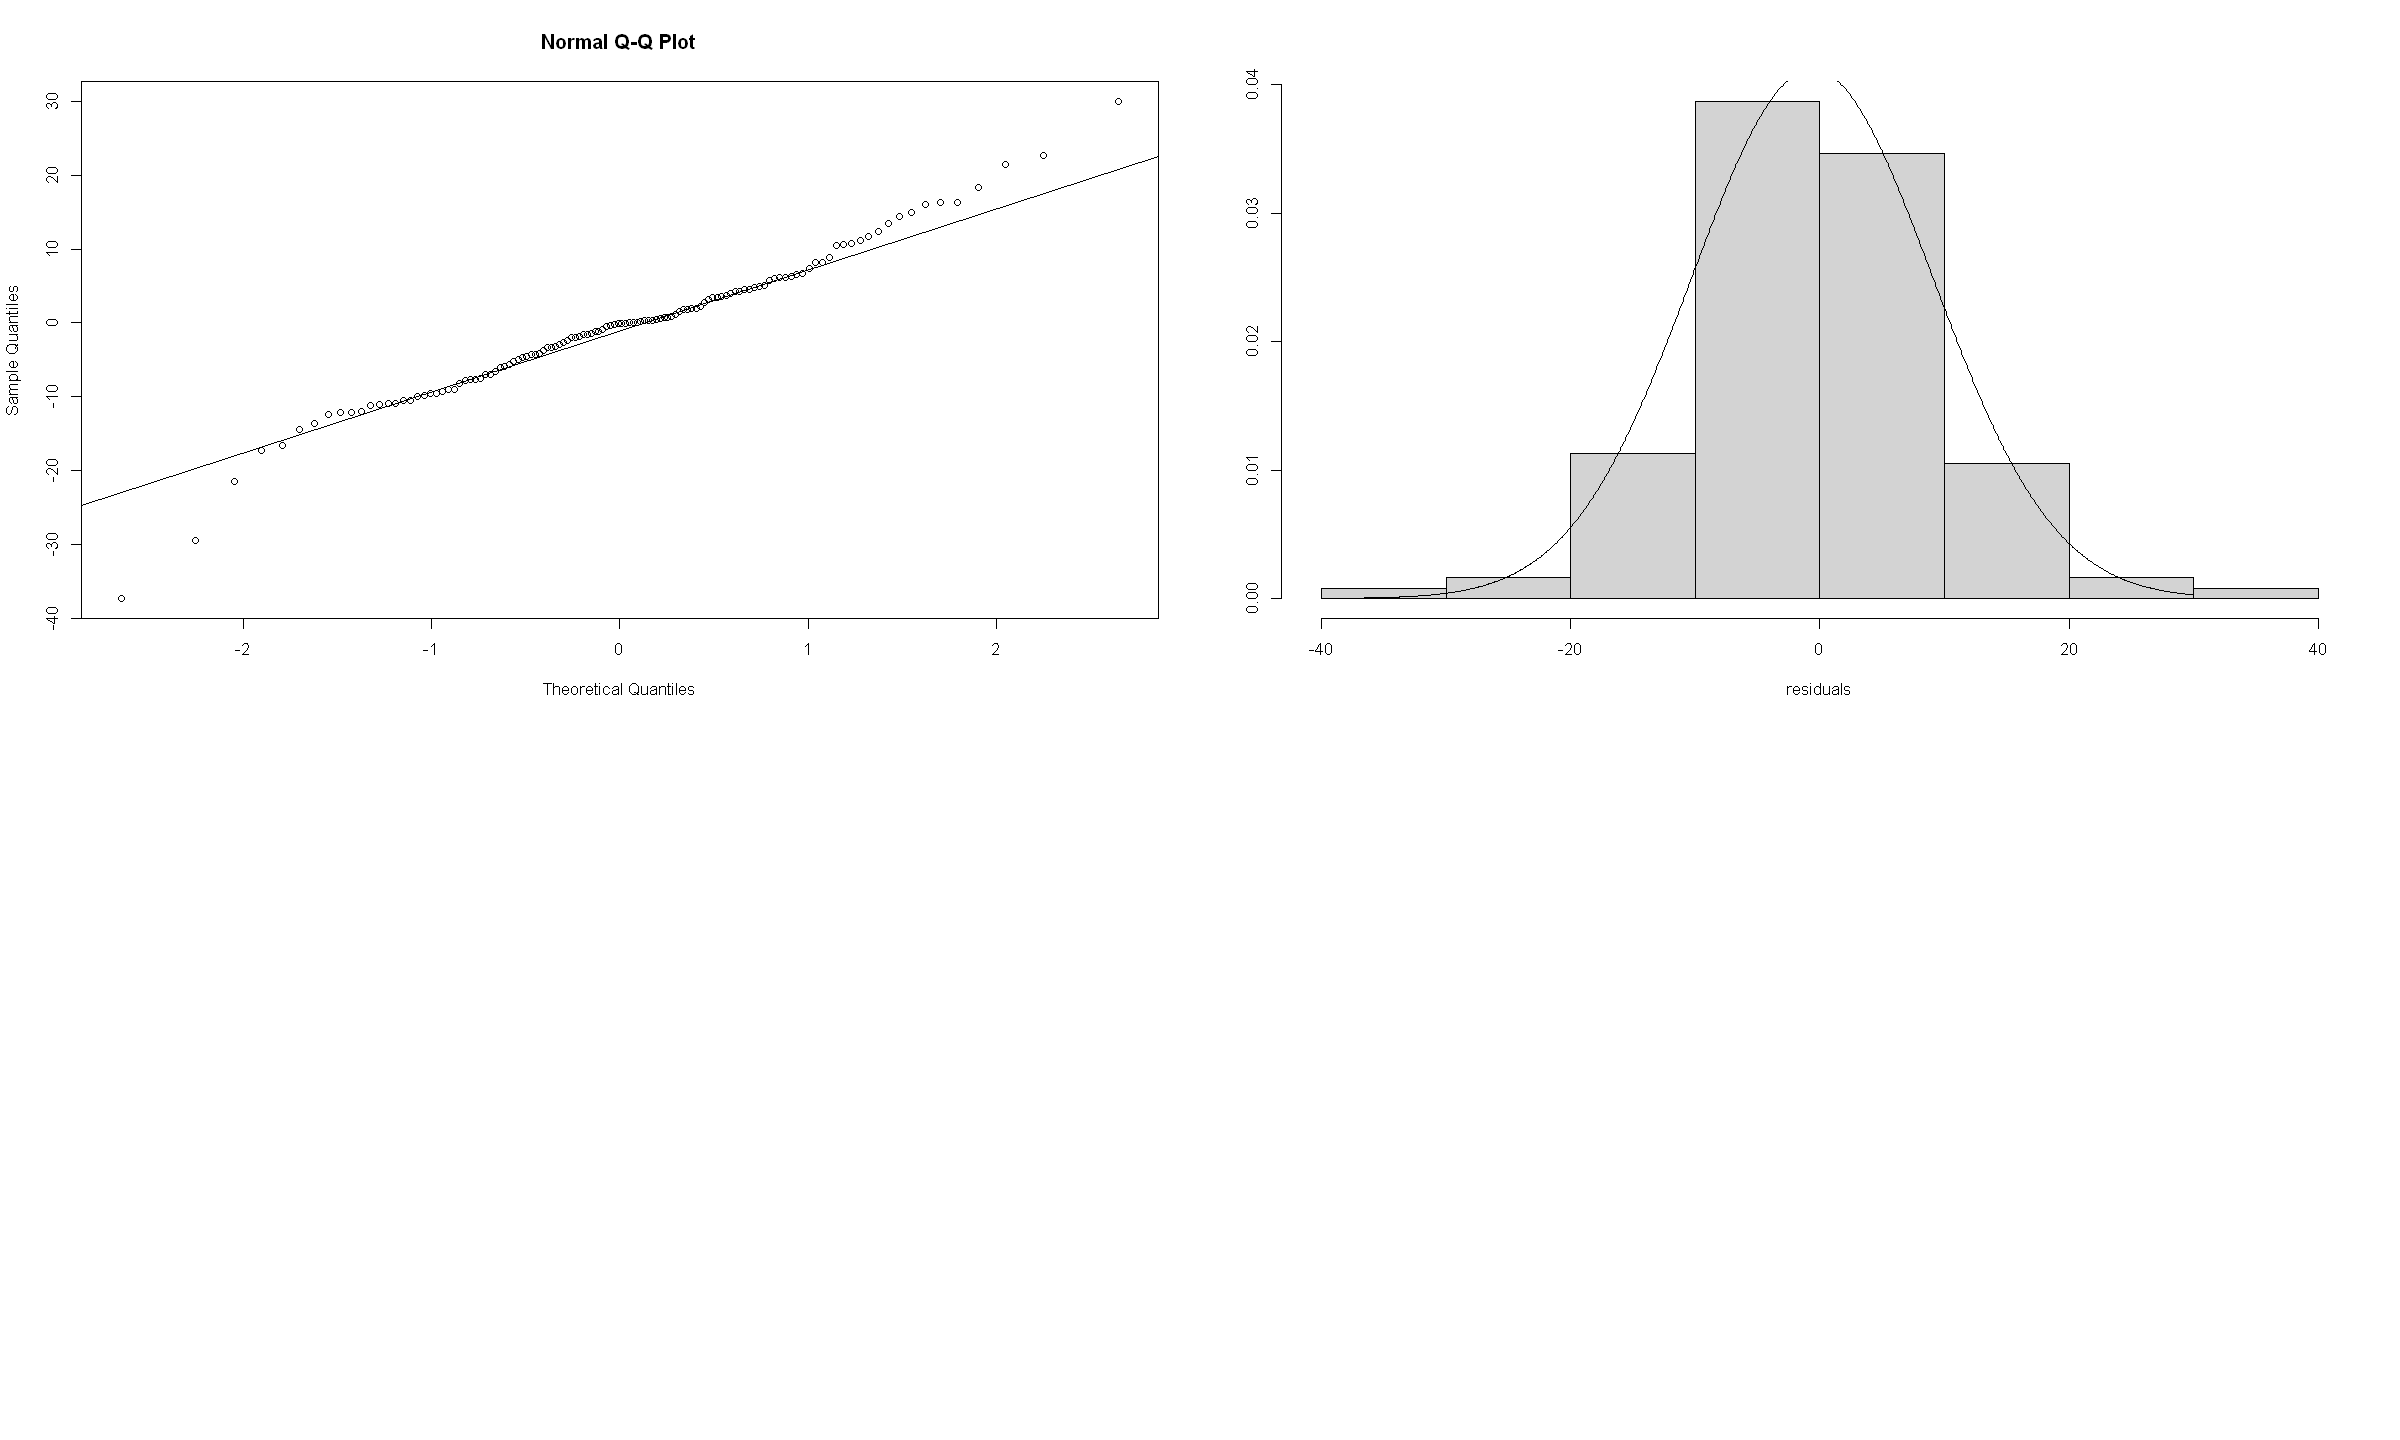

In [51]:
cat("Normality test over Model 24:\n\n") 
Check.normality(residuals24)

##### Observations about the normality tests:
For Models 3, 12, and 15, all tests yield p-values above the conventional 0.05 threshold, so we fail to reject the null hypothesis of normality. In the case of Model 24, the Shapiro-Wilk test returns a p-value below 0.05, suggesting a possible deviation from normality, while the Lilliefors and Pearson Chi-square tests do not reject normality.

However, according to standard guidelines, for sample sizes greater than 30, the Lilliefors test (a modification of the Kolmogorov-Smirnov test) is preferred over the Shapiro-Wilk test for assessing normality. Since our sample size exceeds 30 and the Lilliefors test does not reject normality for Model 24, we do not exclude this model based solely on the Shapiro-Wilk result.

Therefore, all four models (3, 12, 15, and 24) are retained as valid candidates according to the normality diagnostics, in line with the recommended criteria for large samples.

---
To check if the residuals from each model are centered at zero, we calculate the p-value for the null hypothesis that their mean is zero. If the p-value is greater than 0.05, we do not reject the null hypothesis and conclude that the mean of the residuals is not significantly different from zero. Conversely, if the p-value is less than or equal to 0.05, we reject the null hypothesis, indicating that the residuals have a mean significantly different from zero

In [52]:
cat("p-value of Model 3:") 
n.res3=length(residuals3)
t.obs3=mean(residuals3)/ (var(residuals3)/(n.res3-1))  
p.value3=round(1-pnorm(t.obs3), 6)
p.value3
cat("\n") 

cat("p-value of Model 12:") 
n.res12=length(residuals12)
t.obs12=mean(residuals12)/ (var(residuals12)/(n.res12-1))  
p.value12=round(1-pnorm(t.obs12), 6)
p.value12
cat("\n") 

cat("p-value of Model 15:") 
n.res15=length(residuals15)
t.obs15=mean(residuals15)/ (var(residuals15)/(n.res15-1))  
p.value15=round(1-pnorm(t.obs15), 6)
p.value15
cat("\n") 

cat("p-value of Model 24:") 
n.res24=length(residuals24)
t.obs24=mean(residuals24)/ (var(residuals24)/(n.res24-1))  
p.value24=round(1-pnorm(t.obs24), 6)
p.value24


p-value of Model 3:

[1] 0.787719


p-value of Model 12:

[1] 0.775841


p-value of Model 15:

[1] 0.780044


p-value of Model 24:

[1] 0.784202

The calculated p-values for the mean of the residuals in Models 3, 12, 15, and 24 are all substantially greater than 0.05 (ranging from approximately 0.77 to 0.79). This indicates that, for each model, we do not reject the null hypothesis that the mean of the residuals is zero. In other words, there is no statistical evidence to suggest that the residuals are systematically biased or centered away from zero. This result is consistent with the expectation for well-specified time series models, further supporting the adequacy of these models in terms of unbiasedness of the residuals.

---

&#8202;
After a comprehensive process of model selection and diagnostic checking, **Model 3** emerges as the most suitable choice for model fitting and forecasting. This decision is based on several key considerations:

- *Model selection criteria*: Model 3 consistently achieves the lowest (or near-lowest) values for information criteria such as BIC, AIC, and AICc, indicating an optimal balance between goodness of fit and model simplicity. This is crucial to avoid overfitting and ensure that the model generalizes well to new data.

- *Predictive performance*: Model 3 demonstrates the best predictive accuracy, with the lowest MSE and highly competitive MAE in both cross-validation samples. This suggests that its forecasts are likely to be more reliable and robust compared to alternative models.

- *Residual diagnostics*: The residuals of Model 3 pass all key diagnostic checks for normality, unbiasedness, and randomness according to both parametric and nonparametric tests. Although none of the candidate models fully satisfy the white noise assumption in the Ljung-Box test, Model 3 shows no evidence of systematic bias or non-randomness in its residuals, which is essential for valid inference and prediction.

- *Interpretability and simplicity*: A simpler model helps us better explain how the data changes over time and avoids unnecessary complexity that could make interpretation or forecasting more difficult.

- *Theoretical and practical alignment*: This approach aligns with the fundamental goals of time series analysis: to accurately describe the observed evolution of the series, provide reliable forecasts, and support empirical validation of theoretical assumptions.

In summary, **Model 3** is chosen because it offers the best overall balance between statistical fit, predictive performance, interpretability, and diagnostic adequacy. This selection is supported by a systematic and transparent evaluation process, ensuring that the model is both theoretically justified and practically effective for inference and forecasting in this context.

---

## Model fit and prediction

First, lets fit the model to the original data:

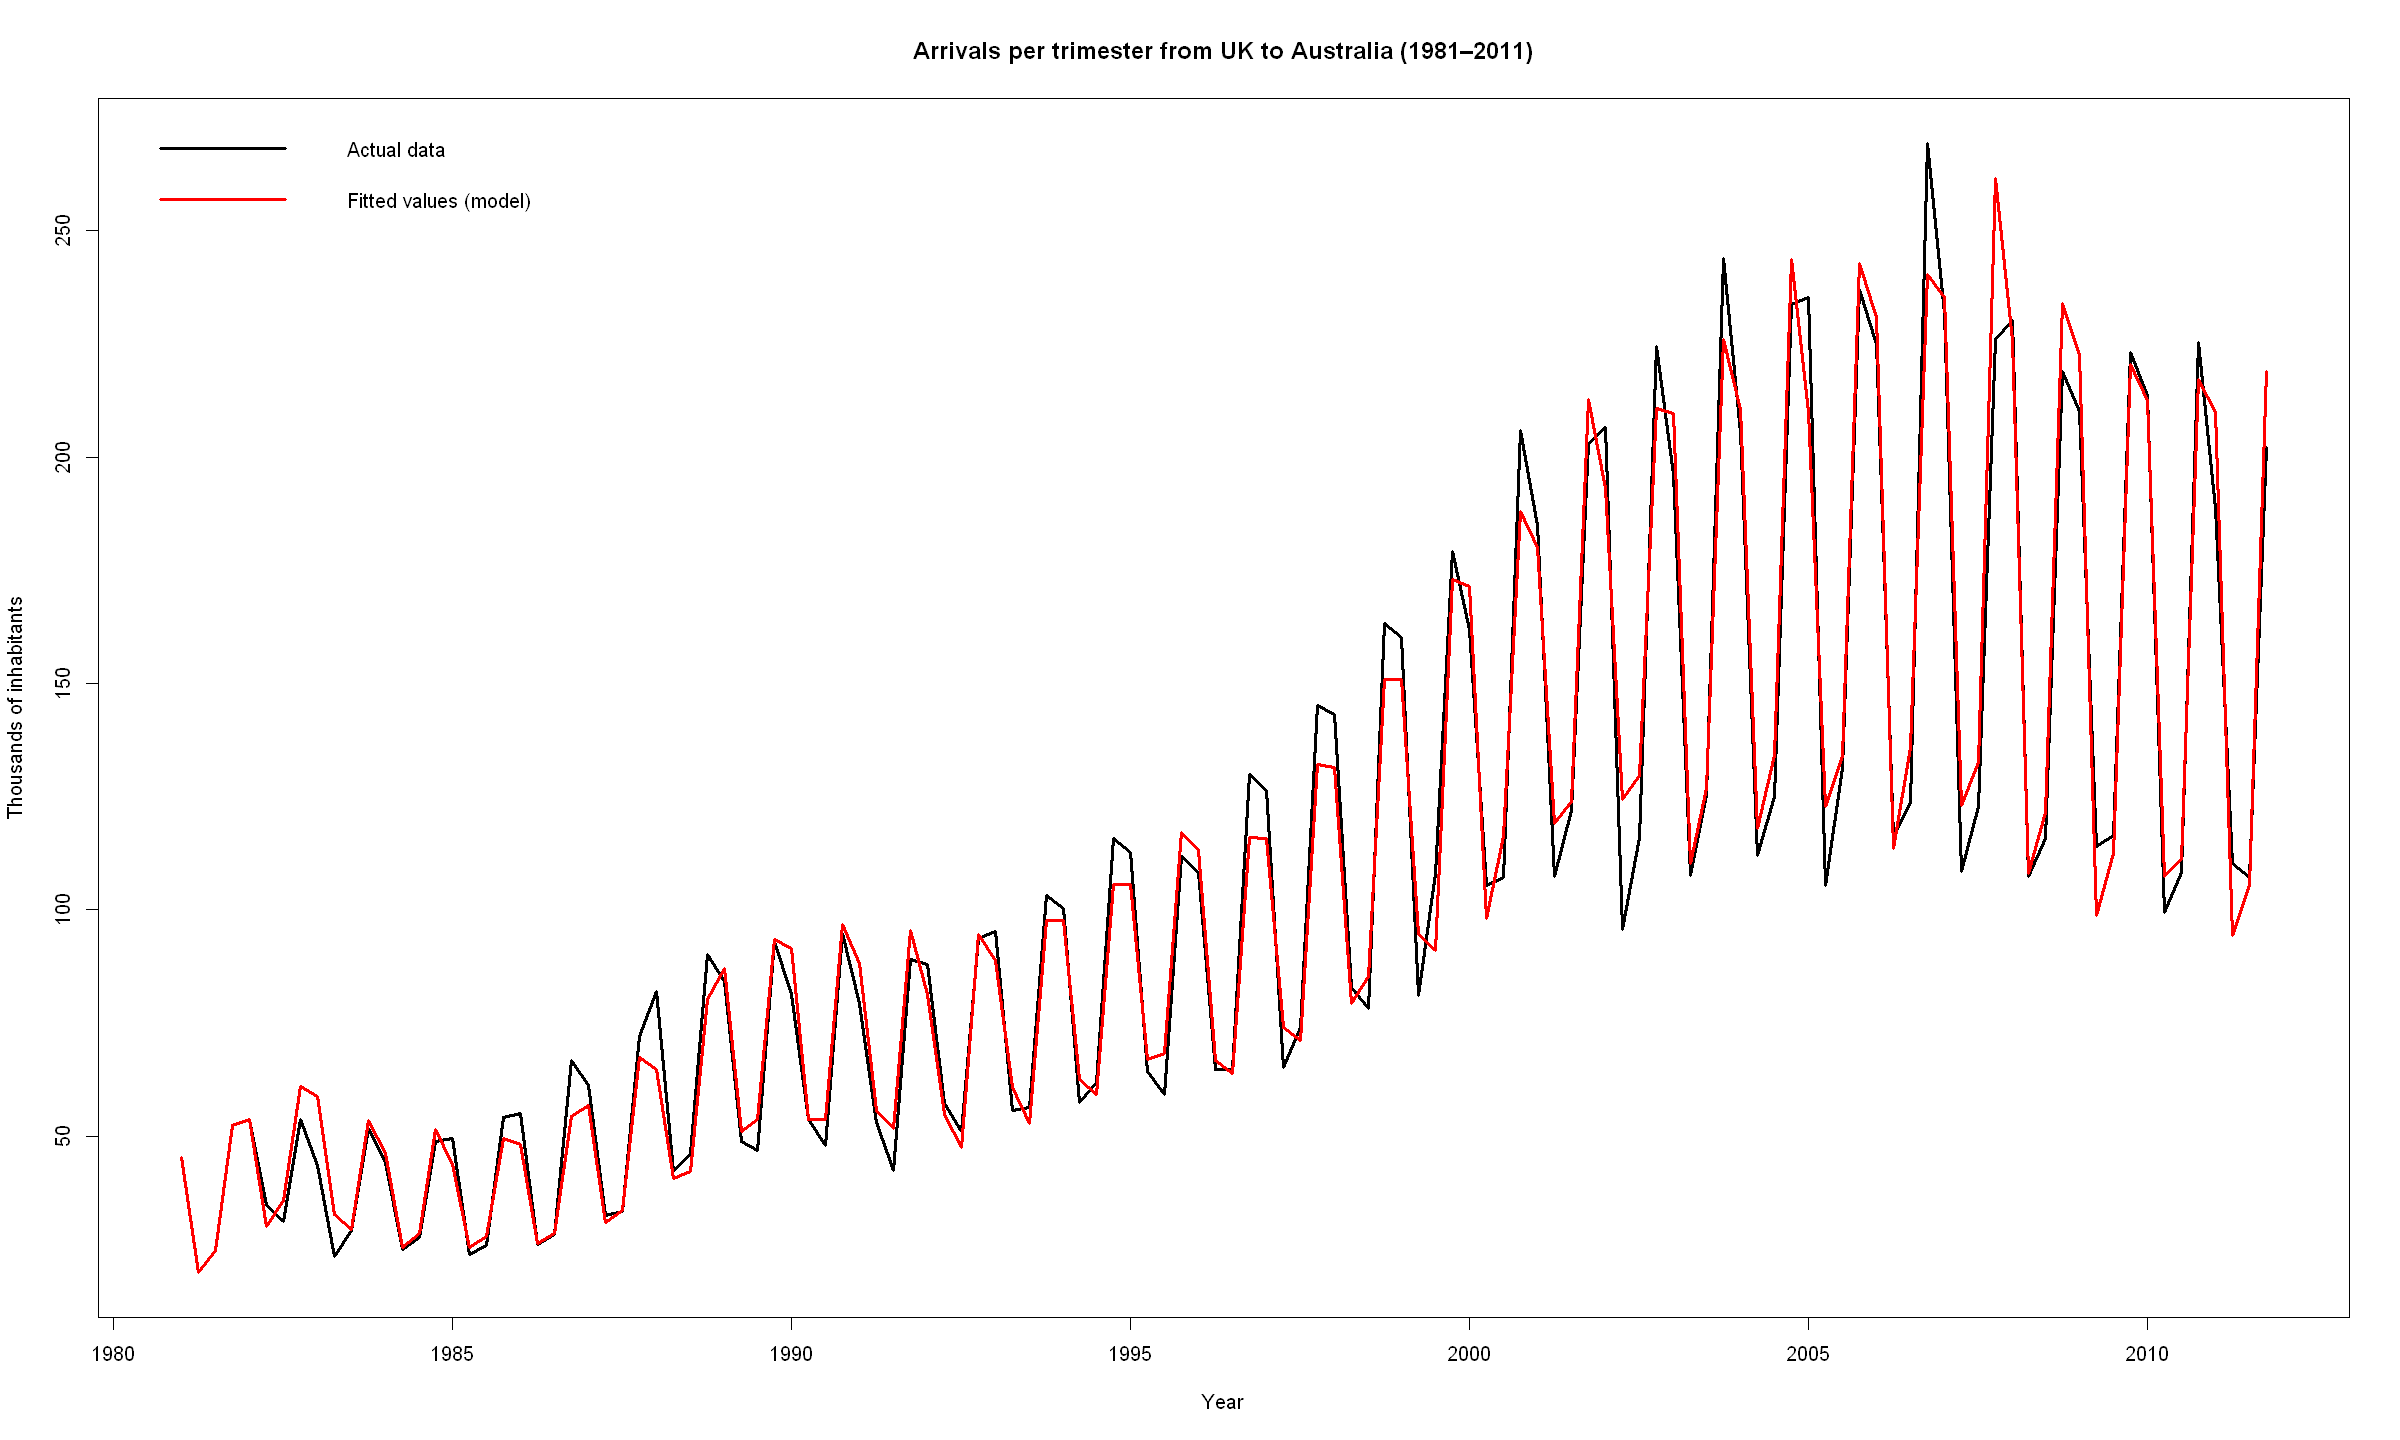

In [53]:
# Suponiendo que arrivals_ts es tu vector de datos
arrivals_ts2 <- ts(arrivals_ts, start = c(1981, 1), frequency = 4)

# Fitted values del modelo, suponiendo que forecast(mod3)$fitted es del mismo largo
fitted_vals2 <- ts(forecast(mod3)$fitted, start = c(1981, 1), frequency = 4)

plot(arrivals_ts2, ylab="Thousands of inhabitants", xlab="Year",
     main="Arrivals per trimester from UK to Australia (1981–2011)", lwd=3)
lines(fitted_vals2, col="red", lwd=3)
legend("topleft", legend=c("Actual data", "Fitted values (model)"),
       col=c("black", "red"), lwd=3, lty=1, bty="n")


The plot compares the actual number of arrivals per trimester (in black) with the fitted values from Model 3 (in red) over the period 1981–2011. The fitted values closely follow the observed data, capturing both the overall trend and the strong seasonal fluctuations present in the series. This visual agreement suggests that Model 3 provides a good fit to the data, accurately reflecting the main temporal patterns and seasonal dynamics of arrivals from the UK to Australia. Minor deviations between the fitted and actual values are expected, but overall the model successfully replicates the structure of the observed series.

---

To evaluate the out-of-sample predictive performance of Model 3, we fit the model using all but the last 12 observations of the time series. We then generate 12-step-ahead forecasts and compare these predictions to the actual observed values. This approach allows us to assess how well the model anticipates future data points and to visualize the uncertainty associated with the forecasts through 95% confidence intervals. For clarity, the x-axis is labeled with years corresponding to each quarter, making the temporal interpretation straightforward.

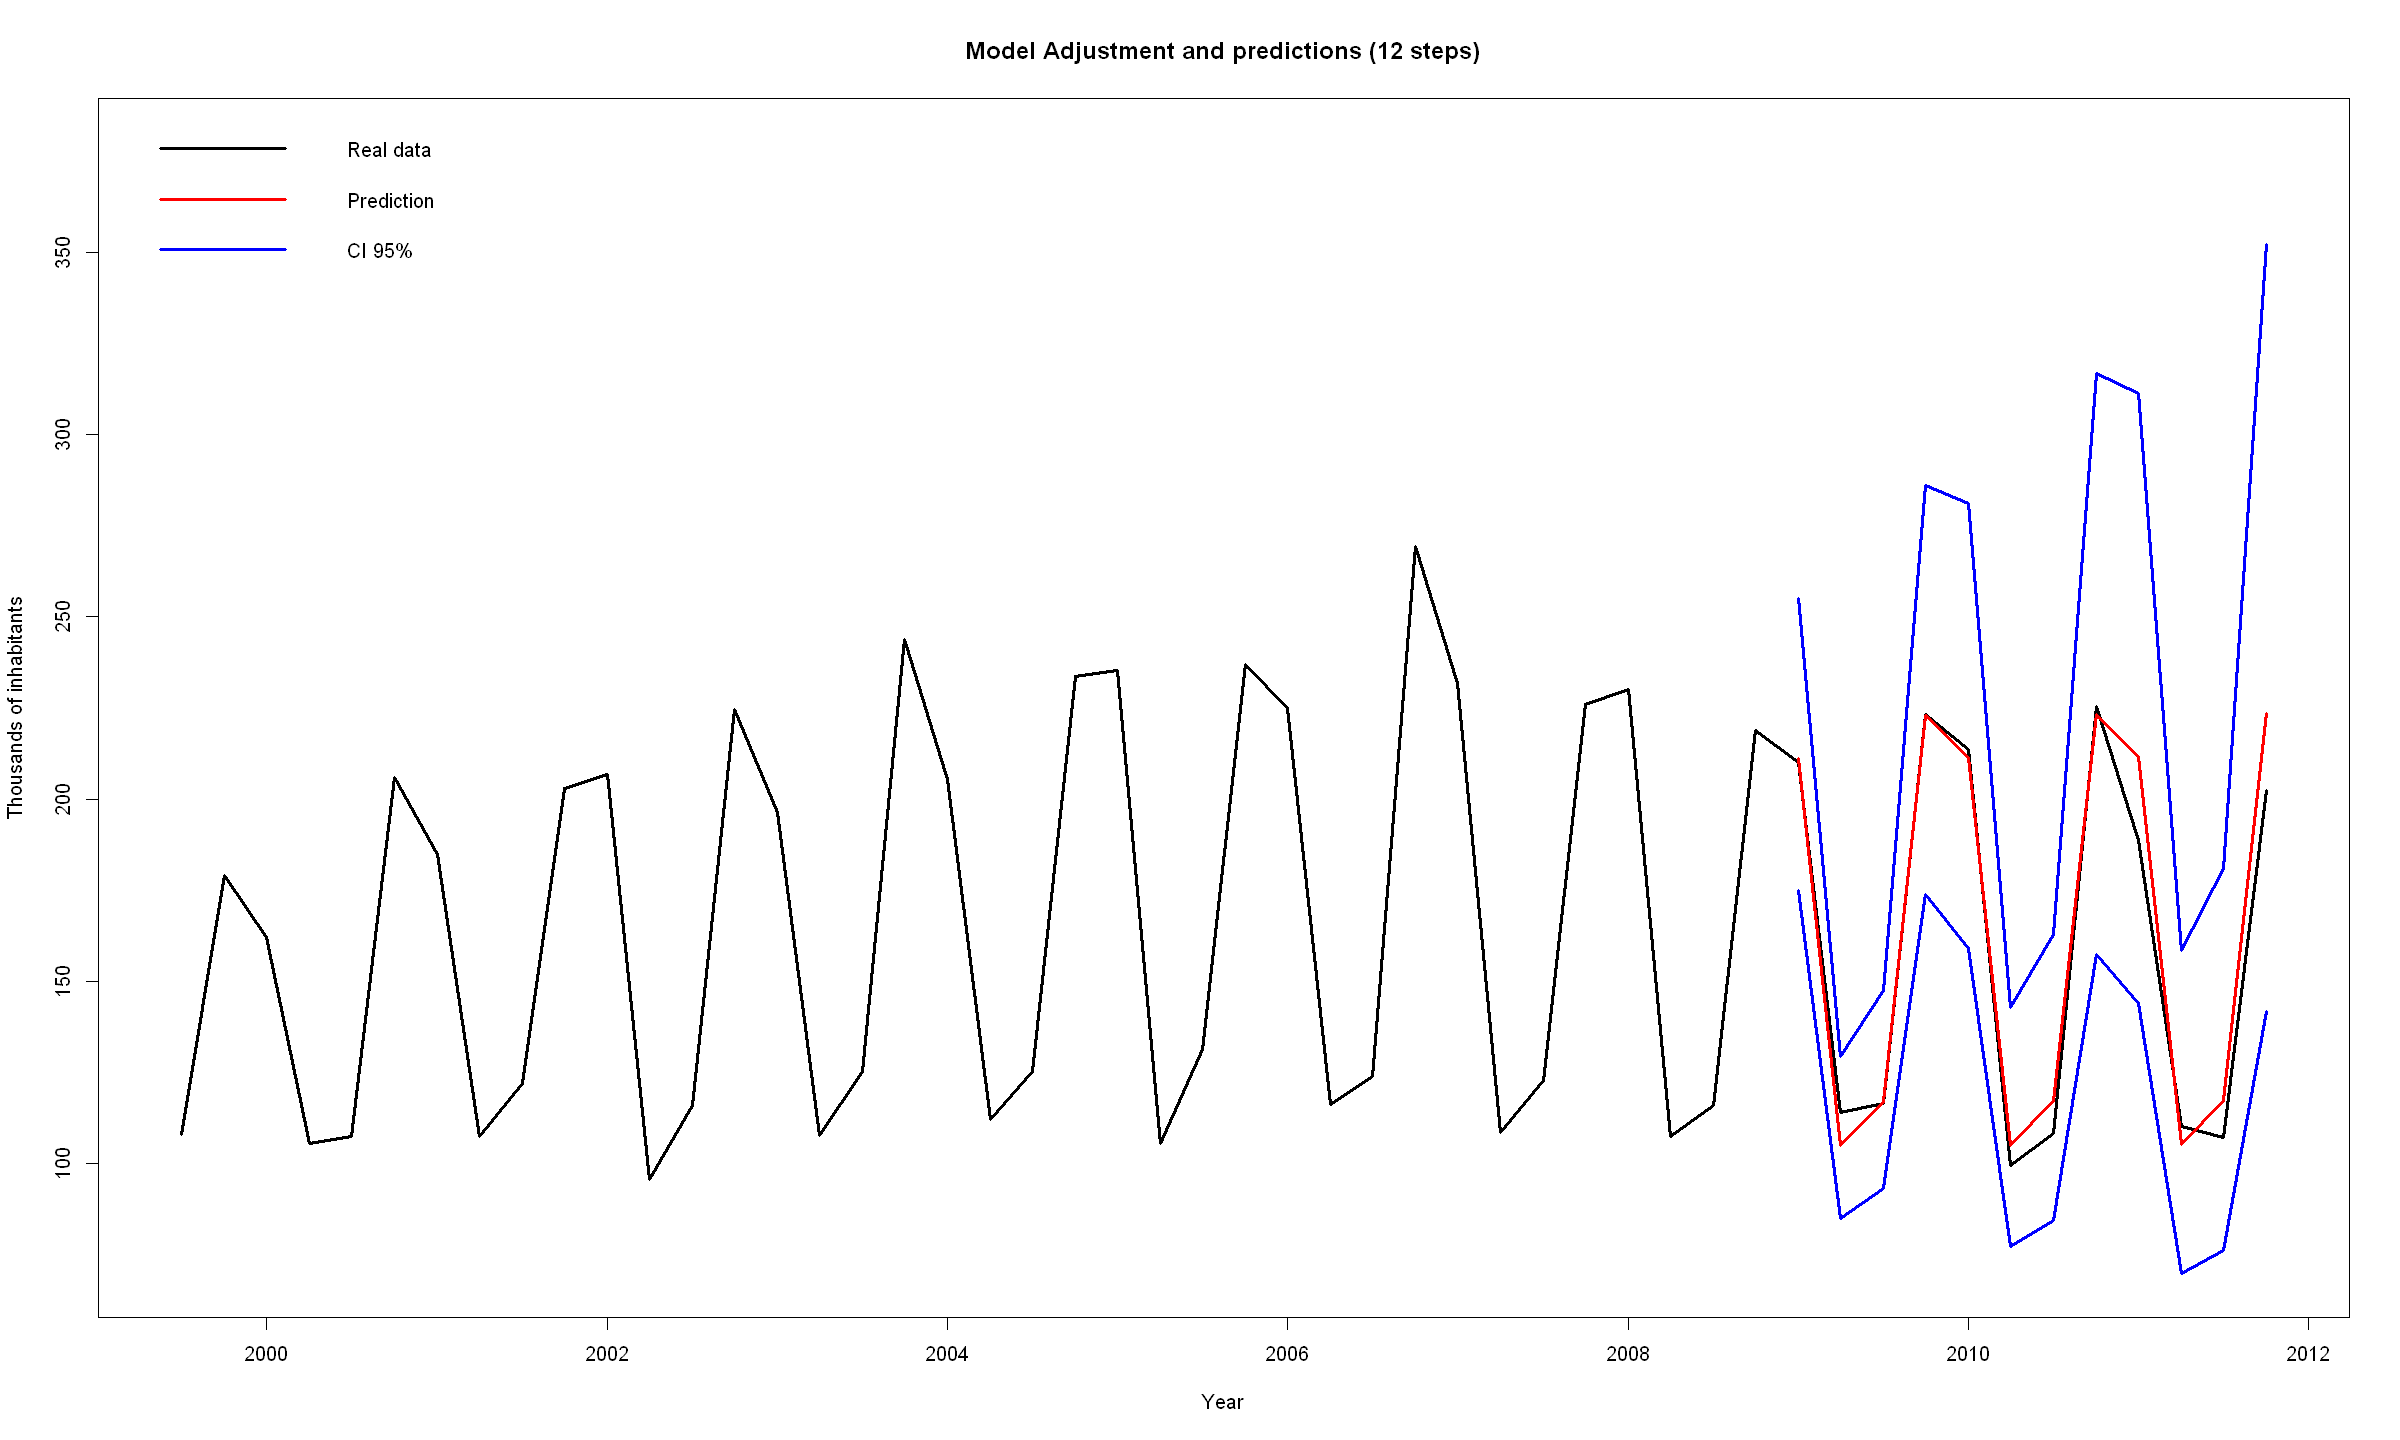

In [54]:
n.data <- length(arrivals_ts2)
n.min <- n.data - 12
fit.mod3 <- Arima(arrivals_ts2[1:n.min], 
                  order = c(0,1,1),
                  seasonal = list(order = c(0,1,1), period = 4),
                  lambda = 0)

# 3. Predice las próximas 12 observaciones
forecast.mod3 <- forecast(fit.mod3, h = 12)

# 4. Crea una serie ts para los valores predichos
predicted_vals <- ts(forecast.mod3$mean, start = time(arrivals_ts2)[n.min + 1], frequency = 4)
lower_vals <- ts(forecast.mod3$lower[,2], start = time(arrivals_ts2)[n.min + 1], frequency = 4)
upper_vals <- ts(forecast.mod3$upper[,2], start = time(arrivals_ts2)[n.min + 1], frequency = 4)

# 5. Gráfico desde un punto deseado
plot_start <- 75

# 6. Graficar la serie real desde plot_start
plot(window(arrivals_ts2, start = time(arrivals_ts2)[plot_start]), 
     ylab = "Thousands of inhabitants", 
     xlab = "Year",
     main = "Model Adjustment and predictions (12 steps)",
     lwd = 3,
     col = "black",
     ylim = c(70, 380))

# 7. Añadir predicción e intervalos de confianza
lines(predicted_vals, col = "red", lwd = 3)
lines(lower_vals, col = "blue", lwd = 2.5)
lines(upper_vals, col = "blue", lwd = 2.5)

# 8. Leyenda
legend("topleft",
       legend = c("Real data", "Prediction", "CI 95%"),
       col = c("black", "red", "blue"),
       lwd = c(3, 3, 3),
       bty = "n")


The plot displays the actual values (in black) alongside the 12-step-ahead forecasts from Model 3 (in red) and their 95% confidence intervals (in blue) for the final three years of the series. The predicted values closely follow the observed seasonal pattern, and most actual data points fall within the forecast intervals, indicating good predictive accuracy. The widening of the confidence intervals as the forecast horizon increases reflects the growing uncertainty further into the future, which is expected in time series forecasting. Overall, these results demonstrate that Model 3 is able to capture the main temporal dynamics of the series and provides reliable short-term forecasts.

---
Below are the 10-step-ahead forecasts generated by model 3. These predictions provide an estimate of the expected future values of the time series, along with confidence intervals that reflect the uncertainty associated with each forecast.

In [57]:
Predic.mod3 <- forecast(mod3, h = 10)
pred_table <- as.data.frame(Predic.mod3)
pred_table <- round(pred_table, 2)
colnames(pred_table) <- c("Point Forecast", 
                          "Lower 80", "Higher 80", 
                          "Lower 95", "Higher 95")

pred_table$Element <- paste0("x_", 125:(125 + nrow(pred_table) - 1))
pred_table <- pred_table[, c("Element", "Point Forecast", "Lower 80", "Higher 80", "Lower 95", "Higher 95")]
pred_table

,Element,Point Forecast,Lower 80,Higher 80,Lower 95,Higher 95
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2012 Q1,x_125,188.75,175.79,201.71,168.93,208.57
2012 Q2,x_126,98.28,85.00,111.56,77.97,118.59
2012 Q3,x_127,99.11,85.52,112.70,78.32,119.90
2012 Q4,x_128,201.04,187.14,214.93,179.78,222.29
2013 Q1,x_129,182.69,164.95,200.43,155.56,209.82
2013 Q2,x_130,92.21,73.86,110.57,64.14,120.29
2013 Q3,x_131,93.05,74.10,112.00,64.07,122.03
2013 Q4,x_132,194.97,175.44,214.50,165.11,224.84
2014 Q1,x_133,176.63,153.25,200.00,140.88,212.37


The following plot presents the 10-step-ahead forecasts generated by the selected ARIMA model, together with their associated prediction intervals. The black line on the left shows the historical data, while the blue line and shaded areas on the right represent the model's forecasts and the corresponding 80% and 95% prediction intervals. As the forecast horizon increases, the intervals widen, reflecting the growing uncertainty in future predictions. This visualization allows us to assess both the expected seasonal pattern in the forecasts and the range of plausible future outcomes, providing a clear picture of the model’s predictive performance and its associated uncertainty.

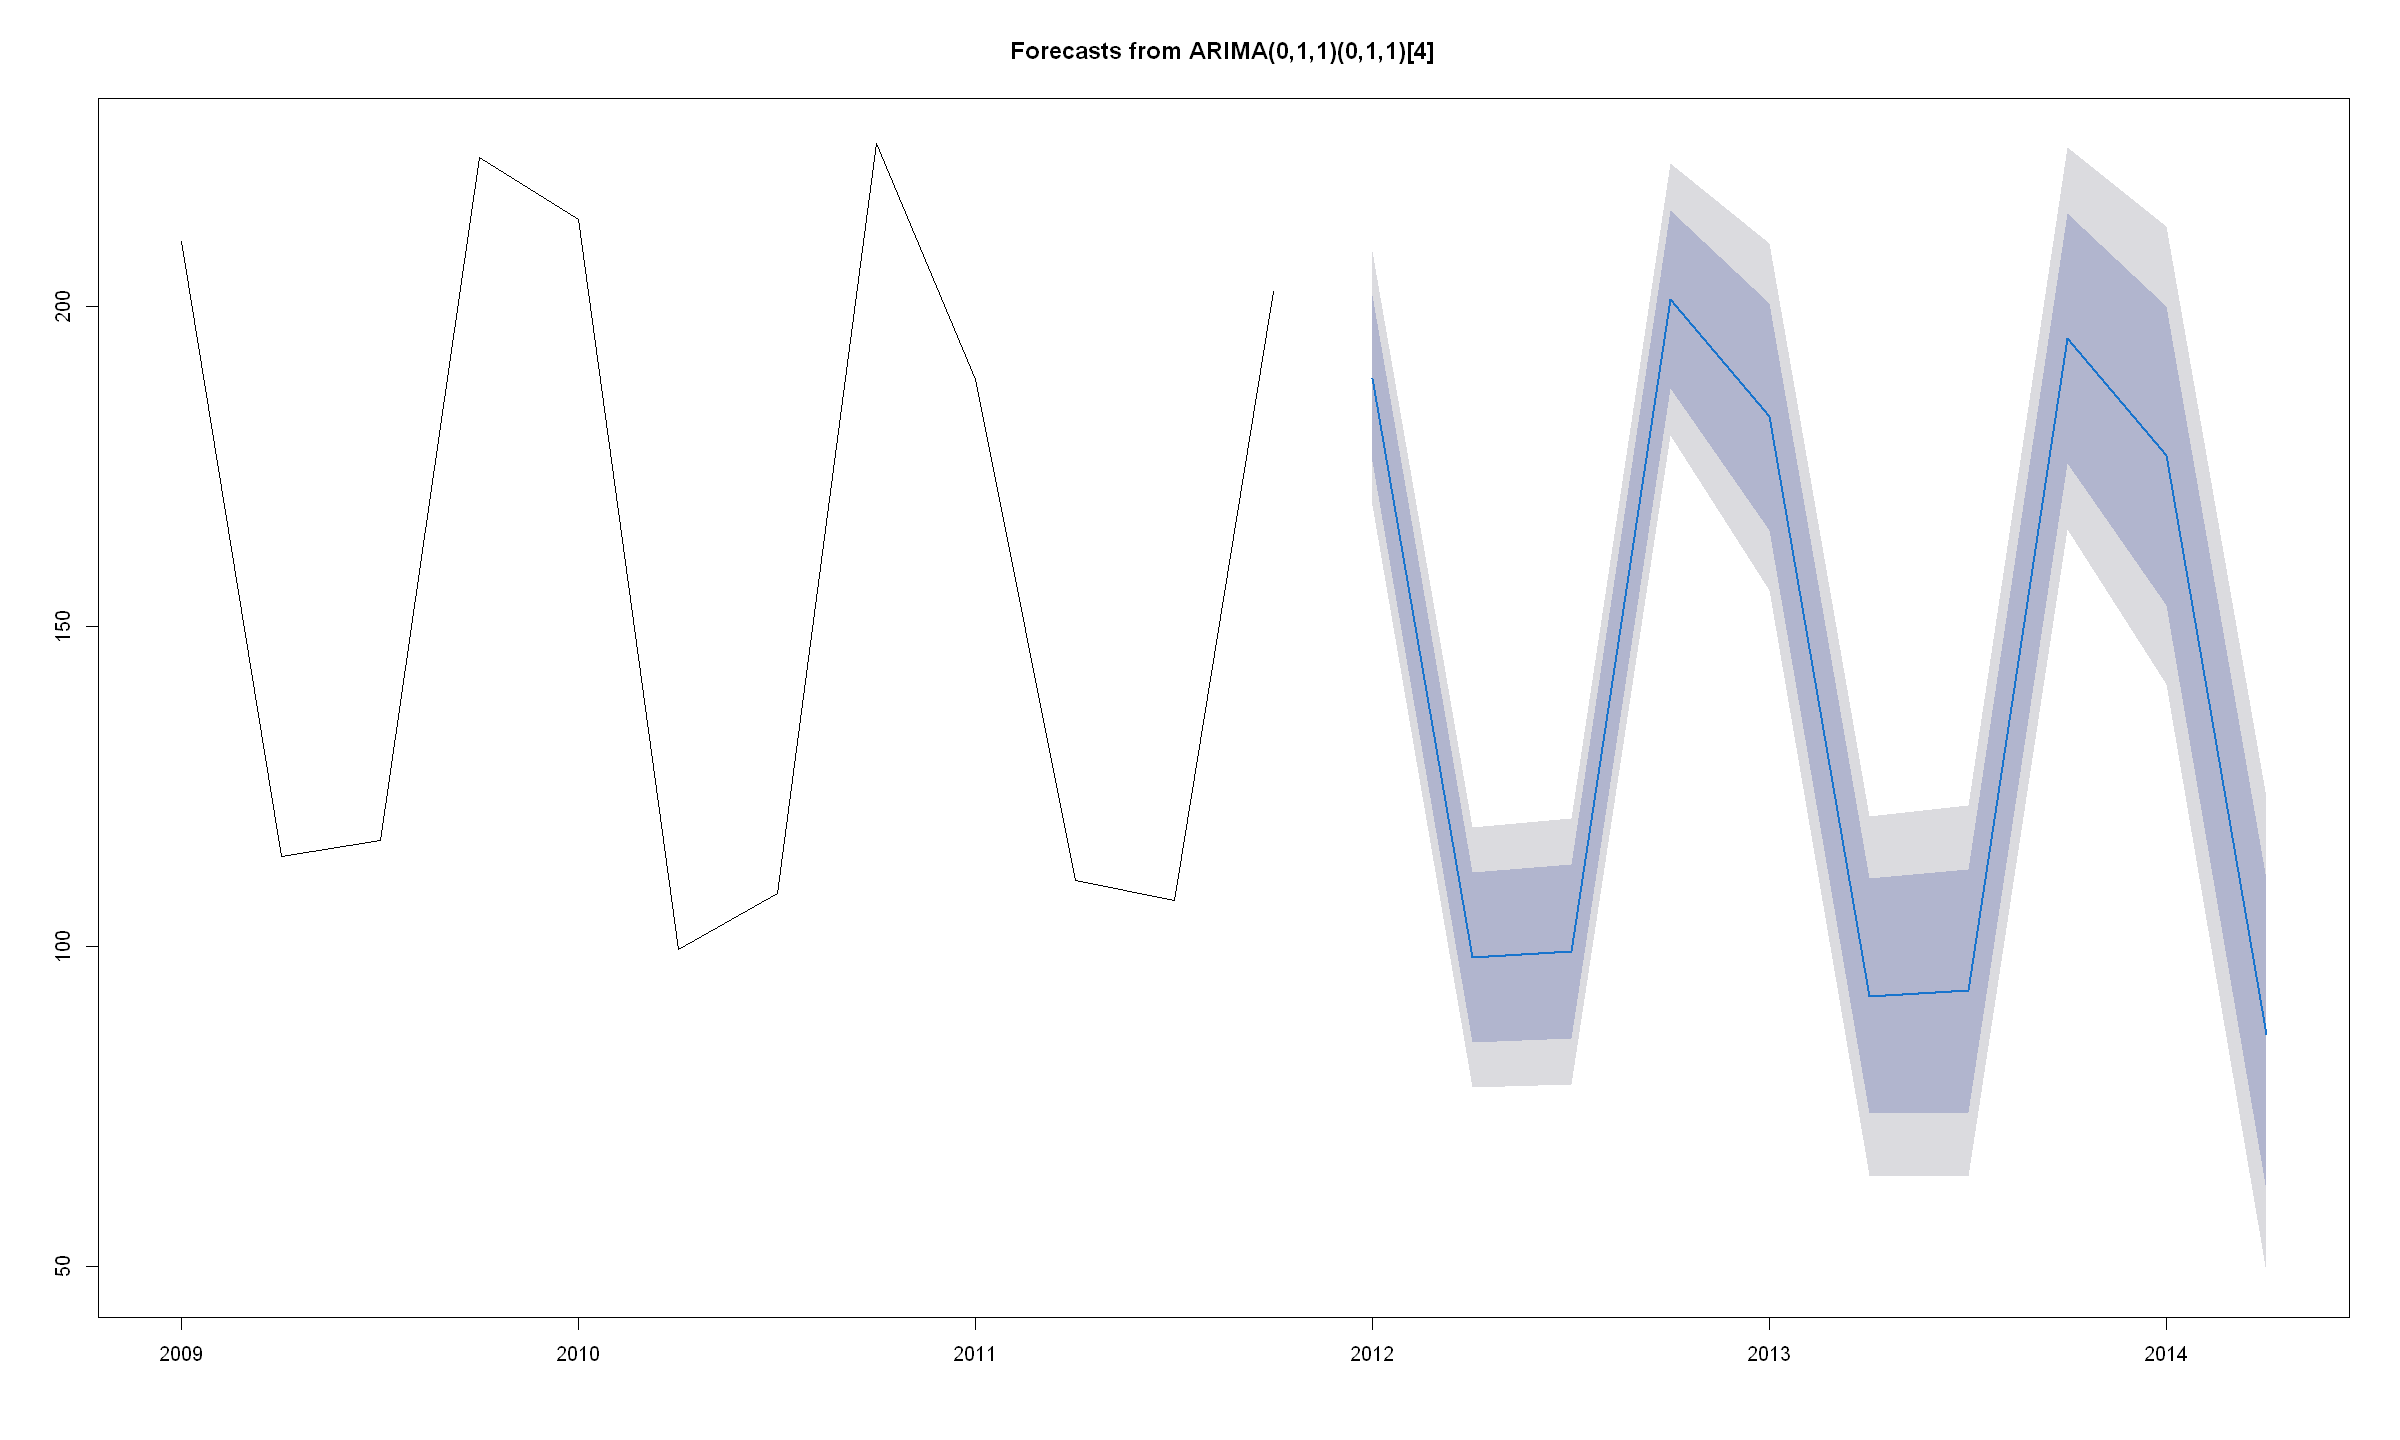

In [59]:
plot(Predic.mod3,12)